# 1-band map to RGB map converter

ToDo:

* label 3?
* hard-coded CSR
* 255 -> 0 nodata value


In [28]:
#%matplotlib inline
import numpy as np
from pathlib import Path
import os
import rasterio as rio
import rasterio.plot as rioplot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from PIL import Image

dictBands = {'b': (0,2), 'g': (1,1), 'r': (2,0)}

In [29]:
plt.rcParams["figure.figsize"] = (20,12)

In [30]:
DATADIR = "../../data/train"
RAW_MAPS = DATADIR + "/map"     #'../data/raw/images'
RGB_MAPS = DATADIR + "/map_rgb"      #'../data/raw/images'

In [31]:
def street_mask(arr, value):
    arr = np.array(arr)
    ax = np.ma.masked_where(arr != value, arr)
    ax.fill_value = 0
    return (ax/ax*255).filled().astype(np.uint8)

def mask(arr, value):
    arr = np.array(arr)
    ax = np.ma.masked_where(arr == value, arr, copy = False)
    ax.fill_value = 0
    return (ax/ax*255).filled().astype(np.uint8)

In [32]:
def map2rgbMap(inds):
    ima = inds.read()
    vals = np.unique(ima)
    
    sz  = ima.shape

    rgbMap = np.zeros((sz[1], sz[2], 4), 'uint8') 
    msk = mask(ima, 0)   # nodata value
    for index, i in enumerate(vals[vals>0]):
        rgbMap[..., index] = street_mask(ima, i)
    rgbMap[..., 3] = msk
    return rgbMap        

In [33]:
def write_visible(src, meta):    
    outpath = RGB_MAPS + '/' + file.name
    with rio.open(outpath, 'w', **meta) as outds:
        sz = np.shape(src)
        output  = np.zeros((4, sz[0], sz[1]), 'uint8')  
        for i in range(4):
            output[i] = src[..., i]      
        outds.write(output.astype(np.uint8))

In [34]:
def make_visible(file):
    with rio.open(file) as inds:
        meta = inds.meta.copy() 
        meta['dtype']  = 'uint8'
        meta['count']  = 4
        meta['nodata'] = 0
        
        
        rgbMap = map2rgbMap(inds)
        plt.imshow(rgbMap)
        plt.show()   
        
        write_visible(rgbMap, meta)
        

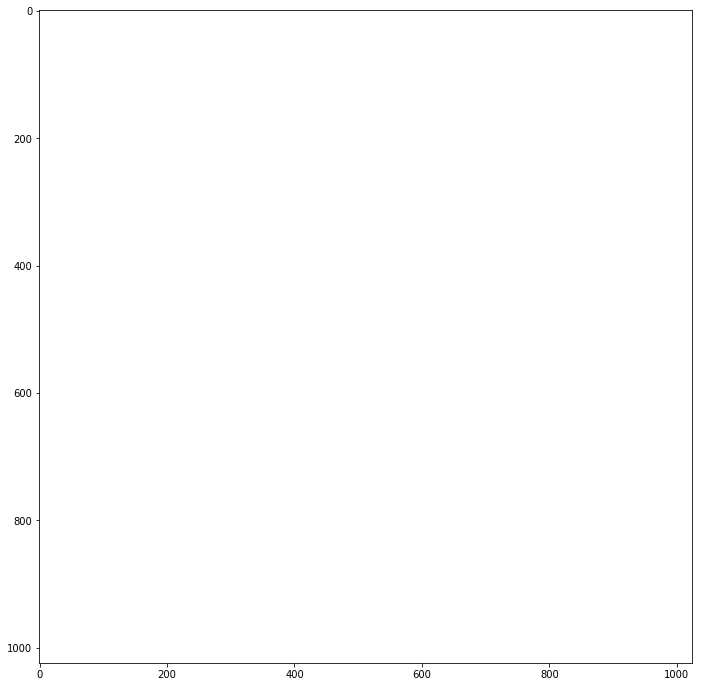

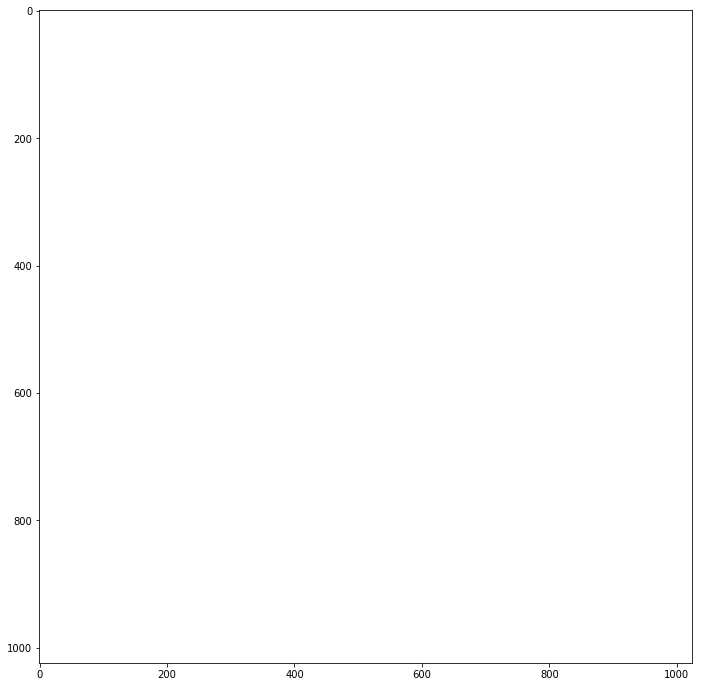

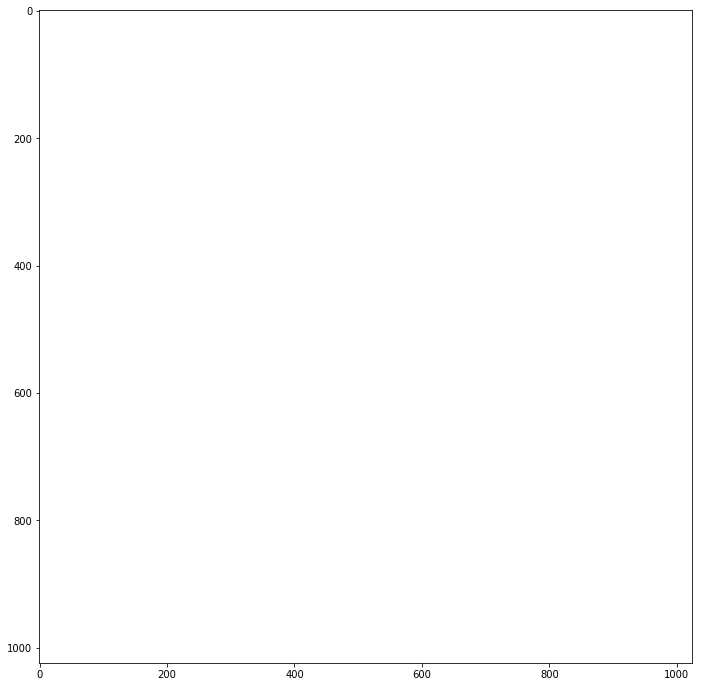

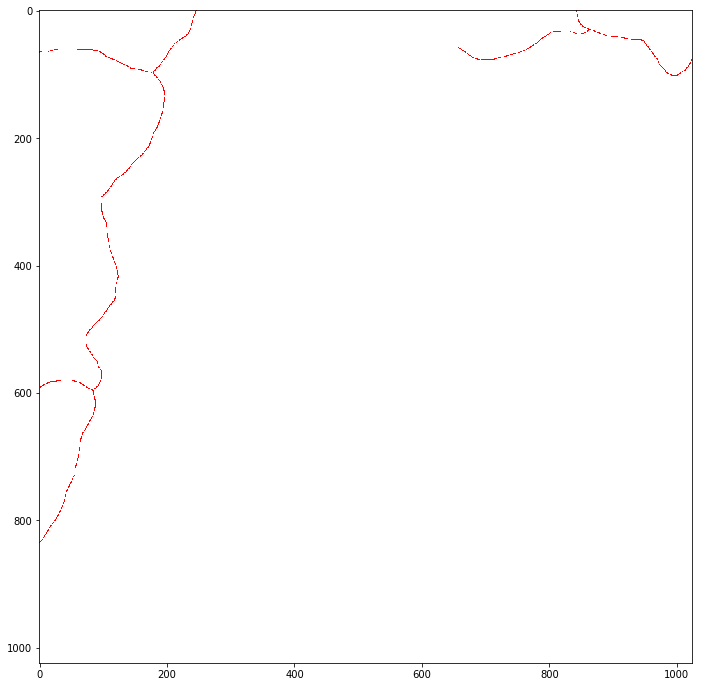

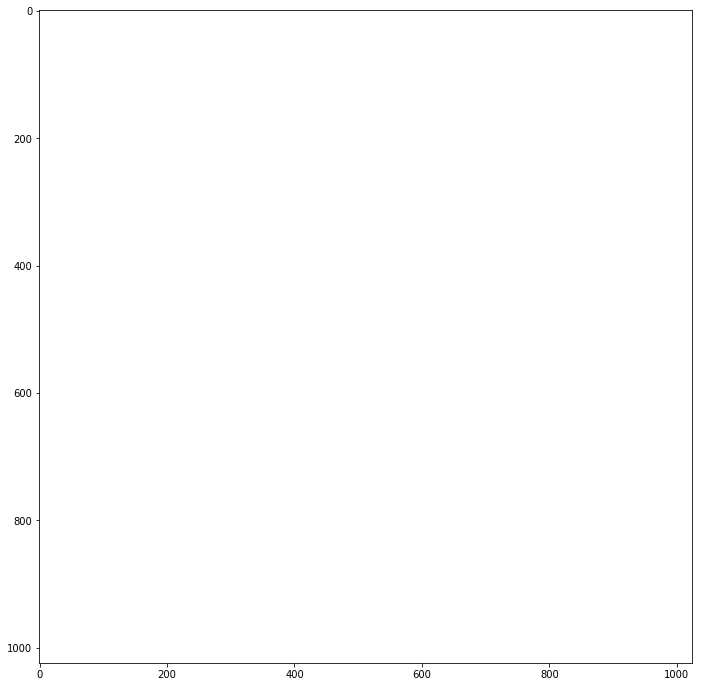

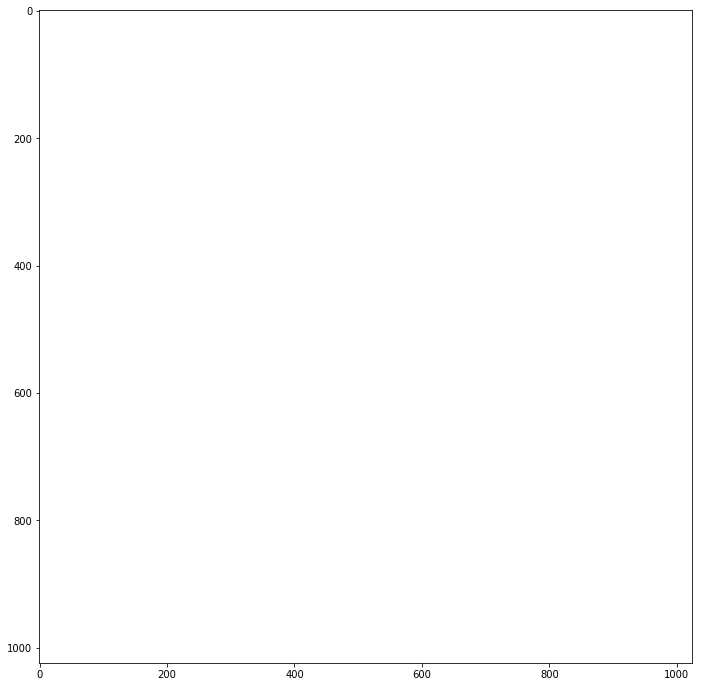

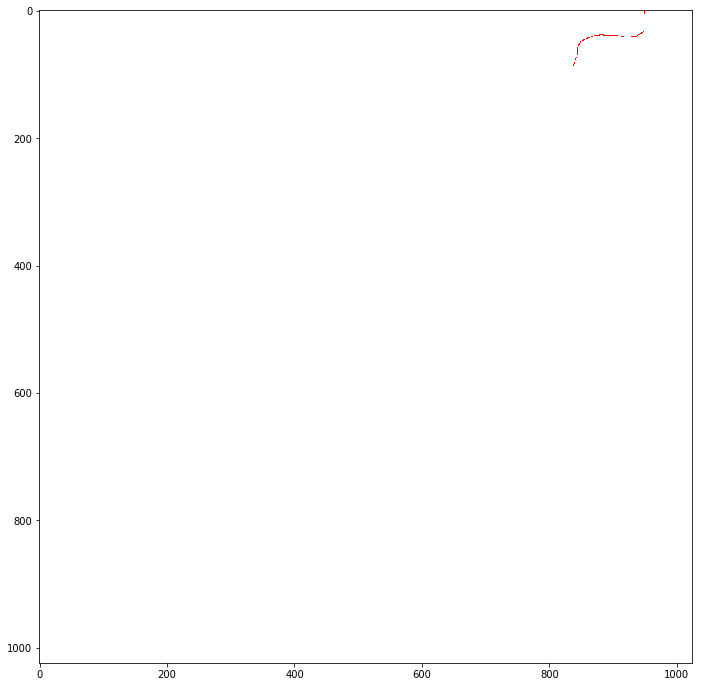

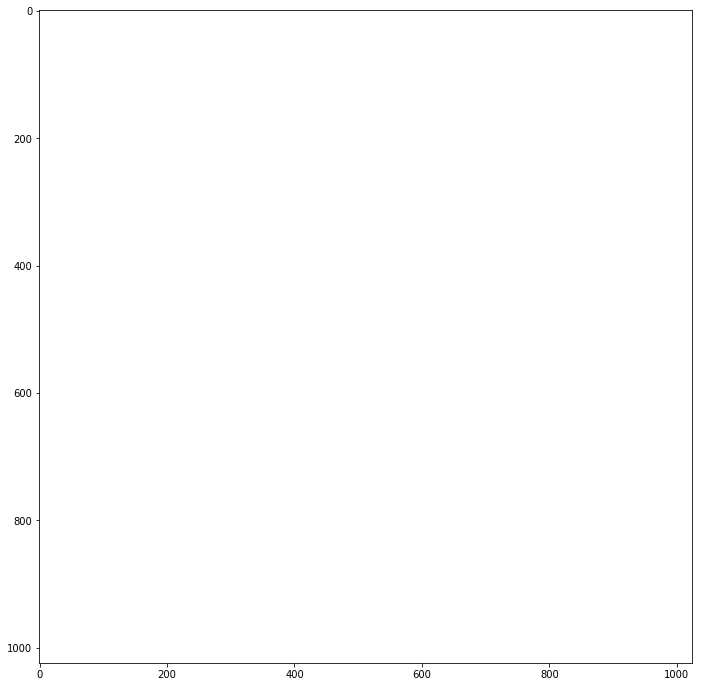

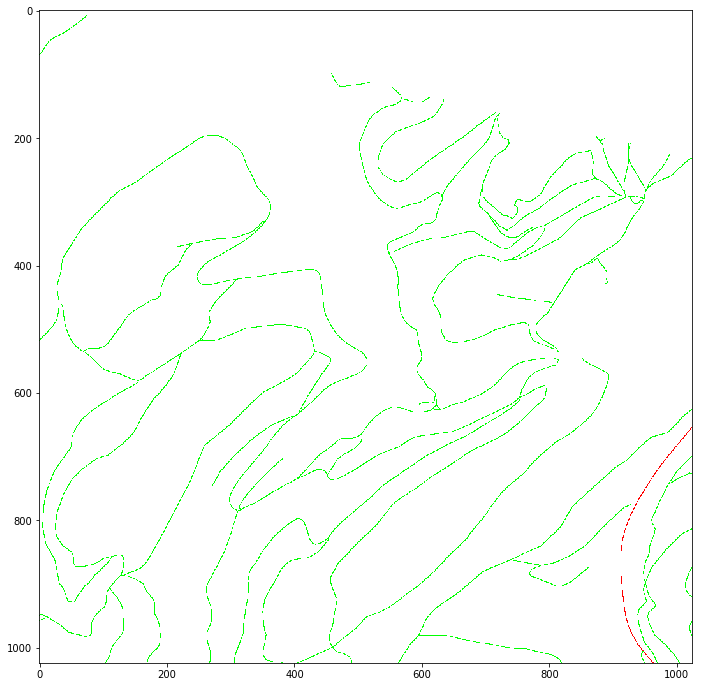

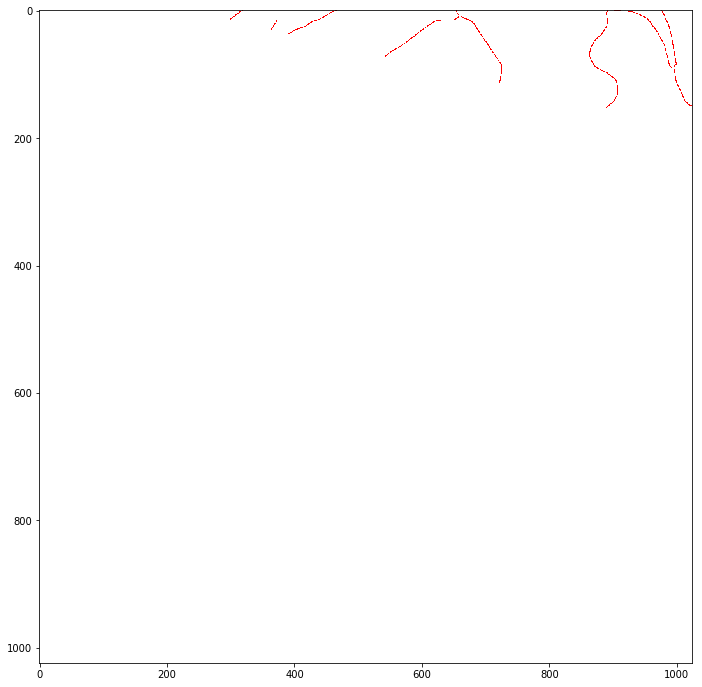

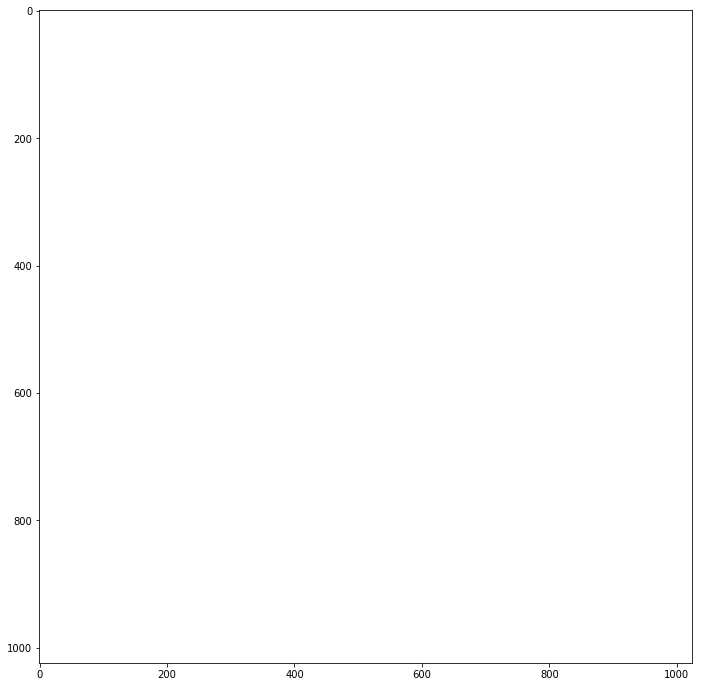

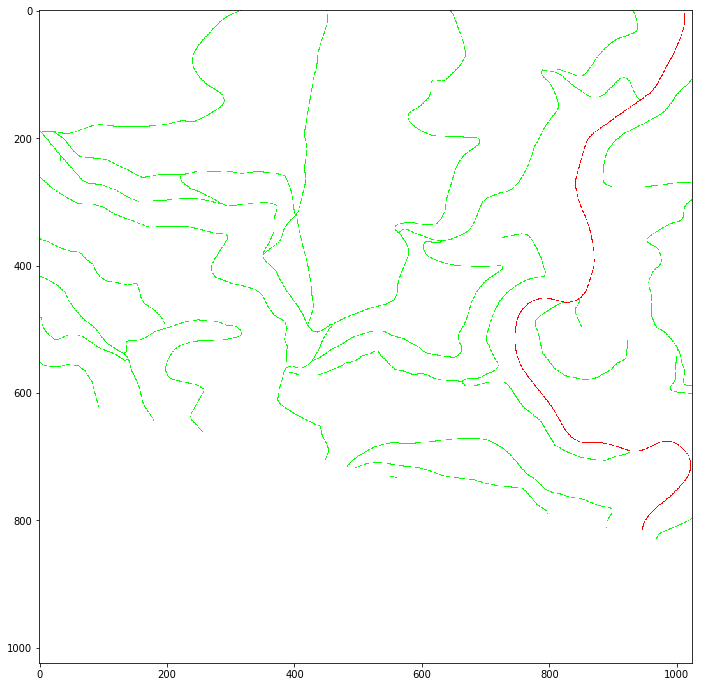

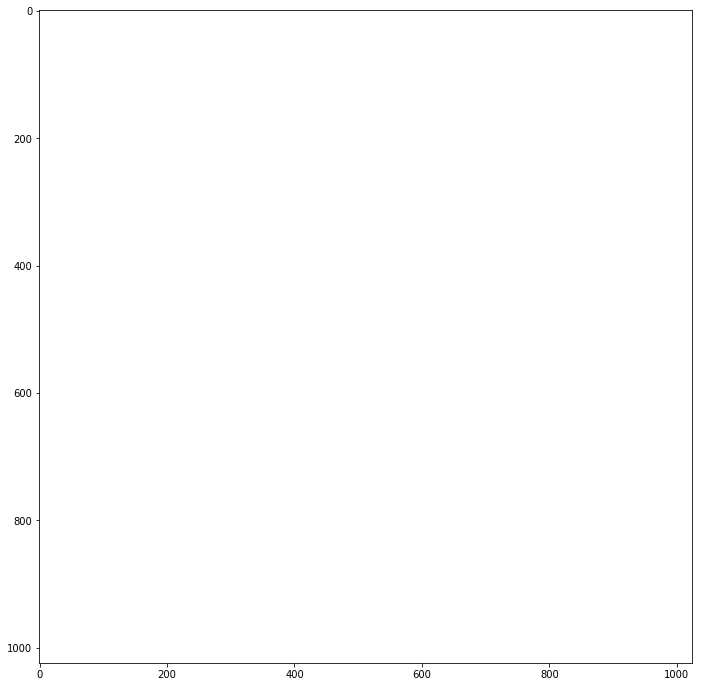

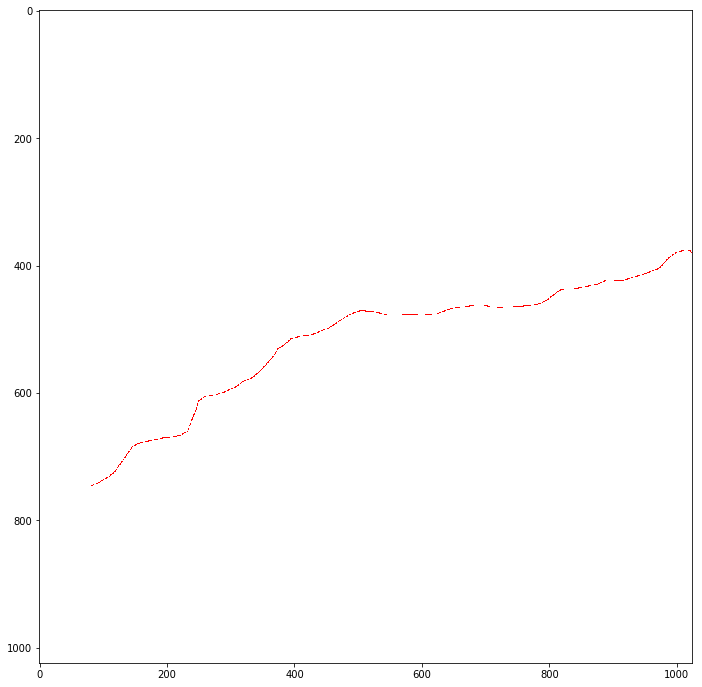

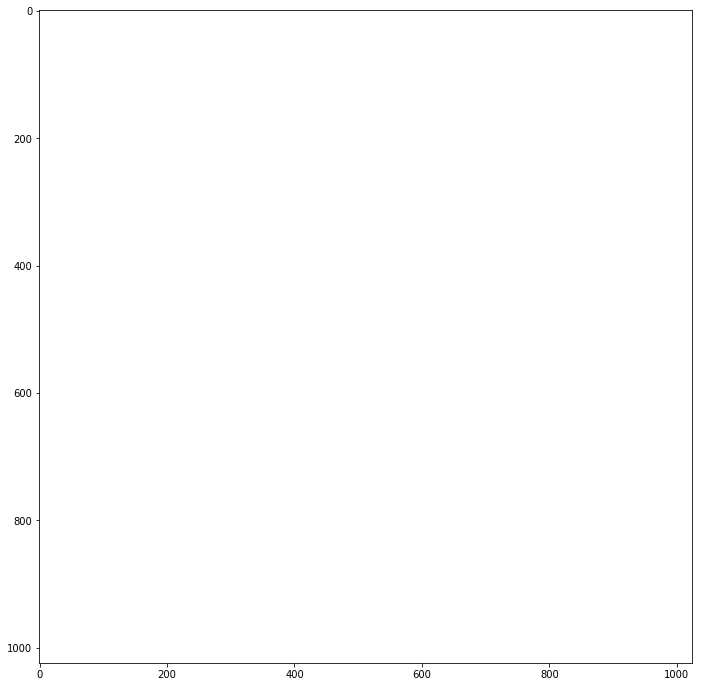

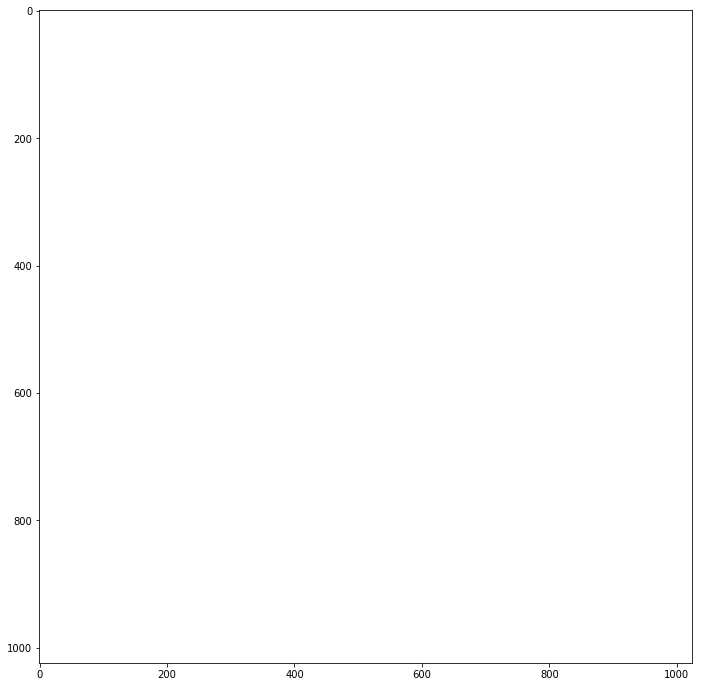

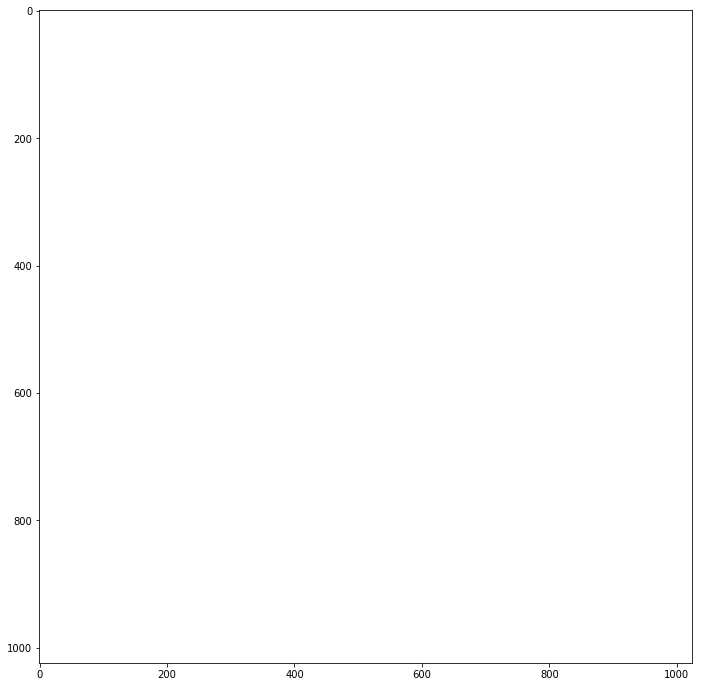

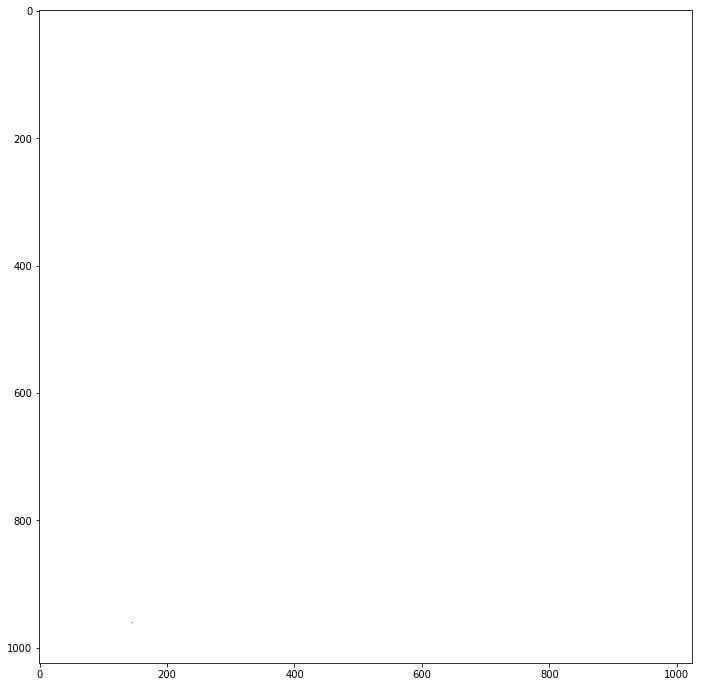

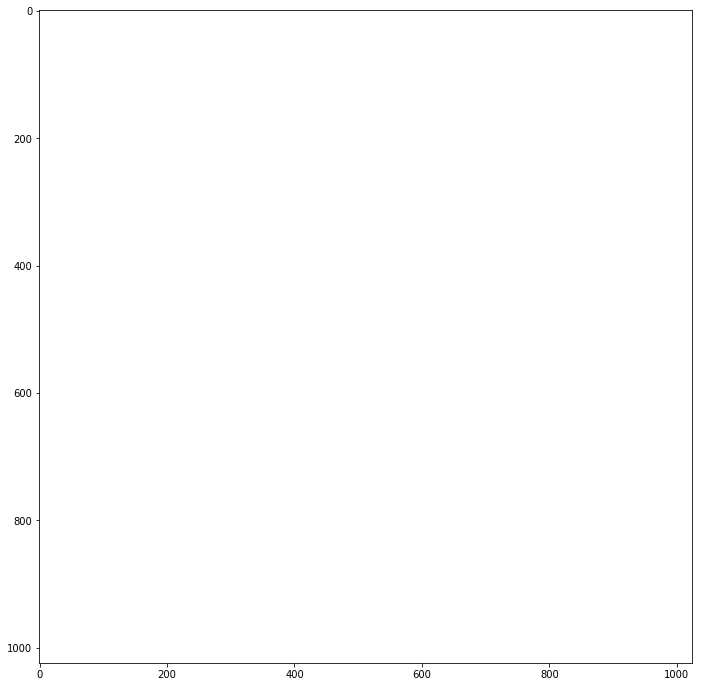

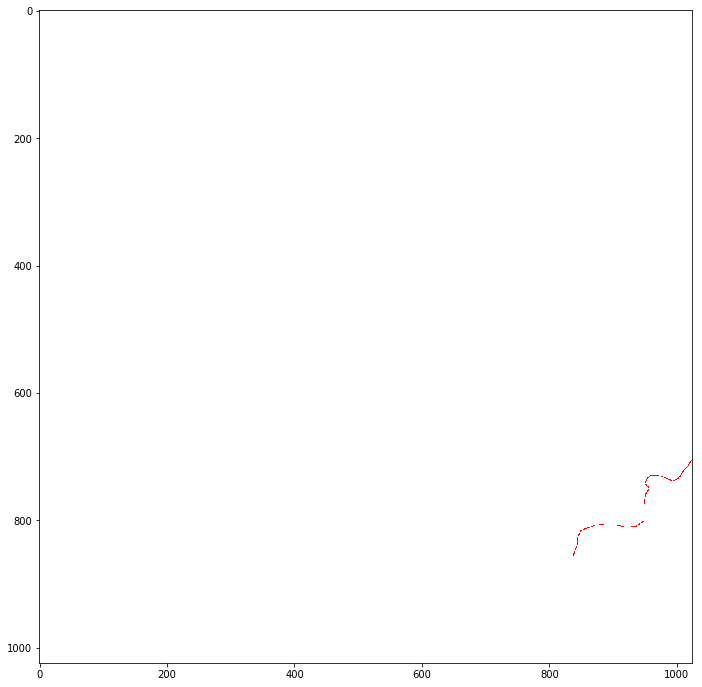

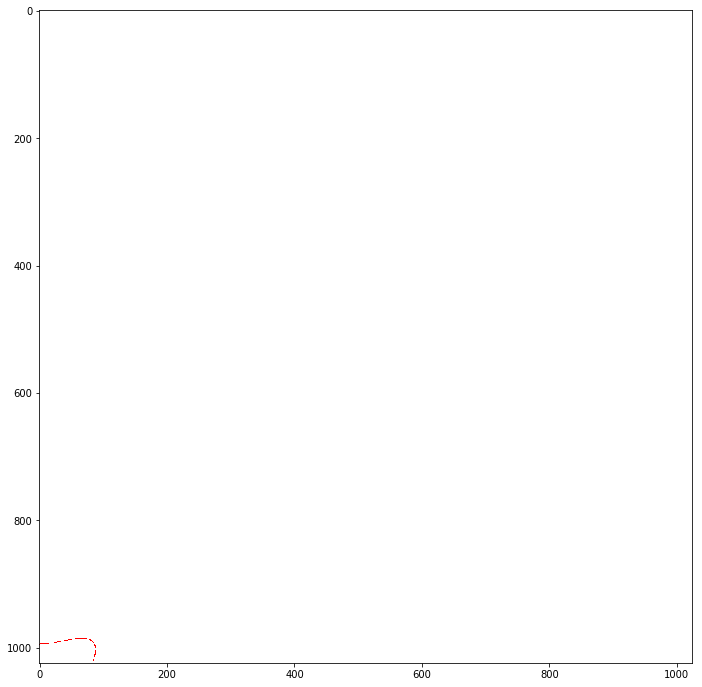

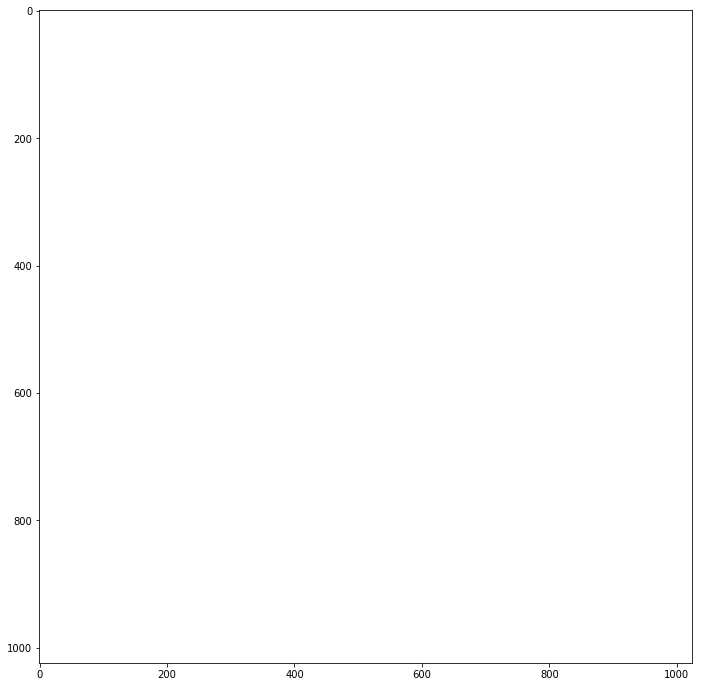

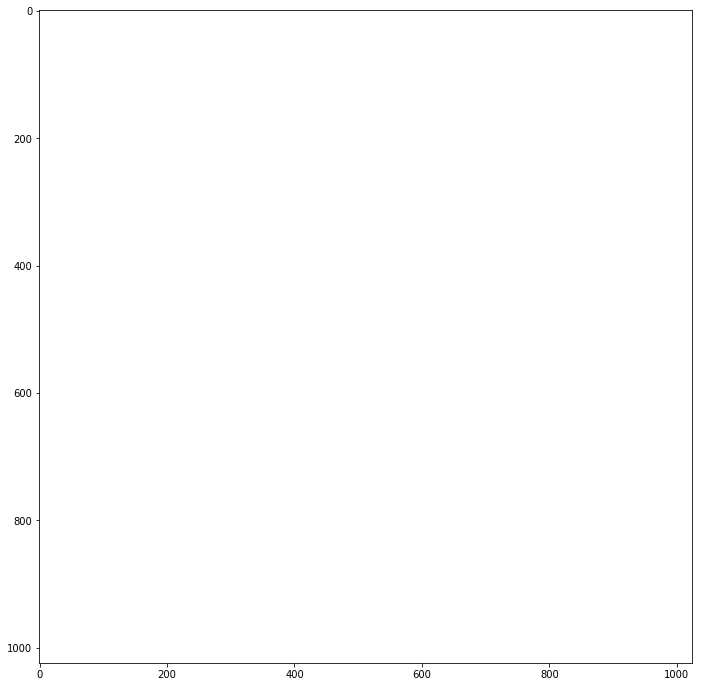

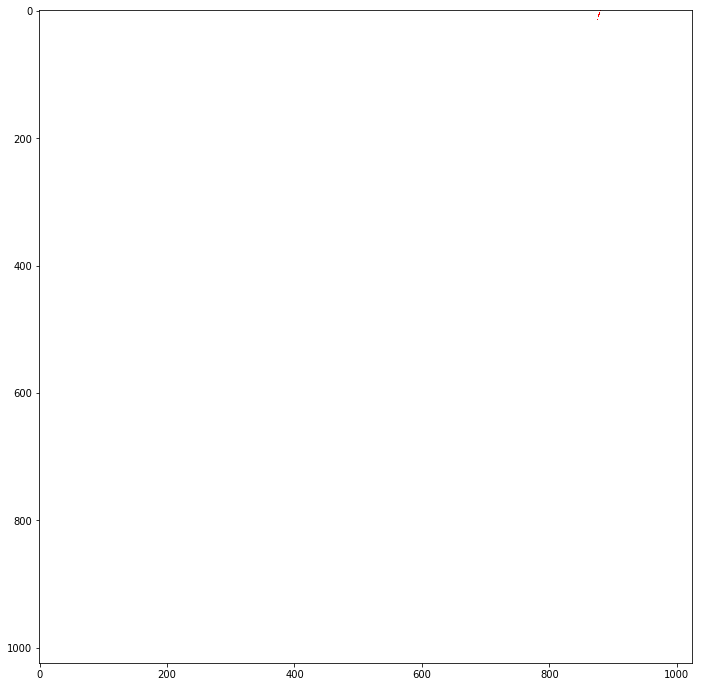

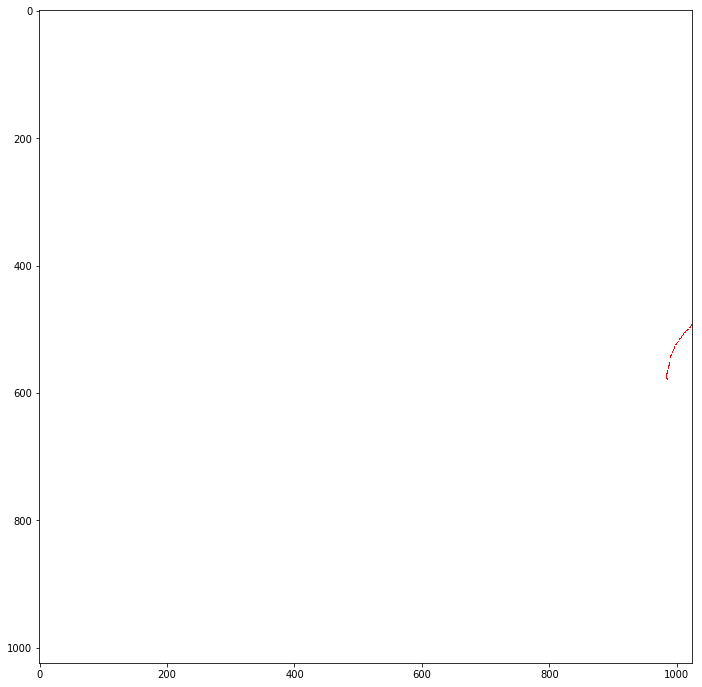

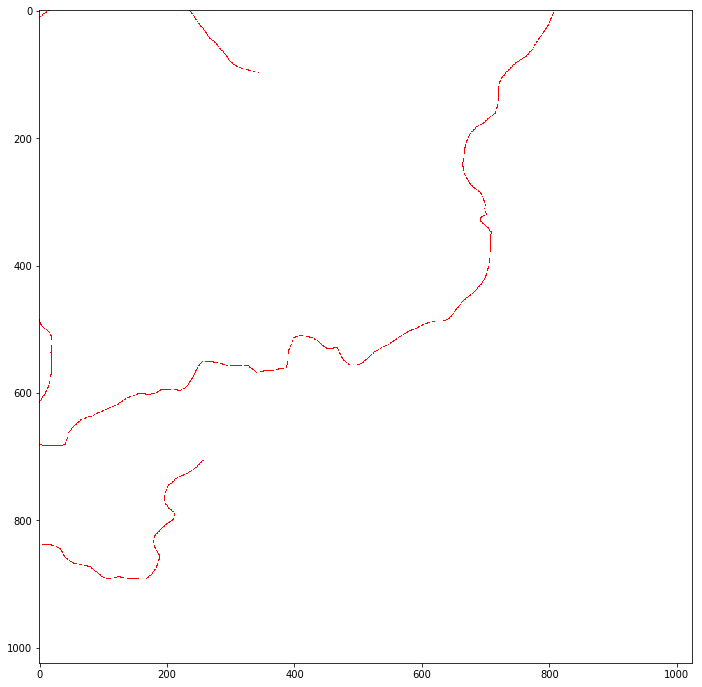

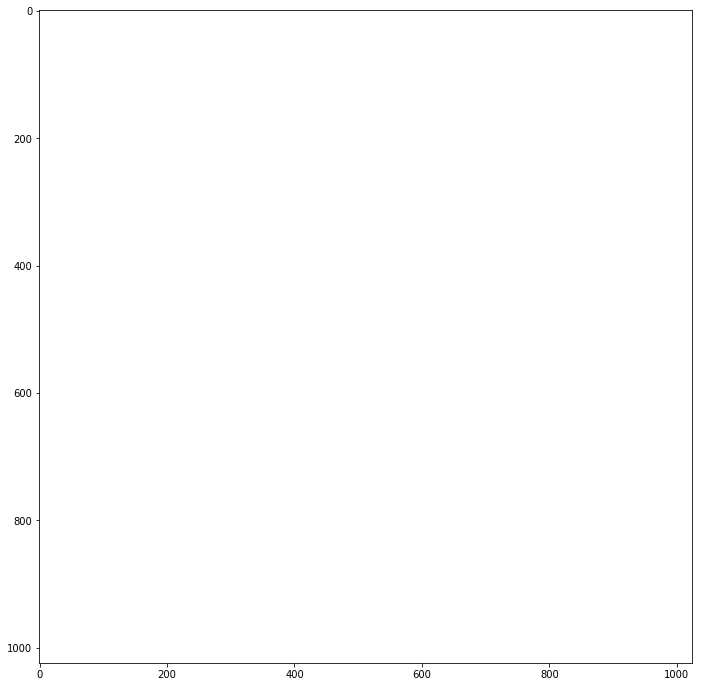

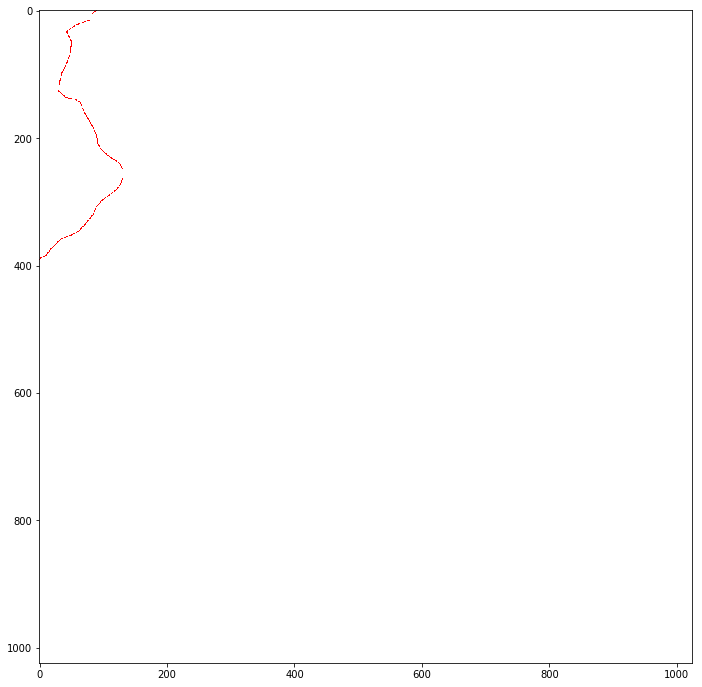

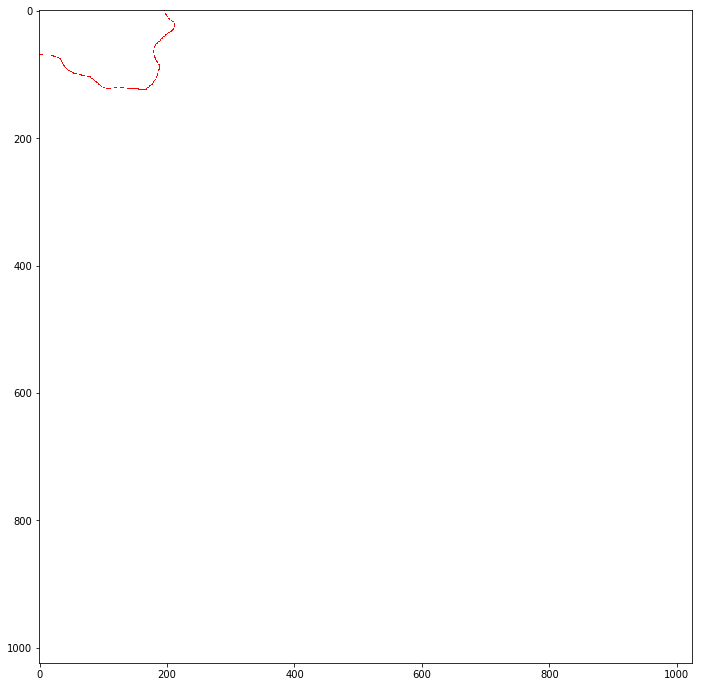

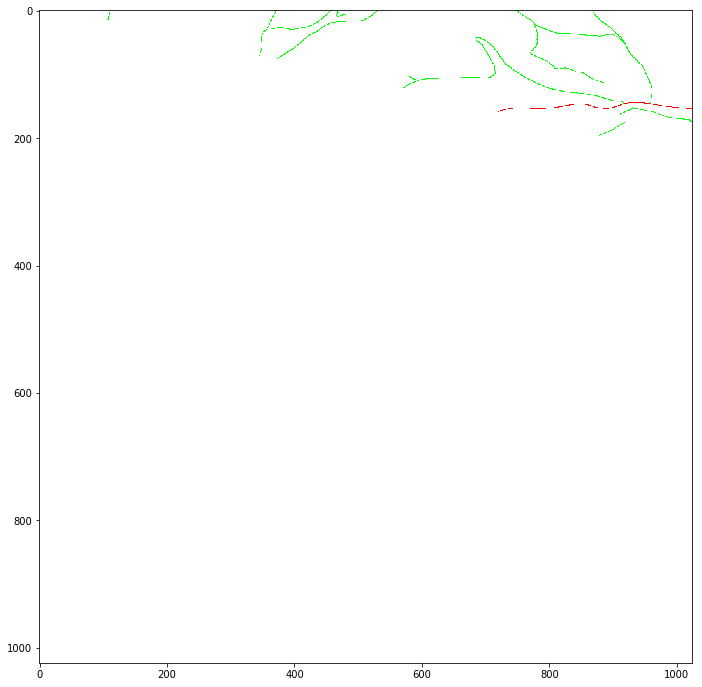

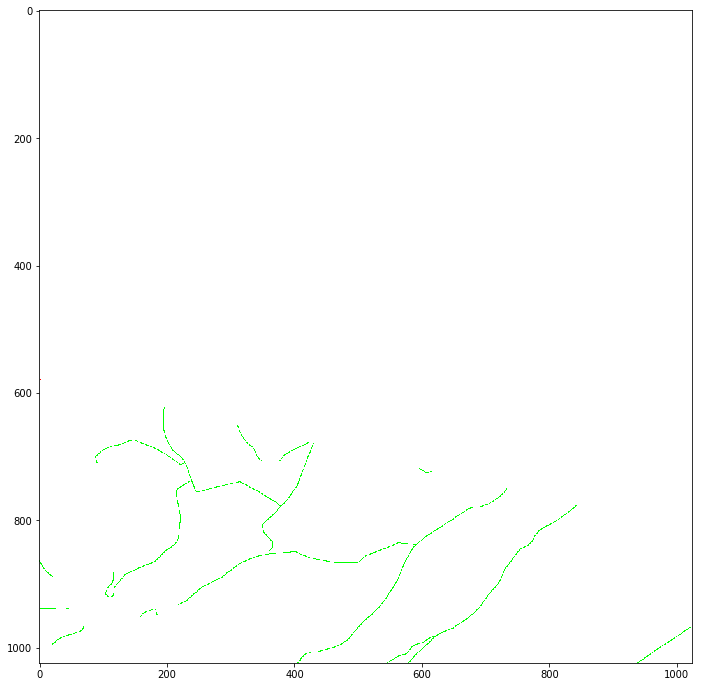

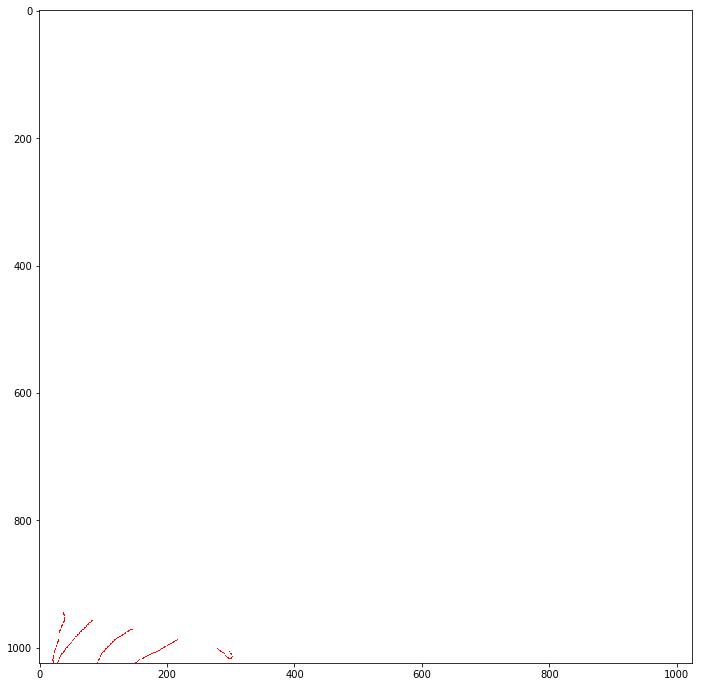

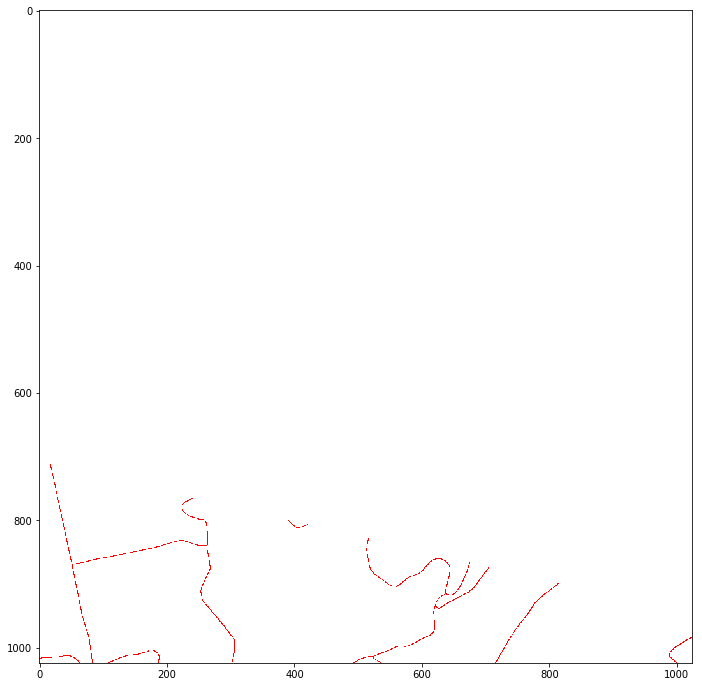

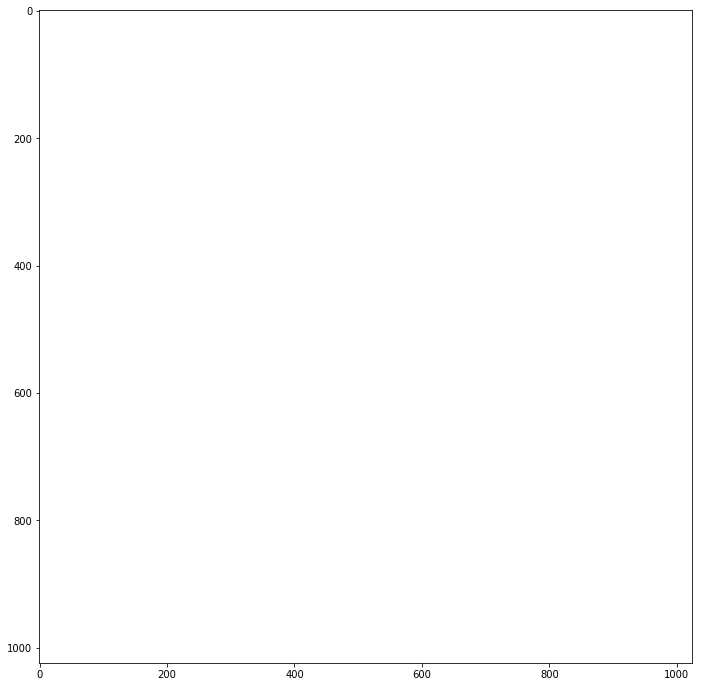

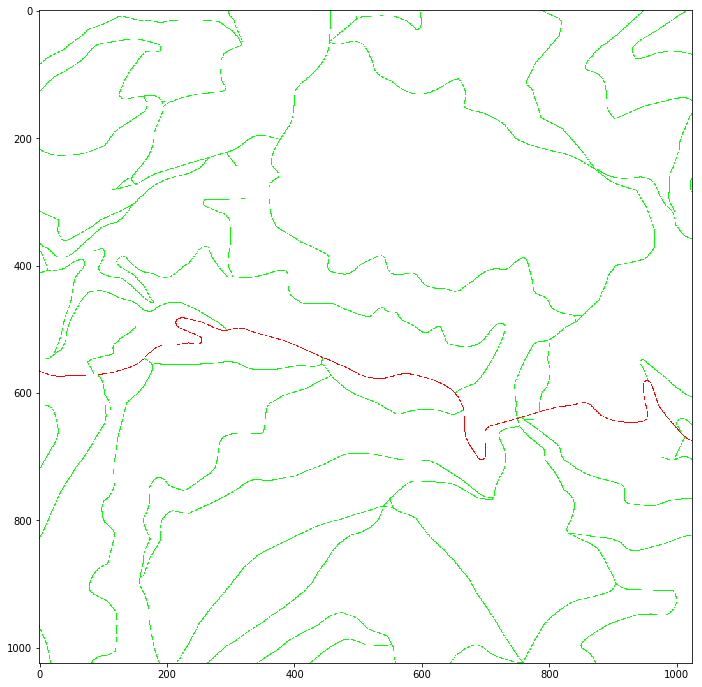

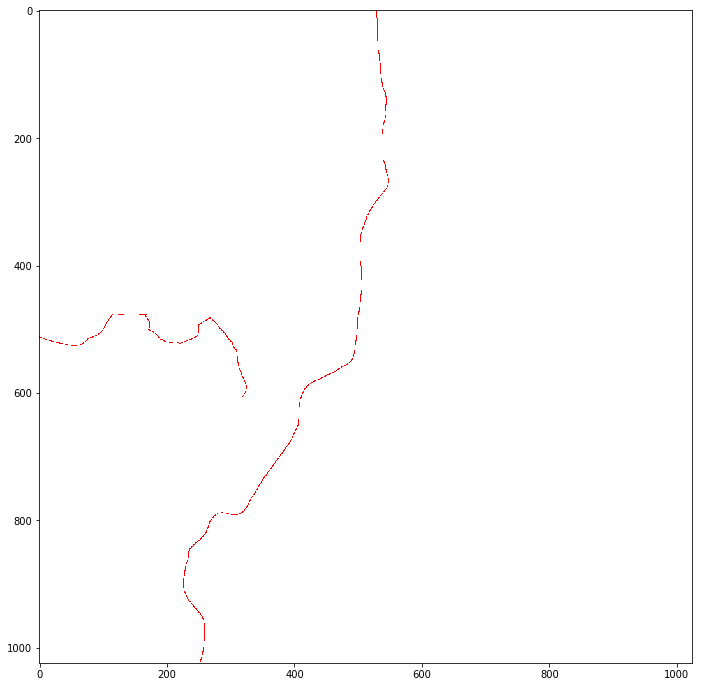

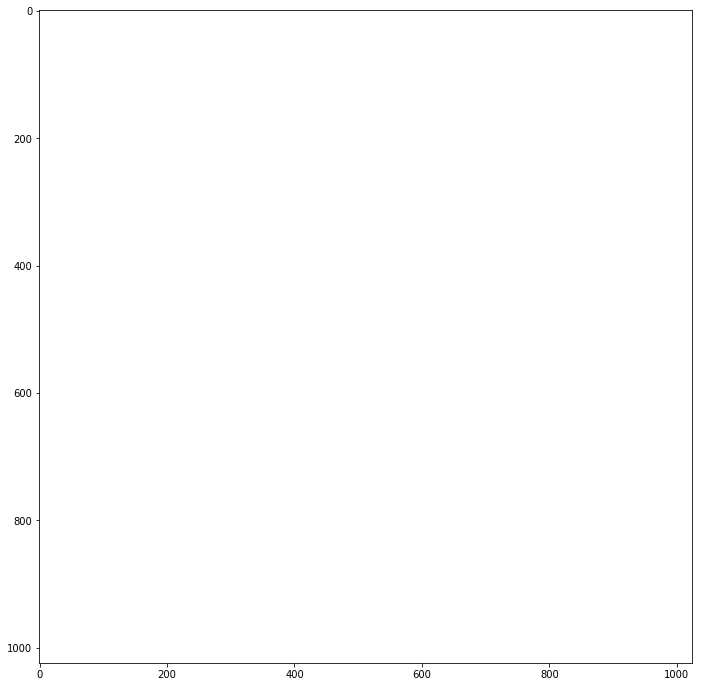

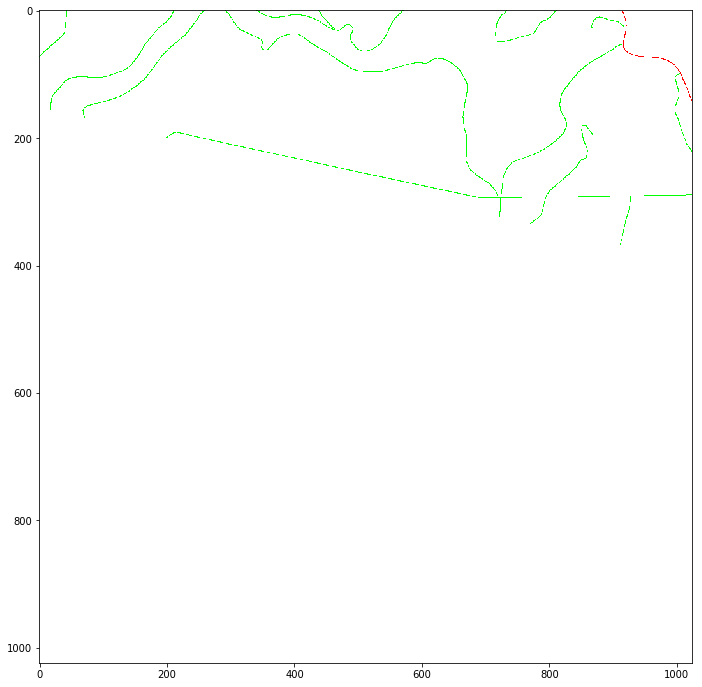

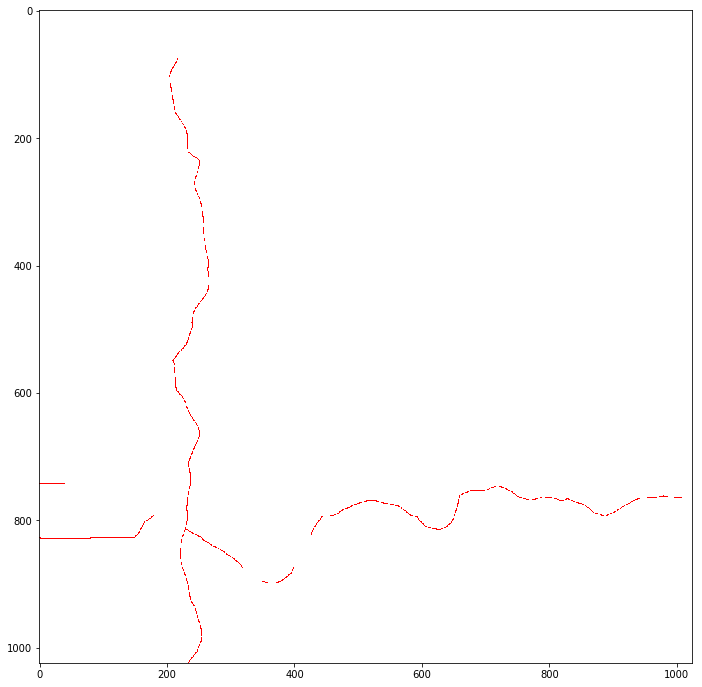

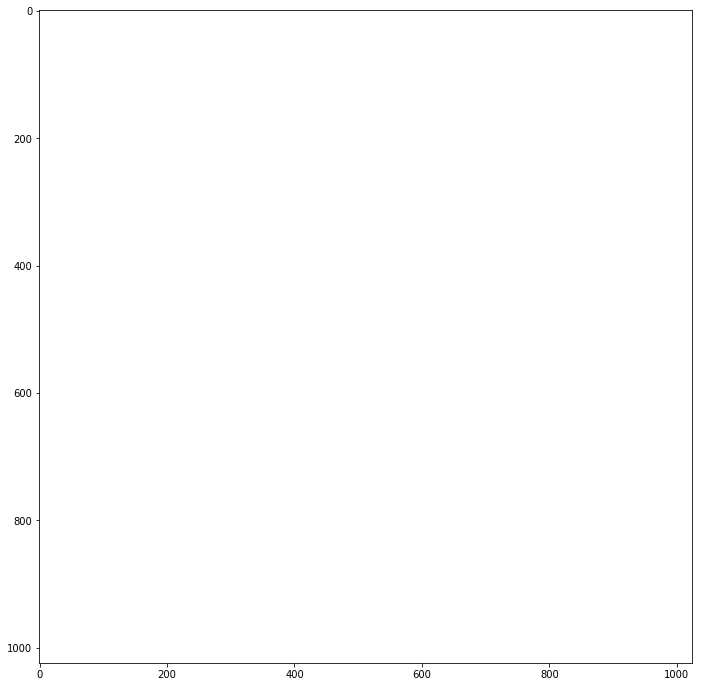

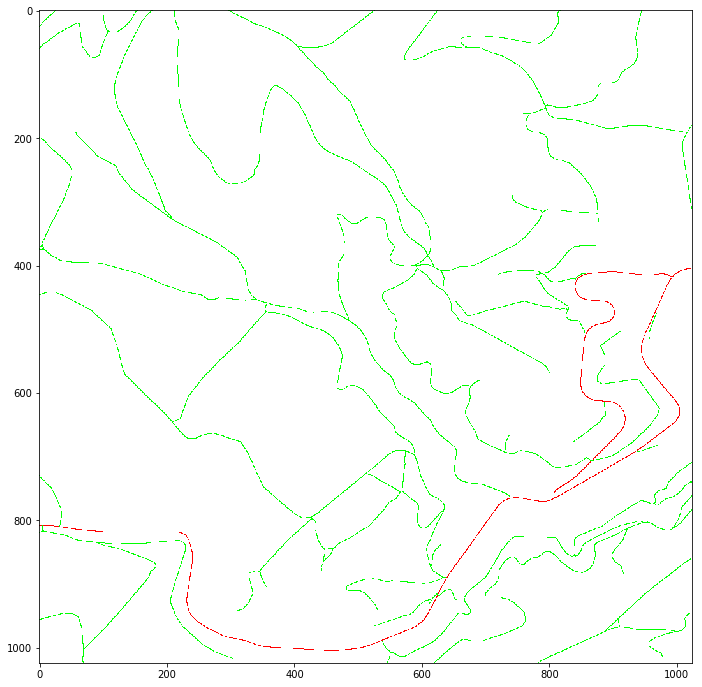

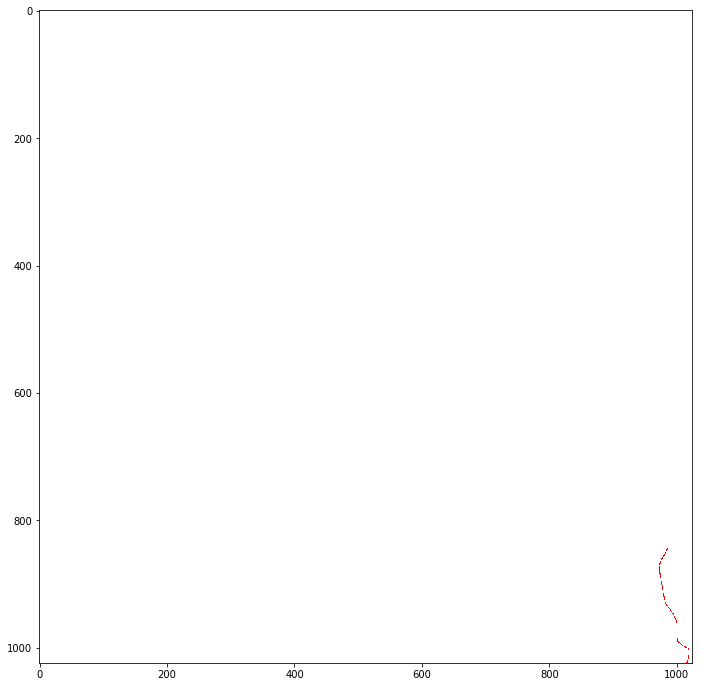

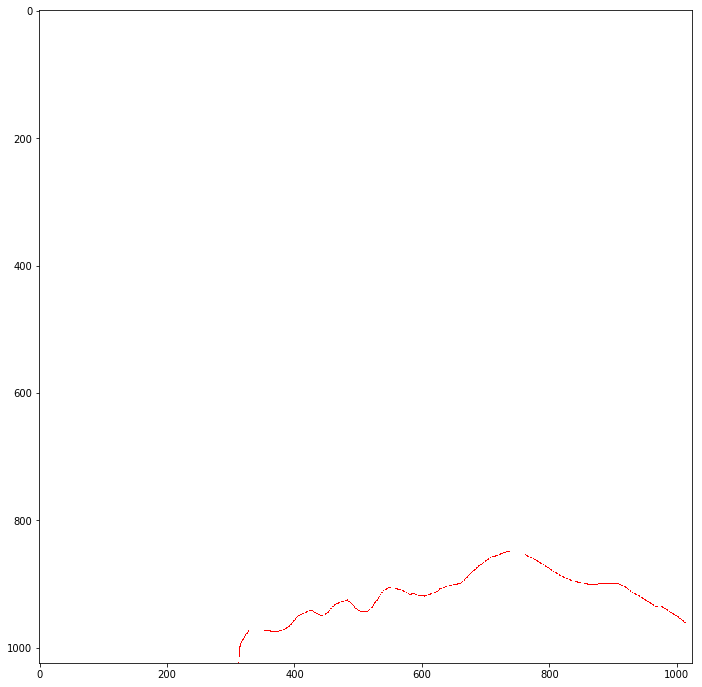

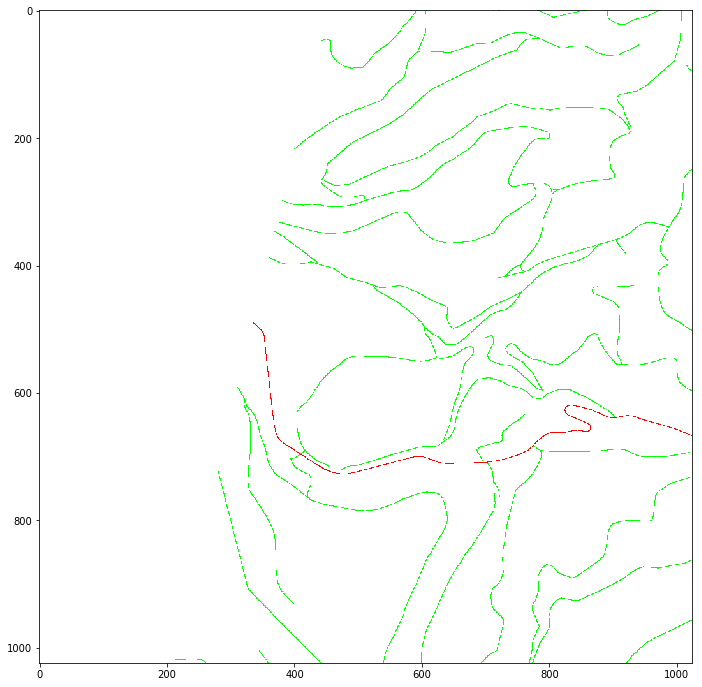

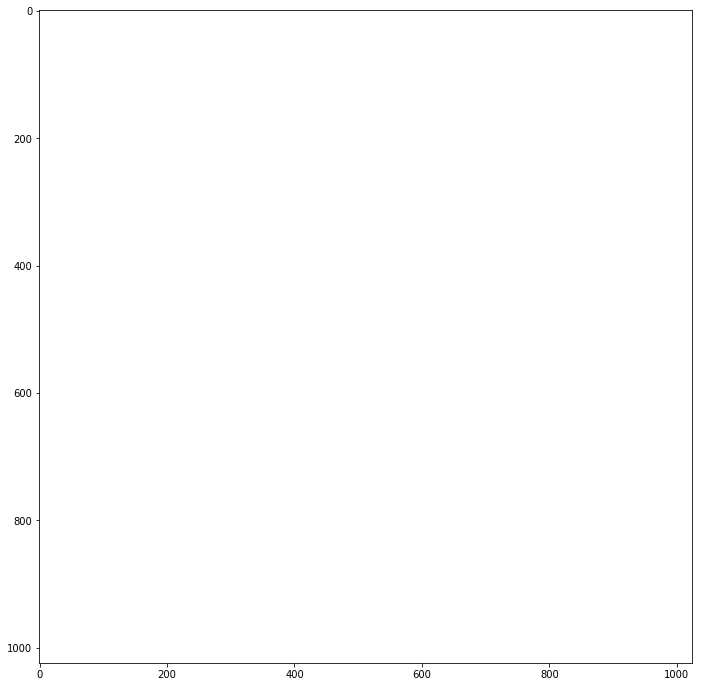

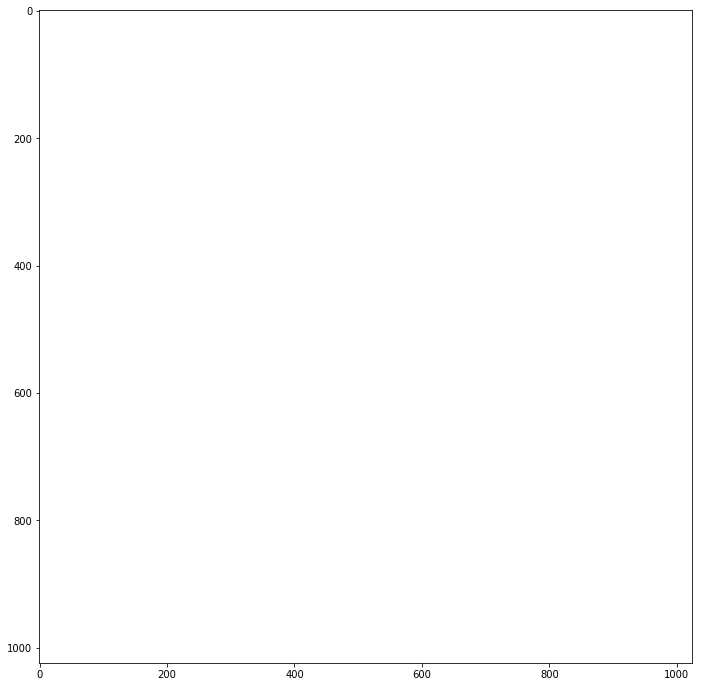

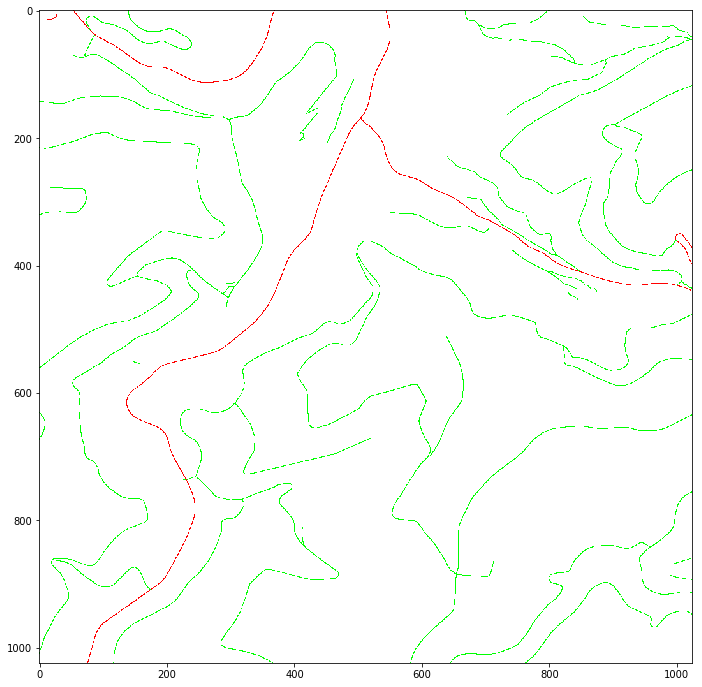

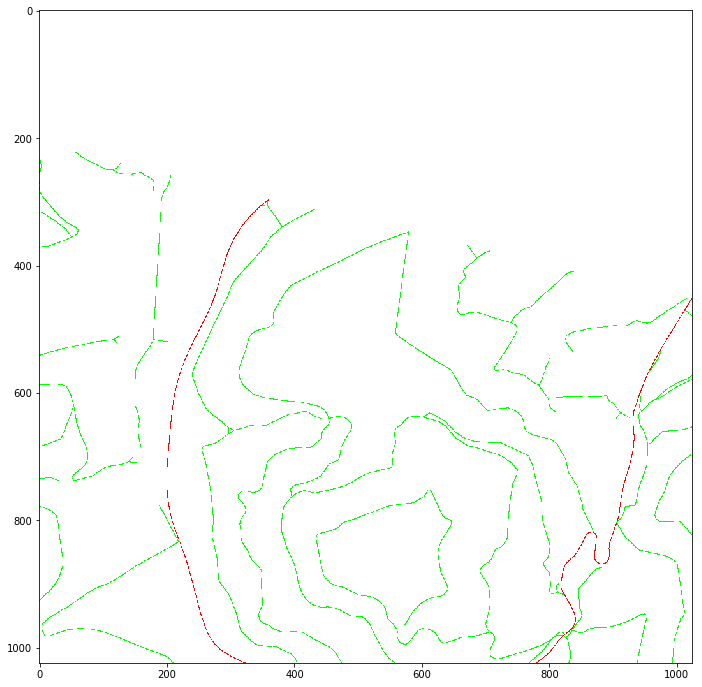

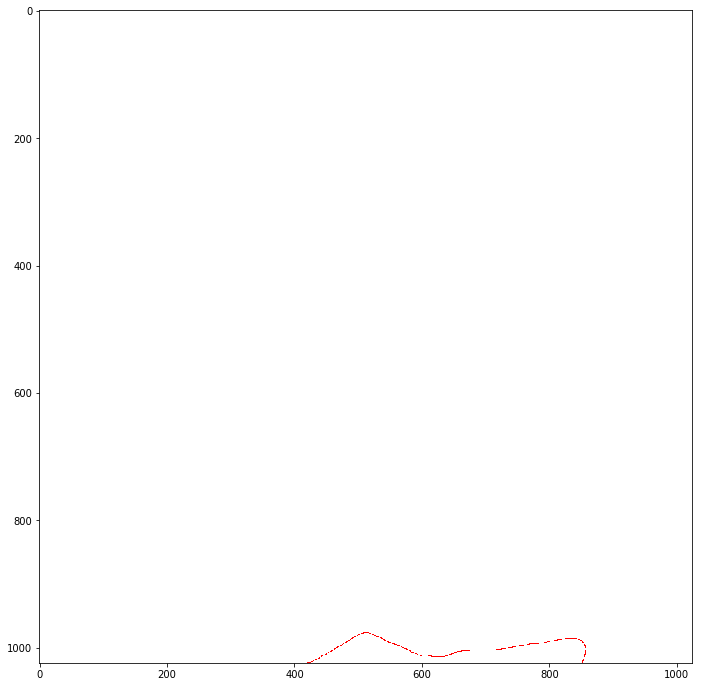

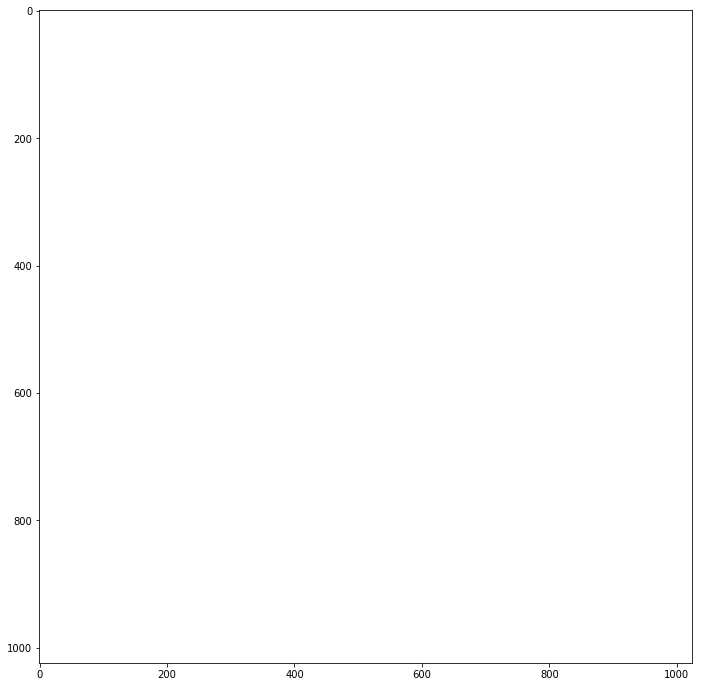

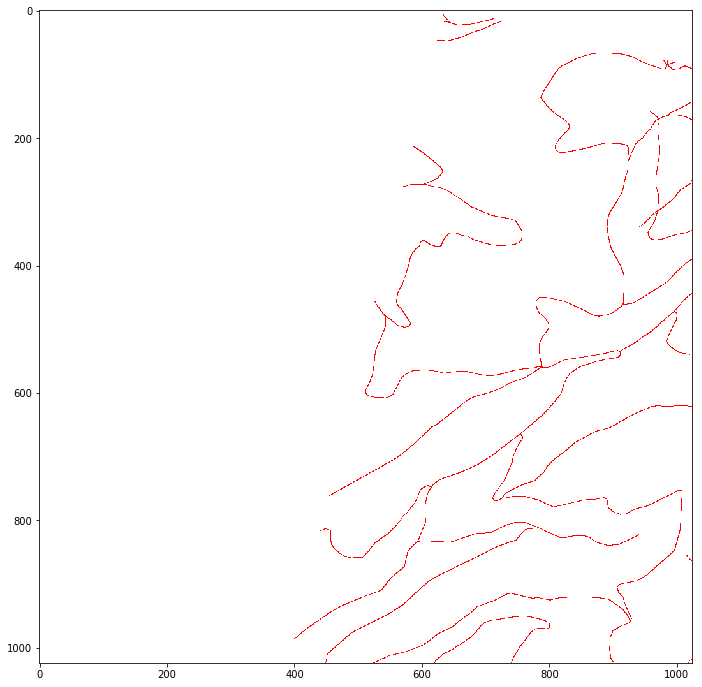

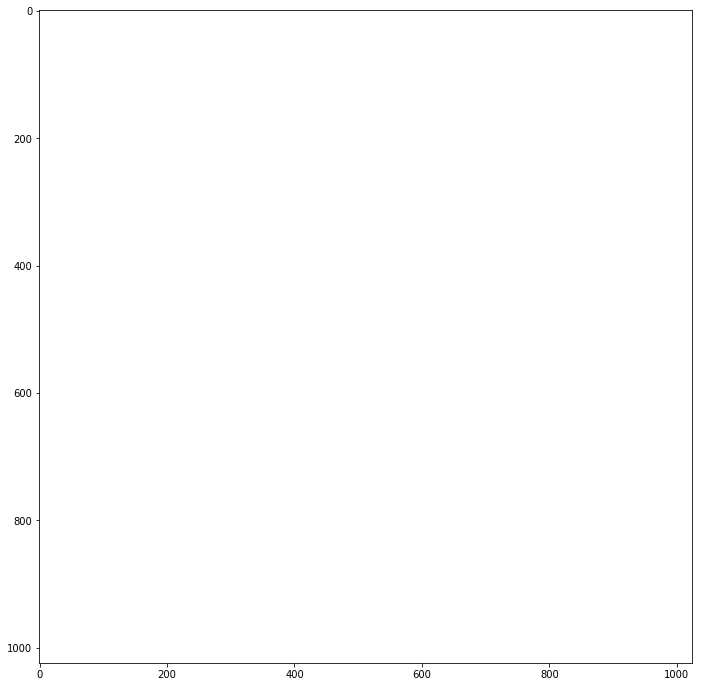

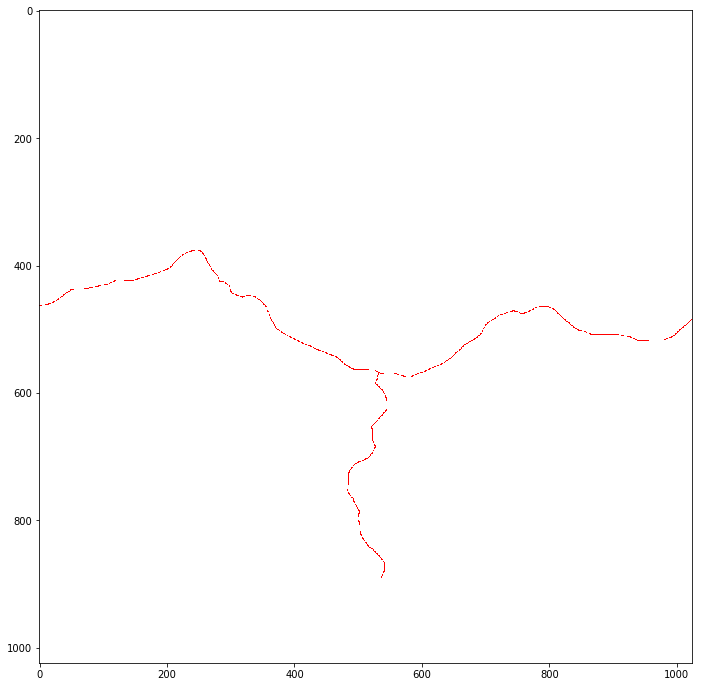

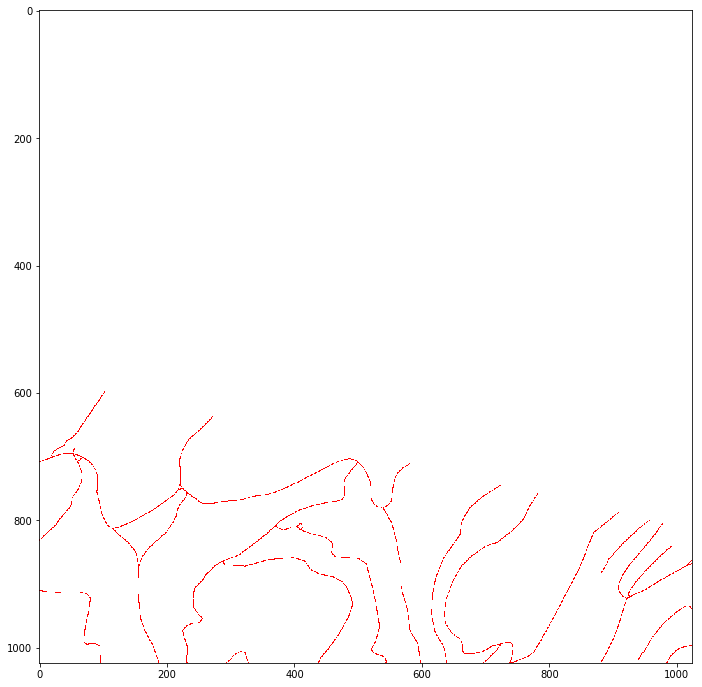

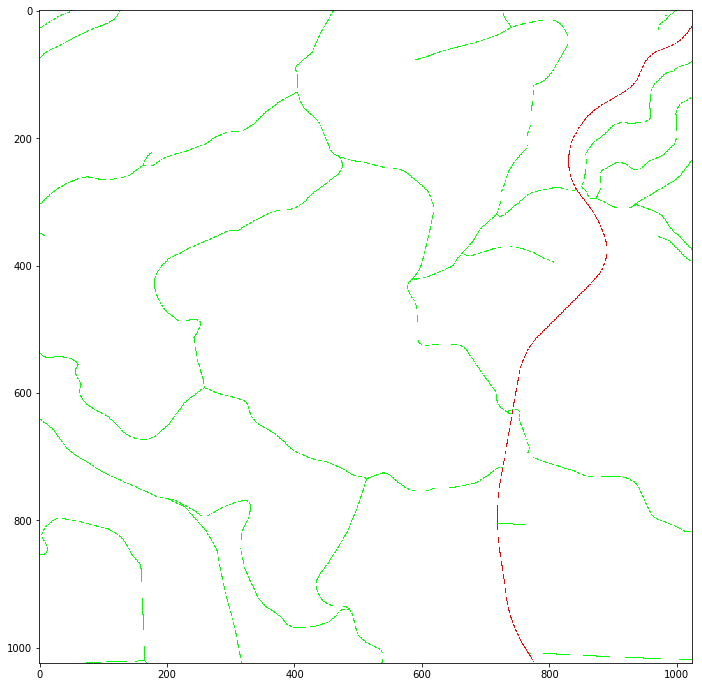

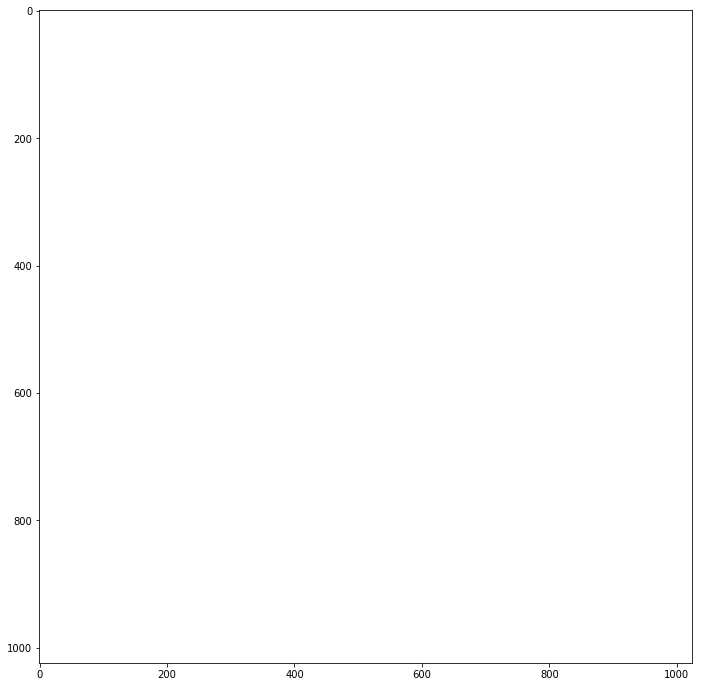

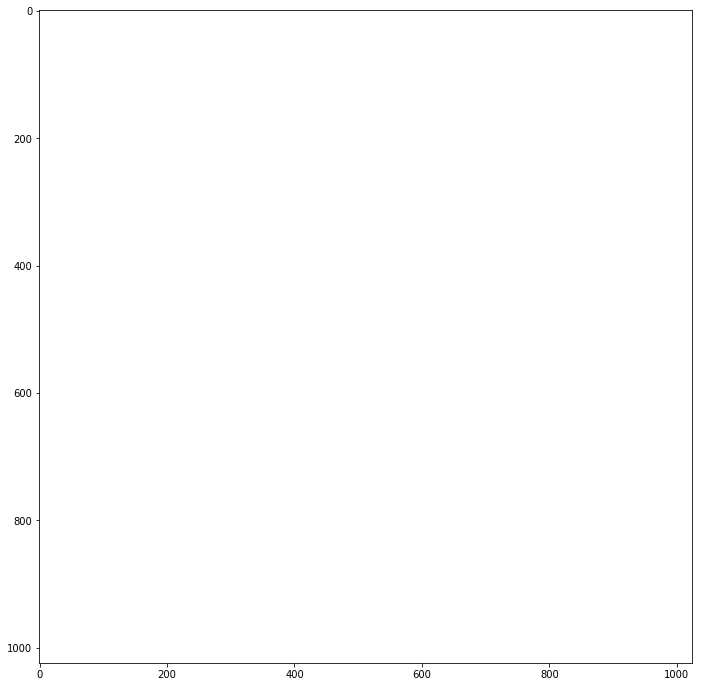

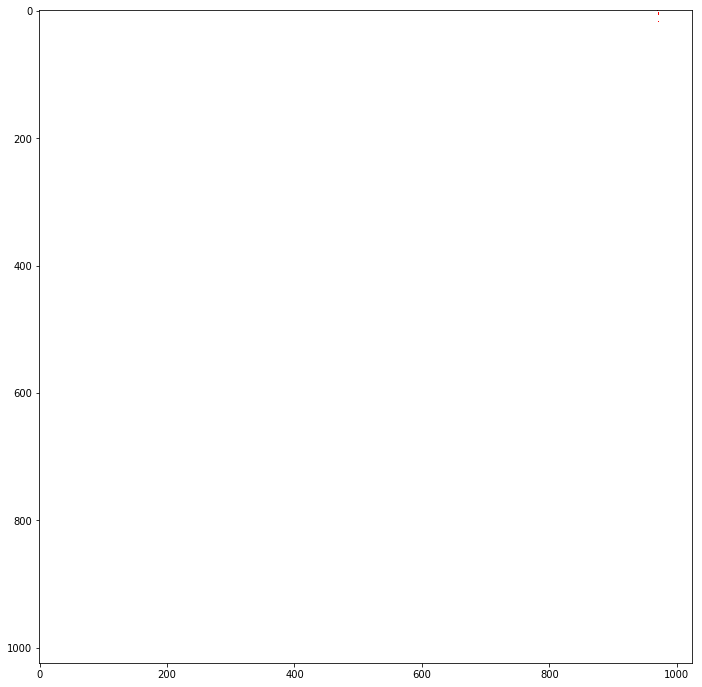

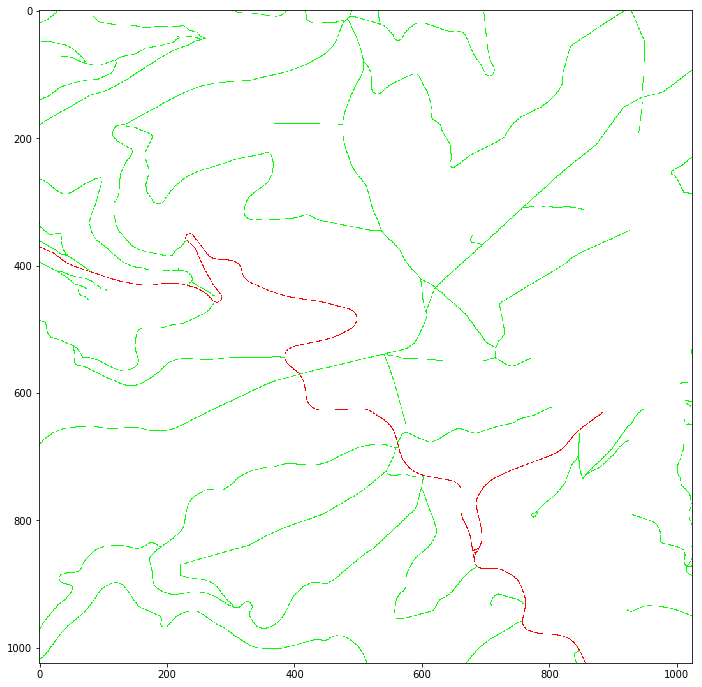

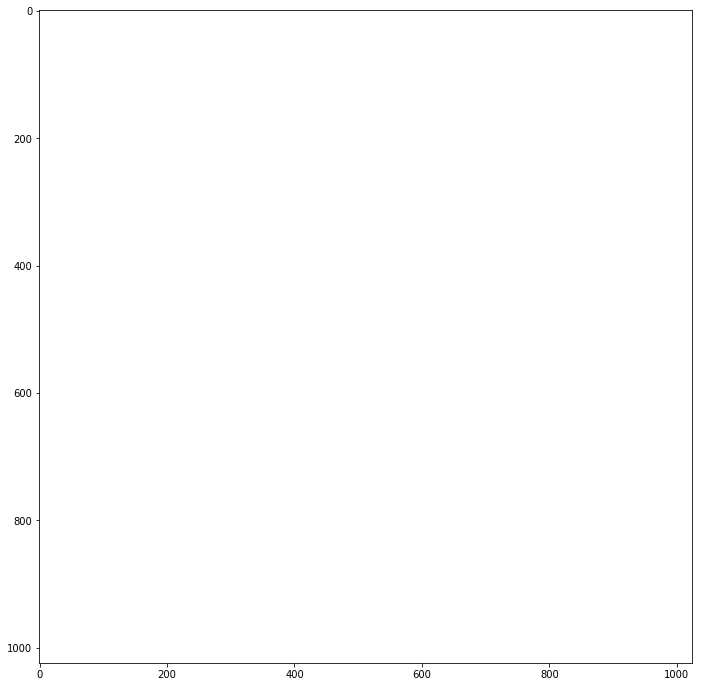

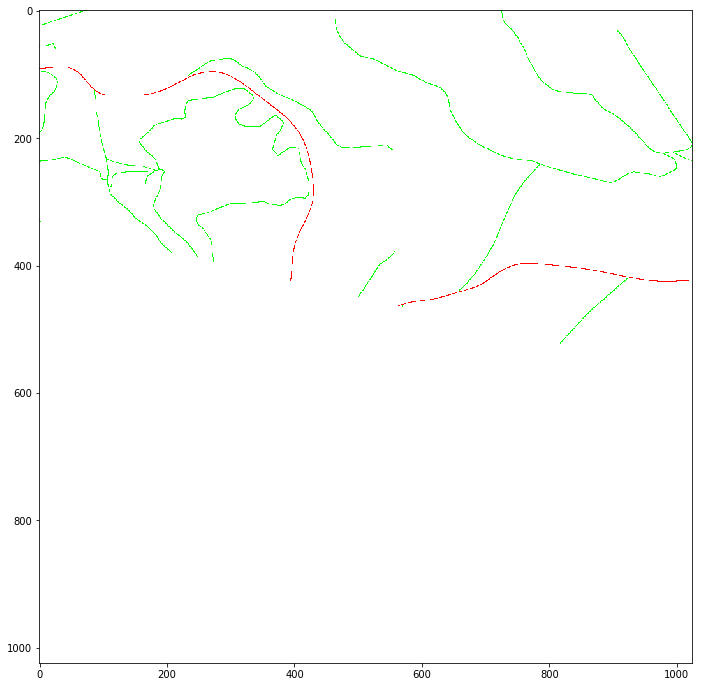

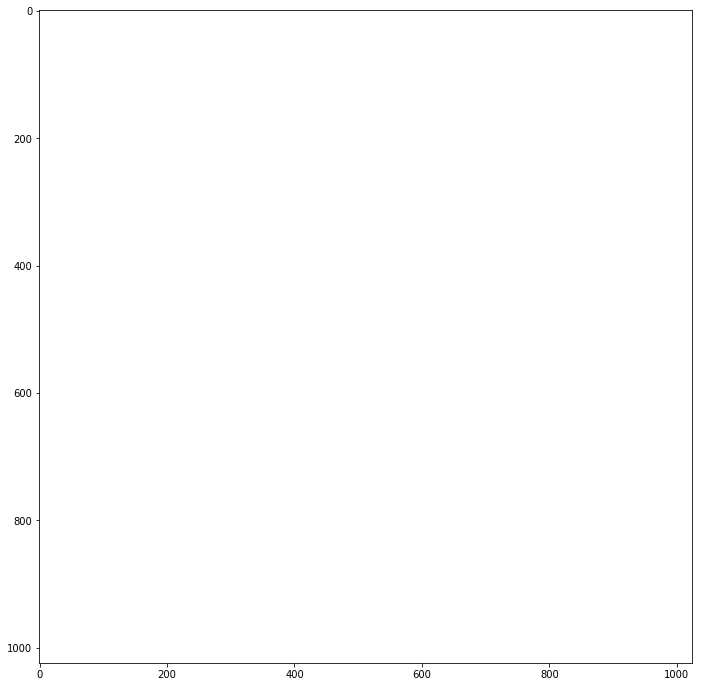

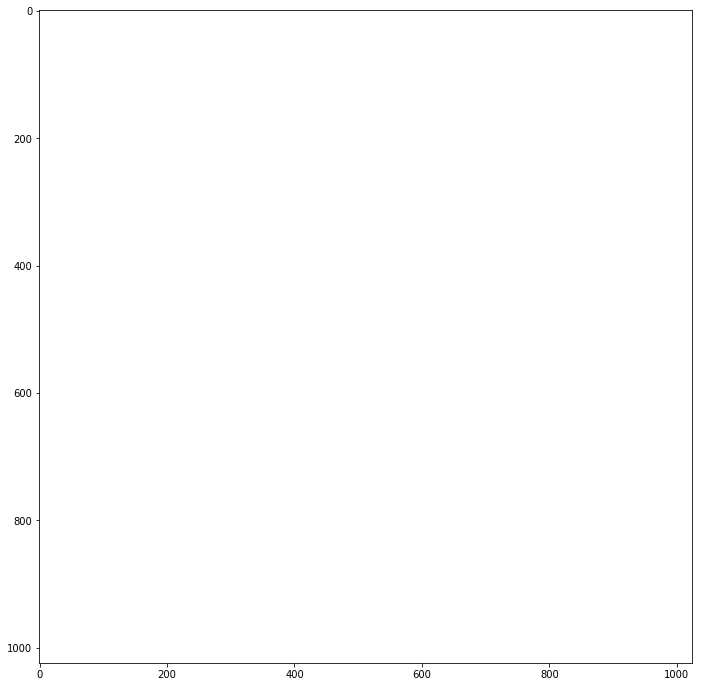

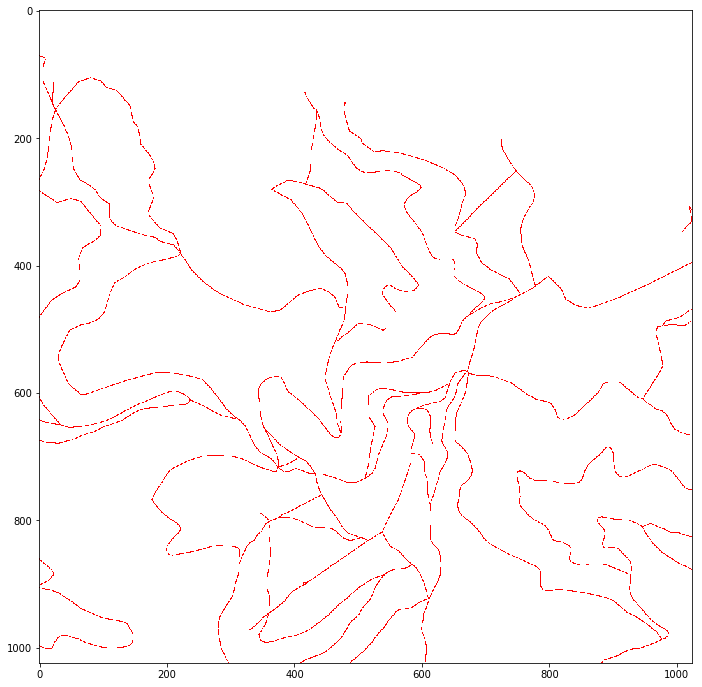

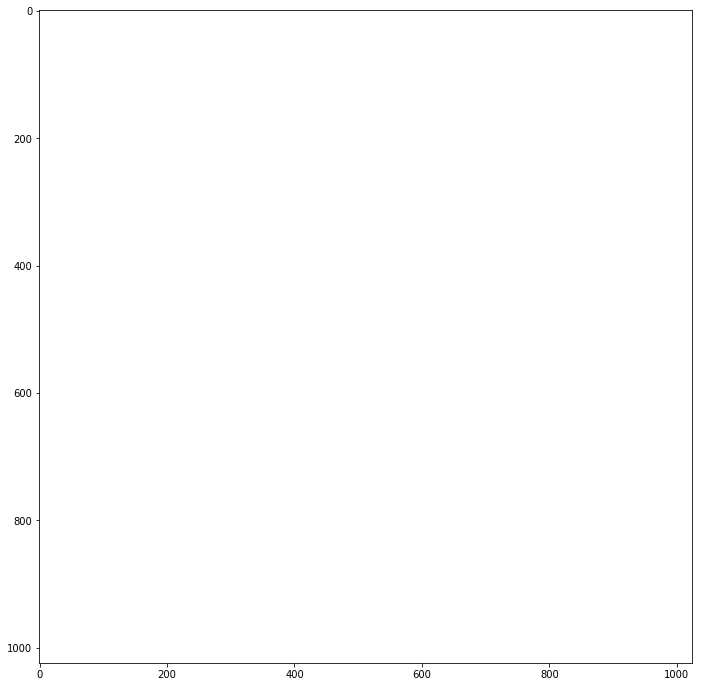

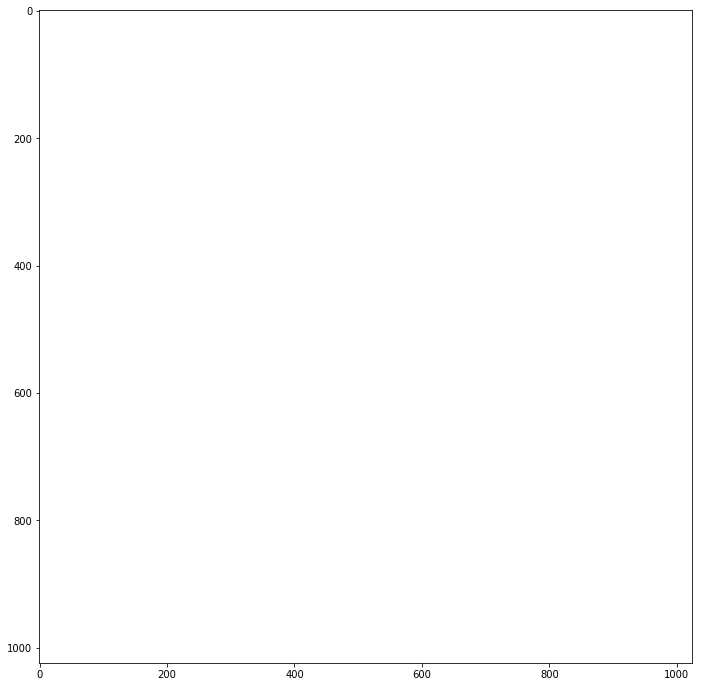

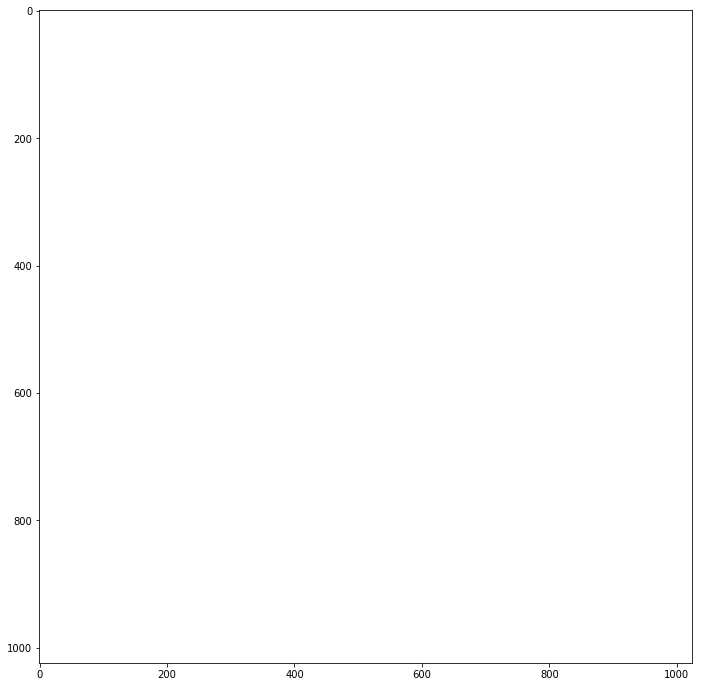

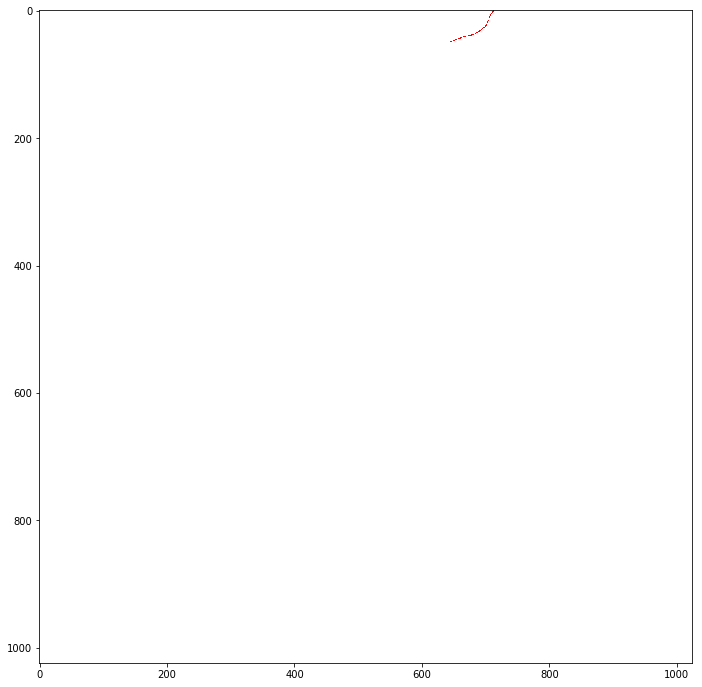

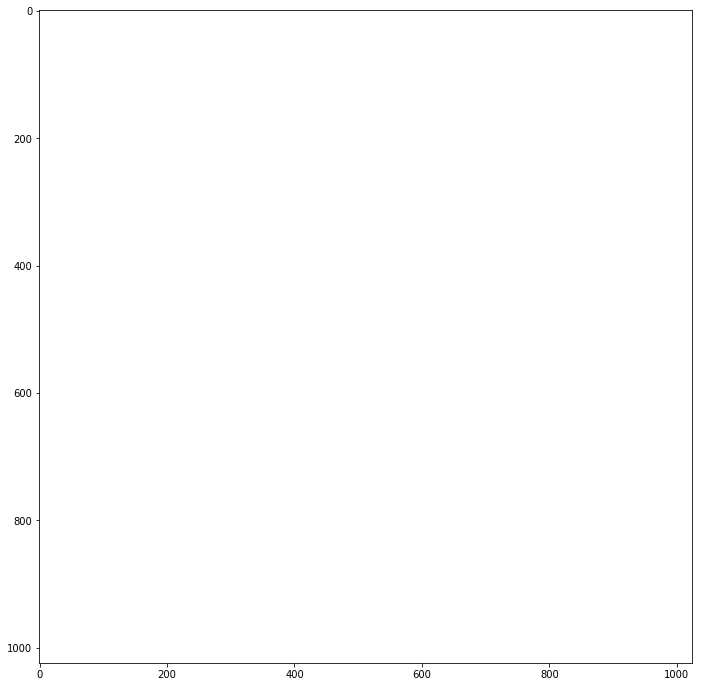

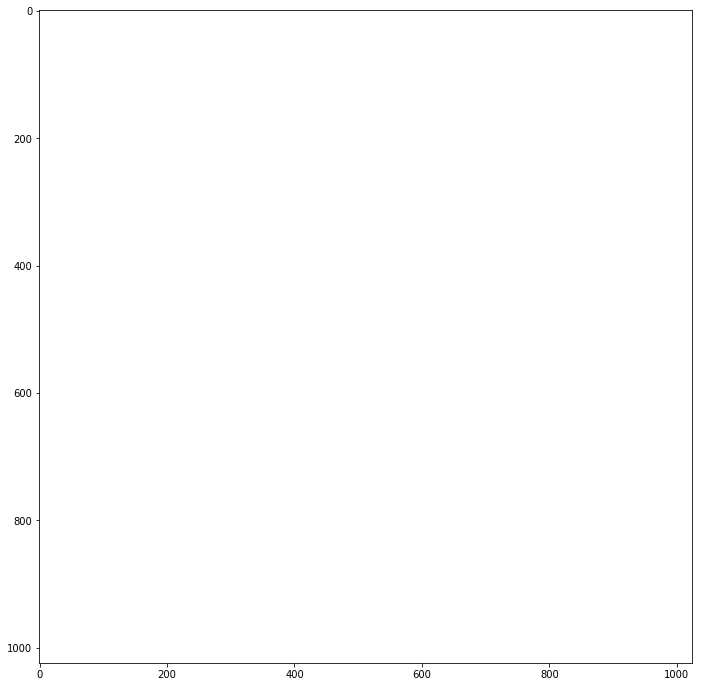

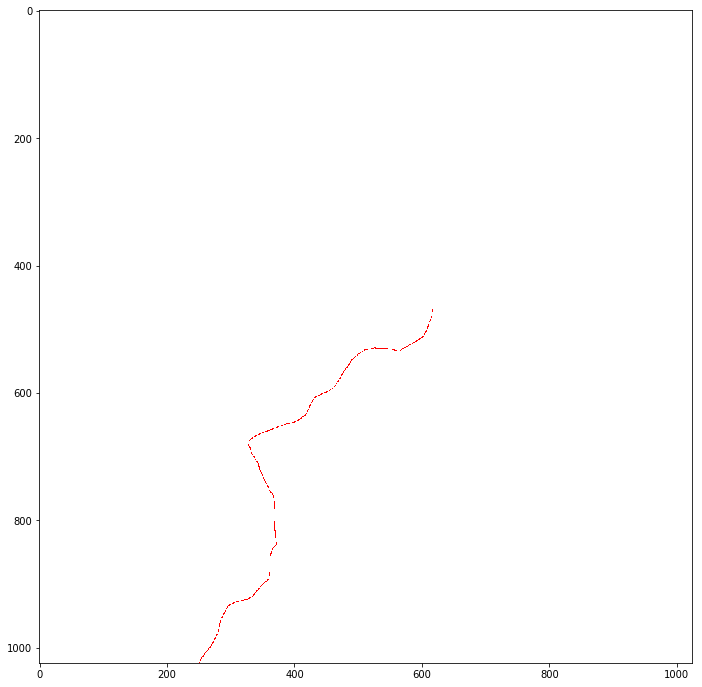

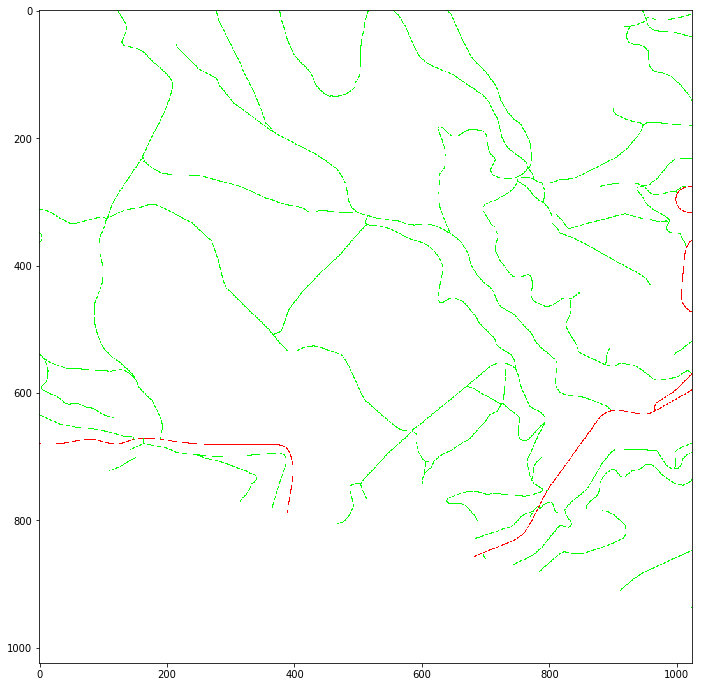

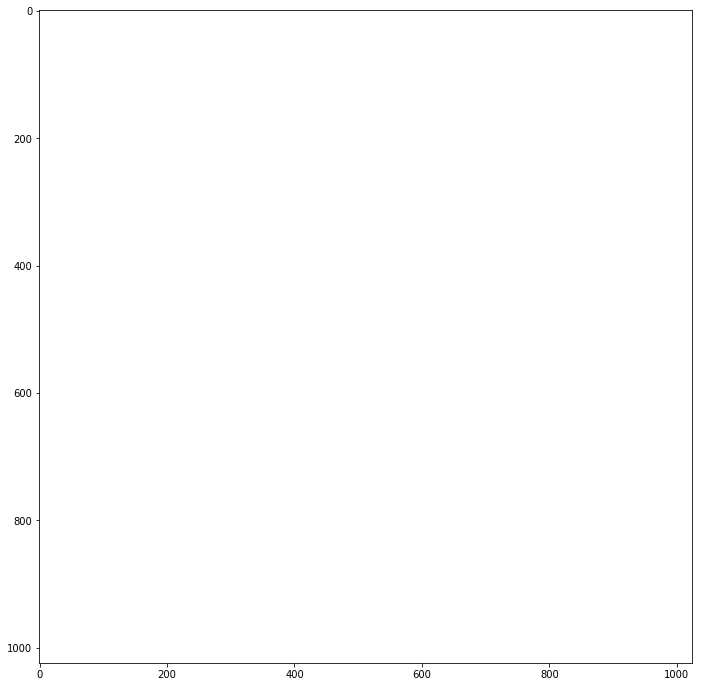

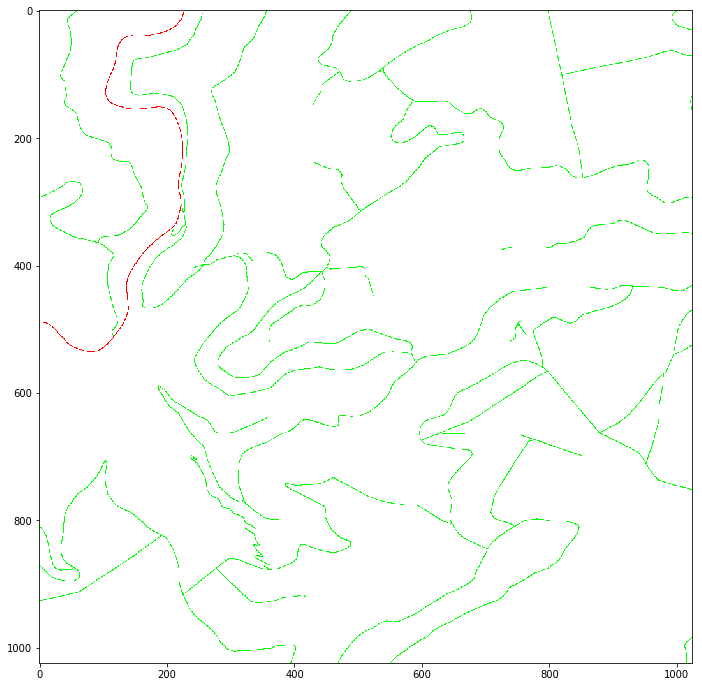

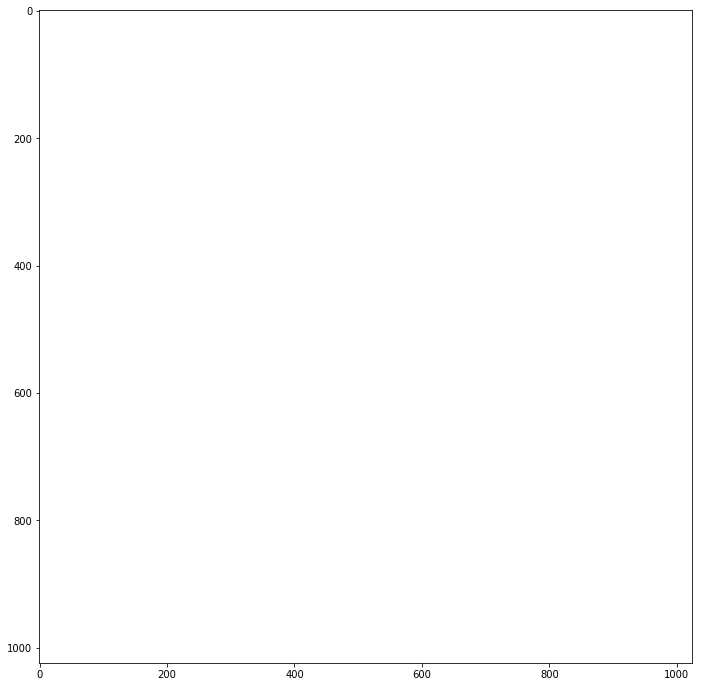

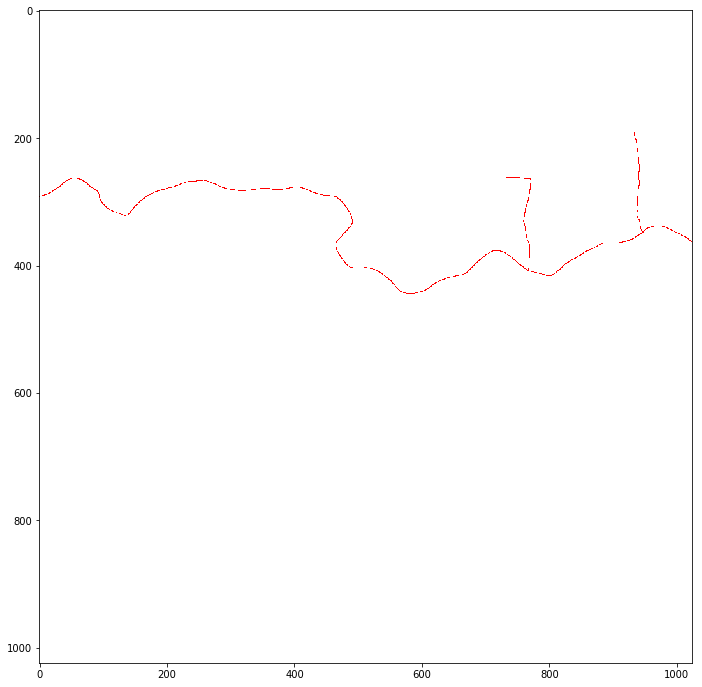

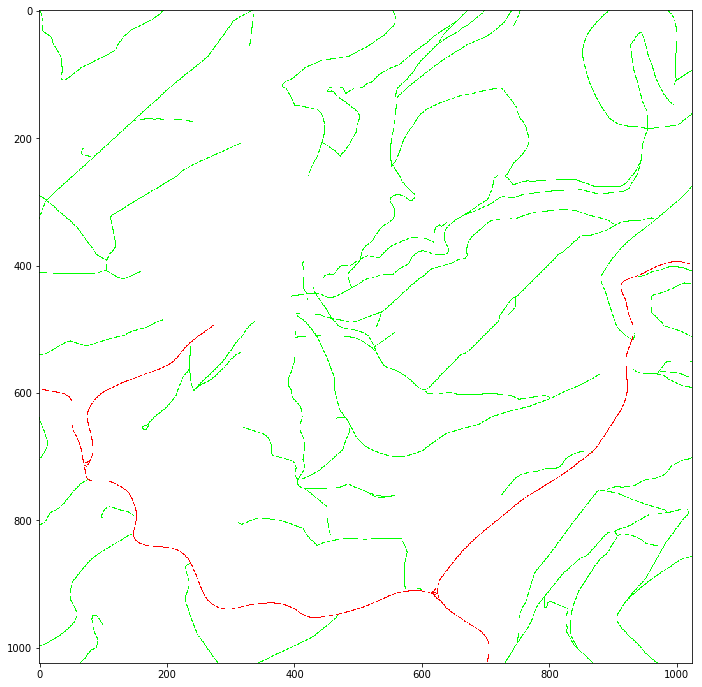

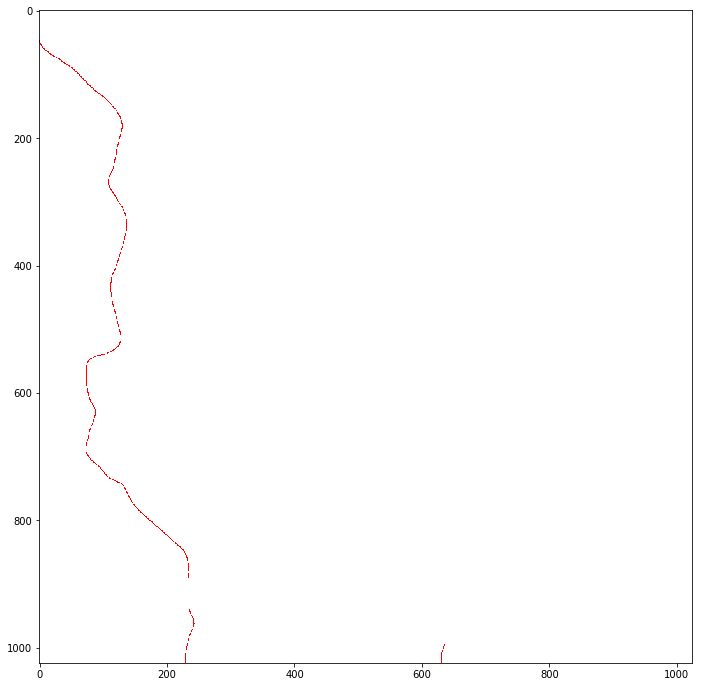

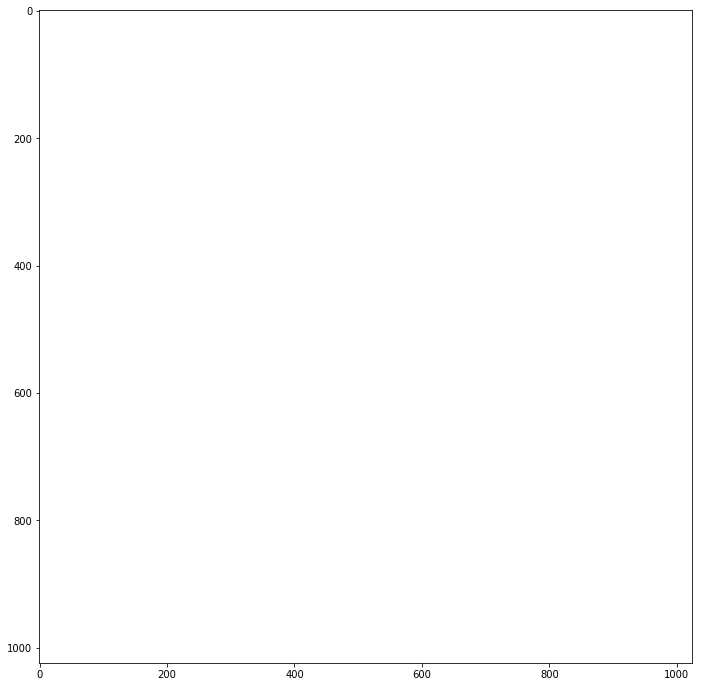

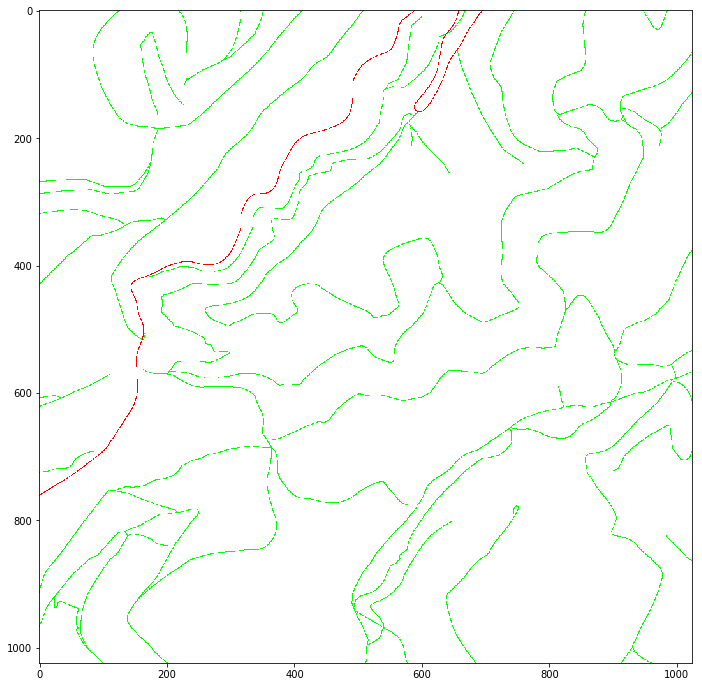

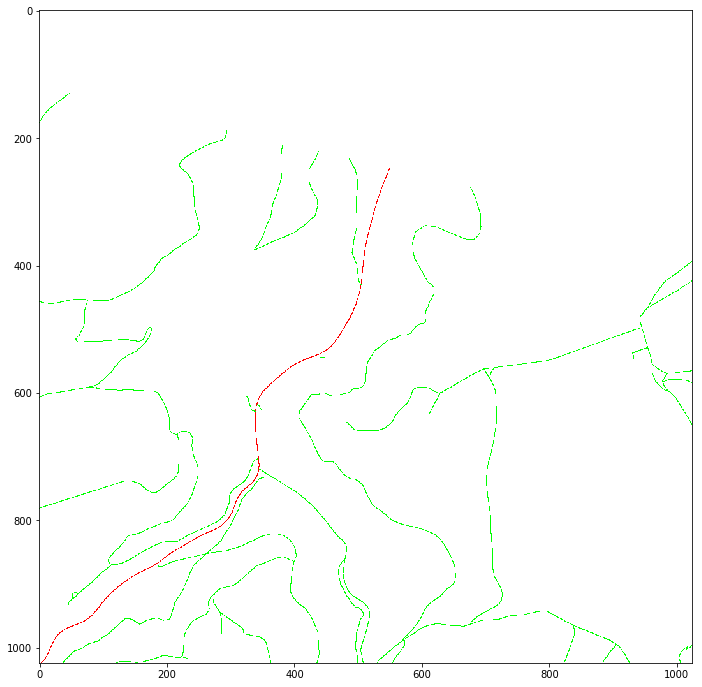

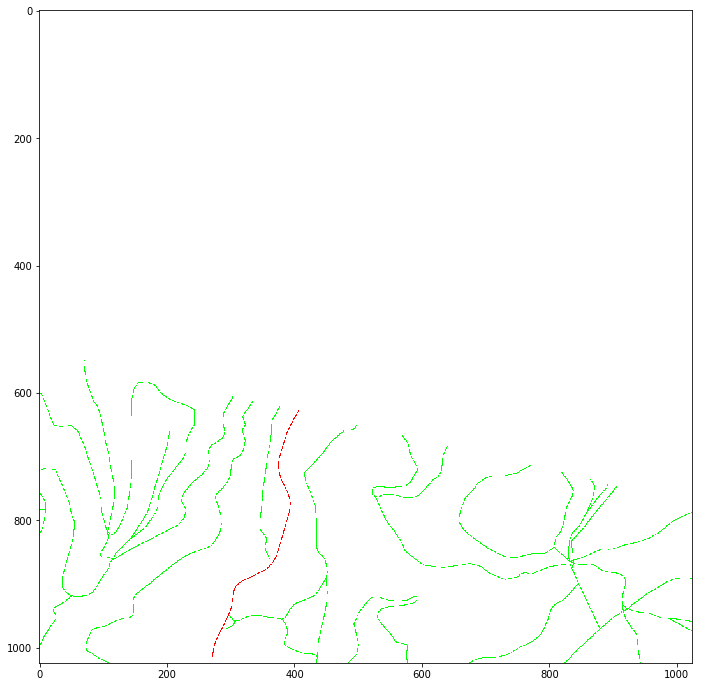

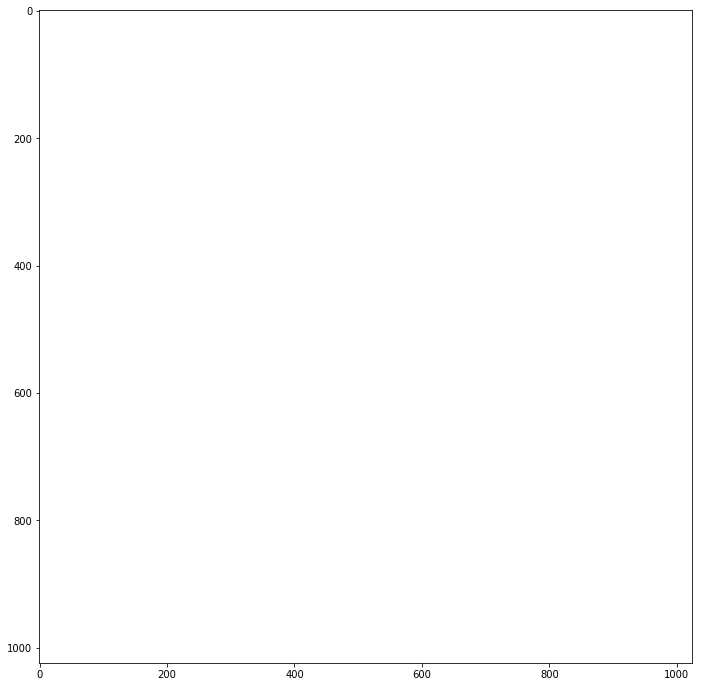

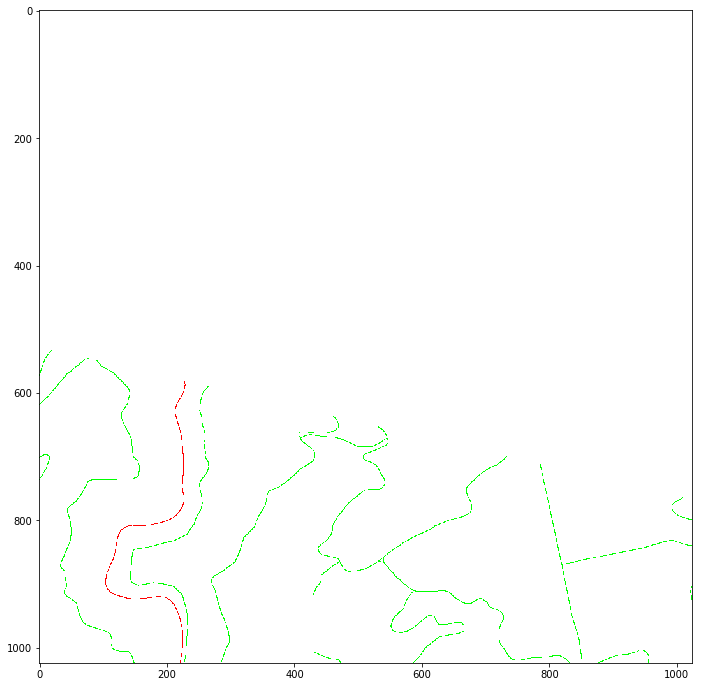

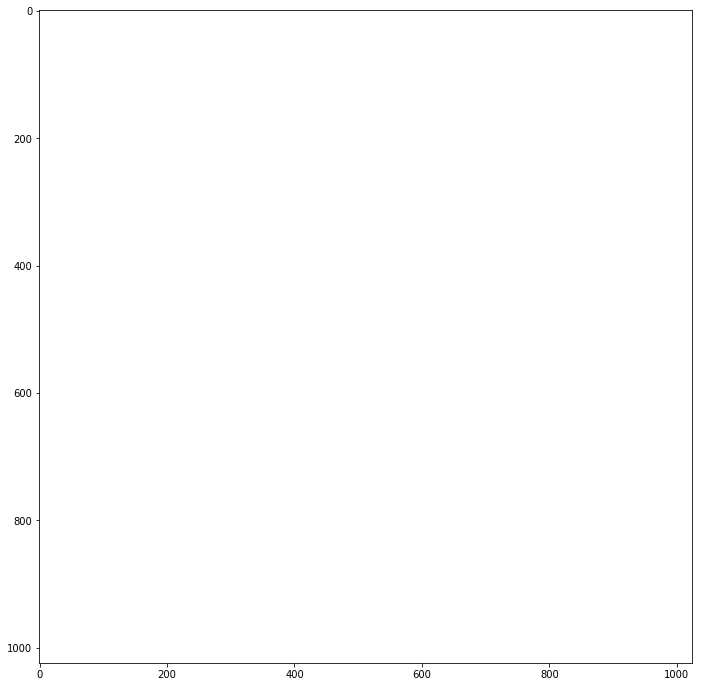

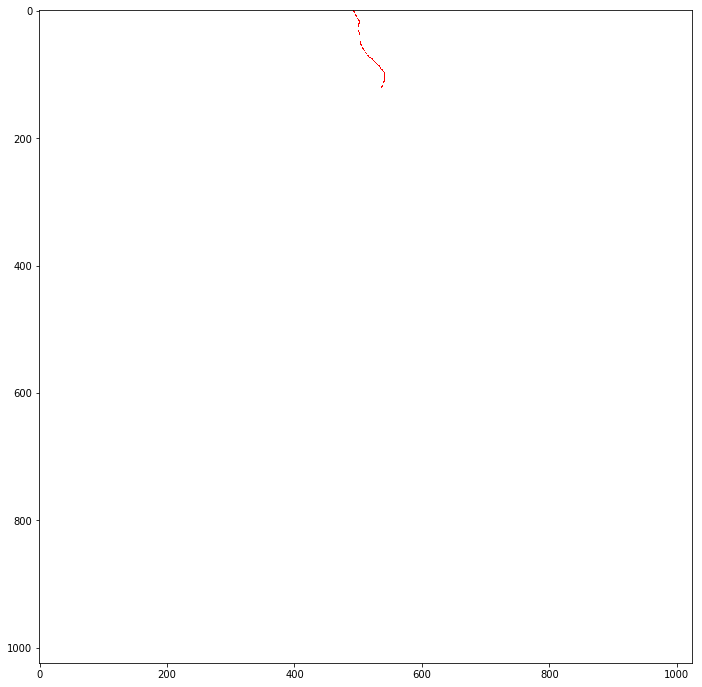

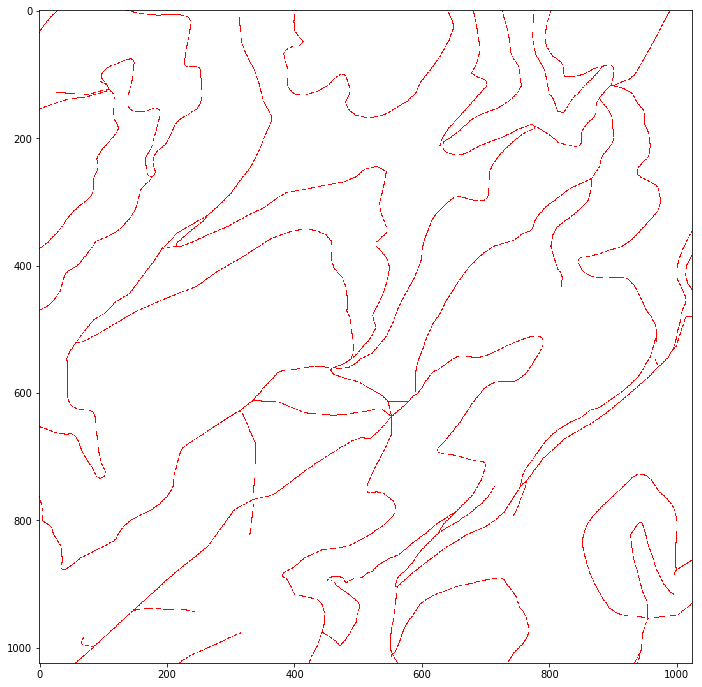

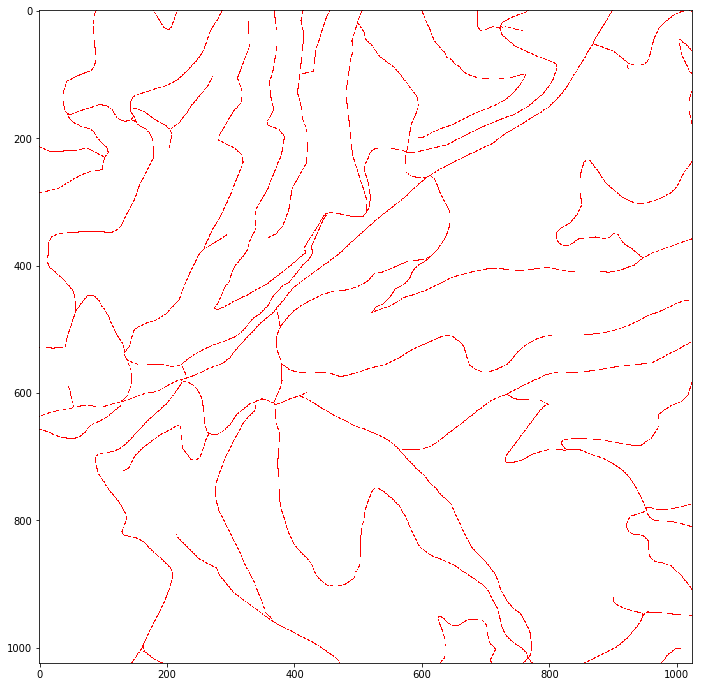

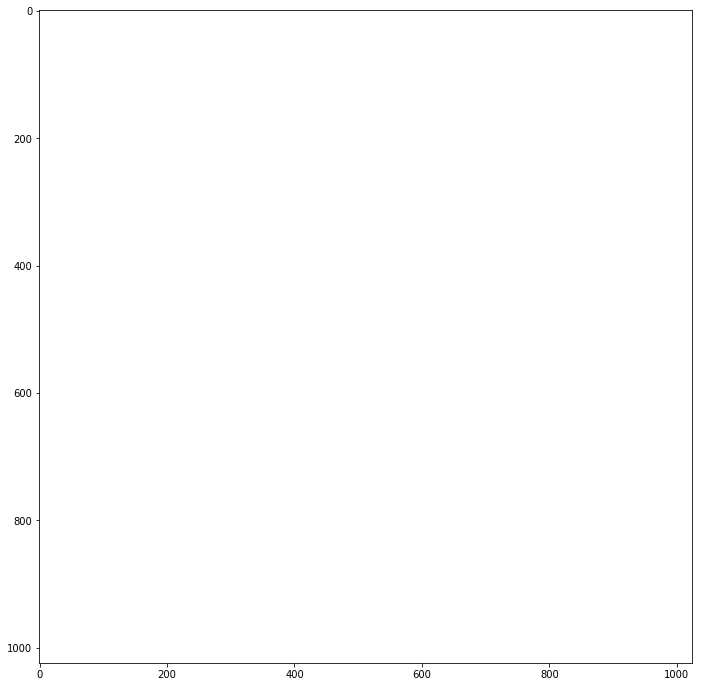

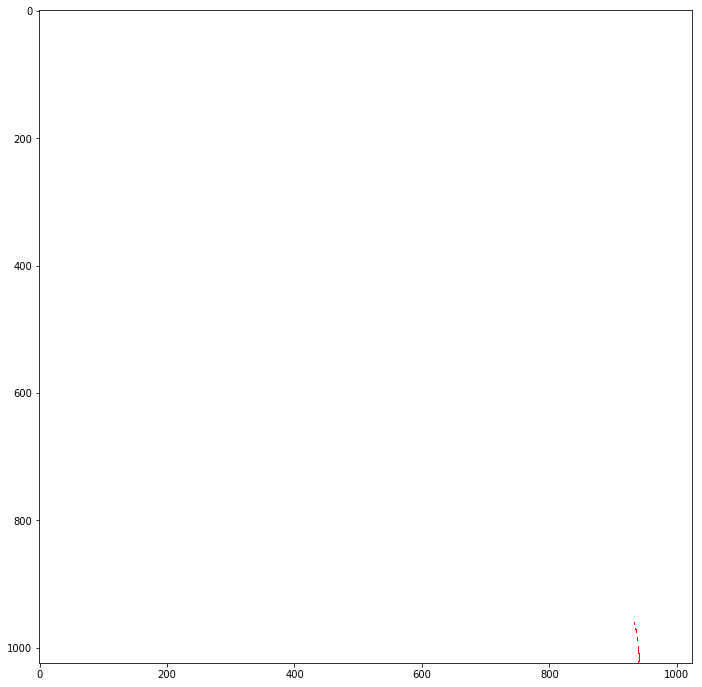

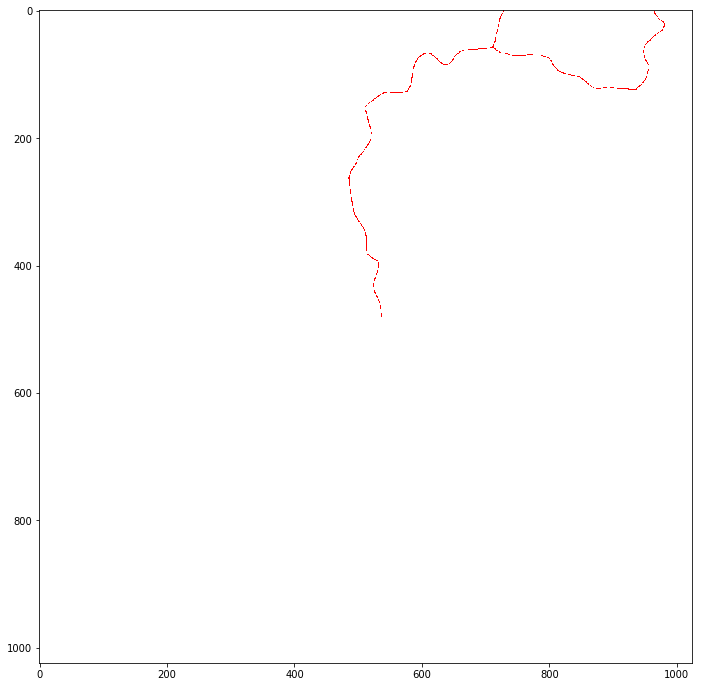

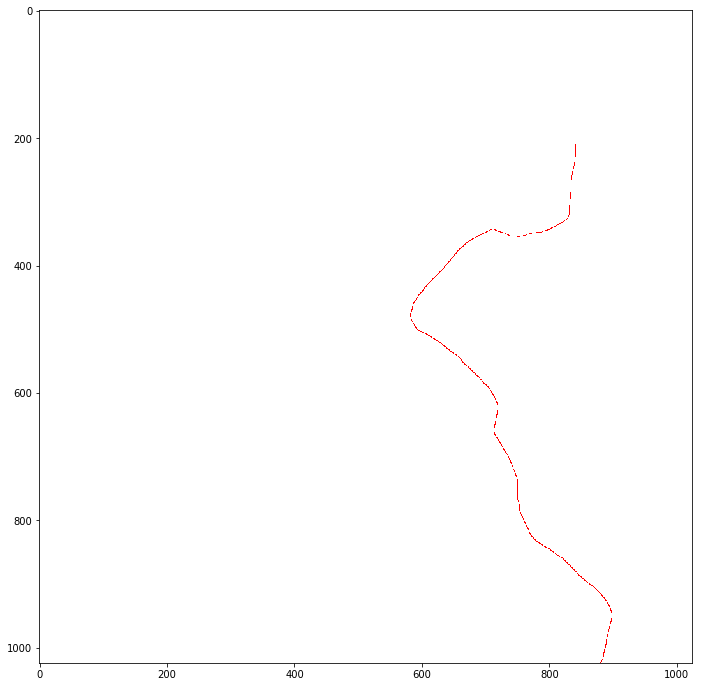

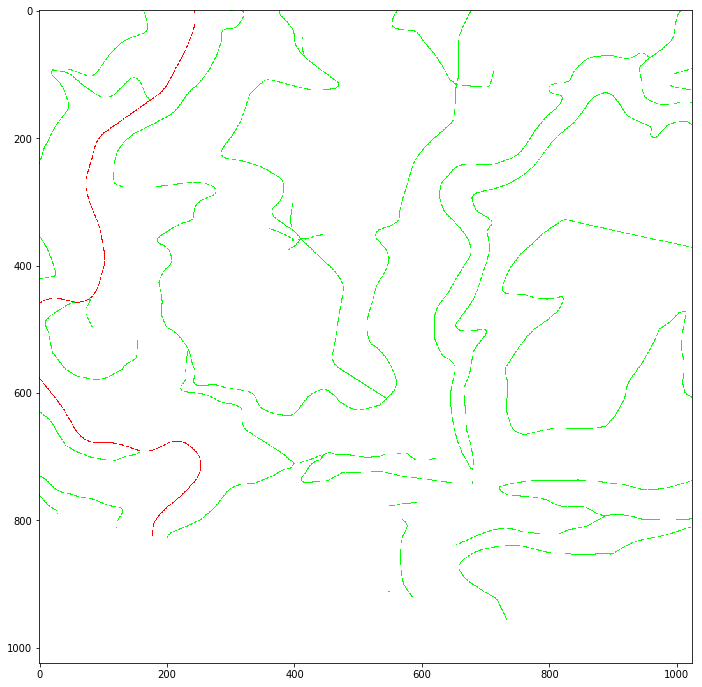

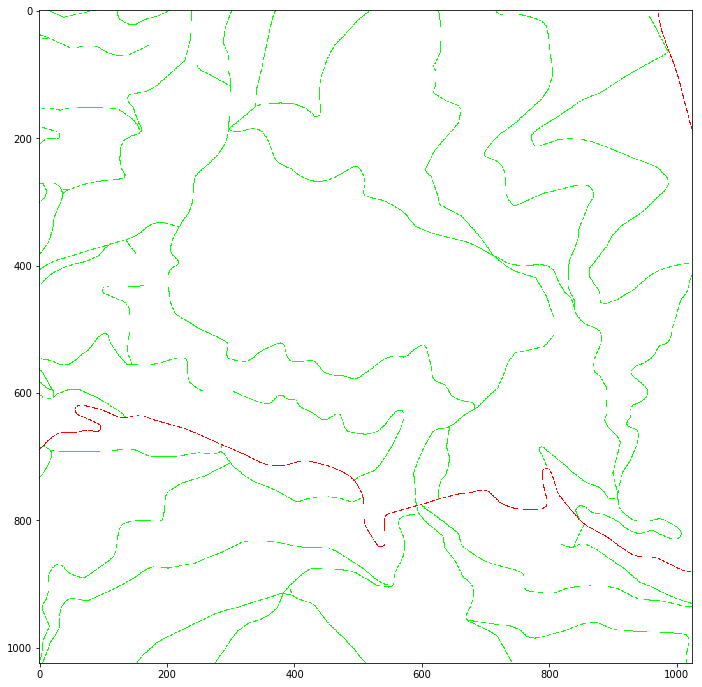

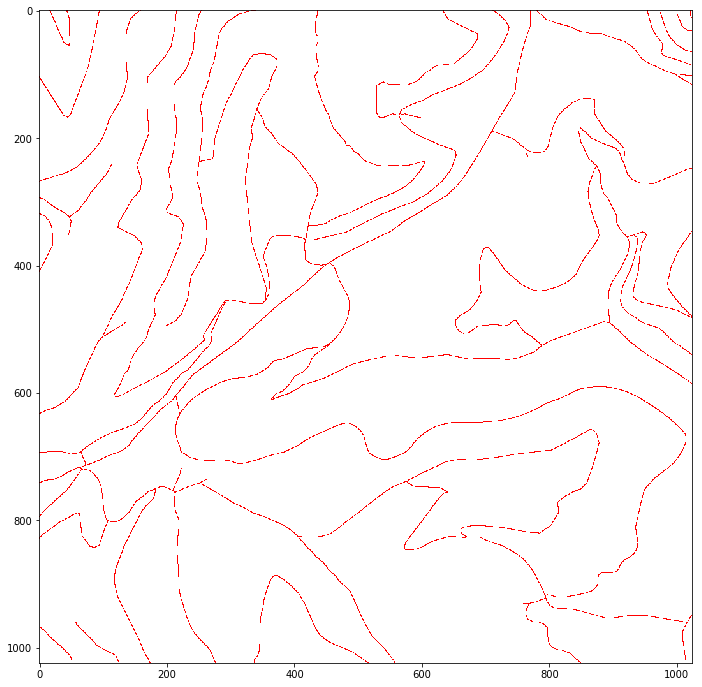

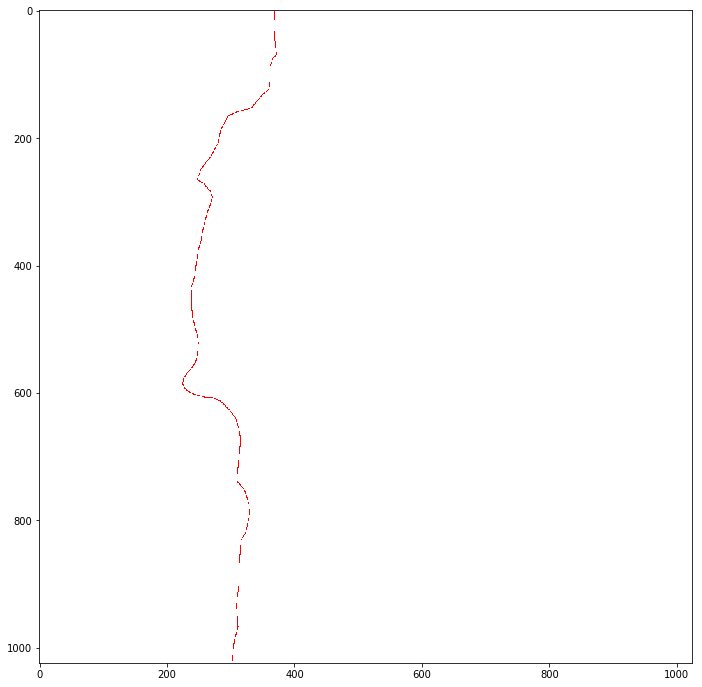

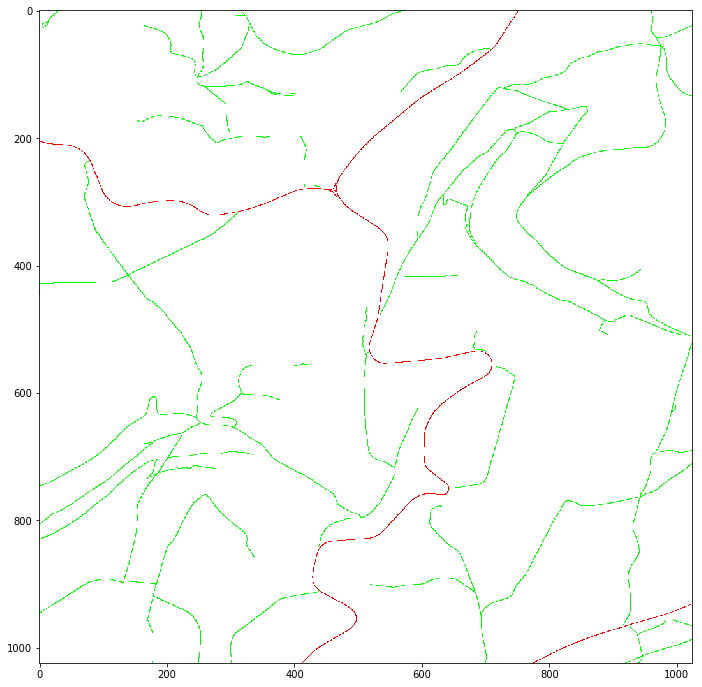

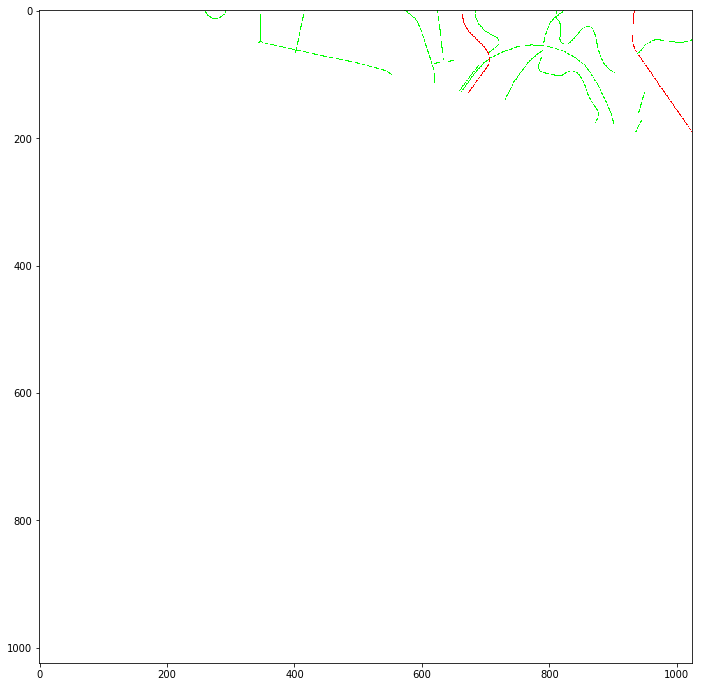

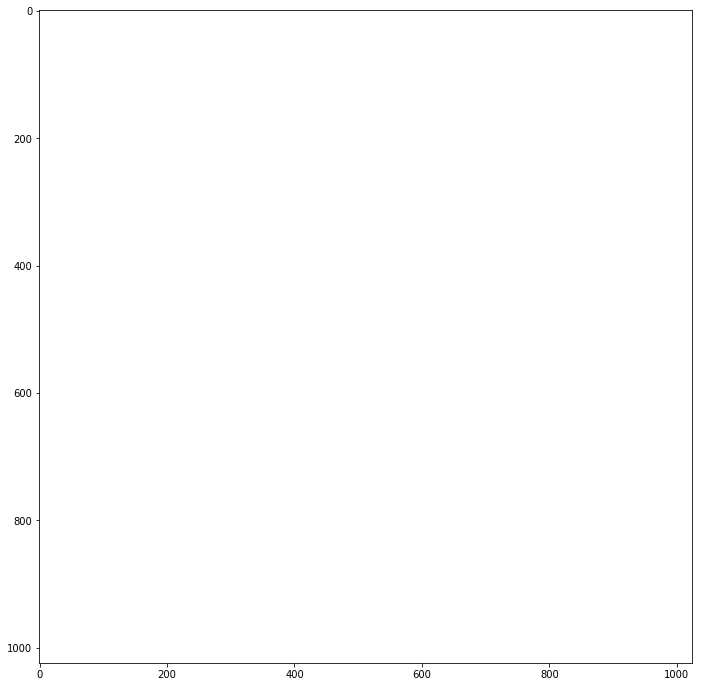

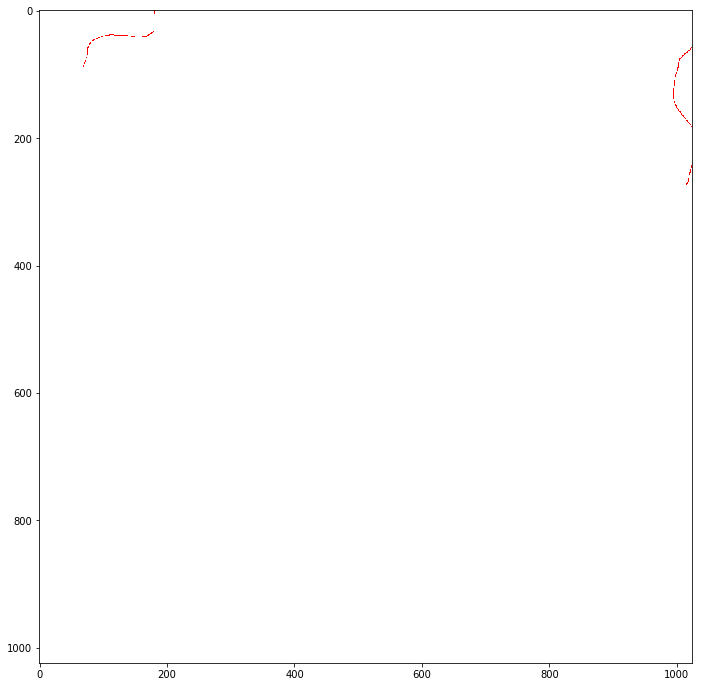

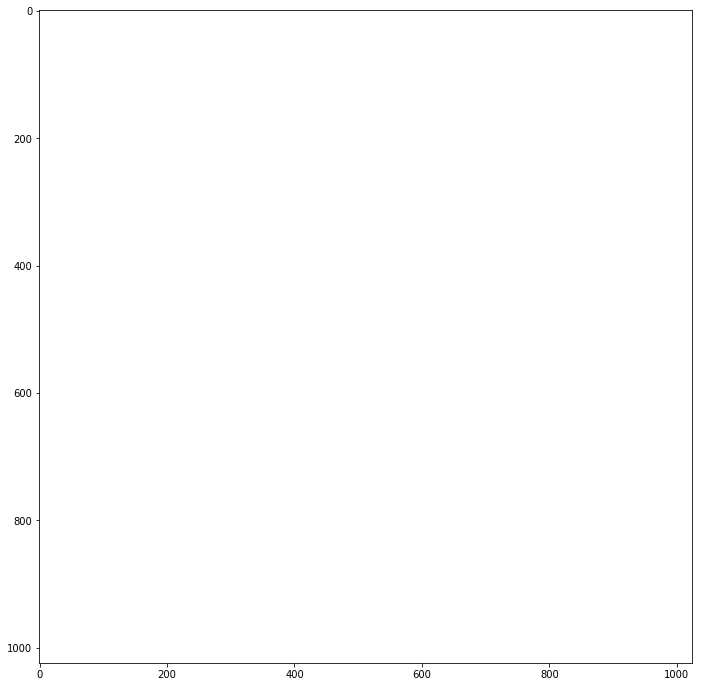

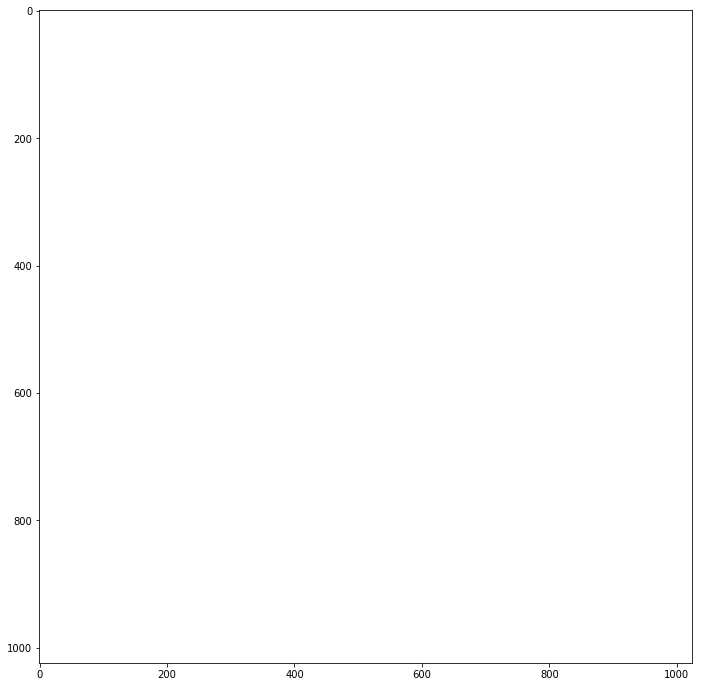

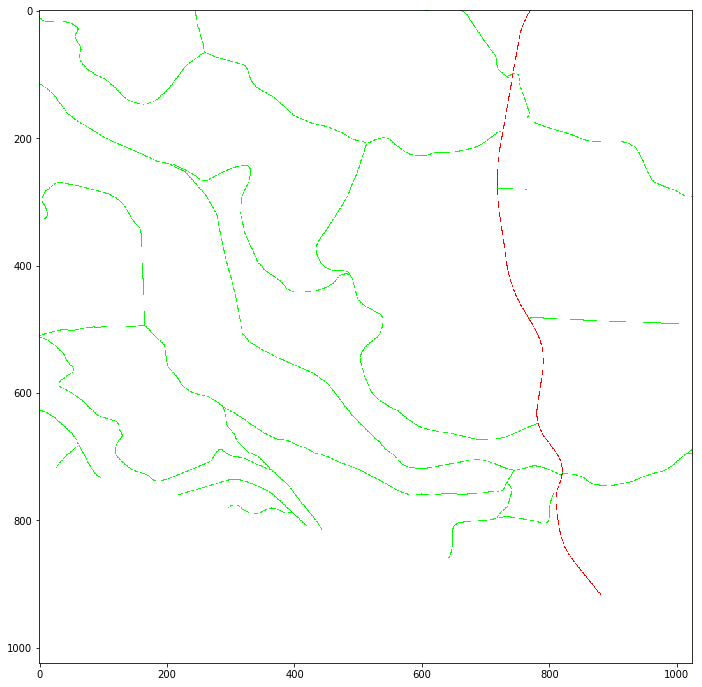

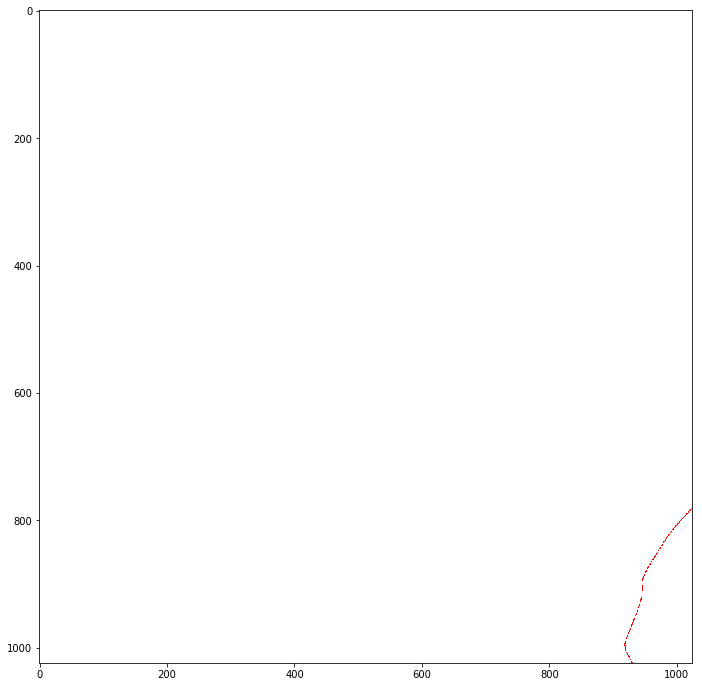

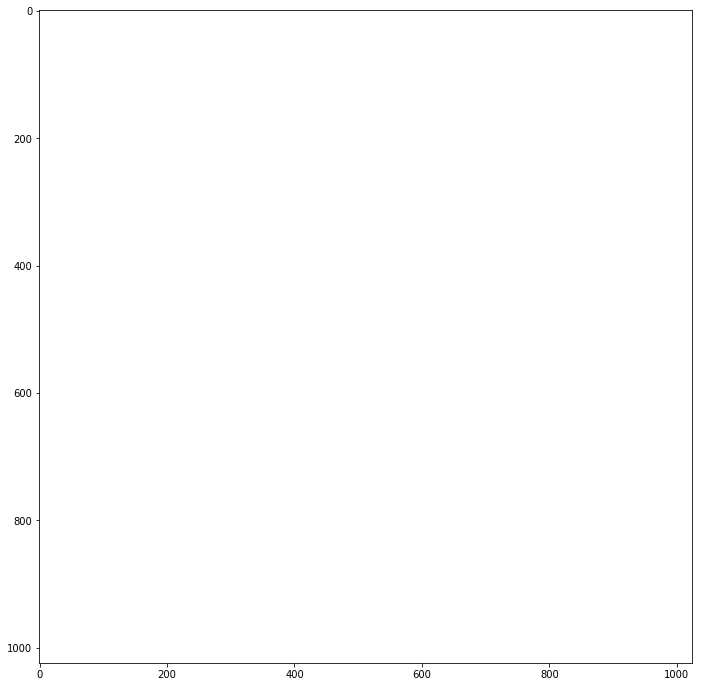

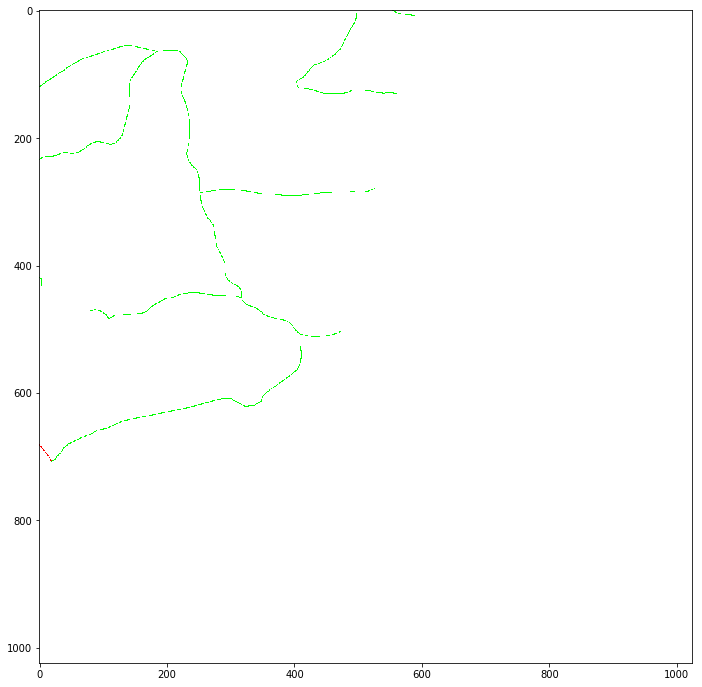

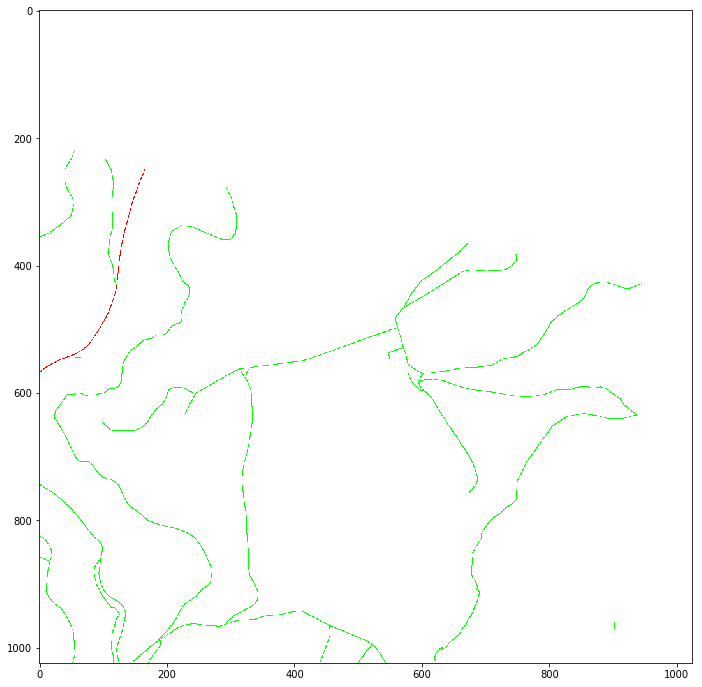

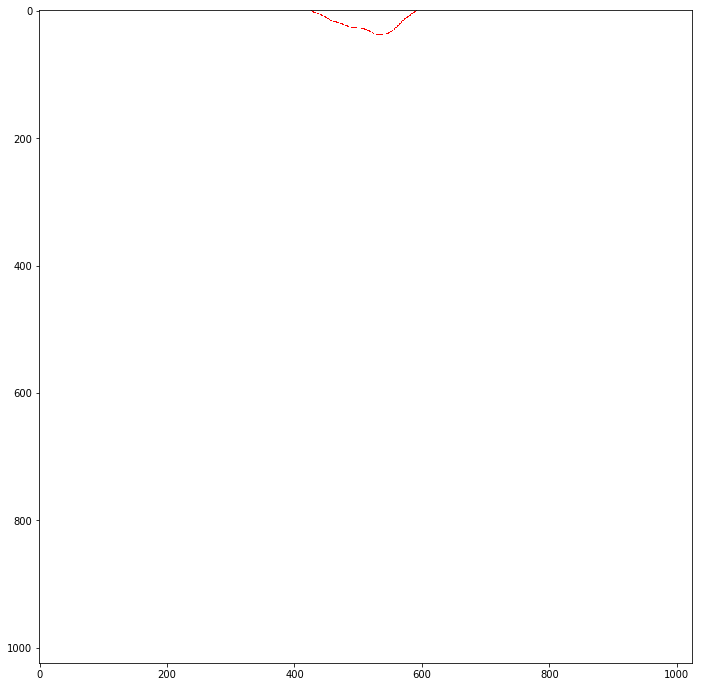

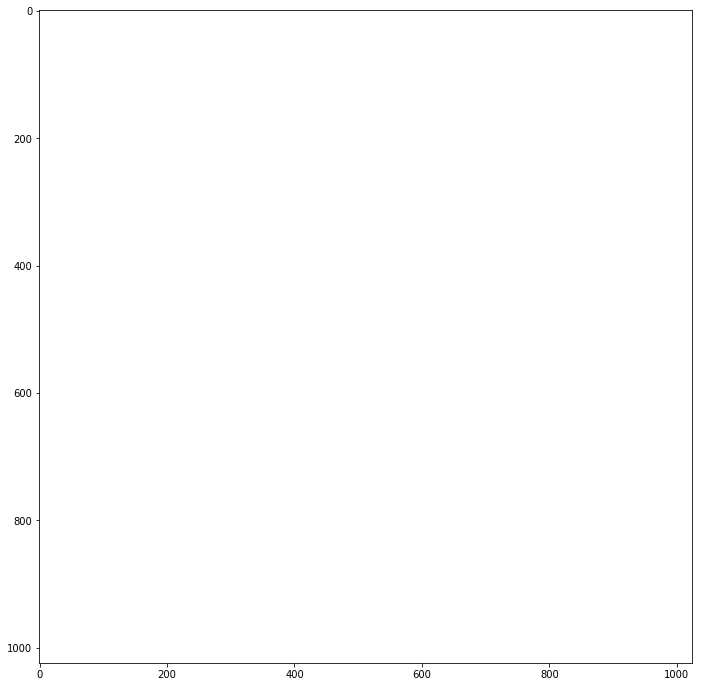

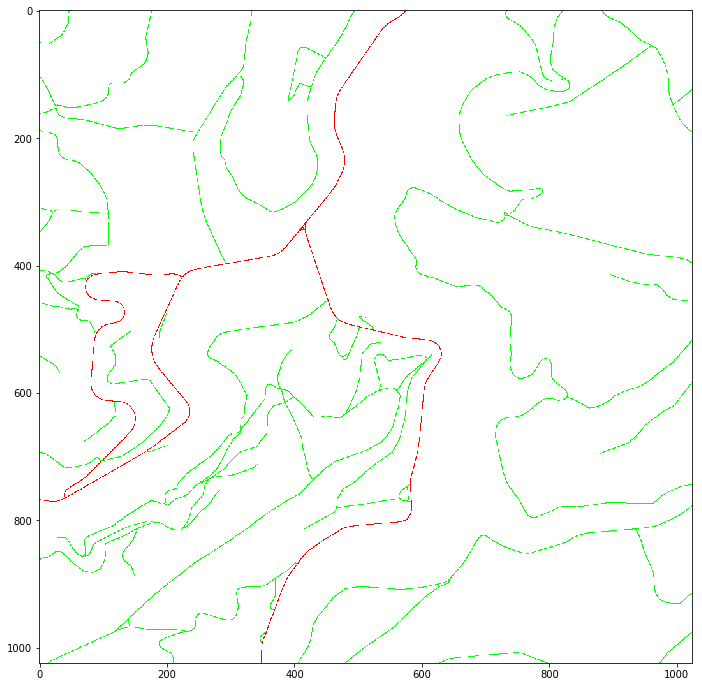

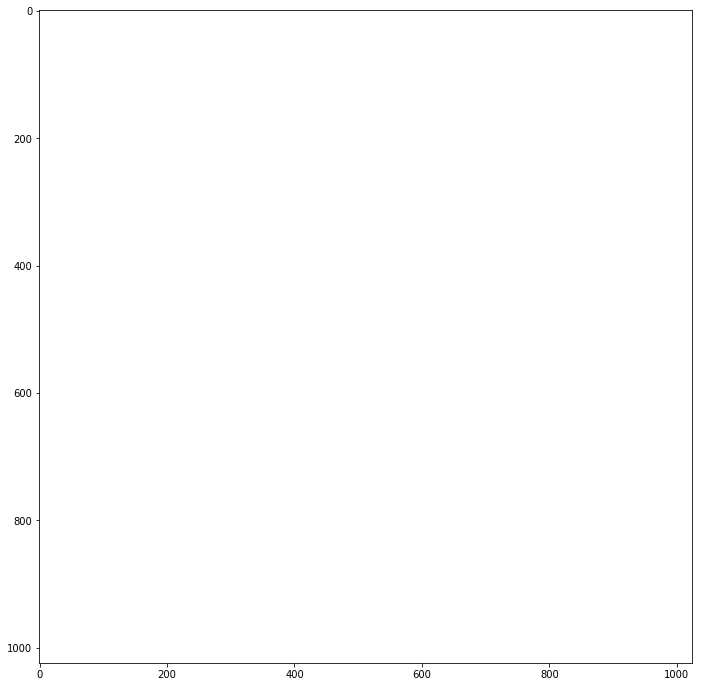

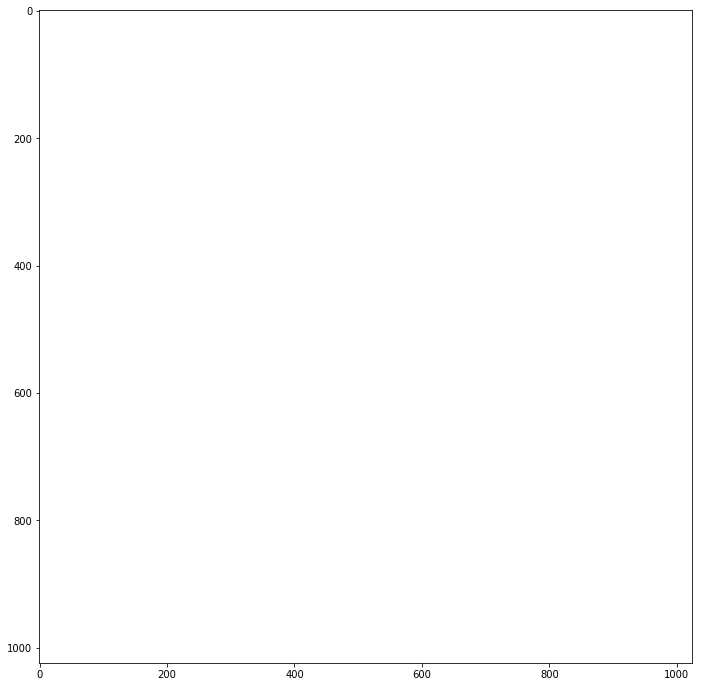

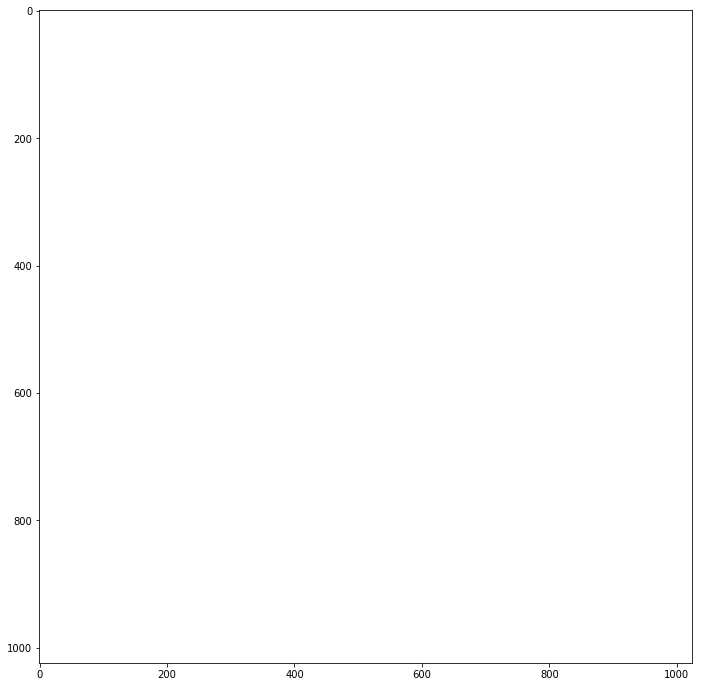

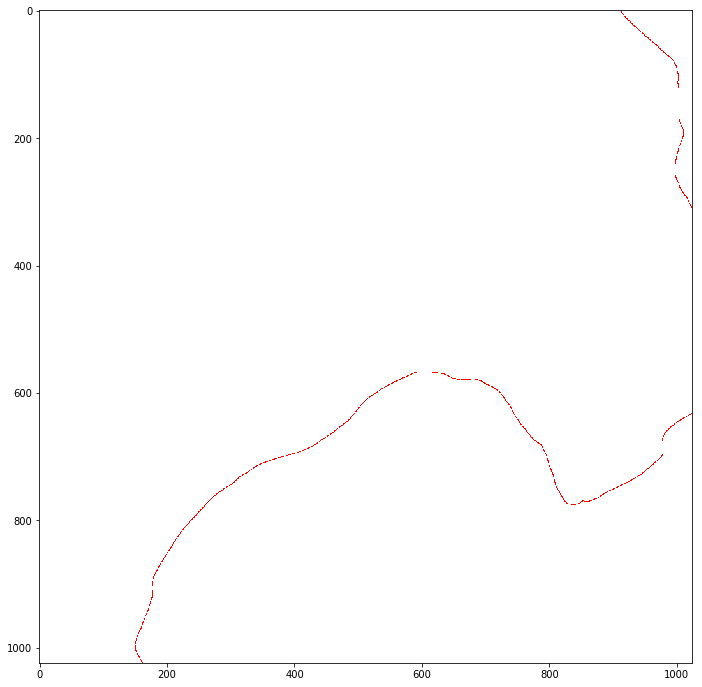

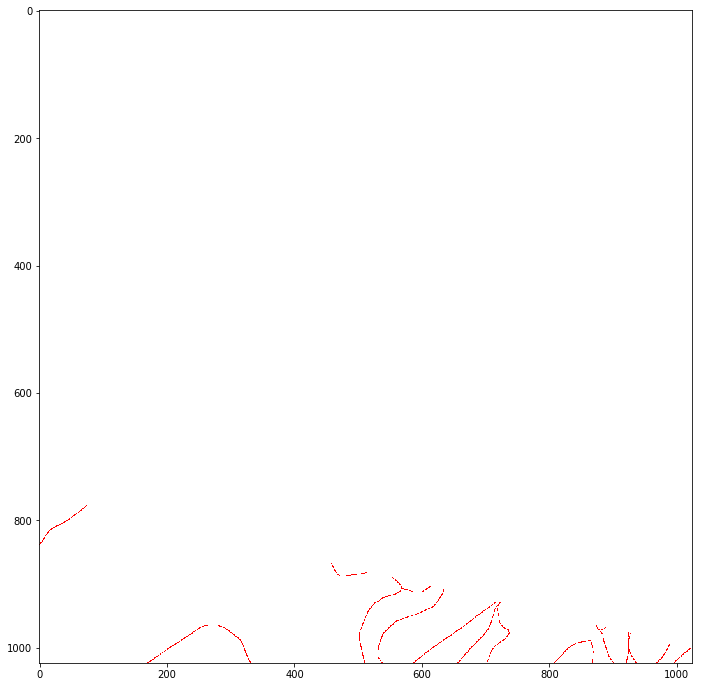

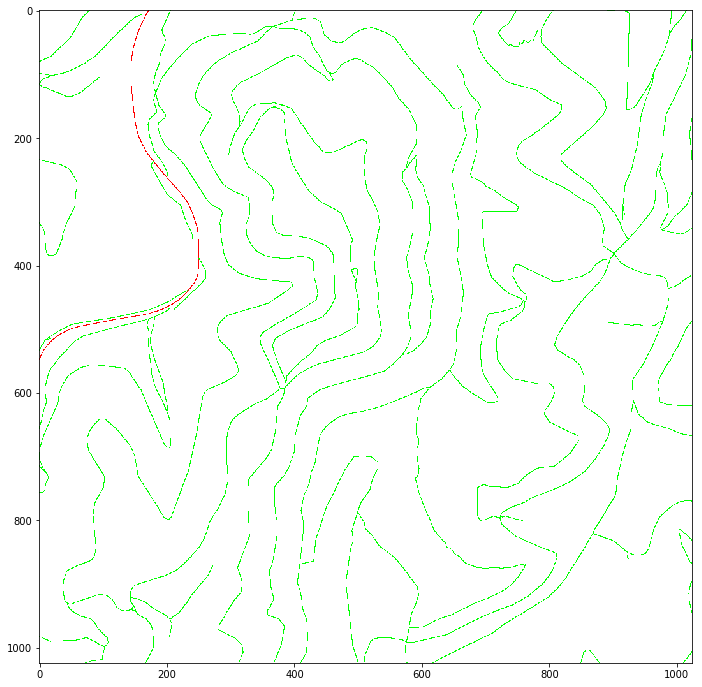

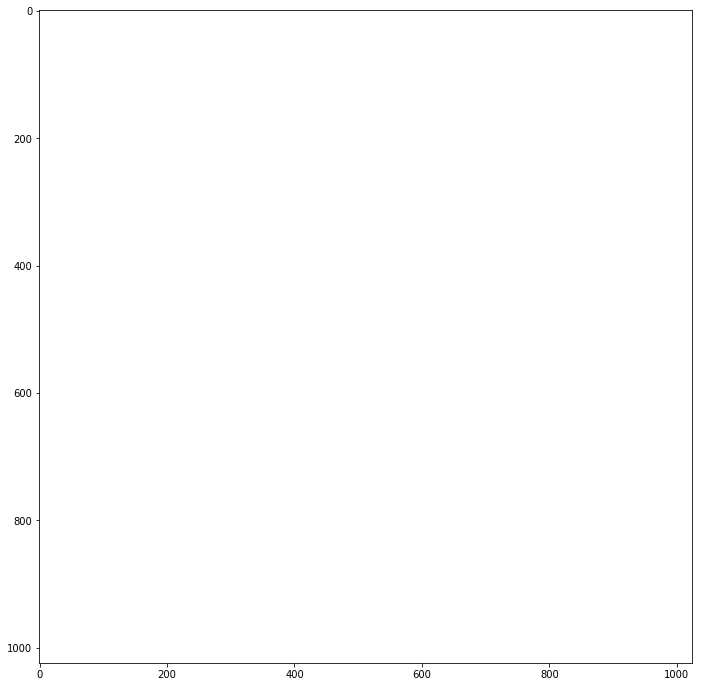

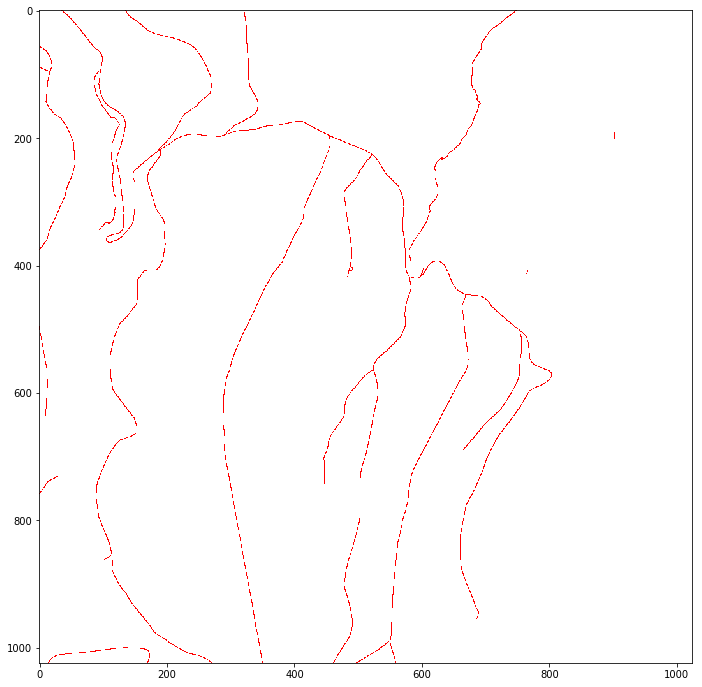

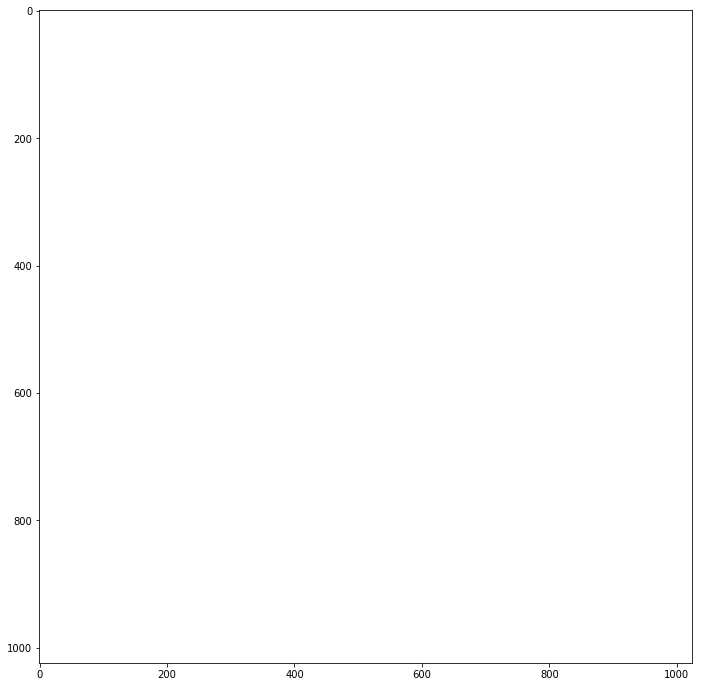

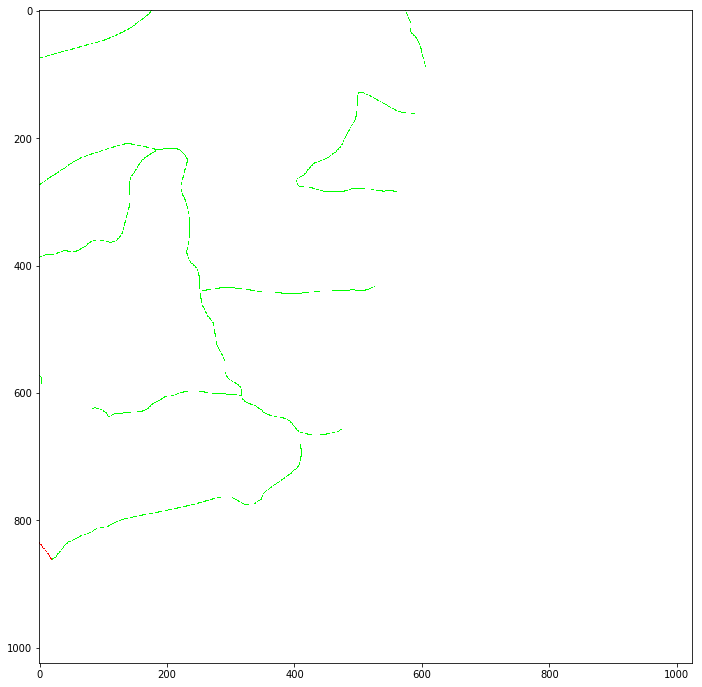

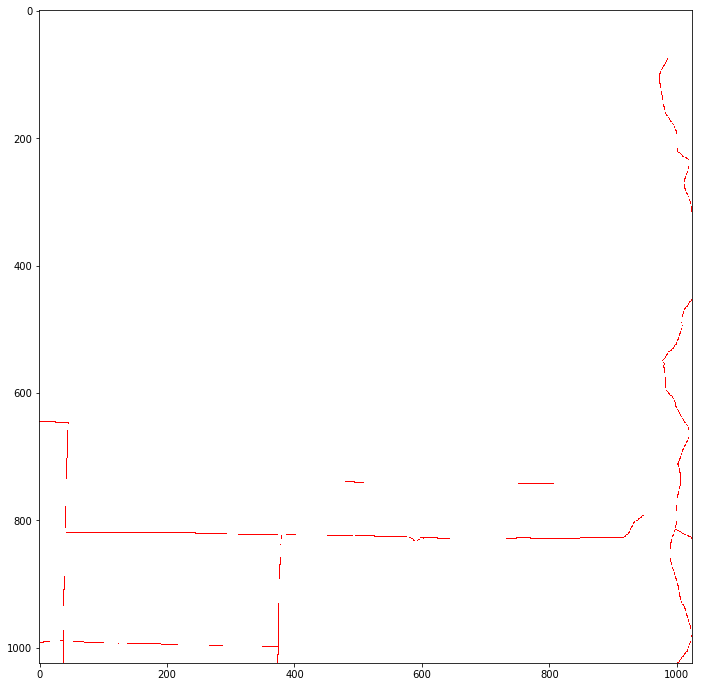

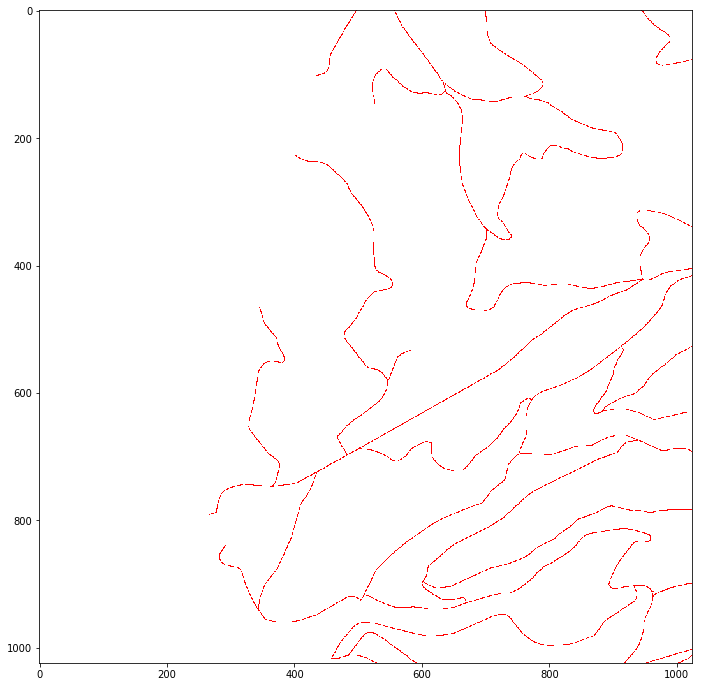

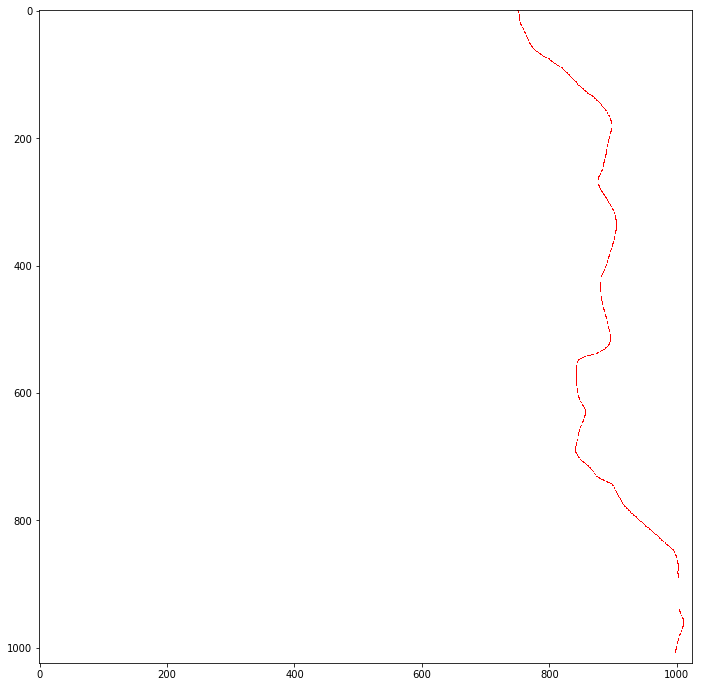

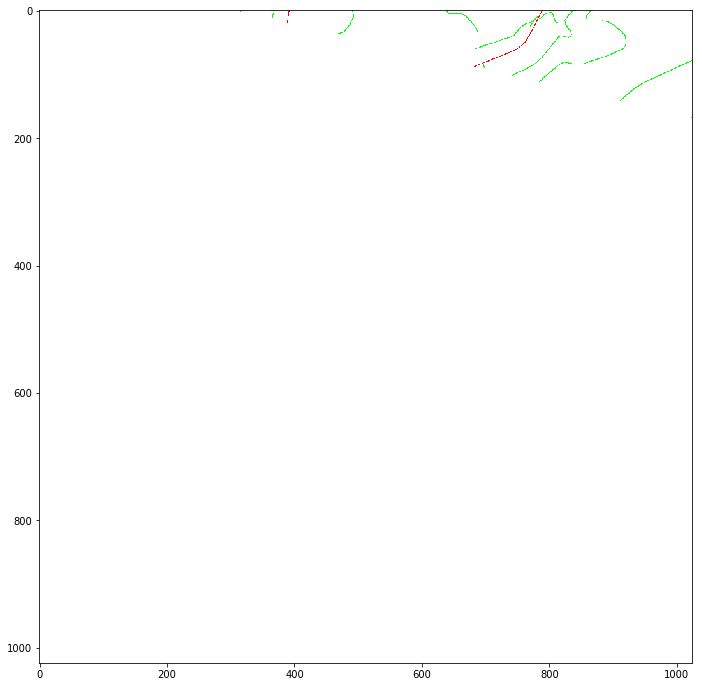

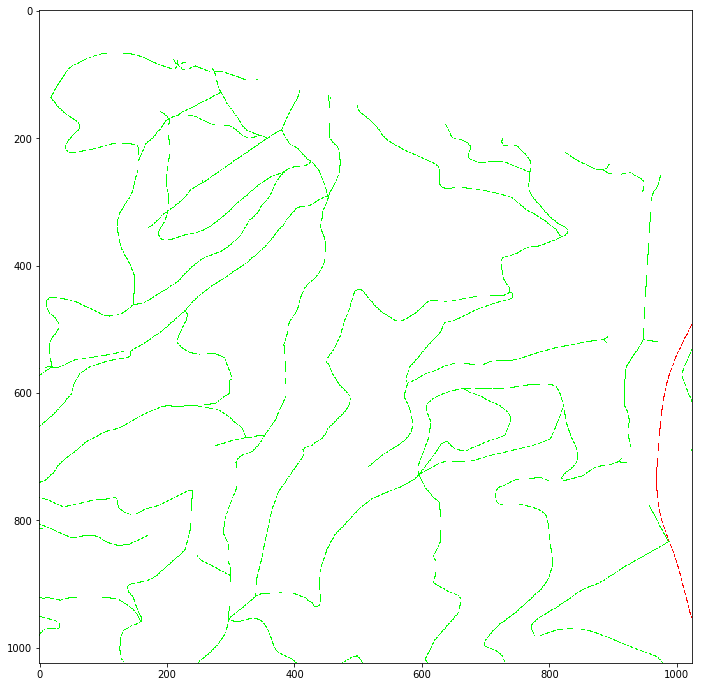

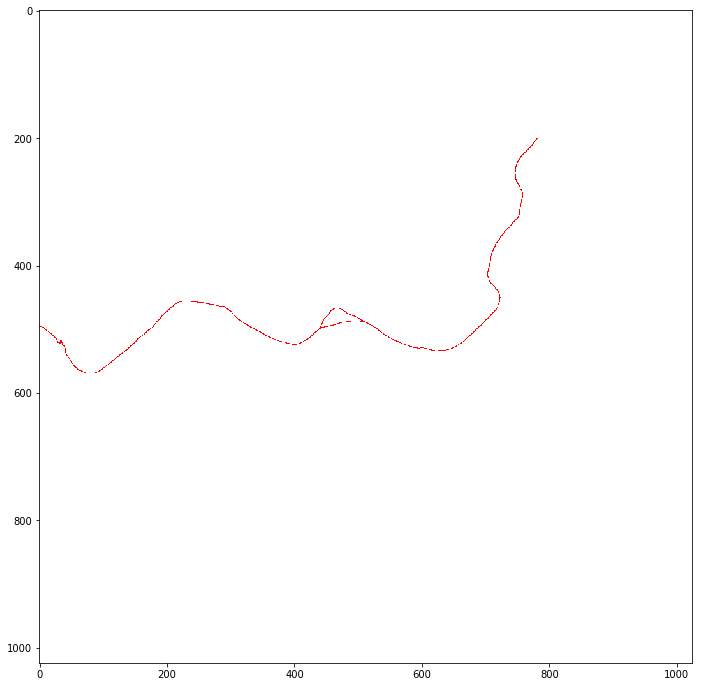

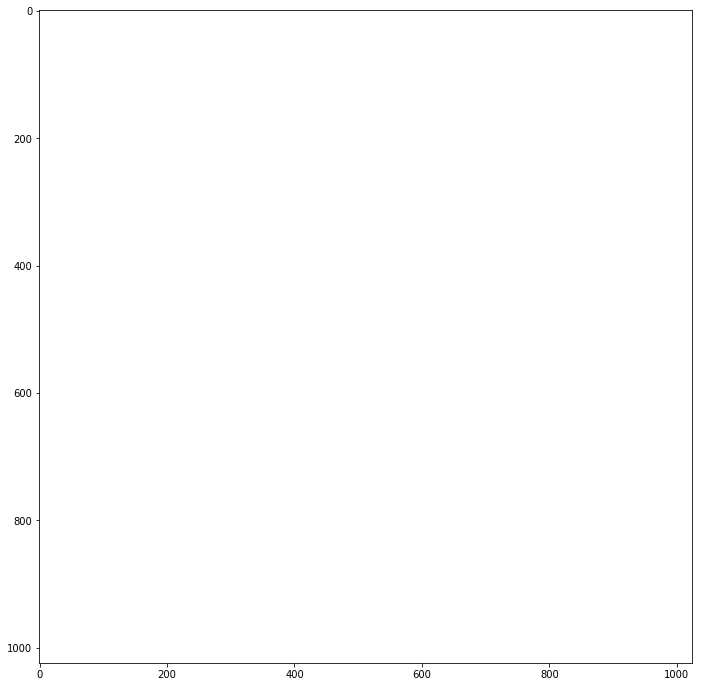

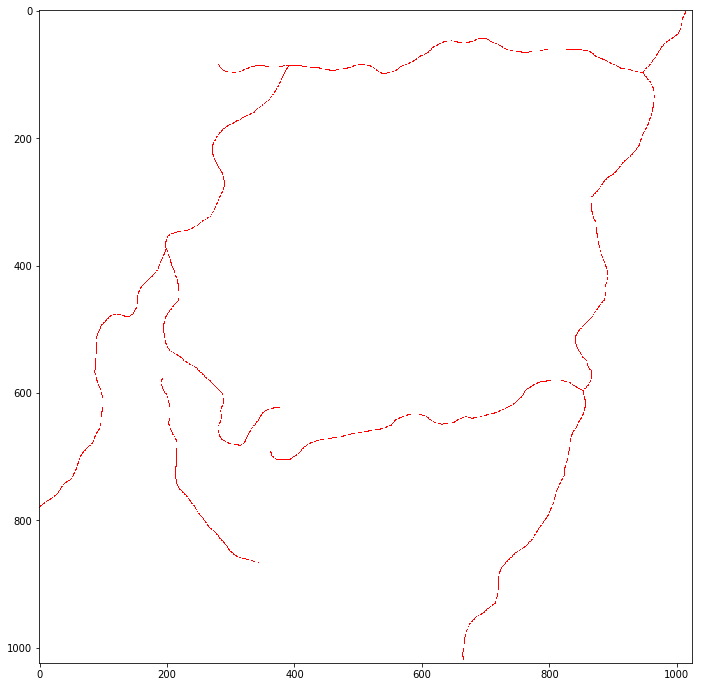

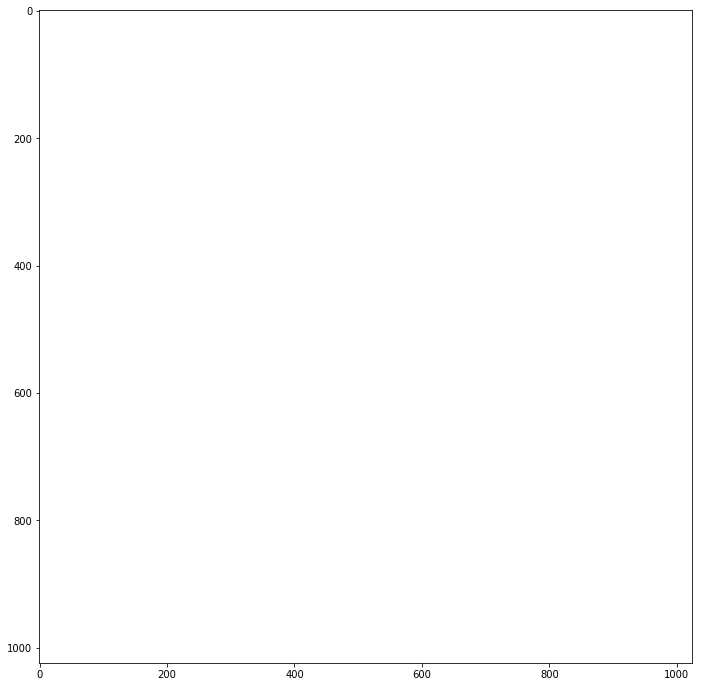

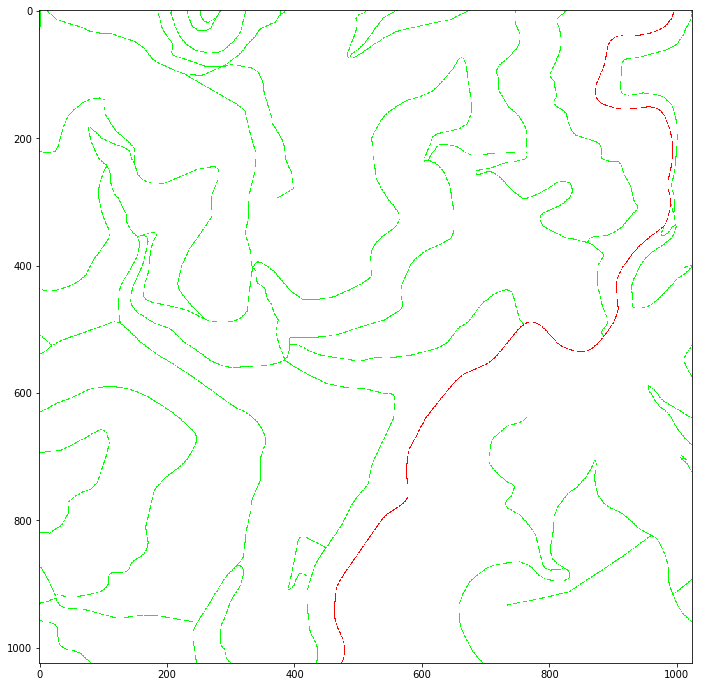

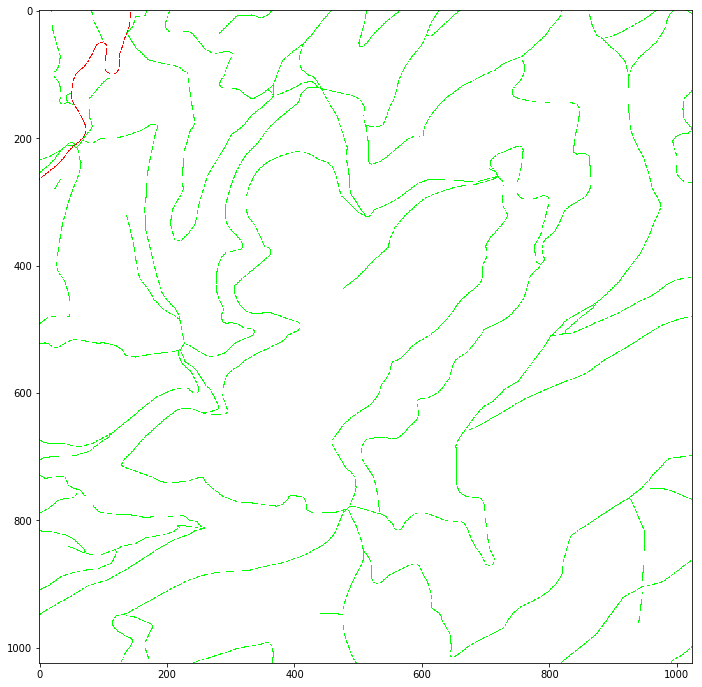

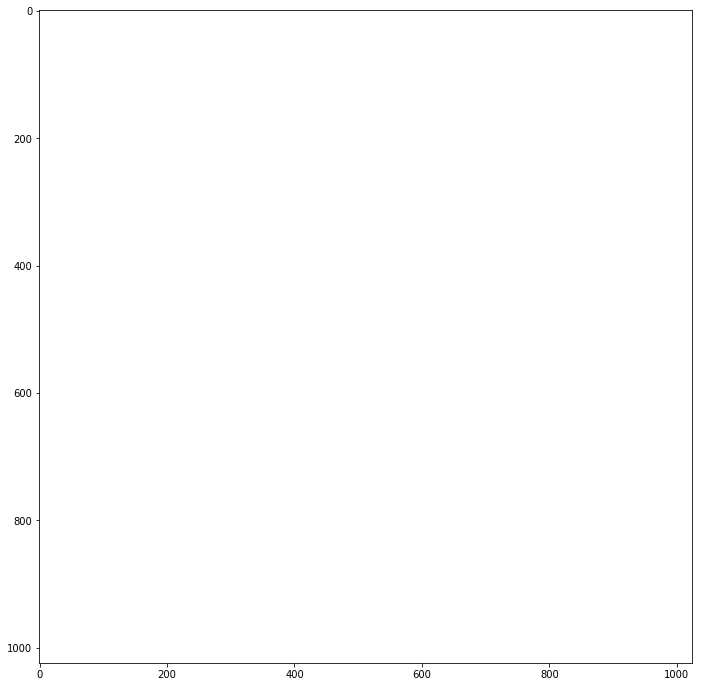

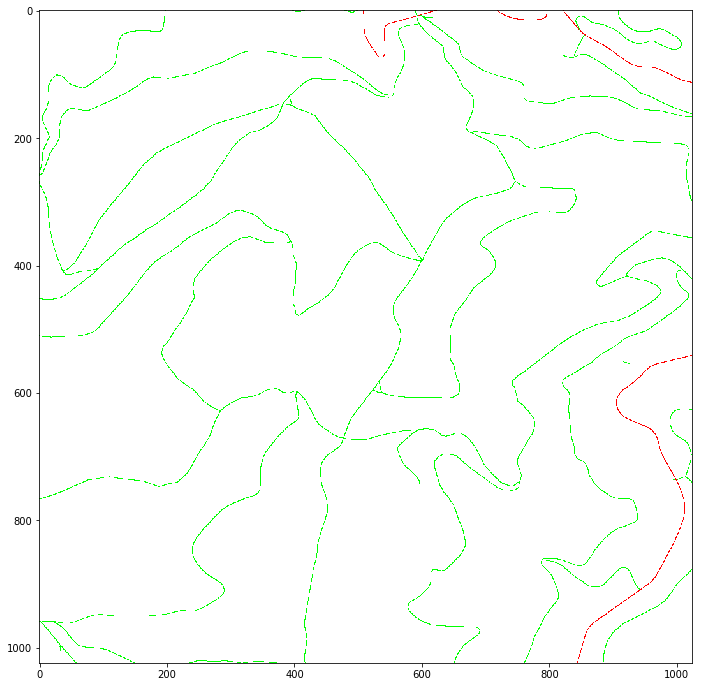

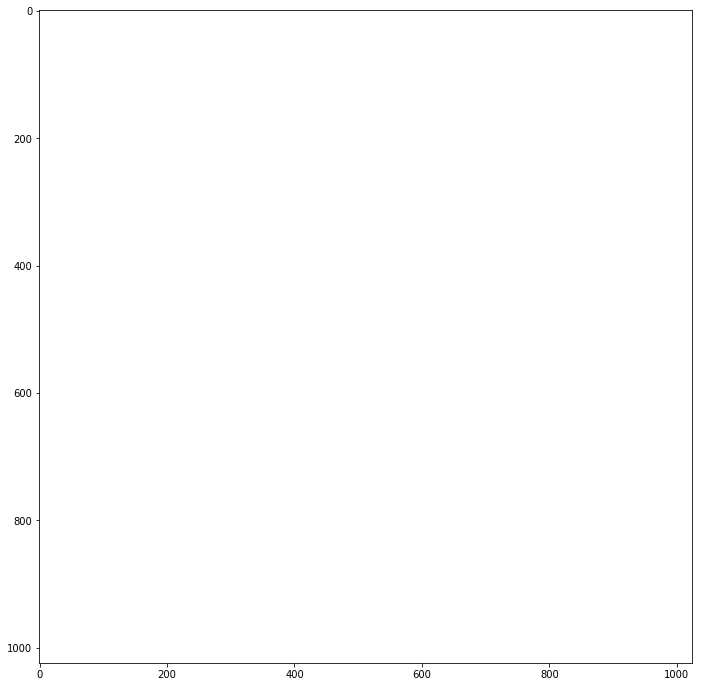

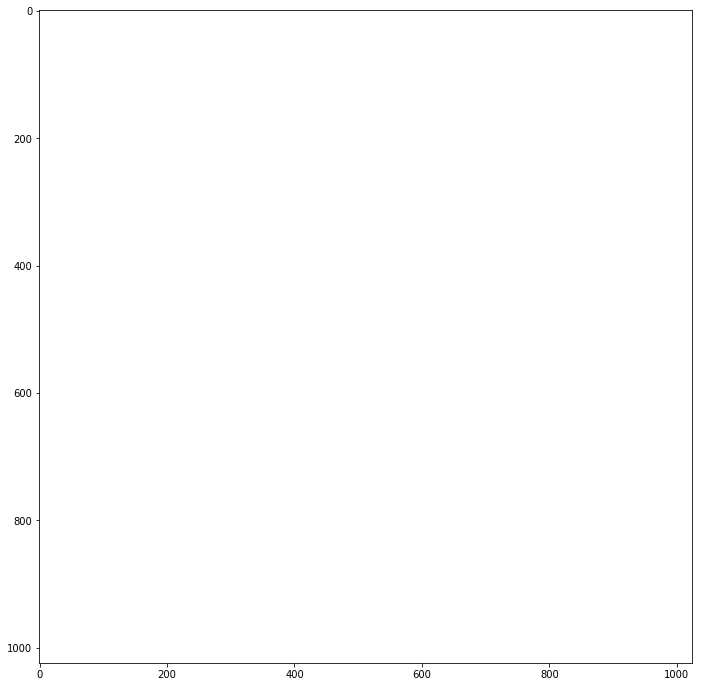

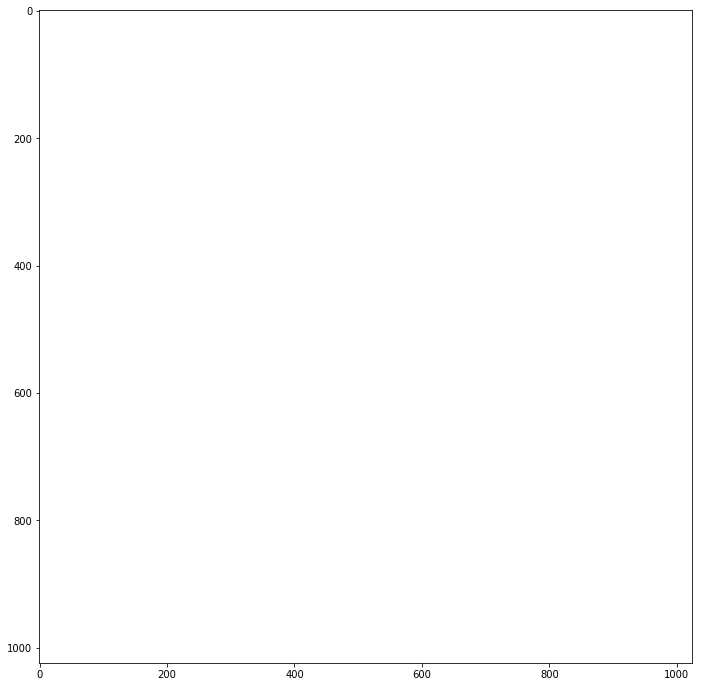

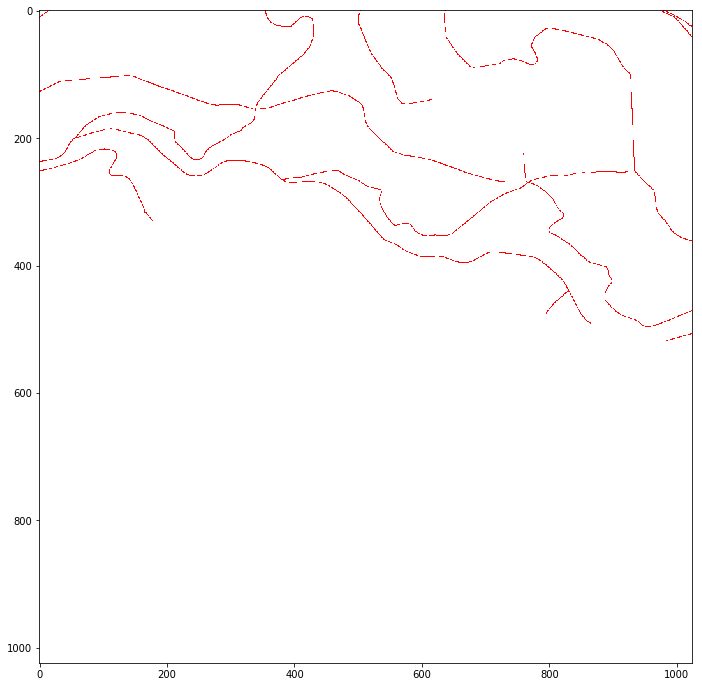

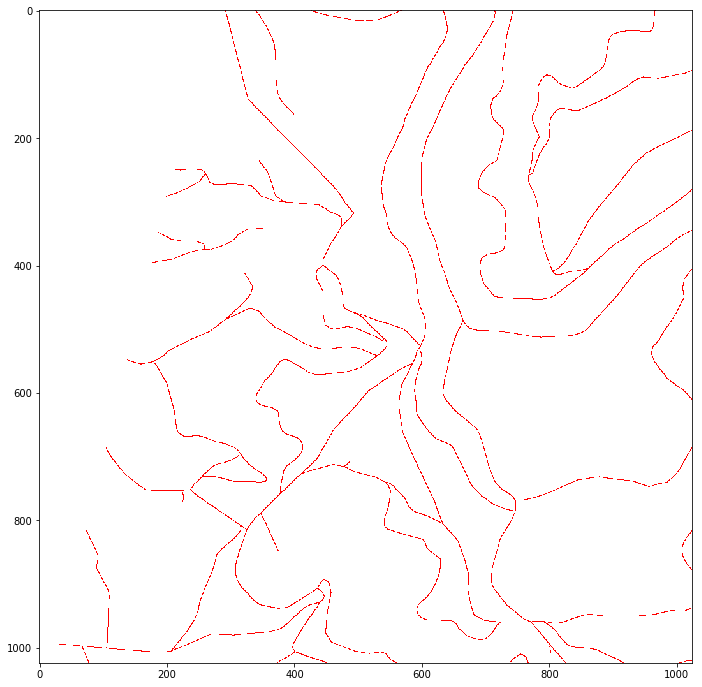

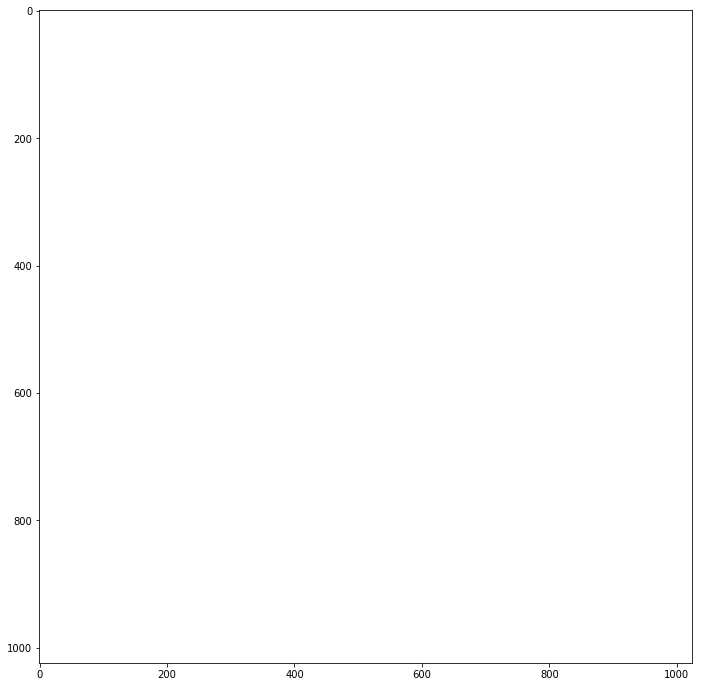

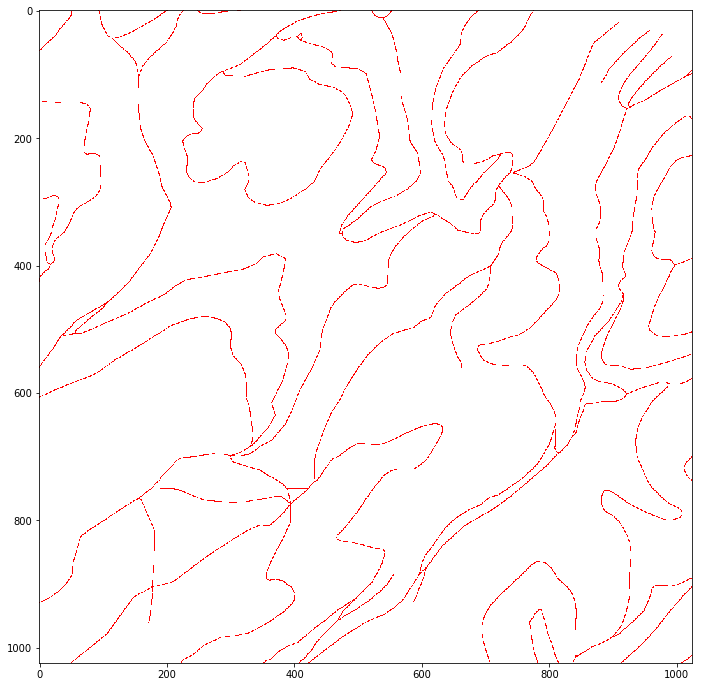

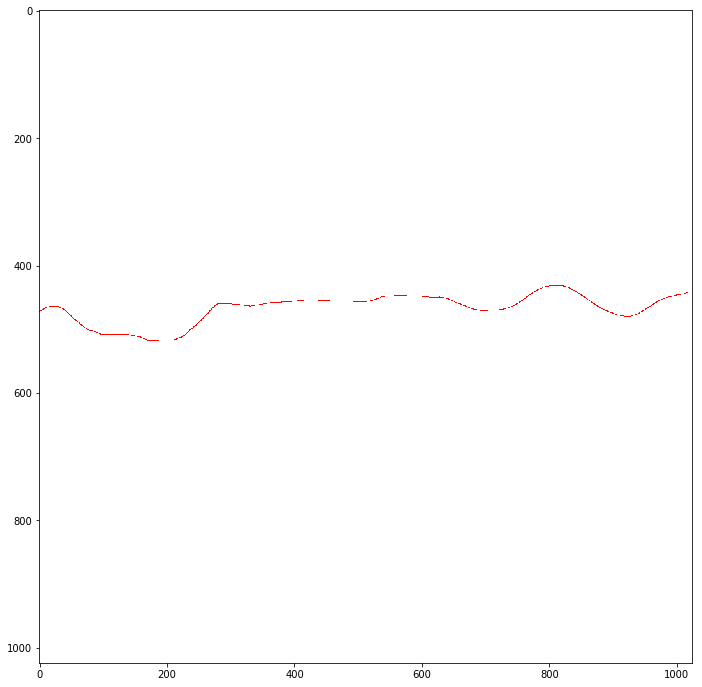

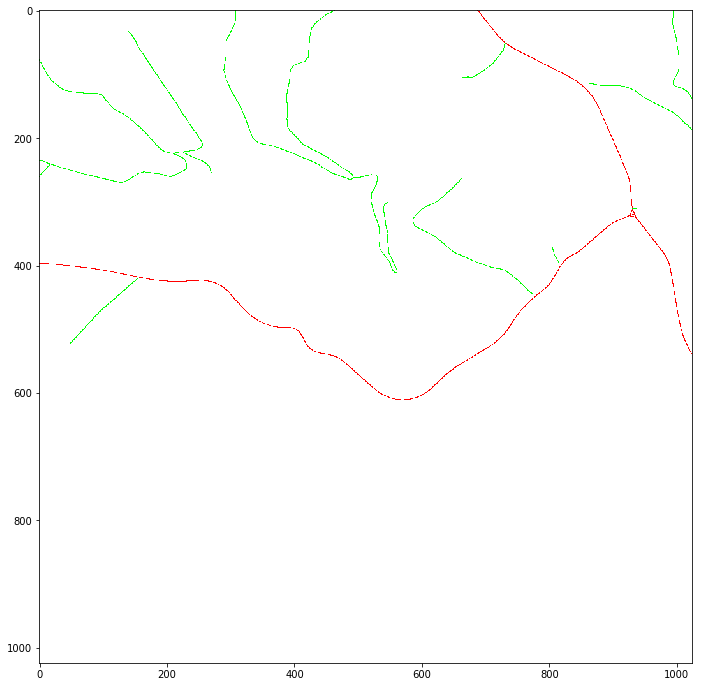

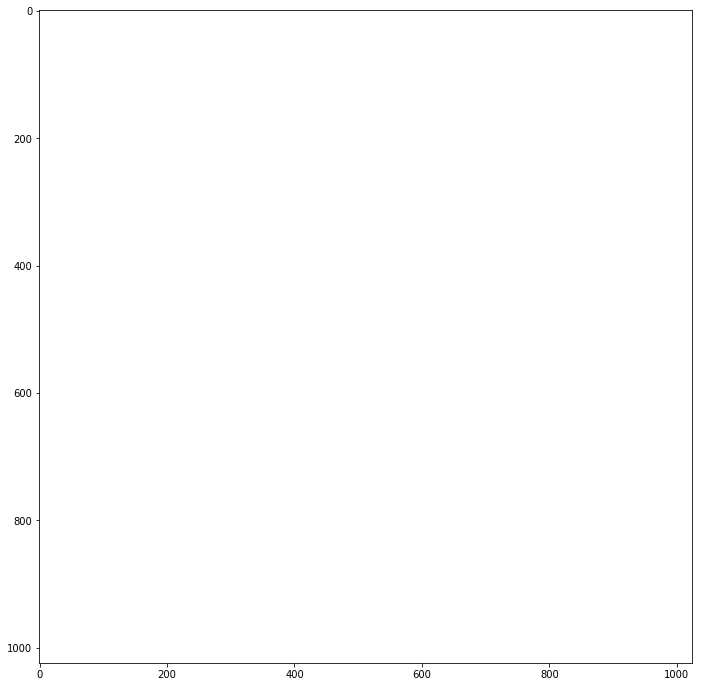

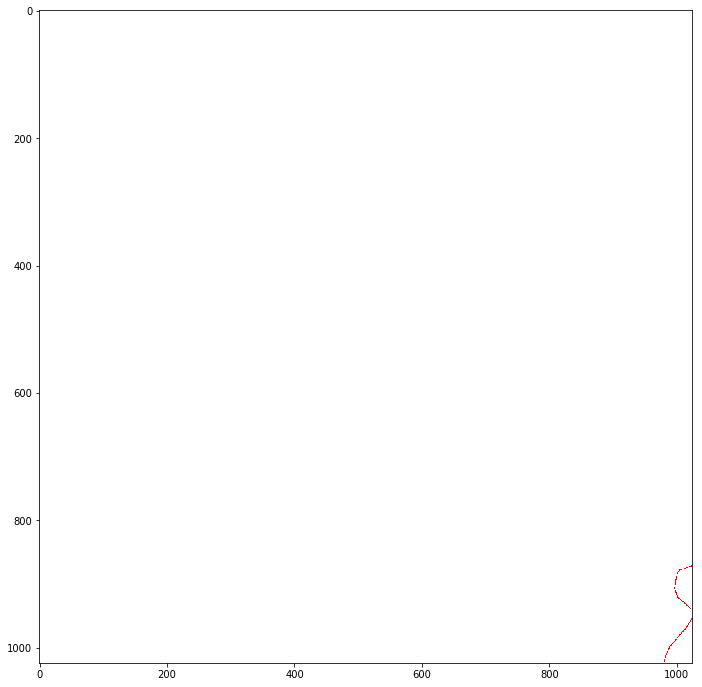

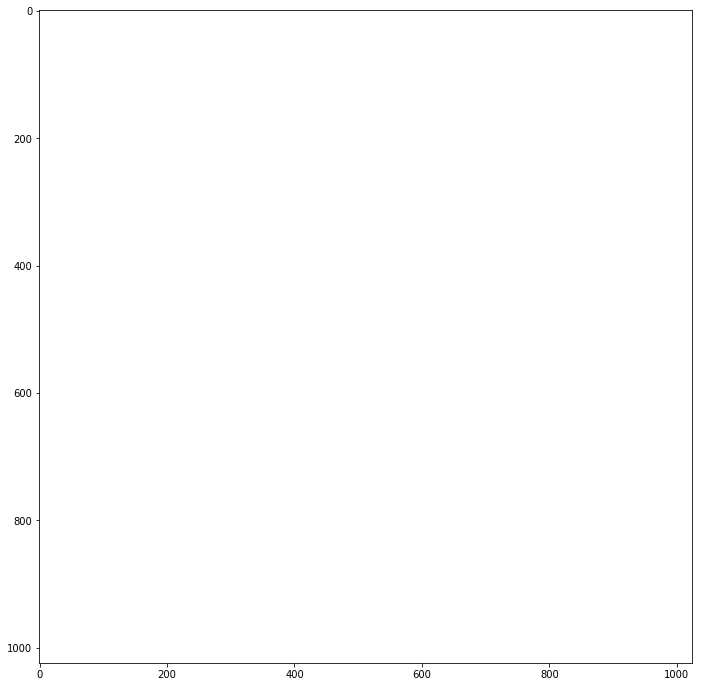

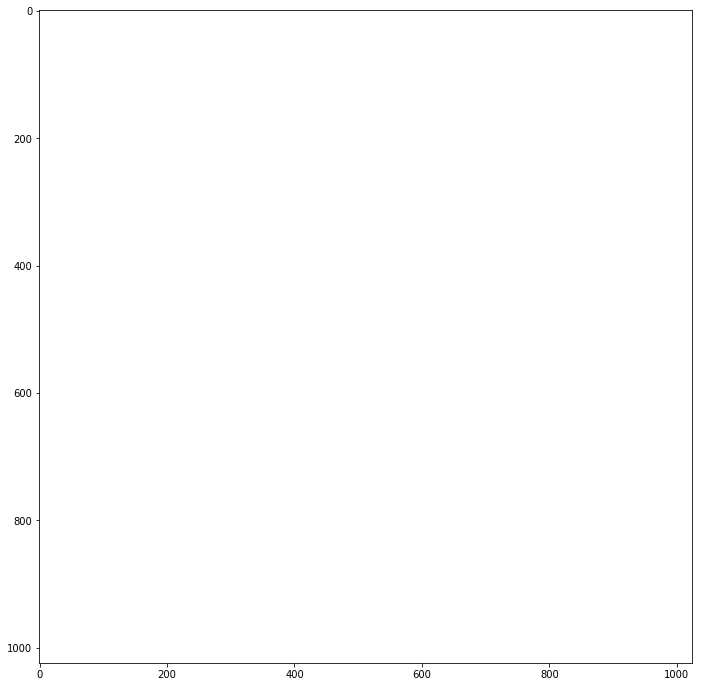

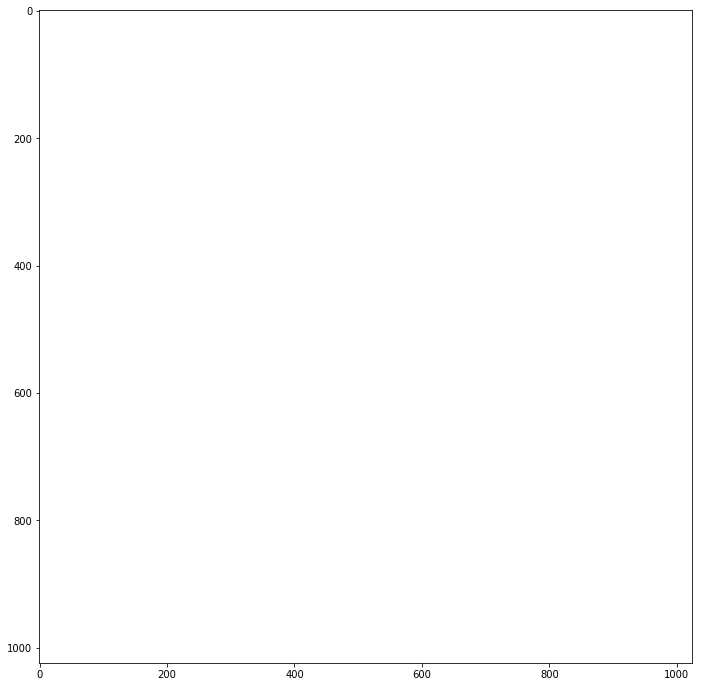

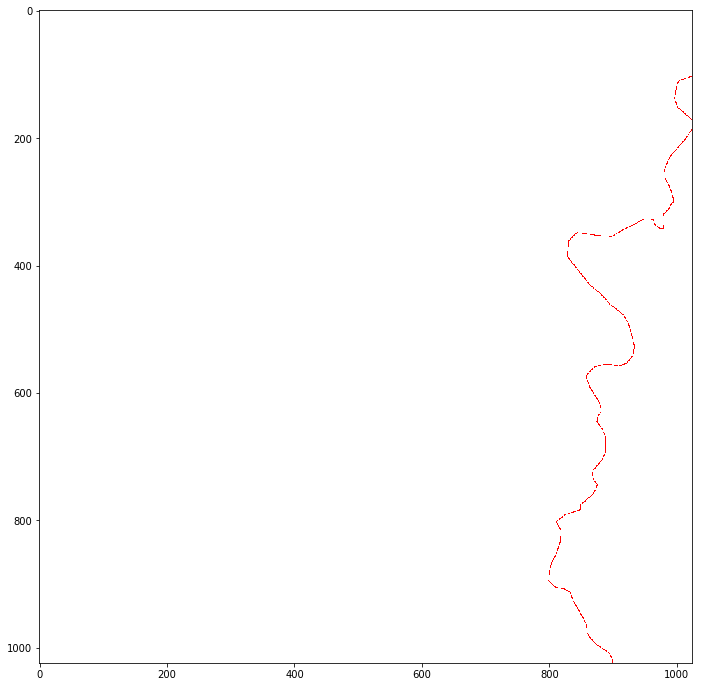

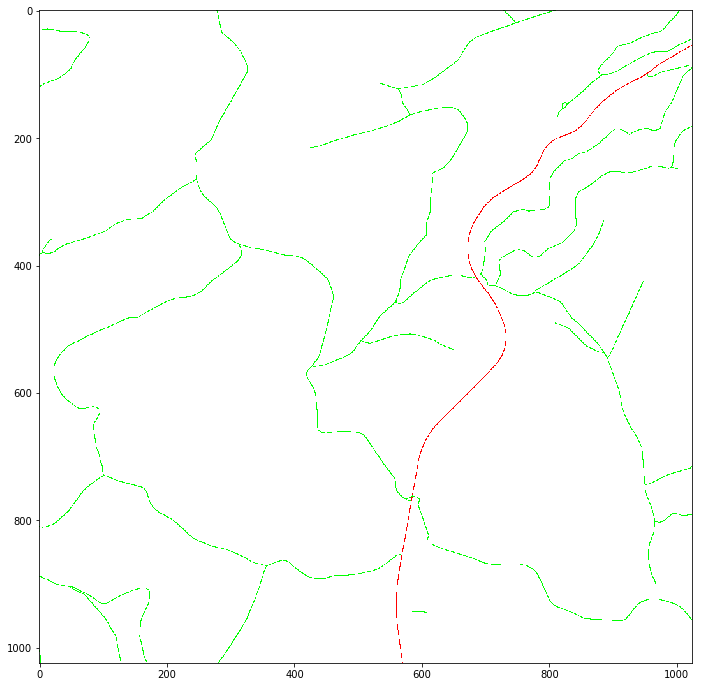

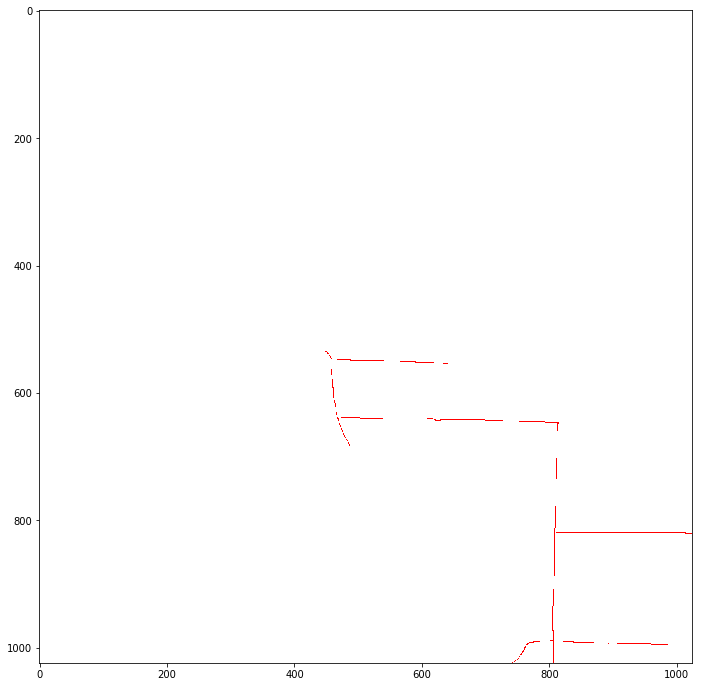

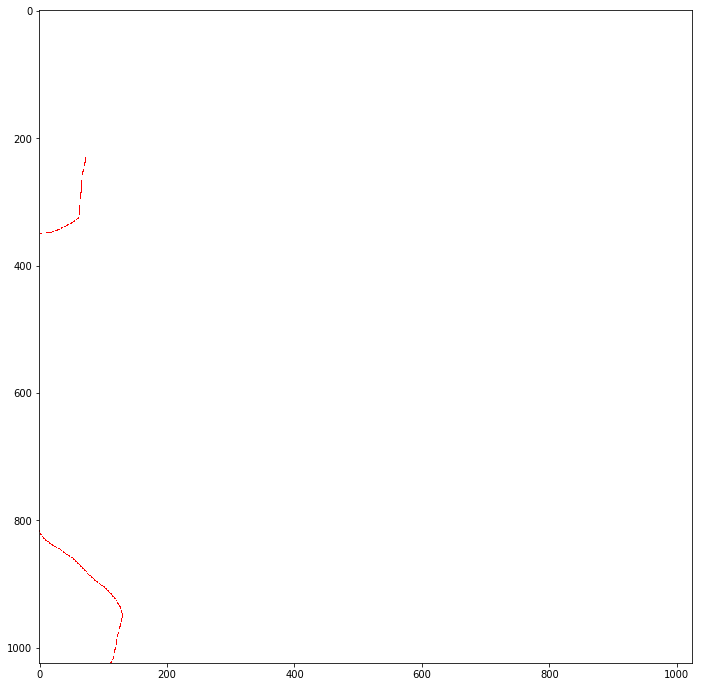

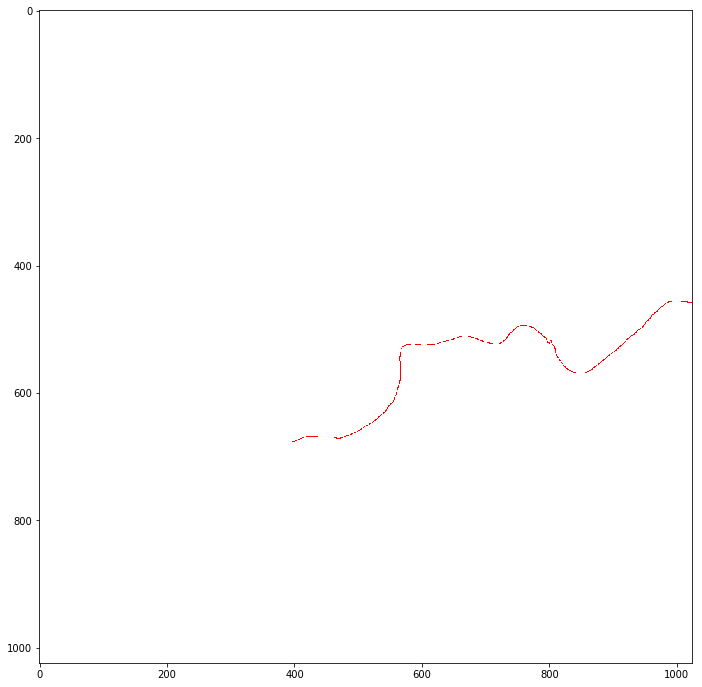

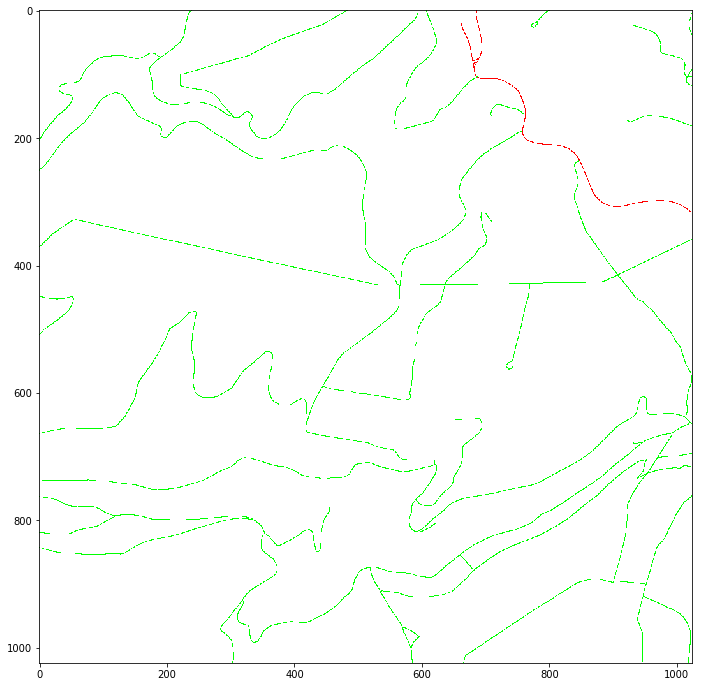

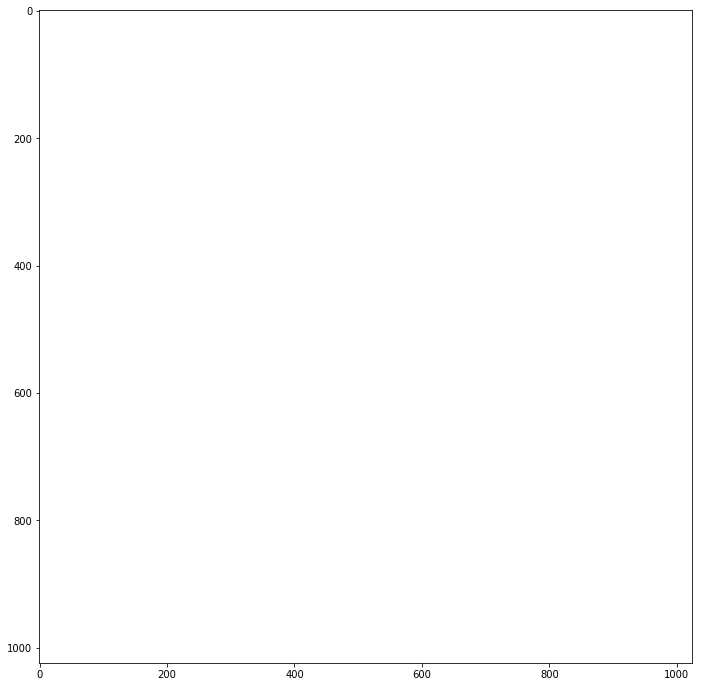

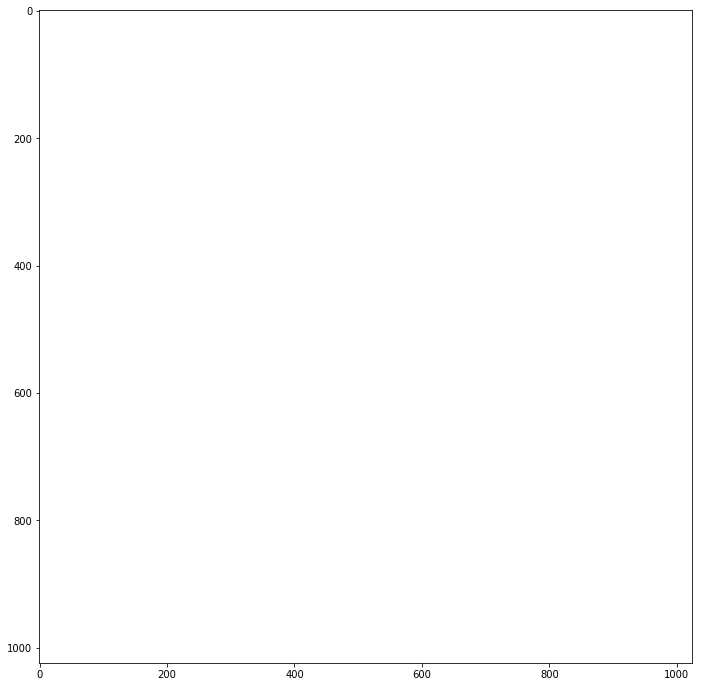

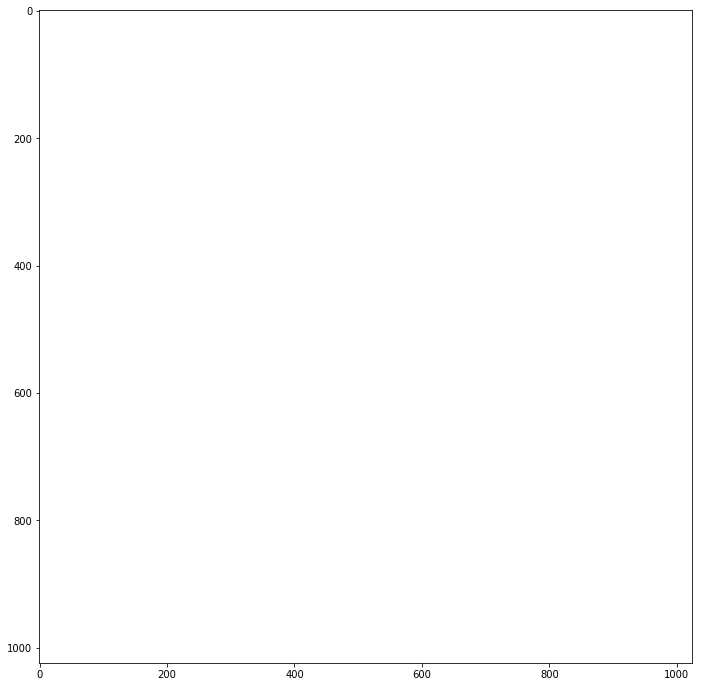

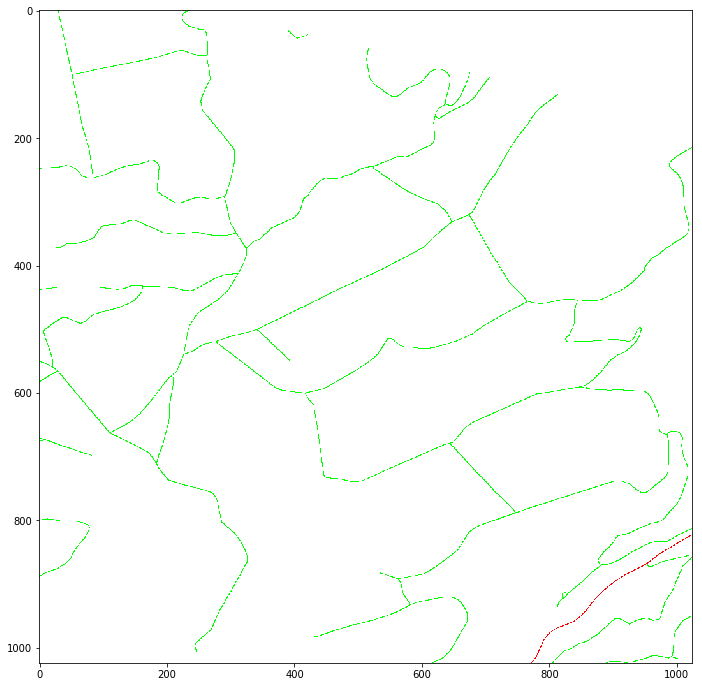

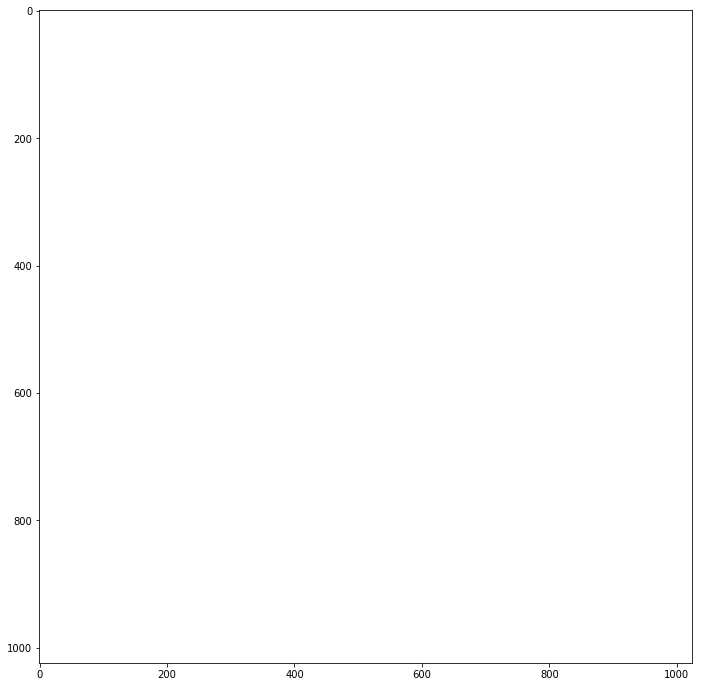

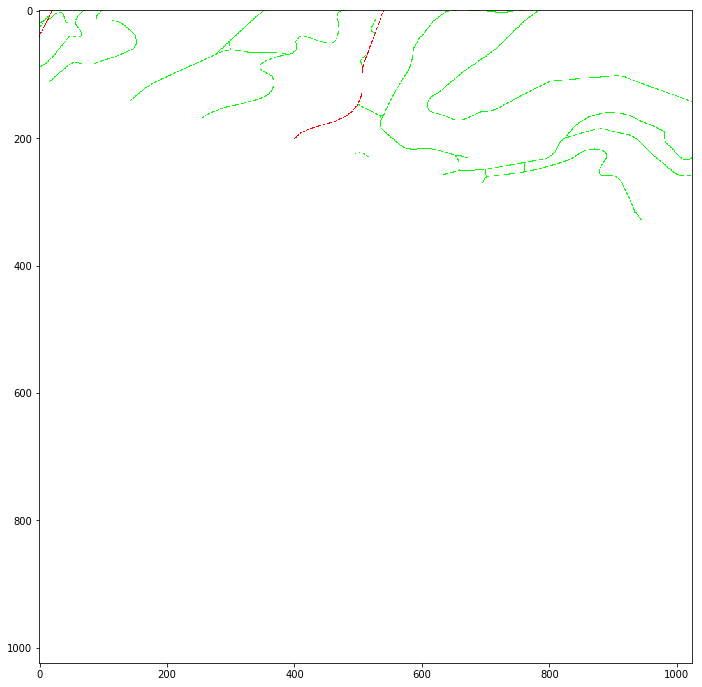

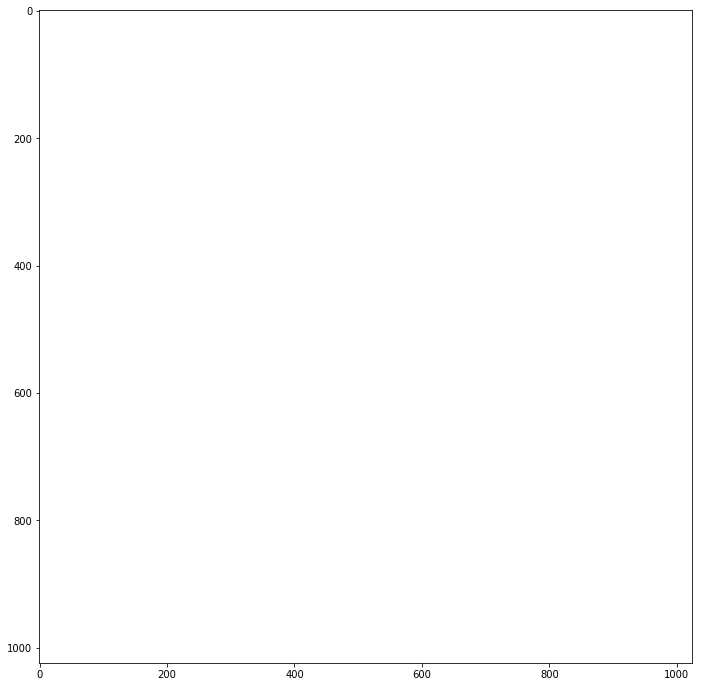

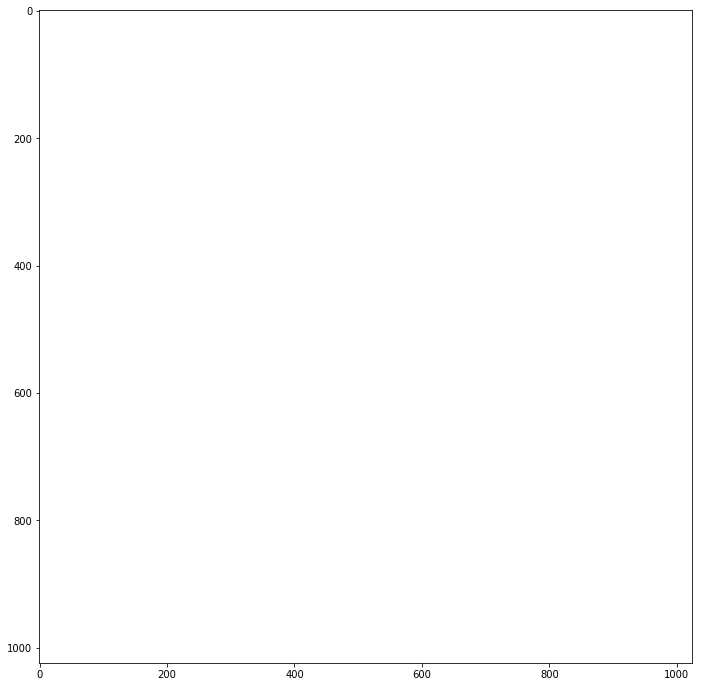

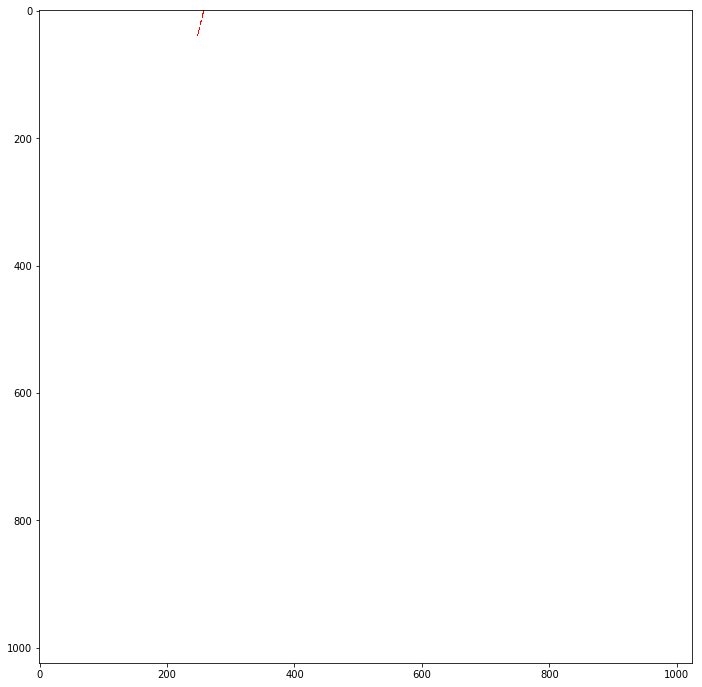

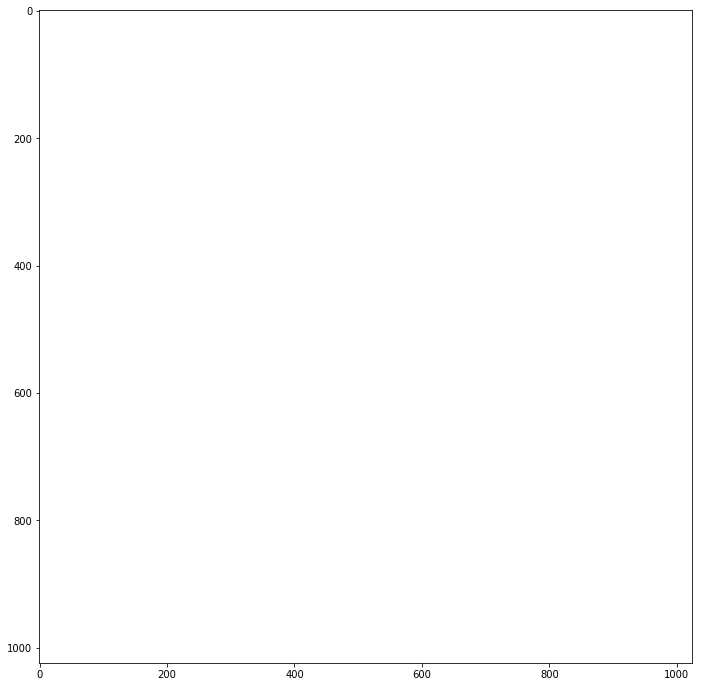

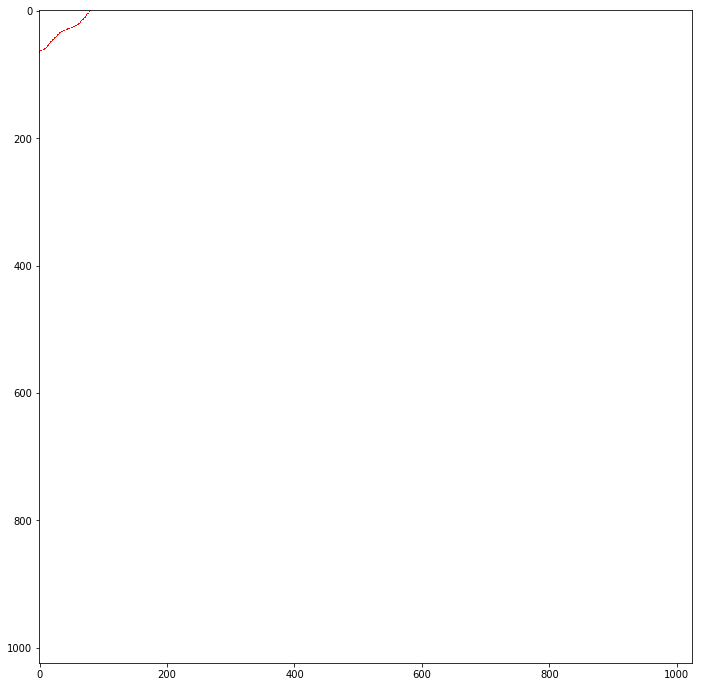

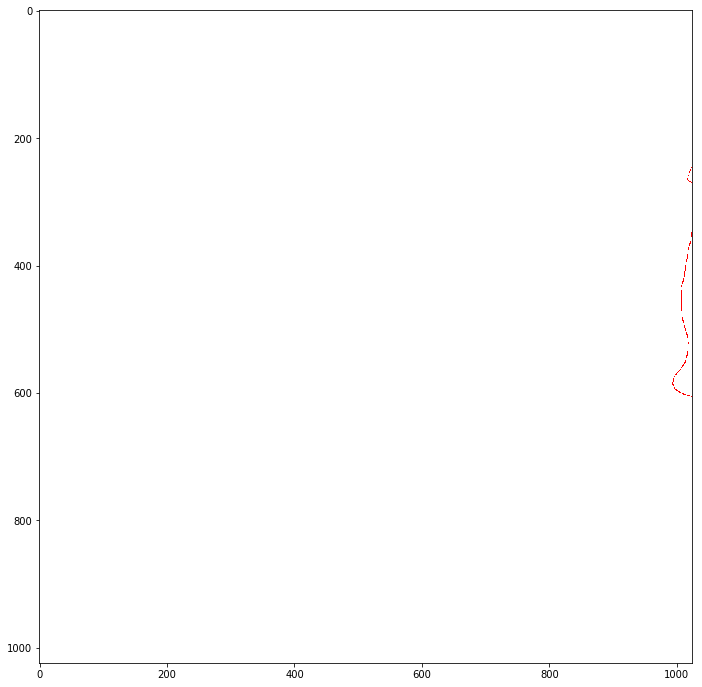

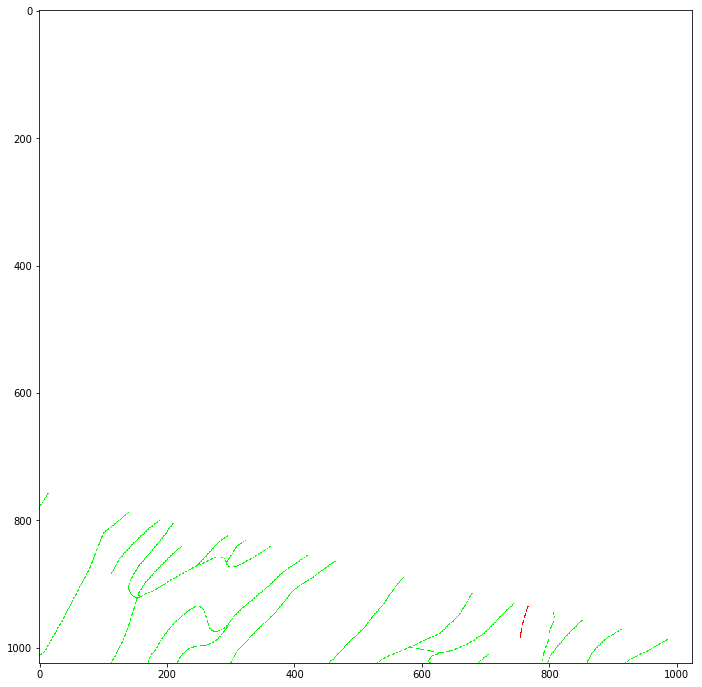

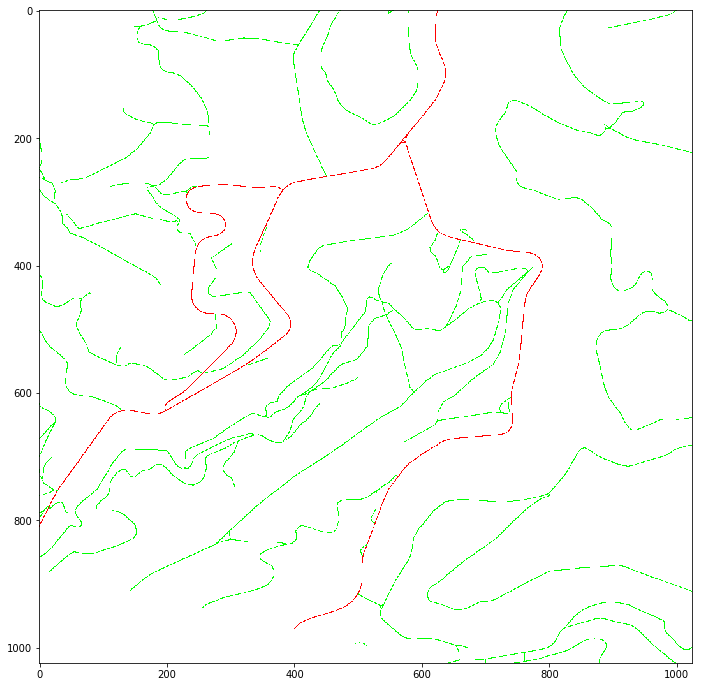

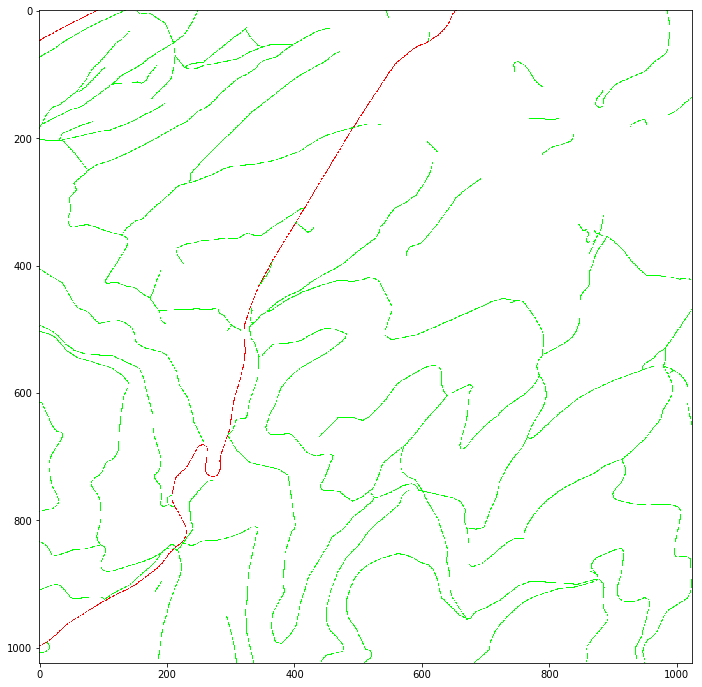

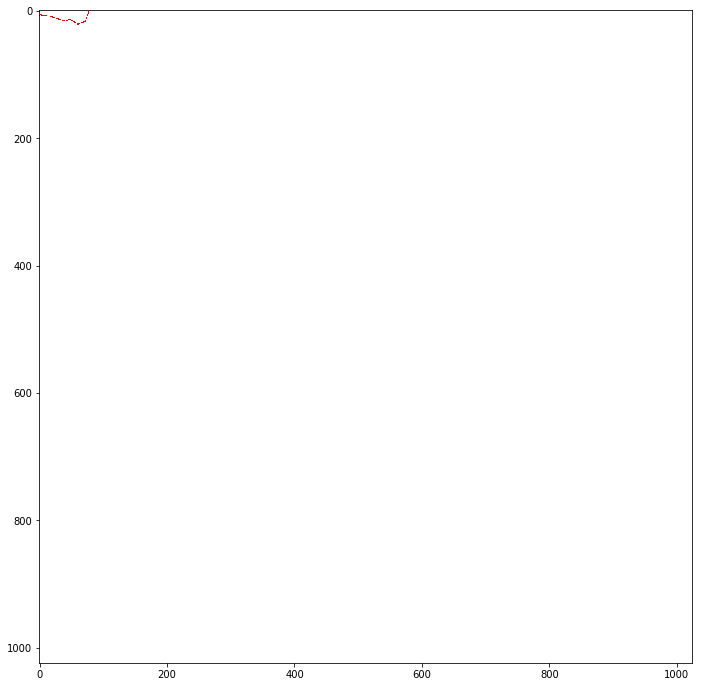

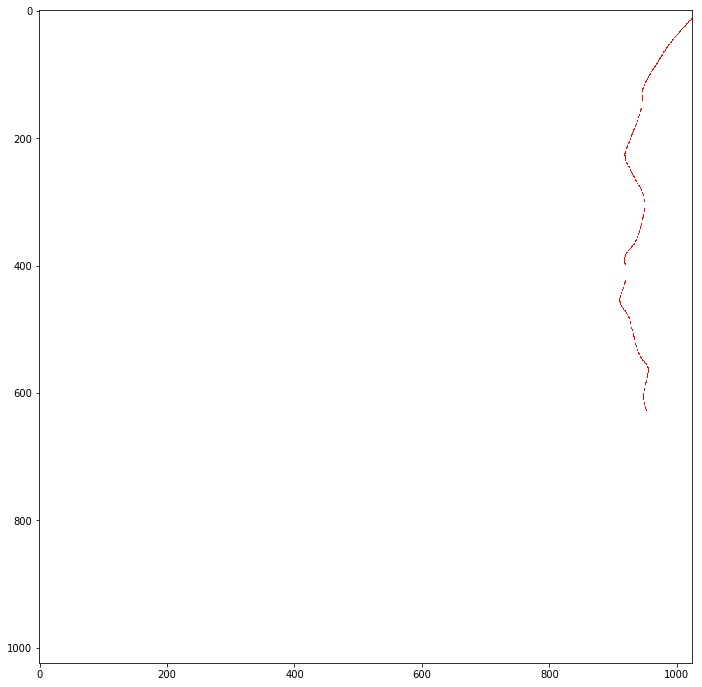

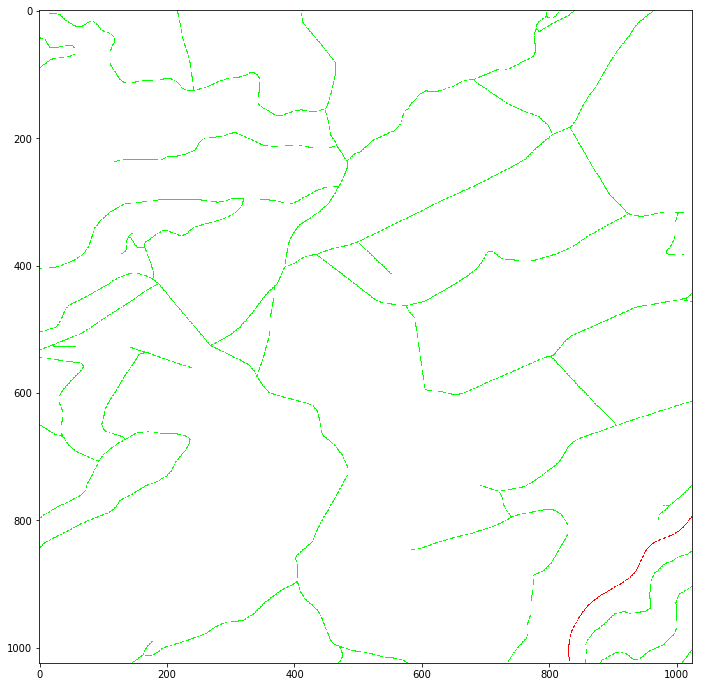

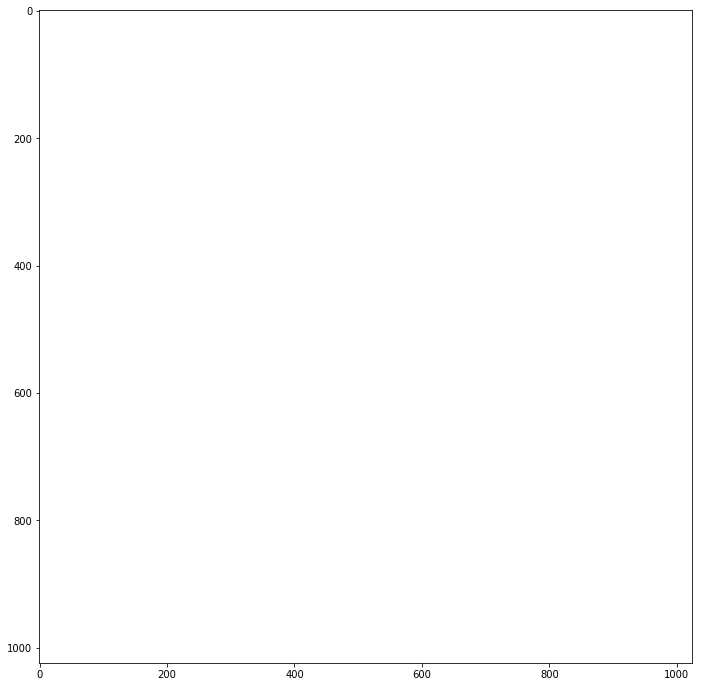

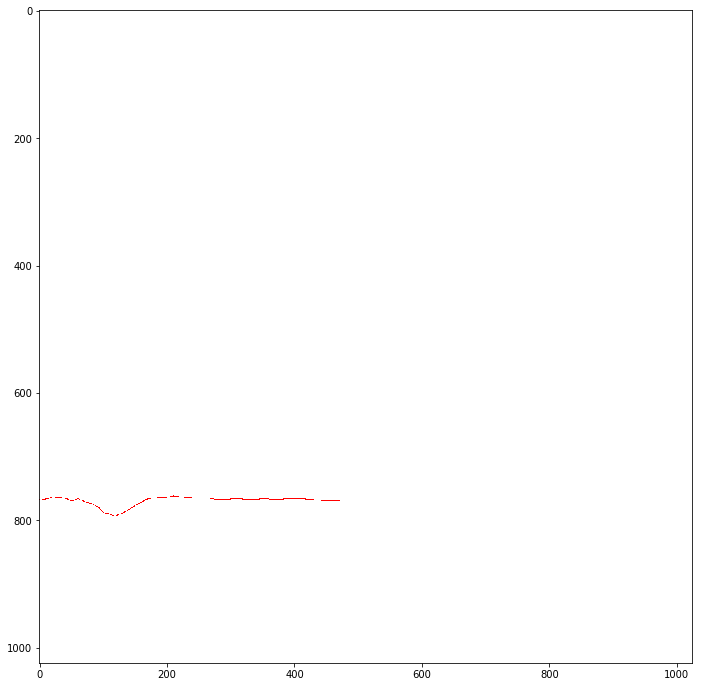

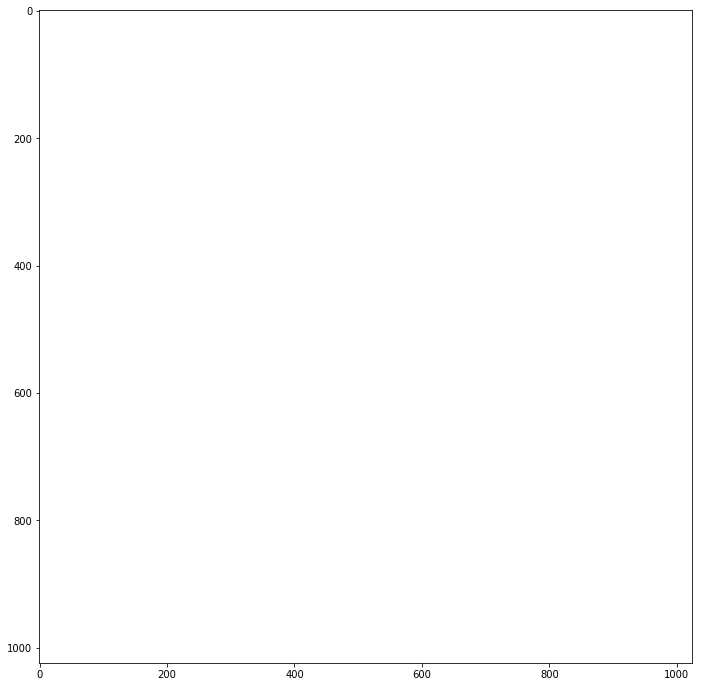

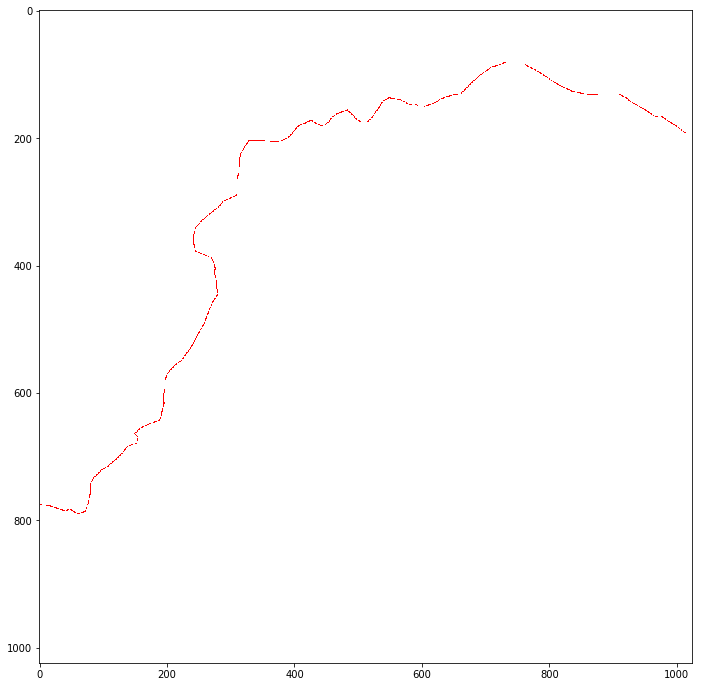

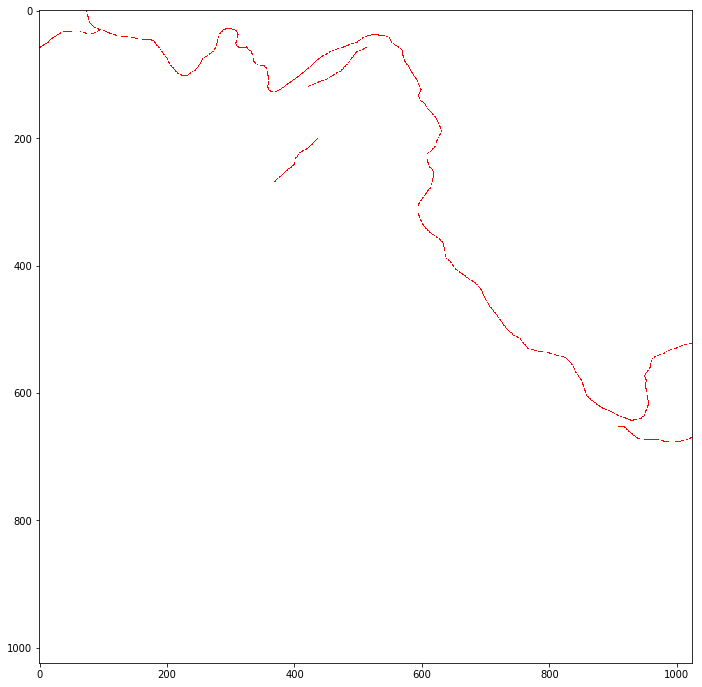

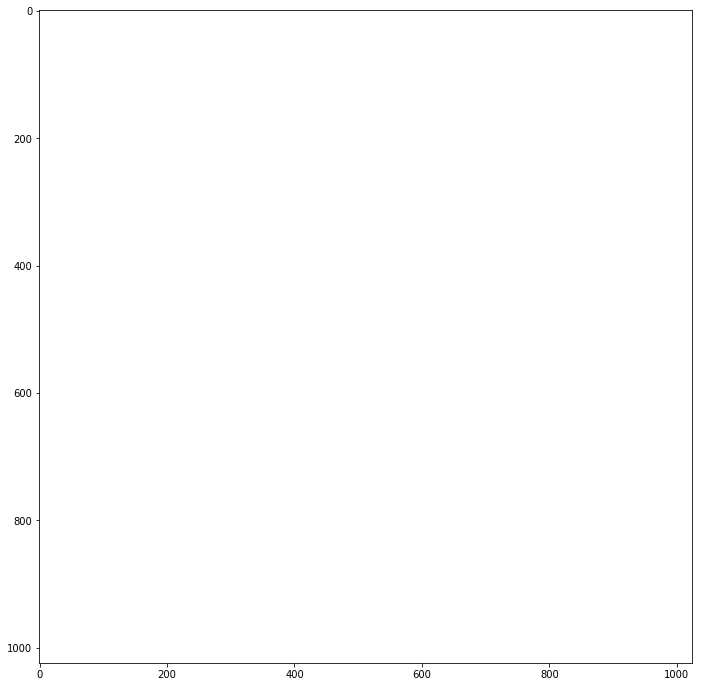

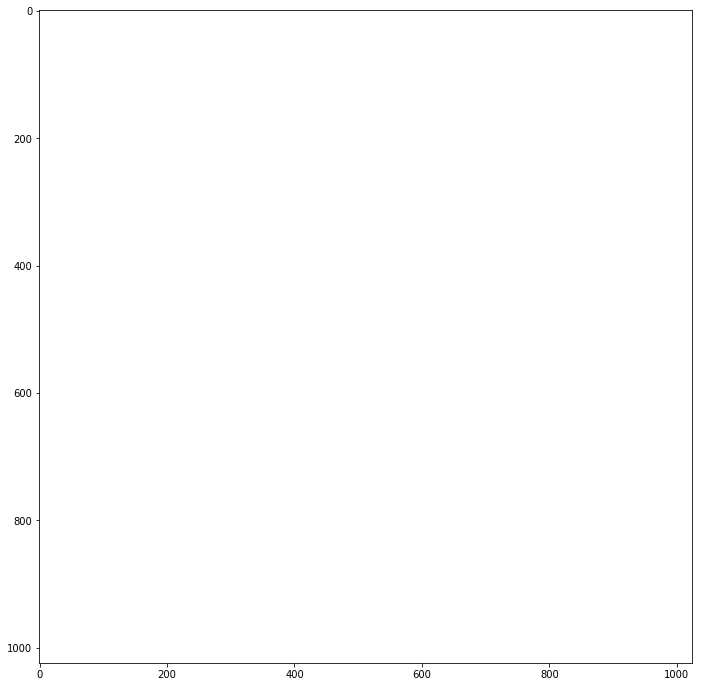

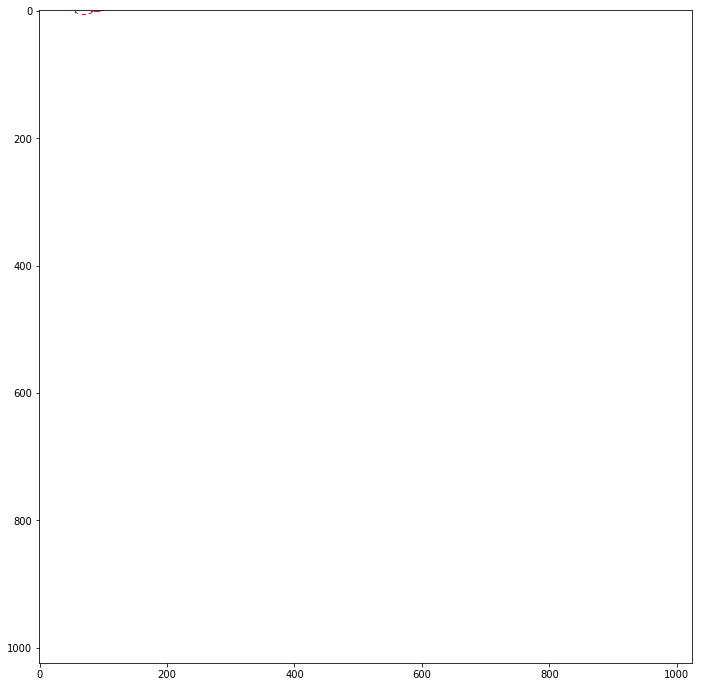

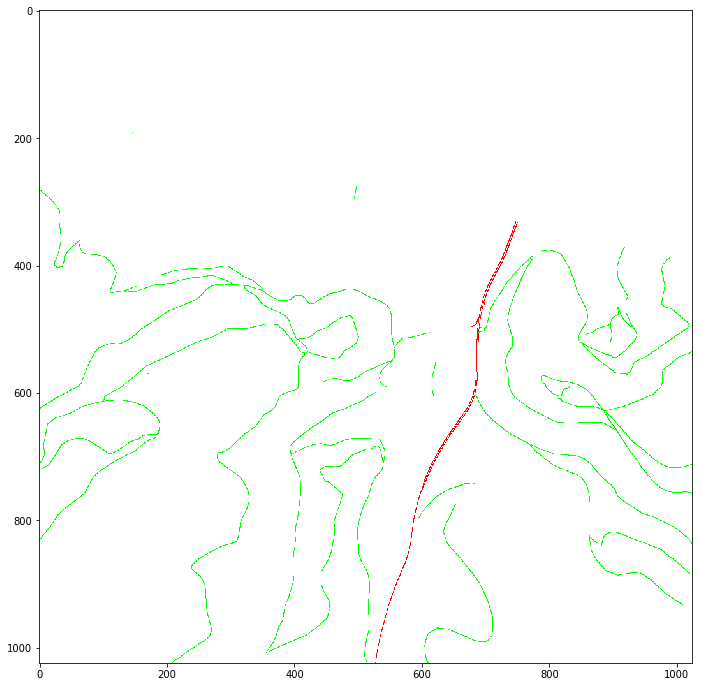

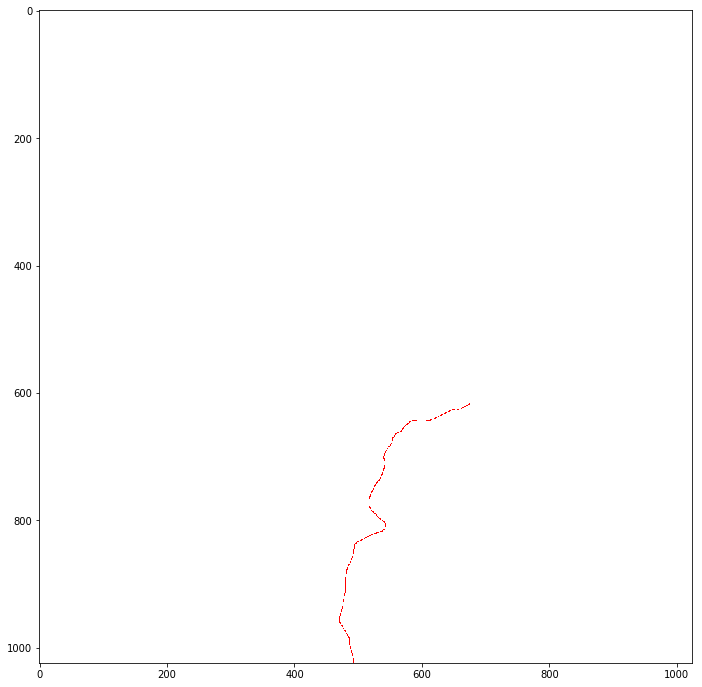

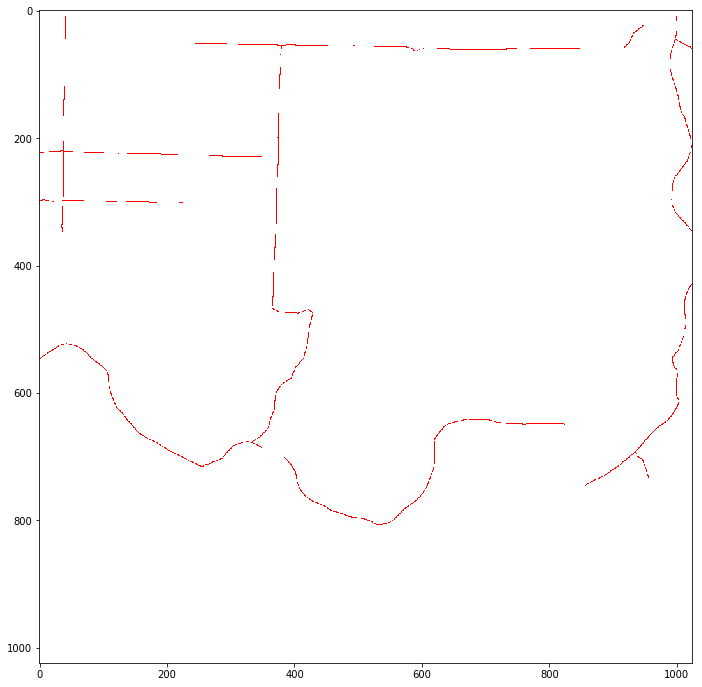

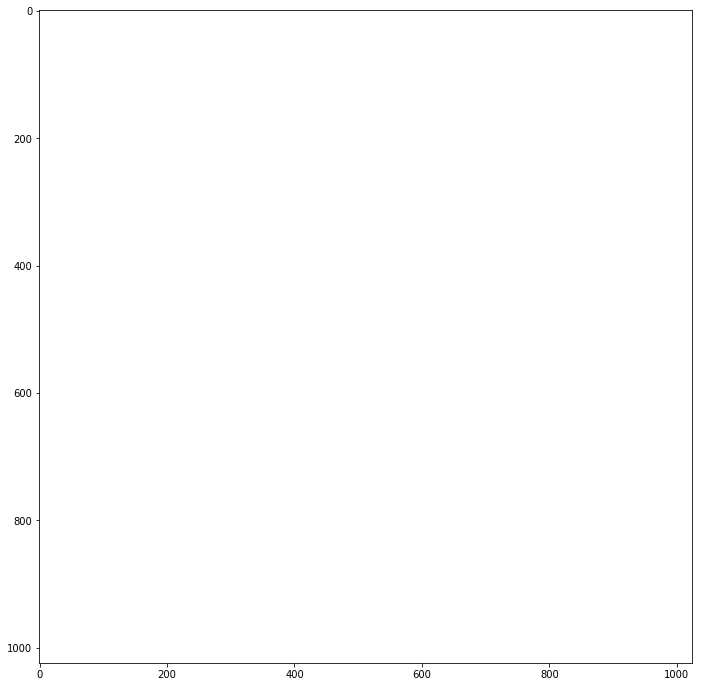

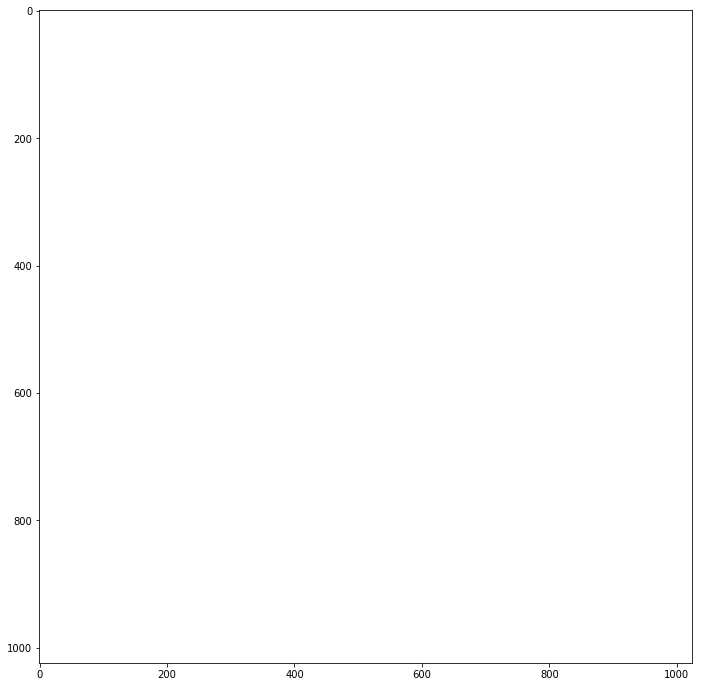

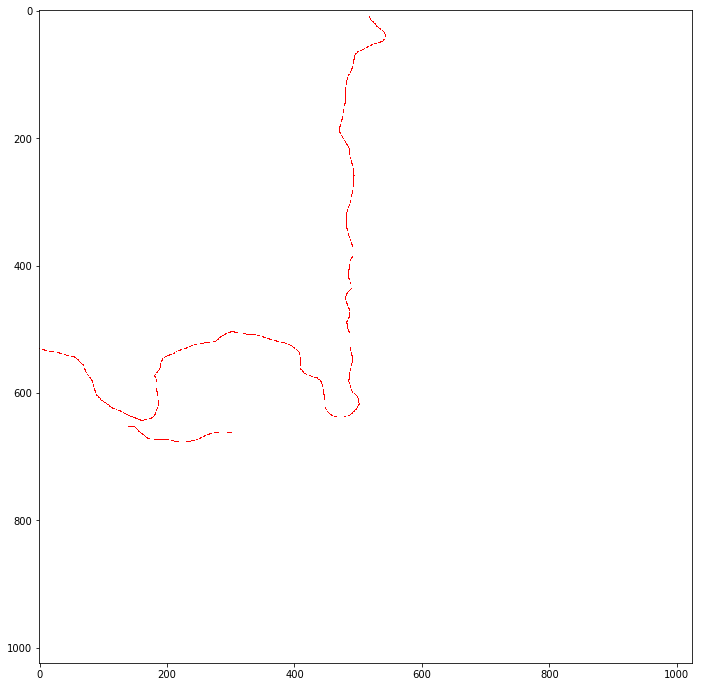

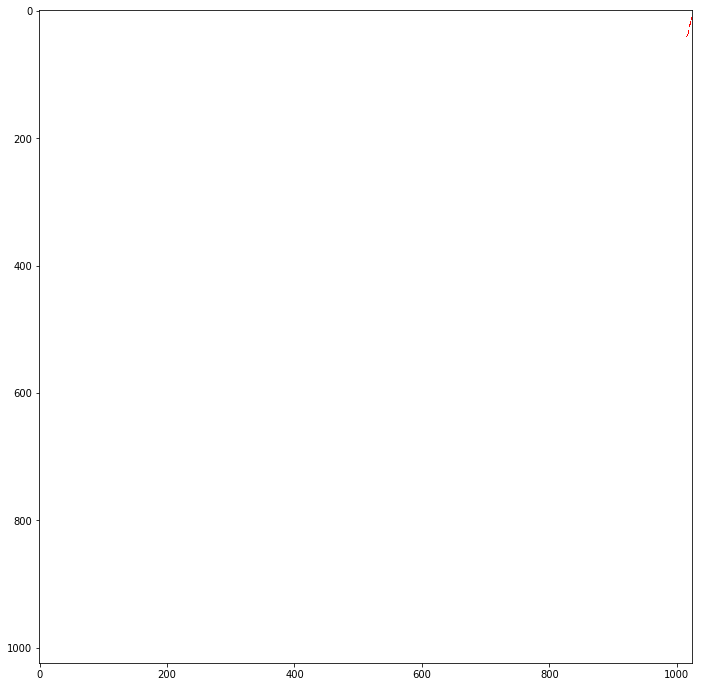

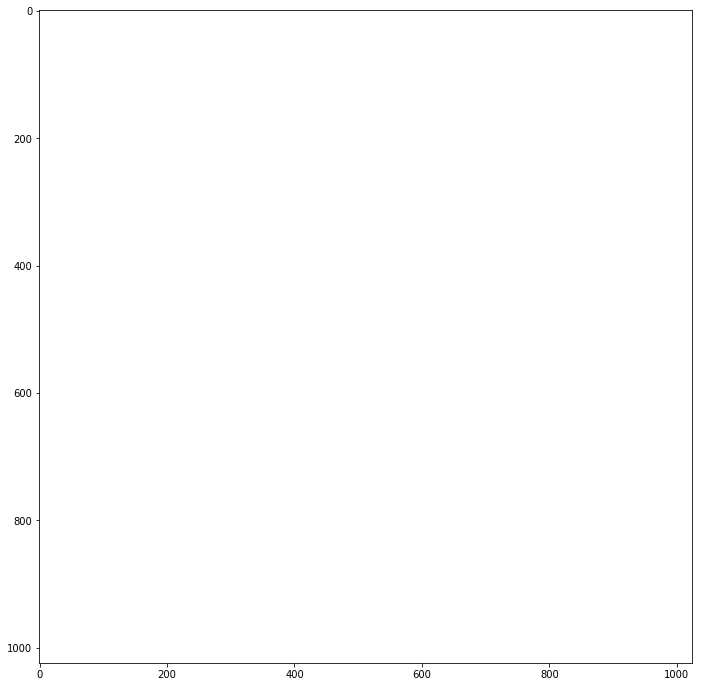

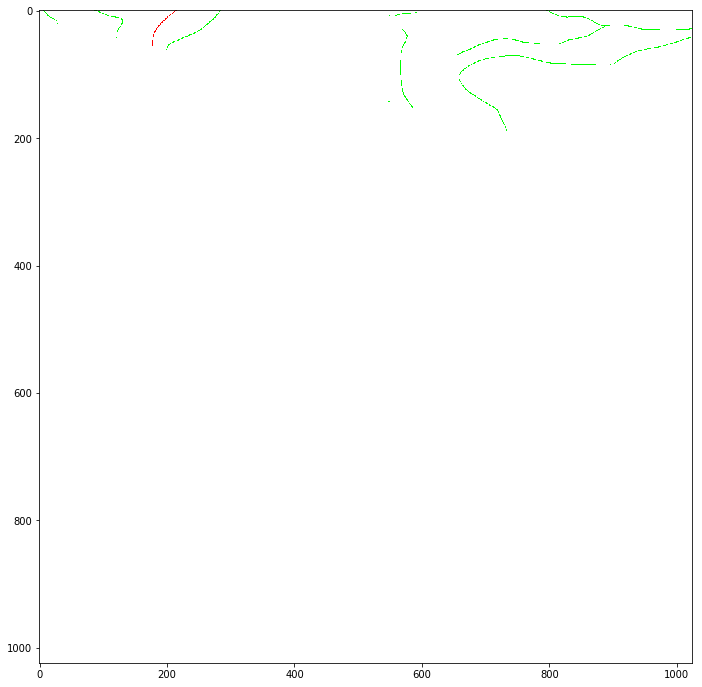

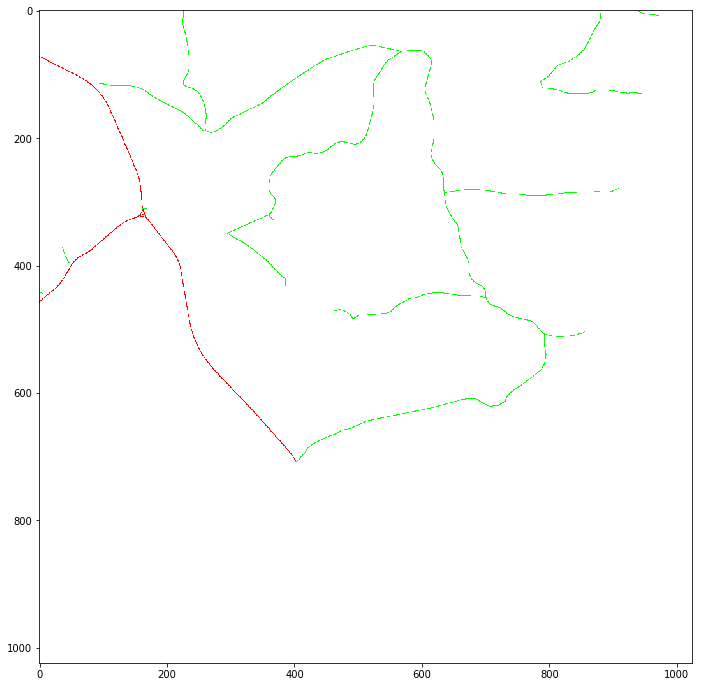

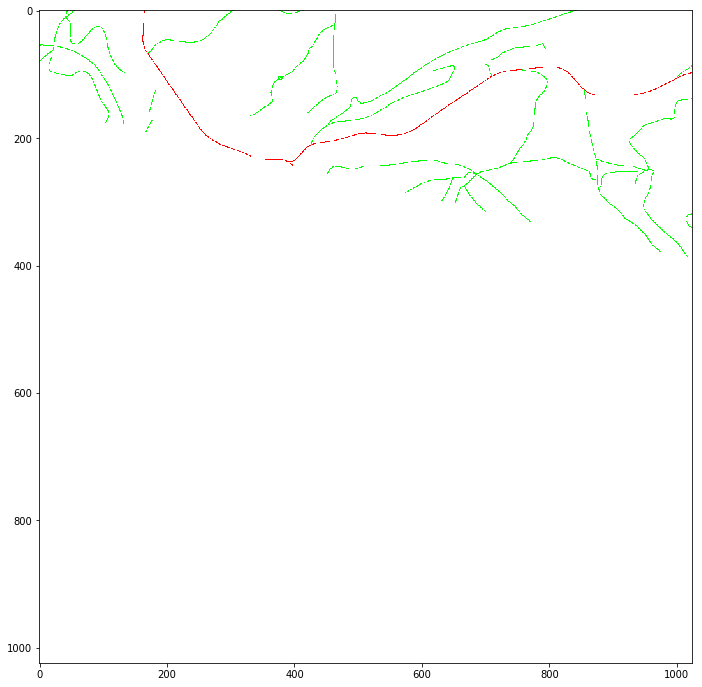

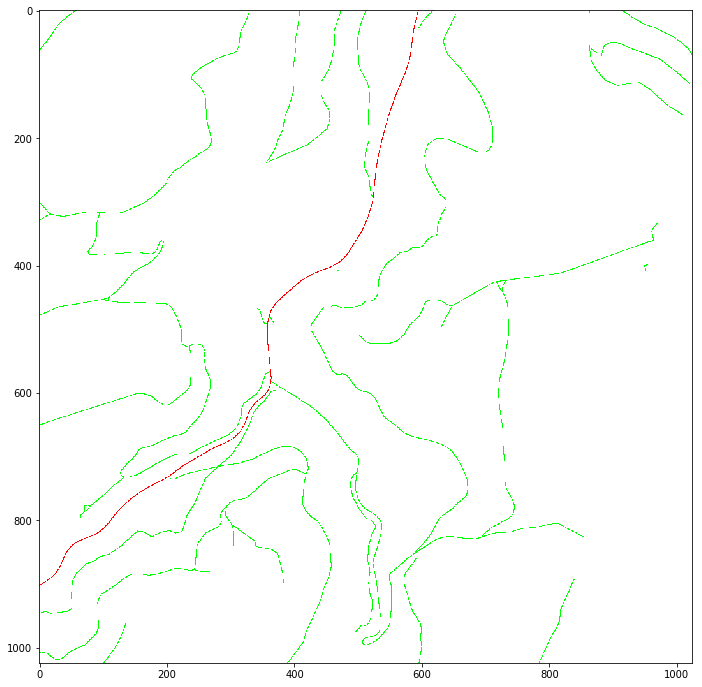

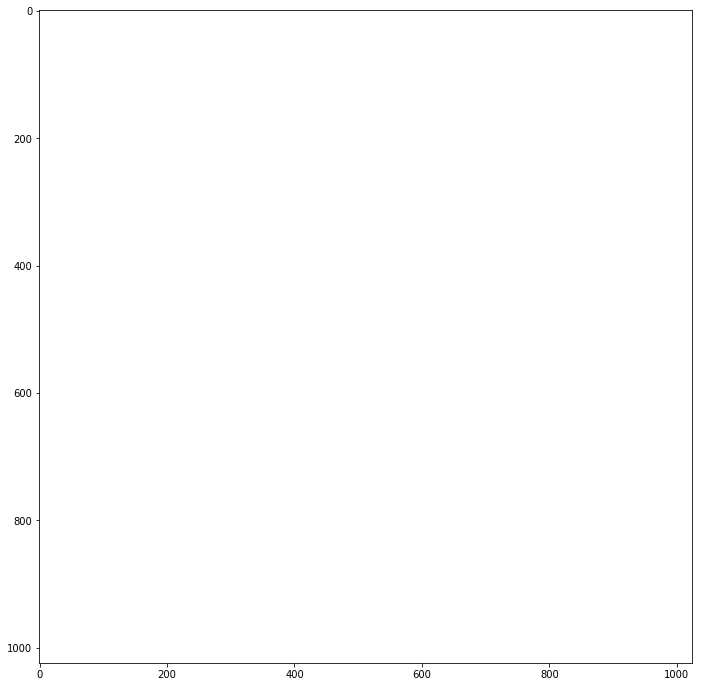

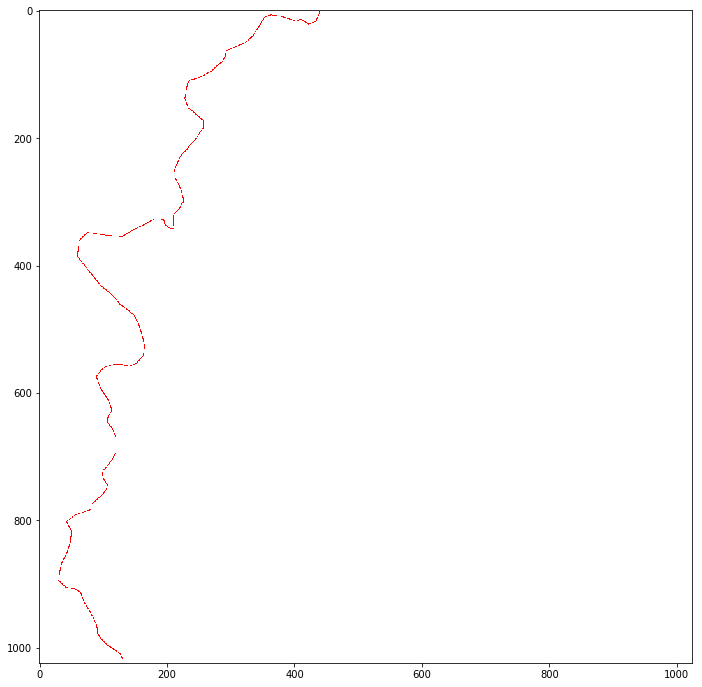

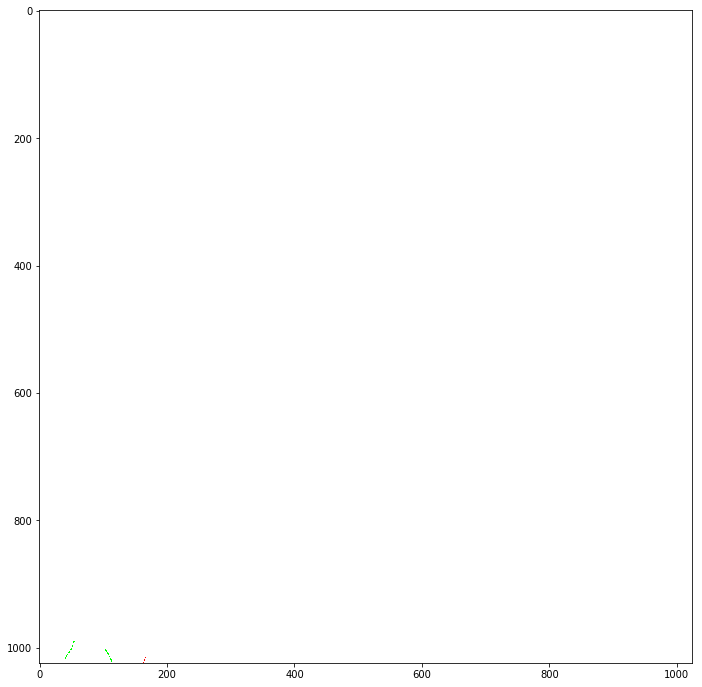

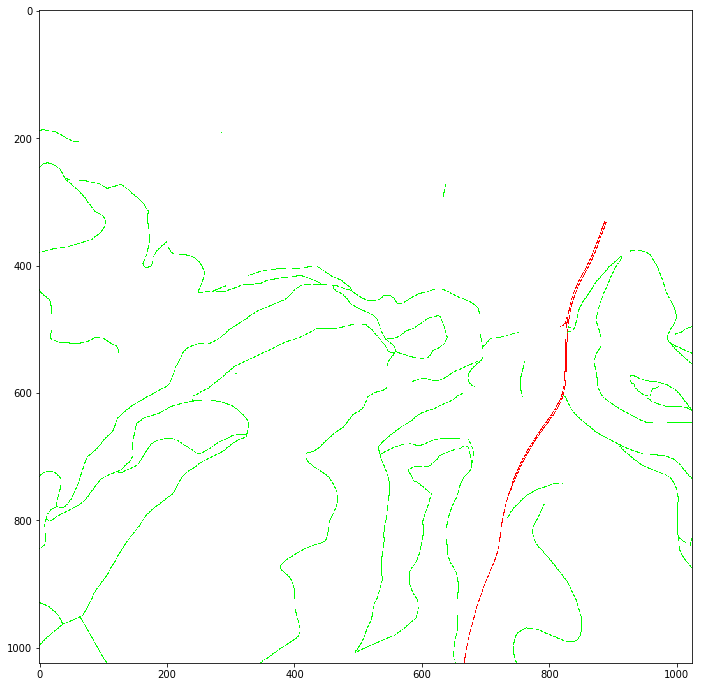

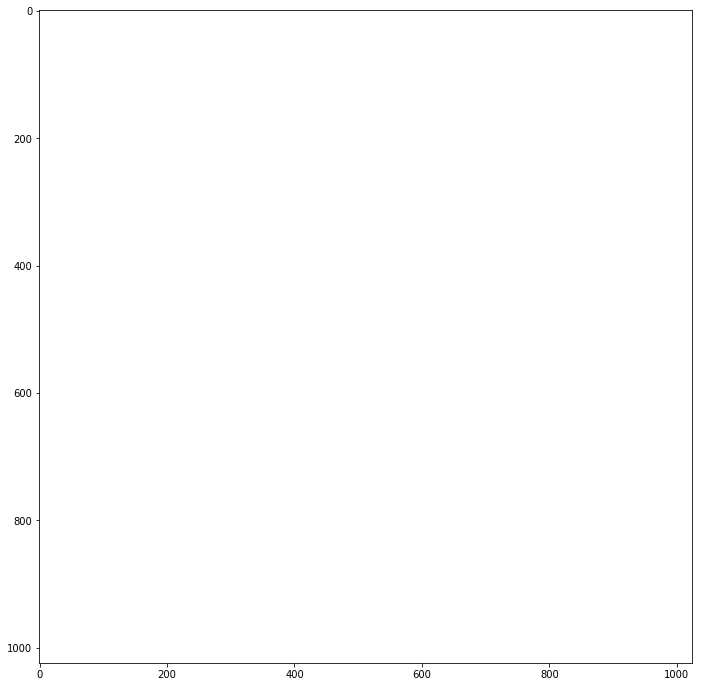

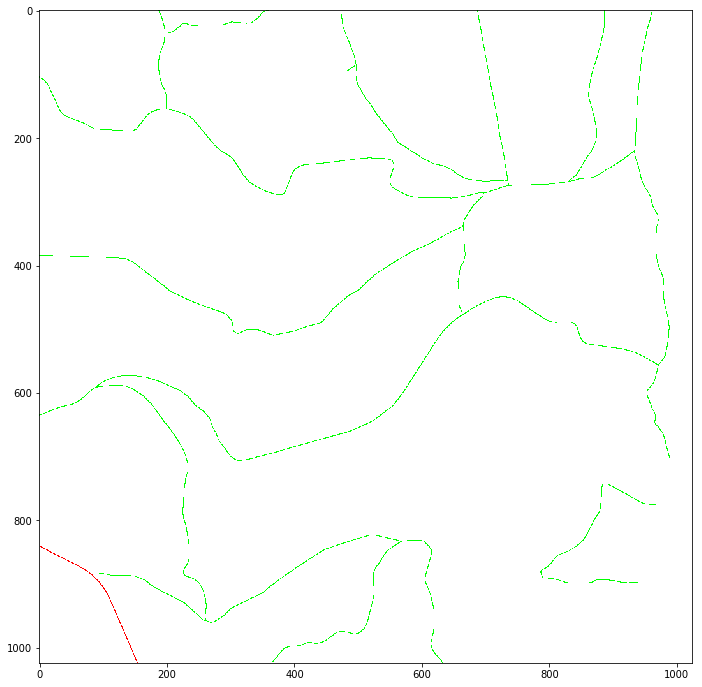

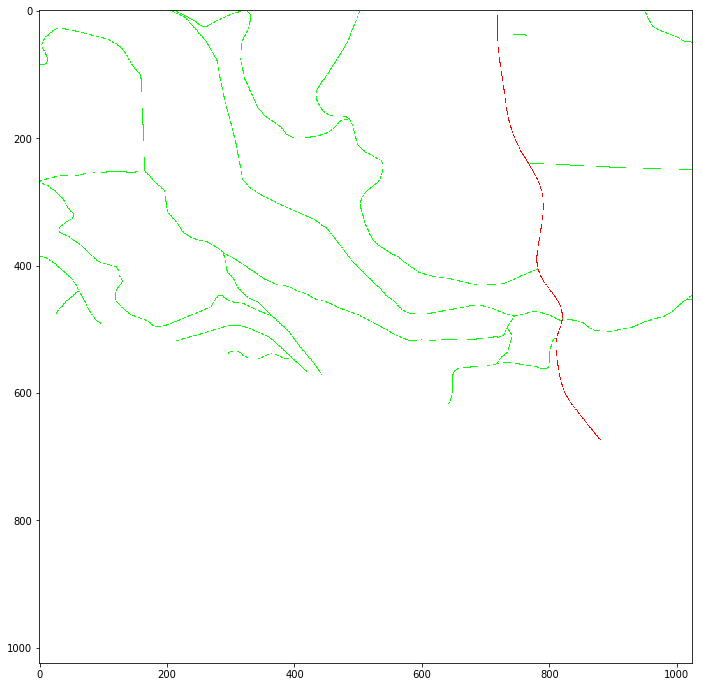

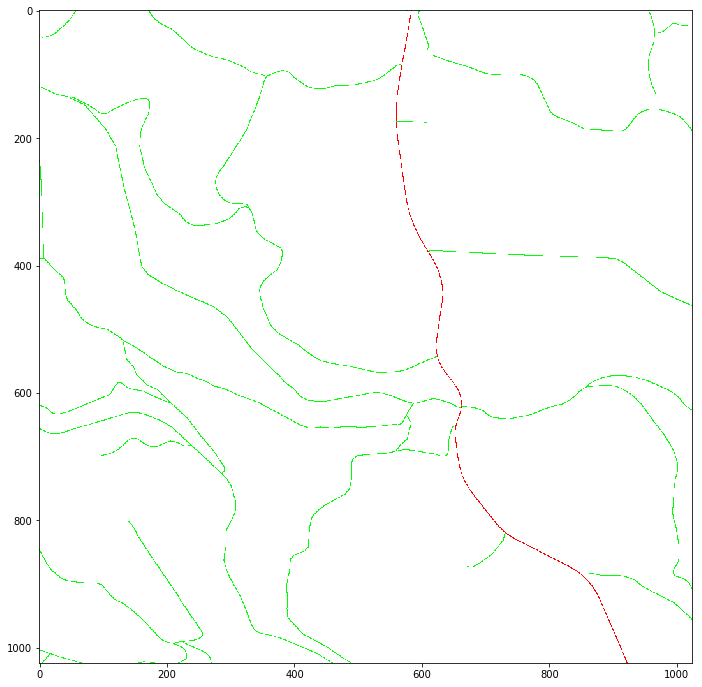

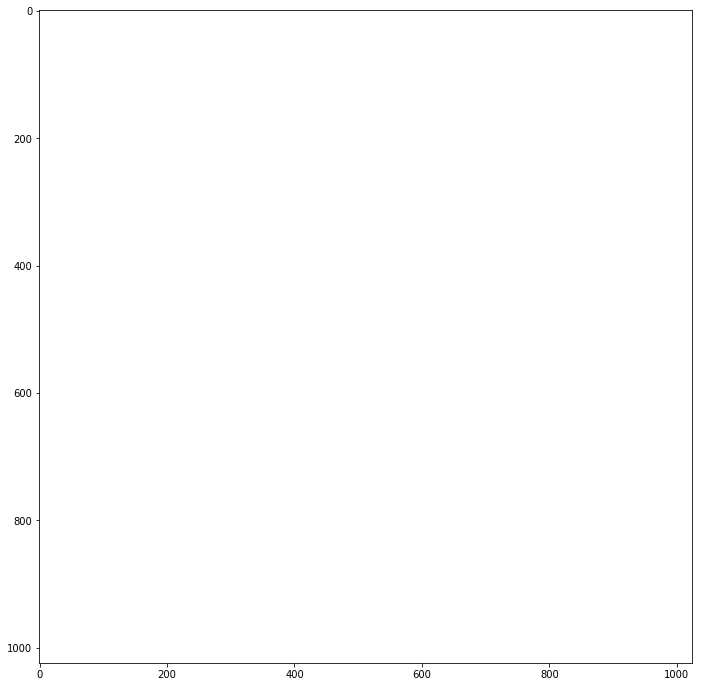

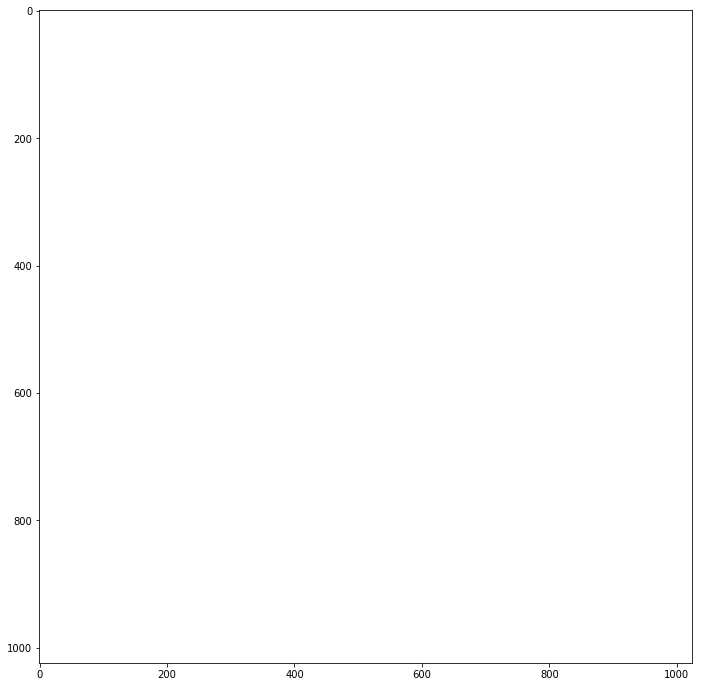

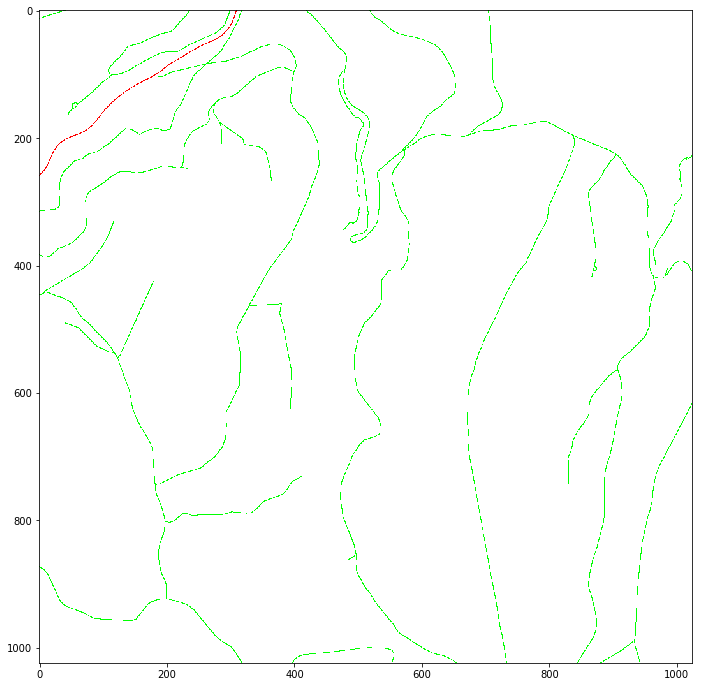

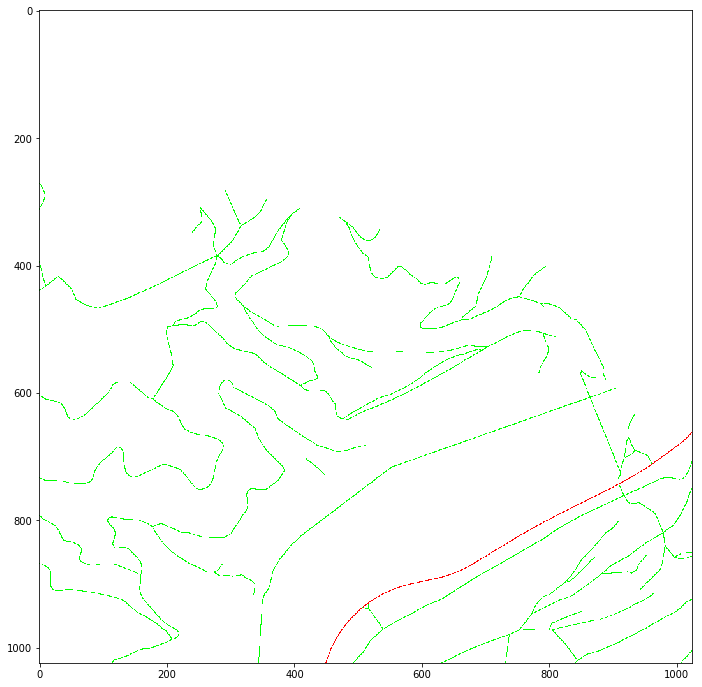

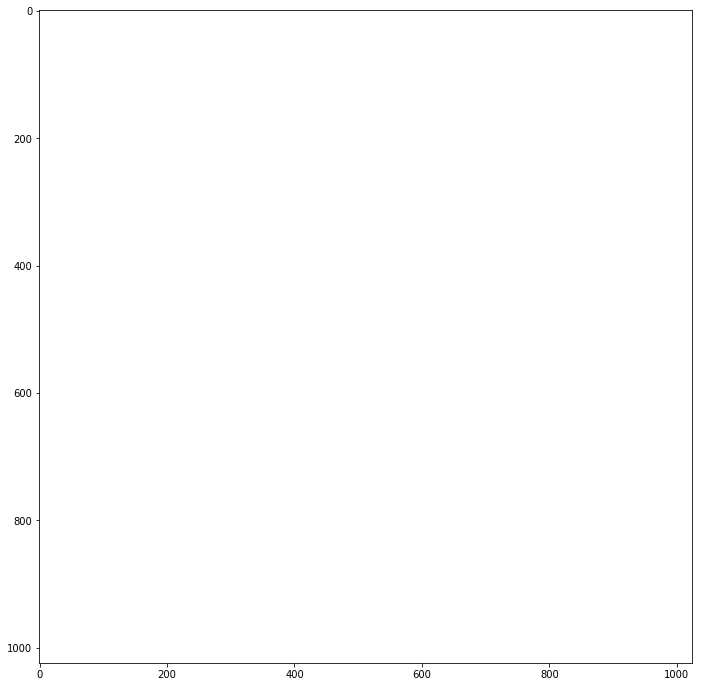

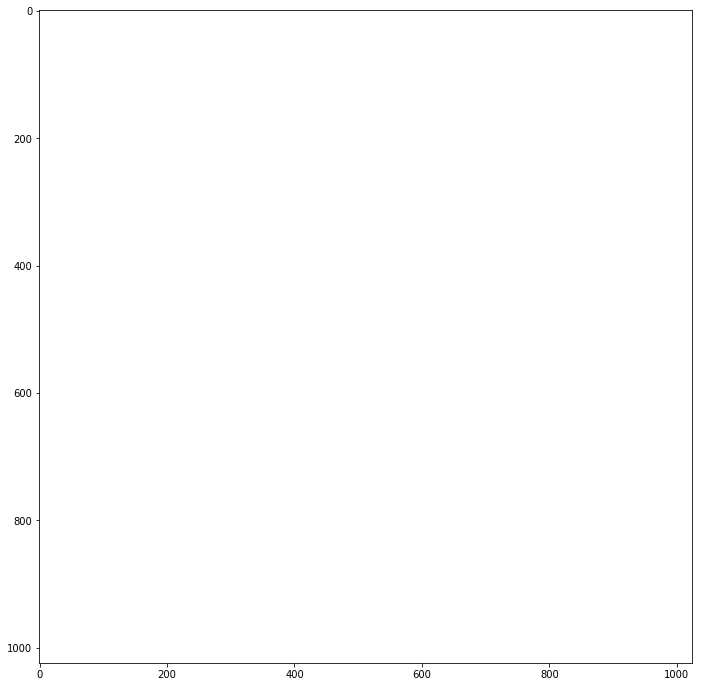

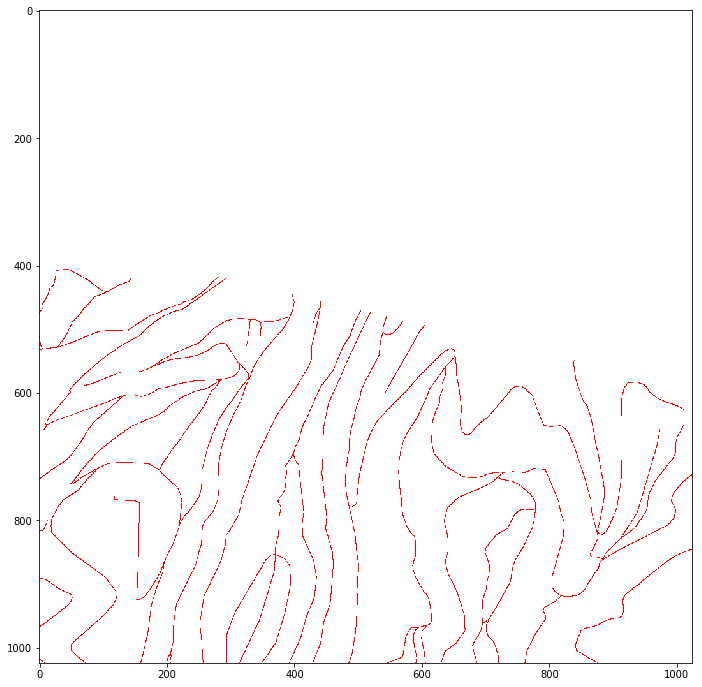

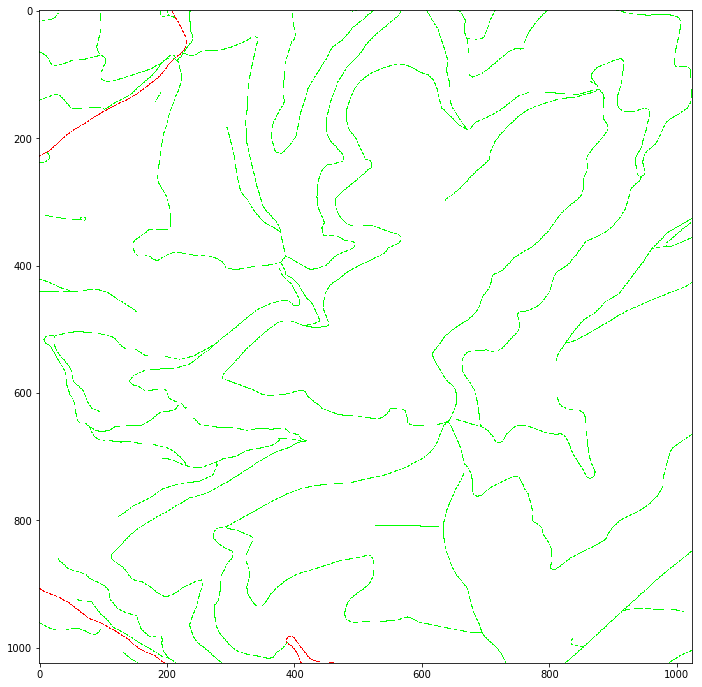

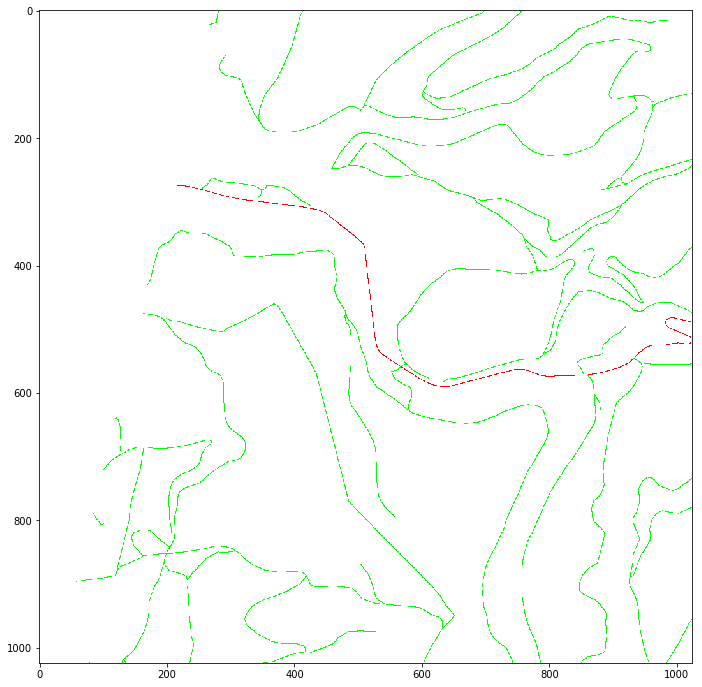

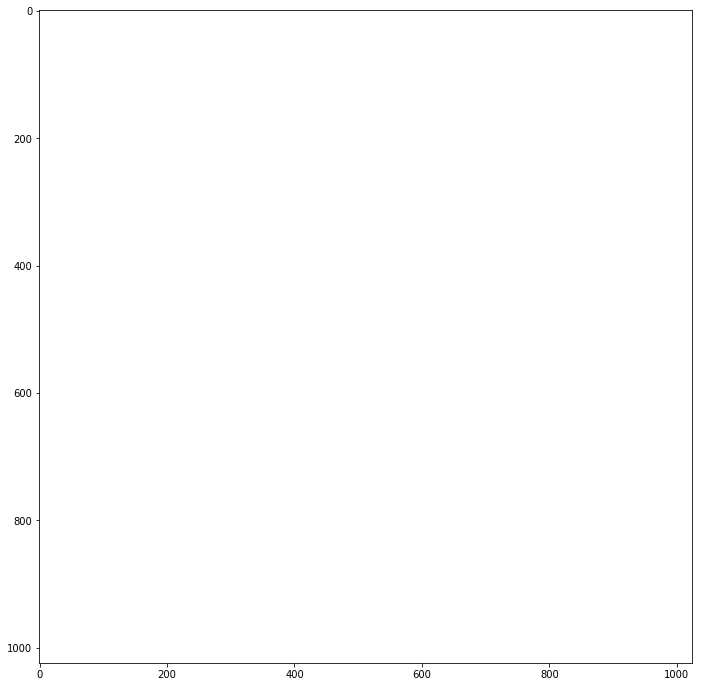

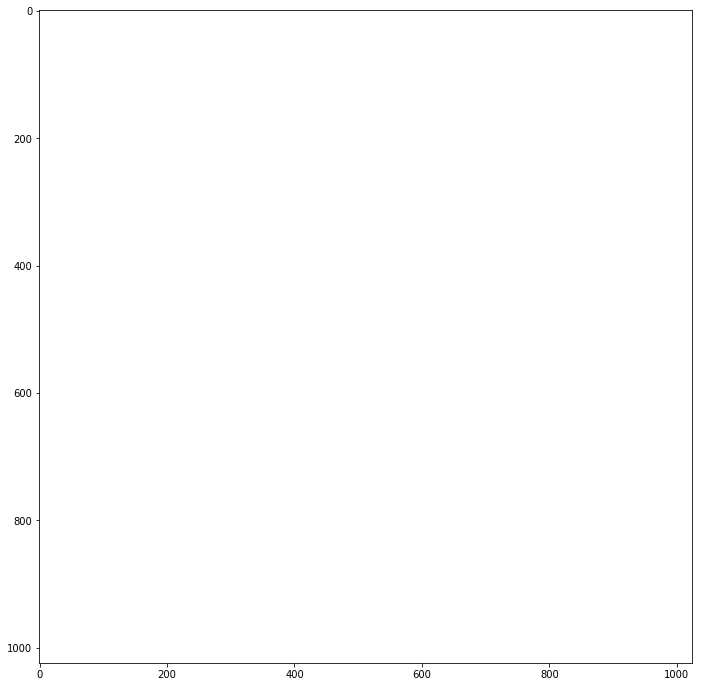

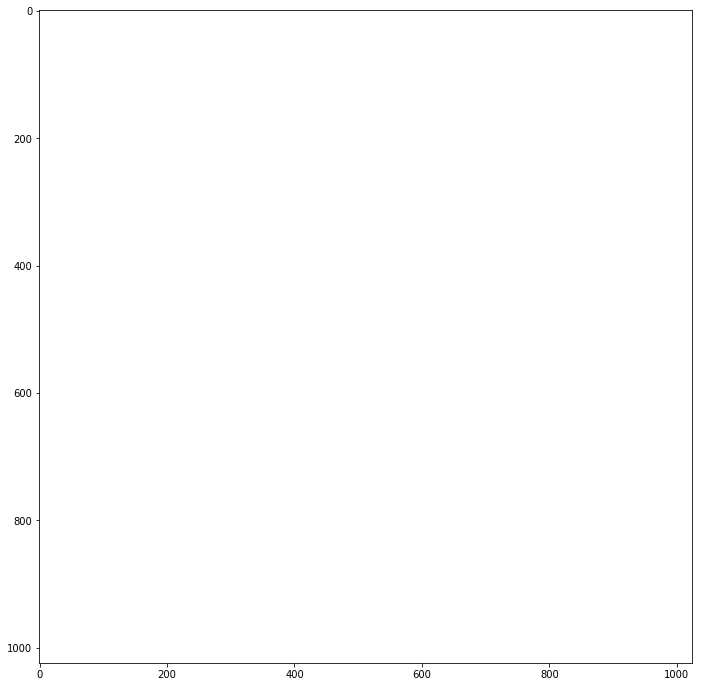

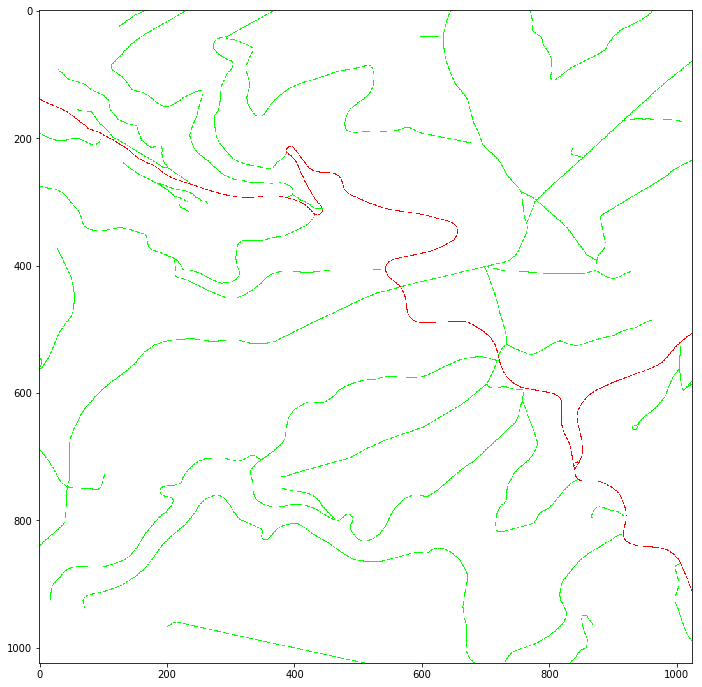

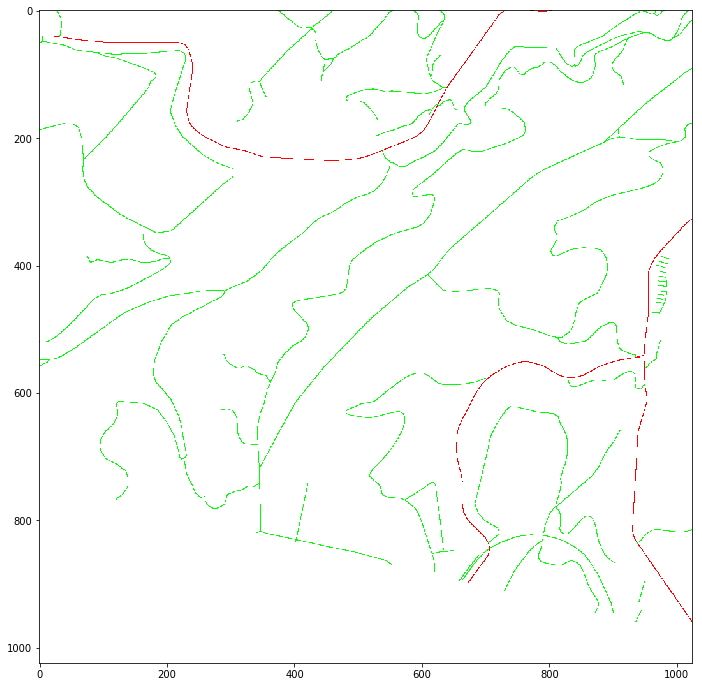

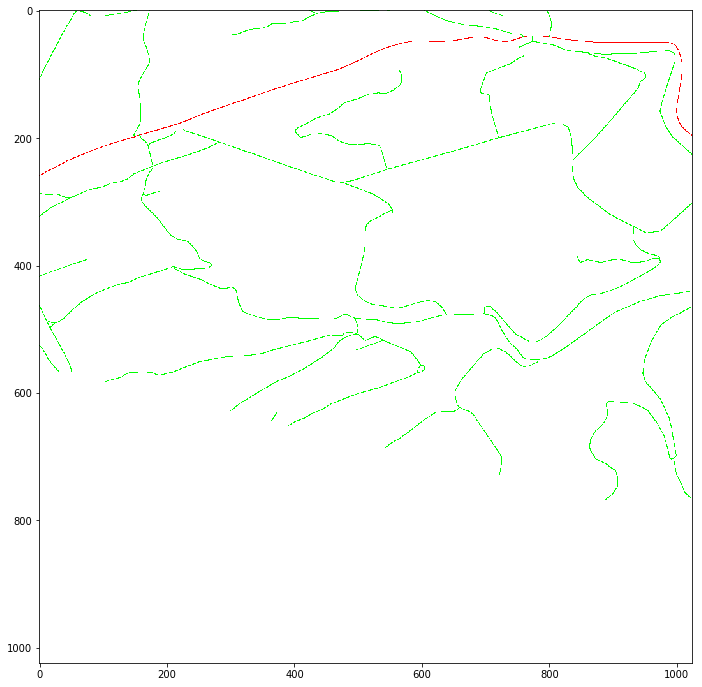

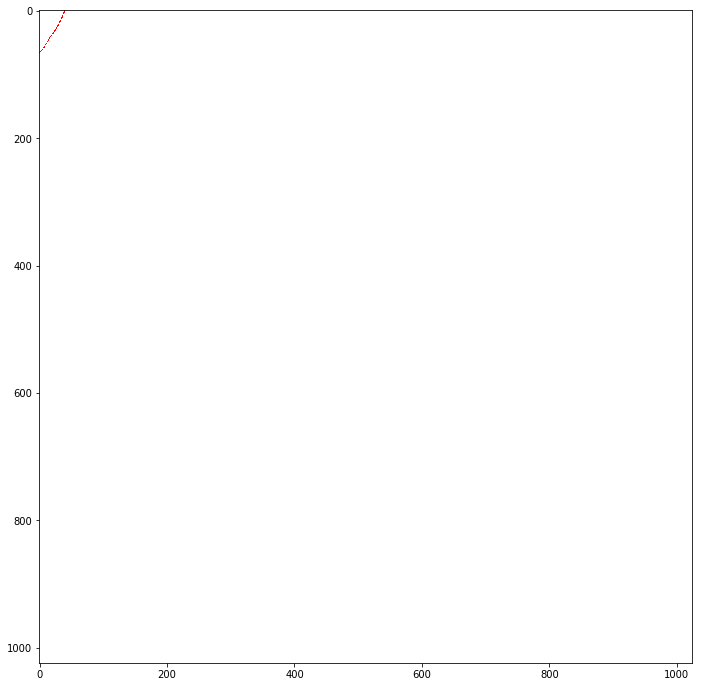

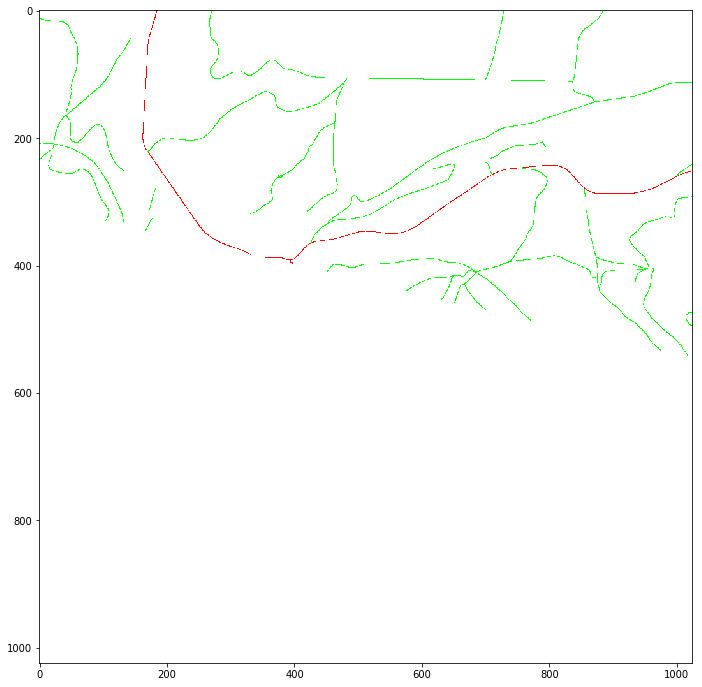

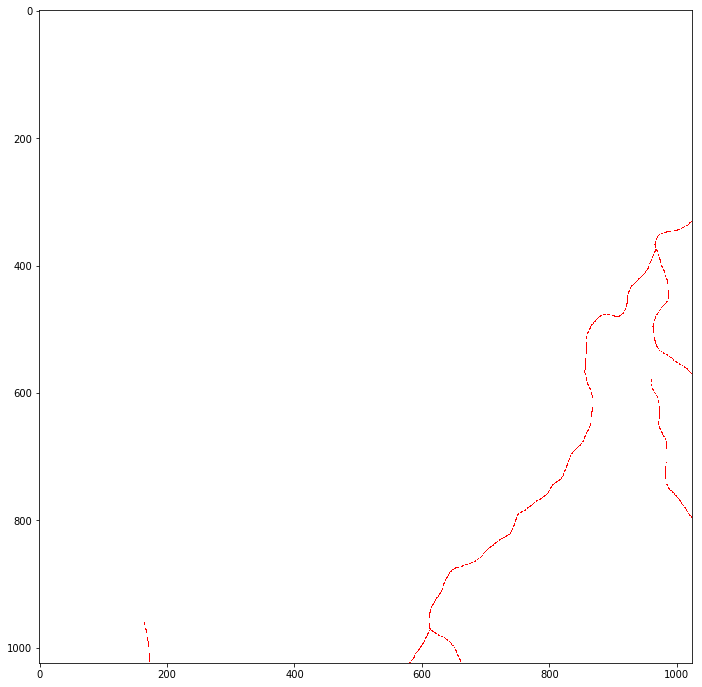

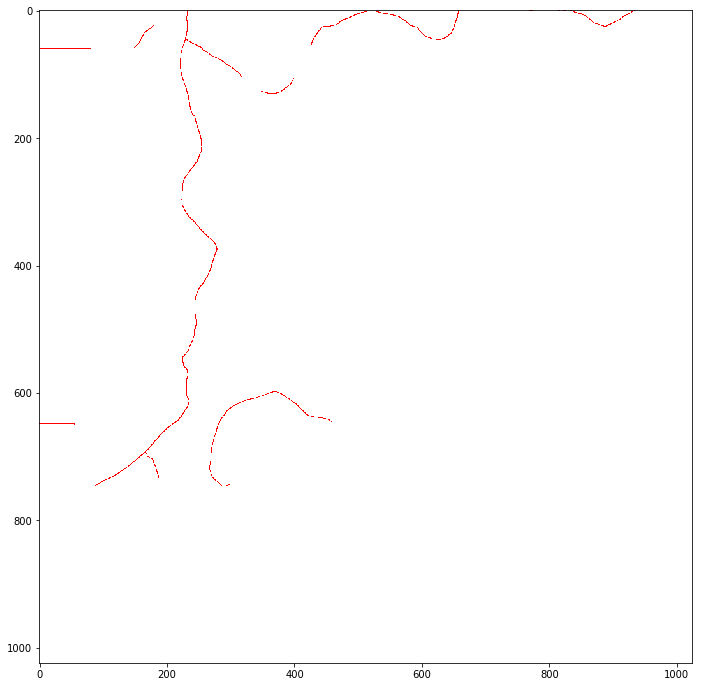

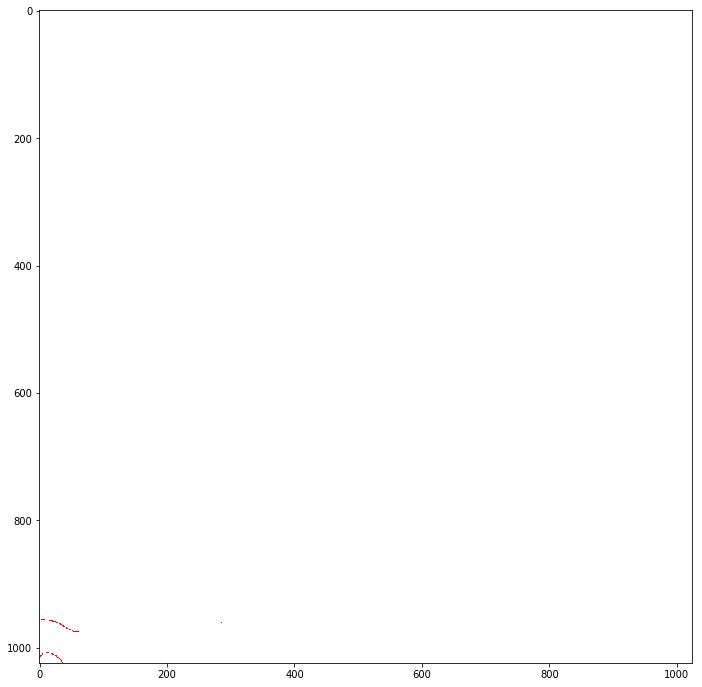

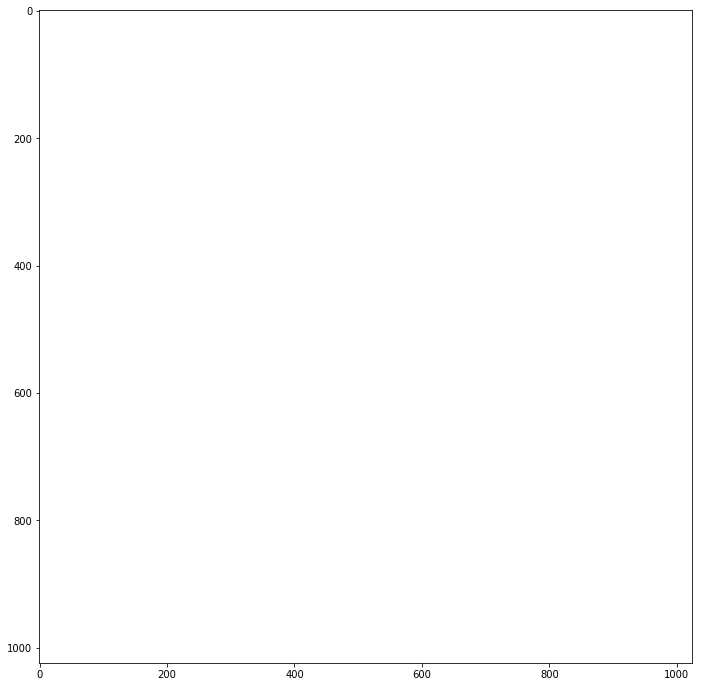

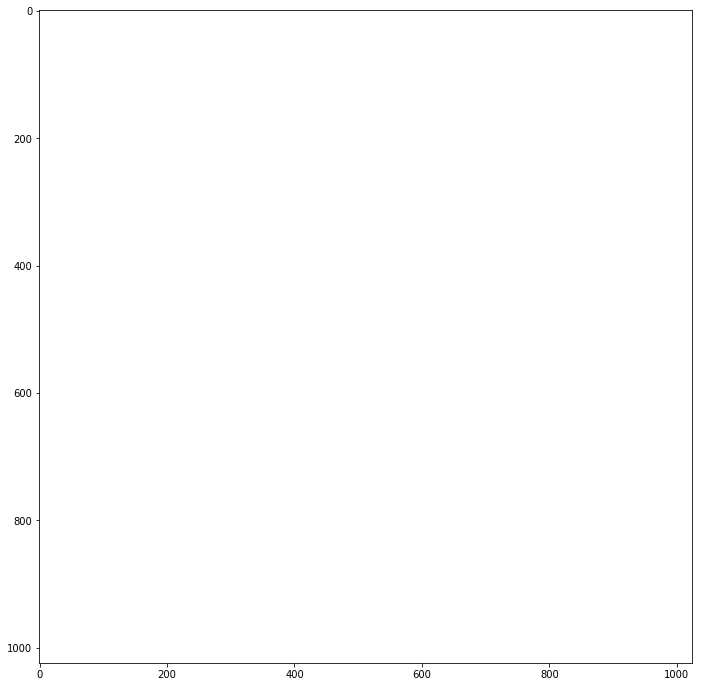

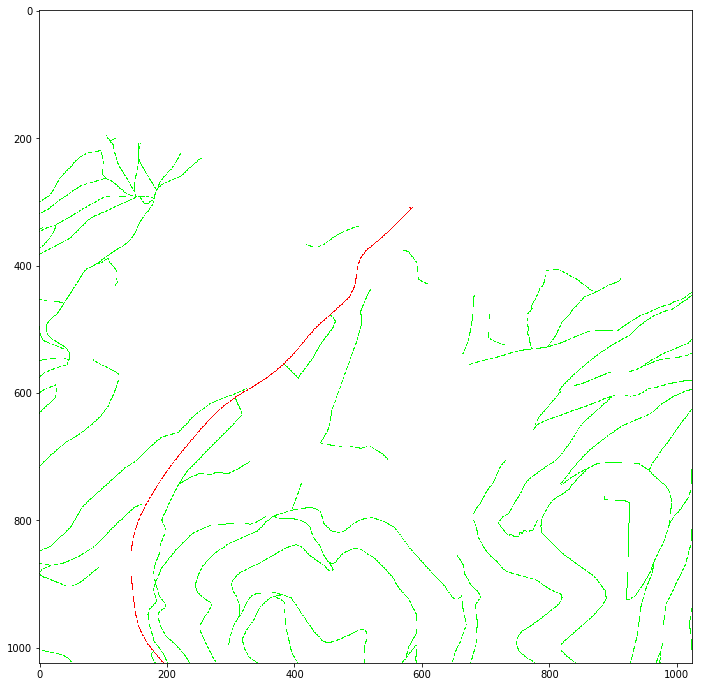

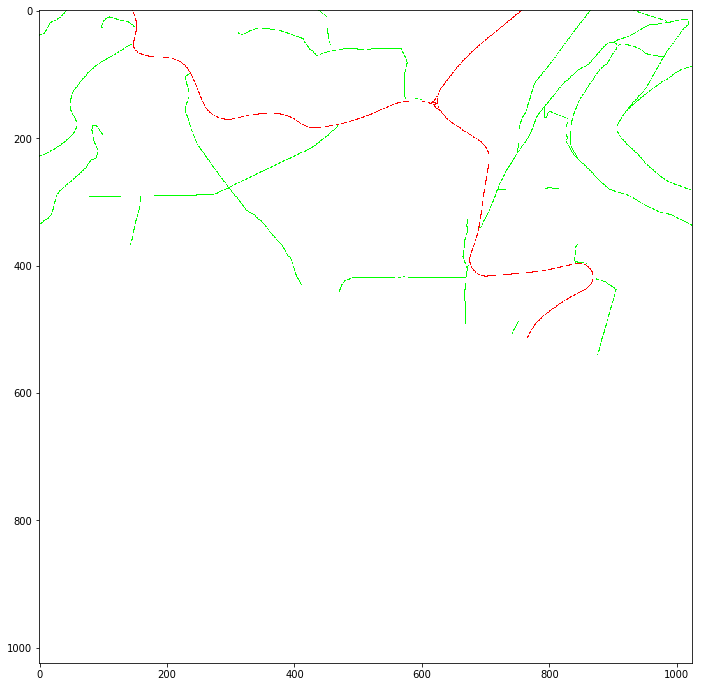

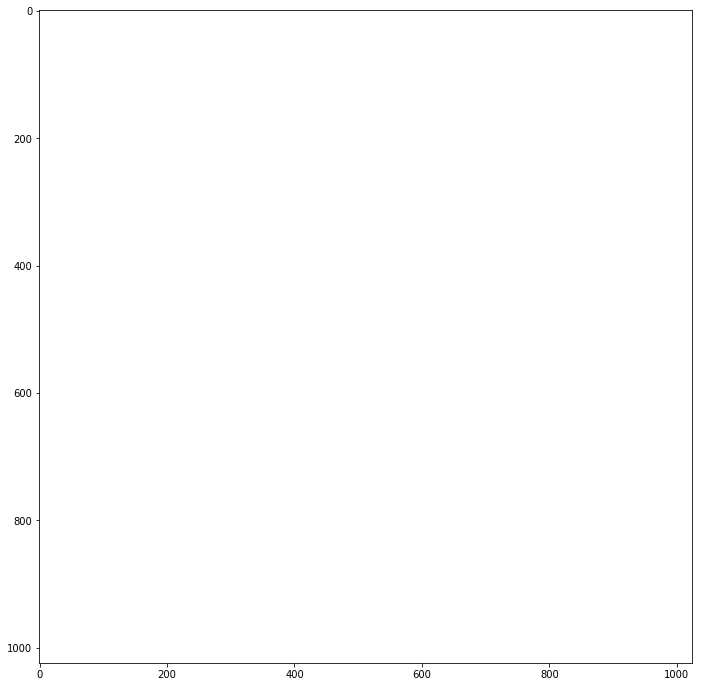

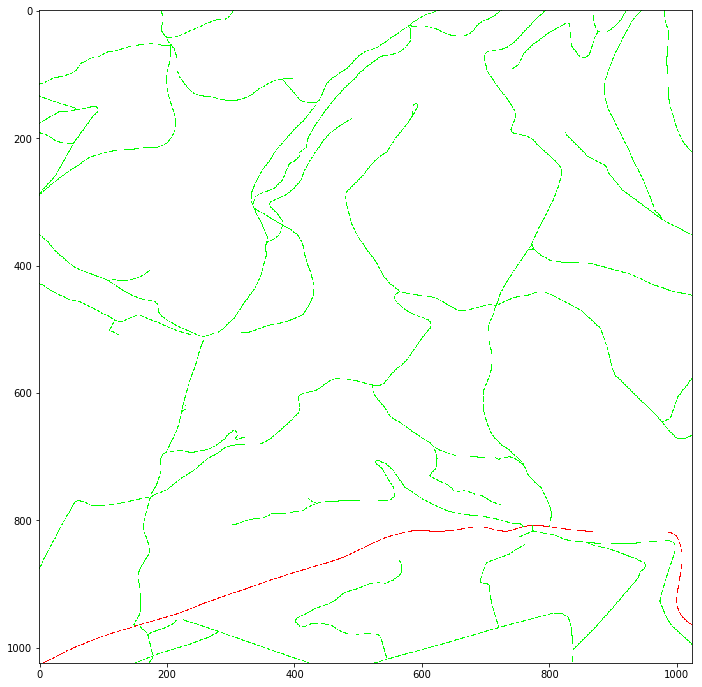

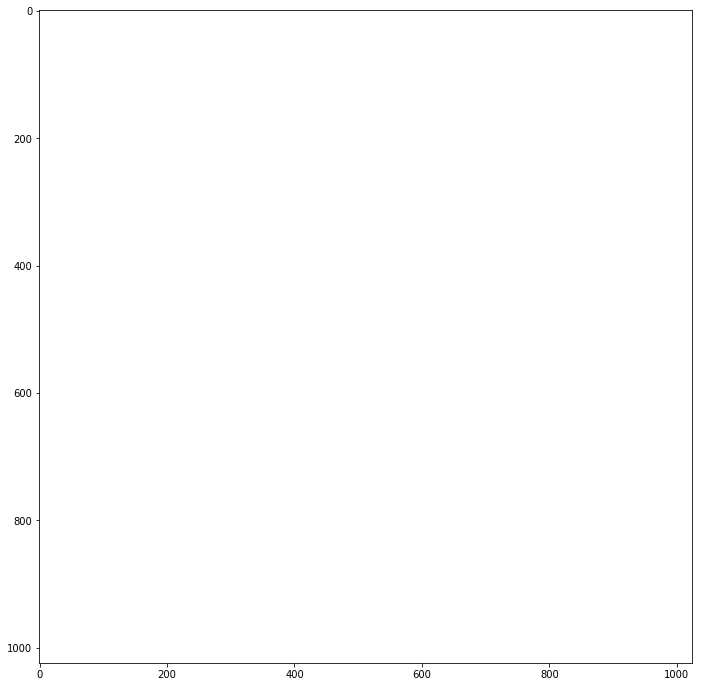

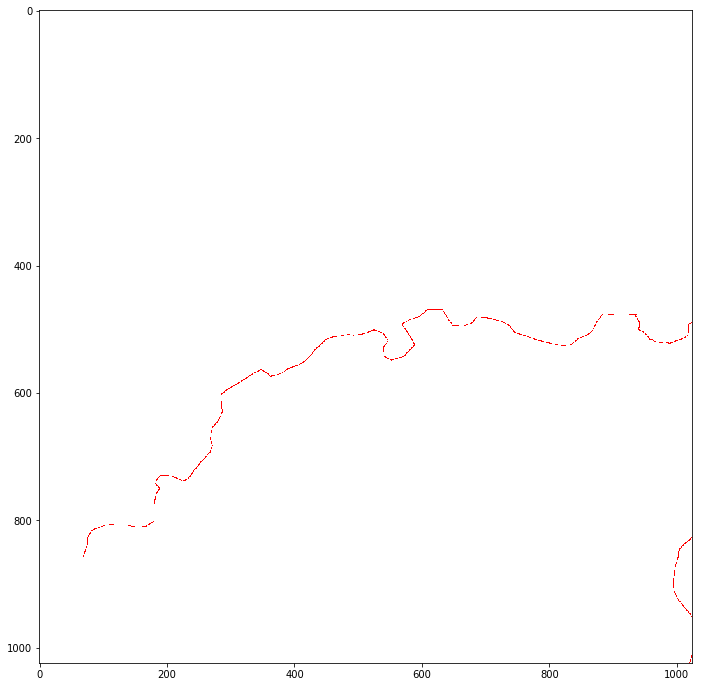

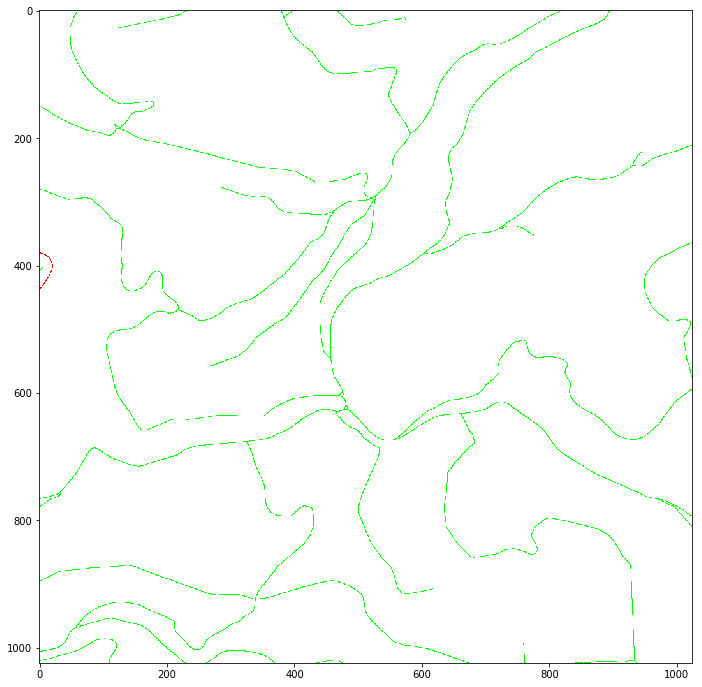

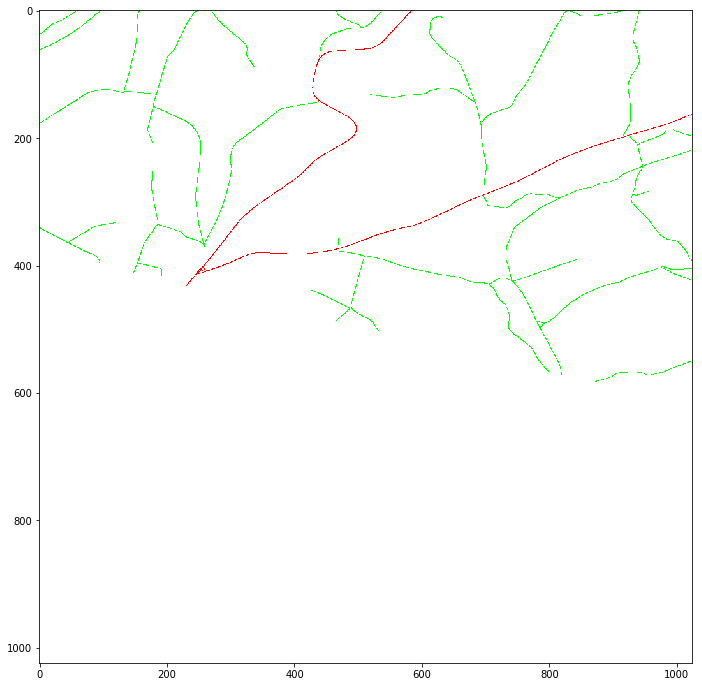

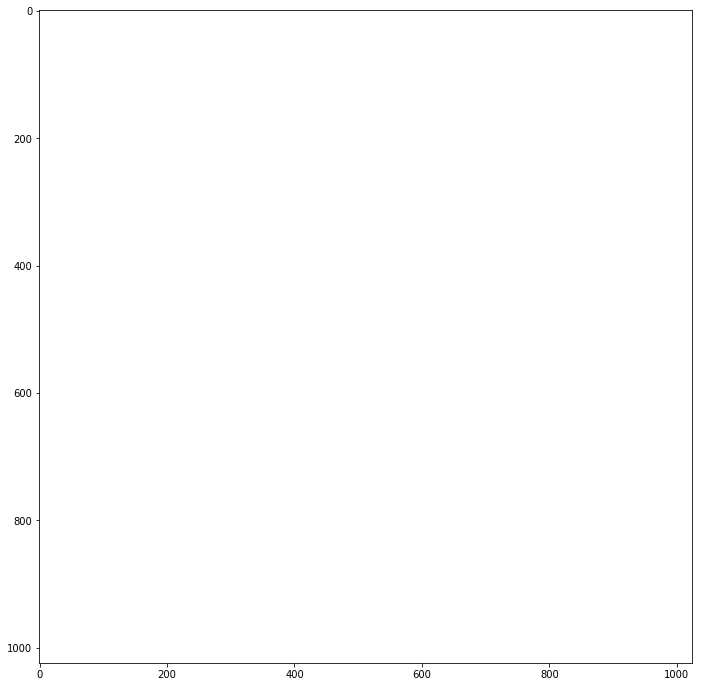

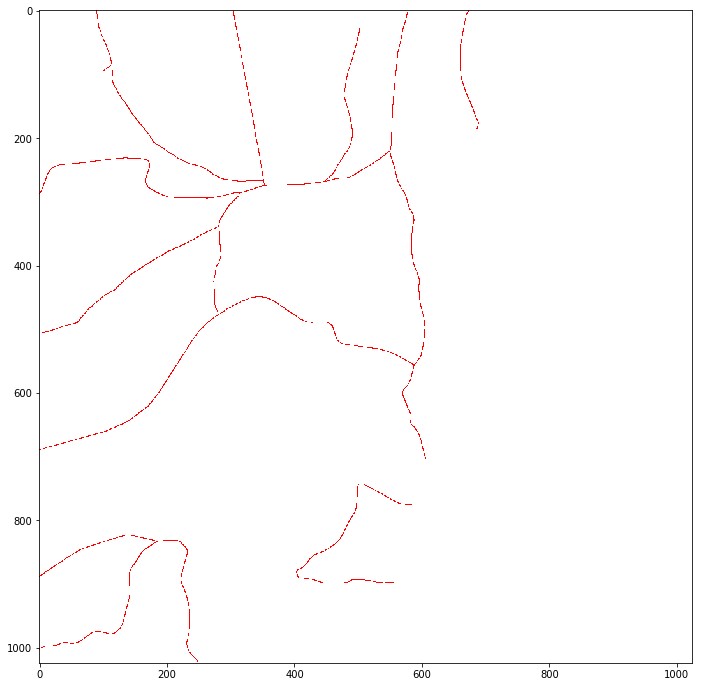

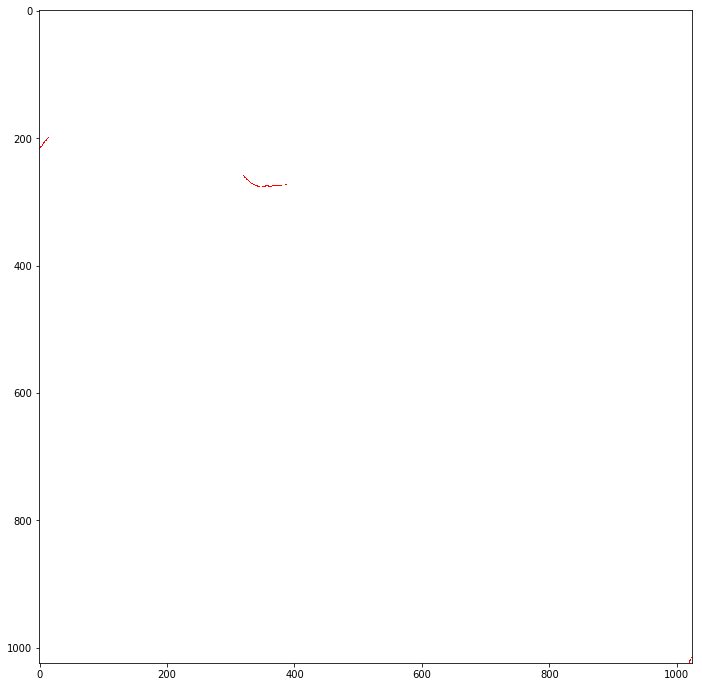

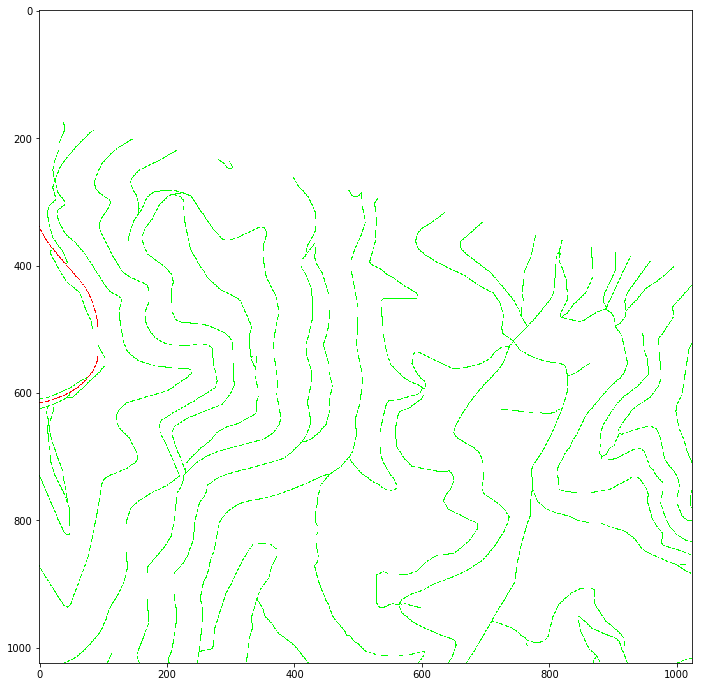

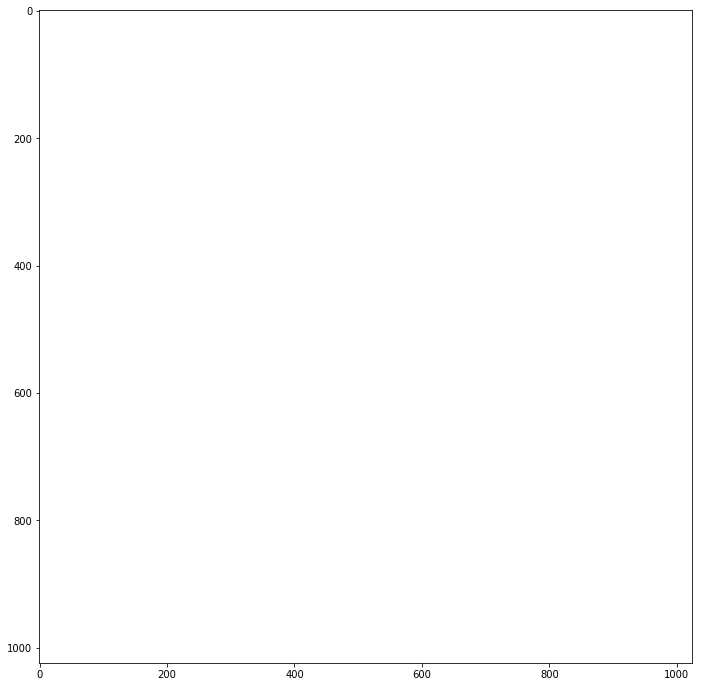

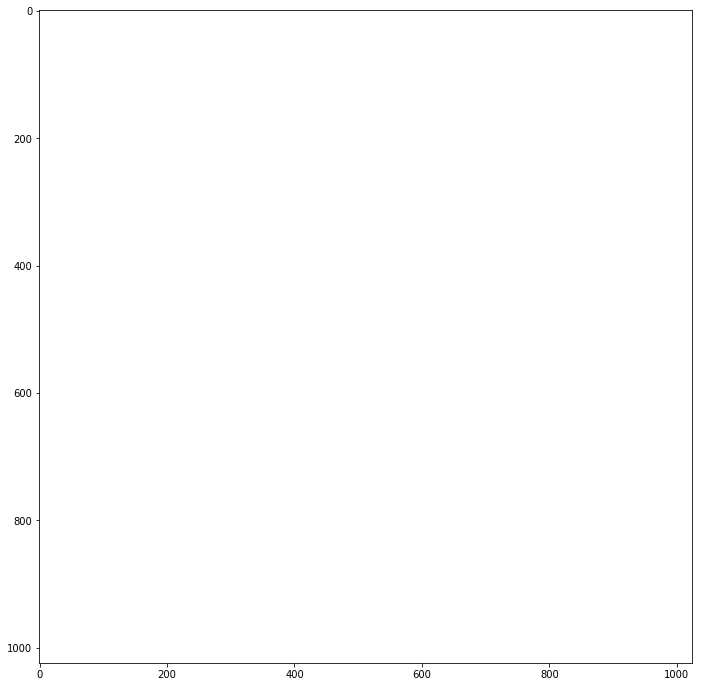

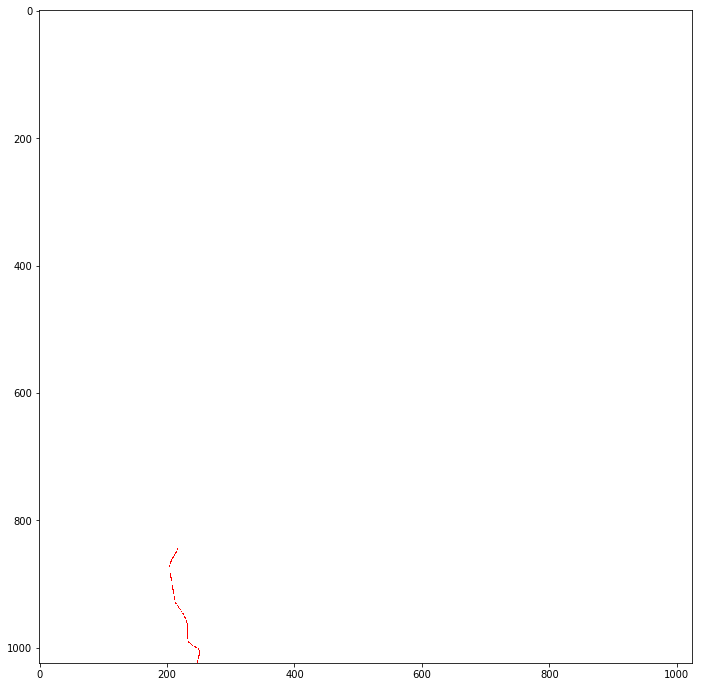

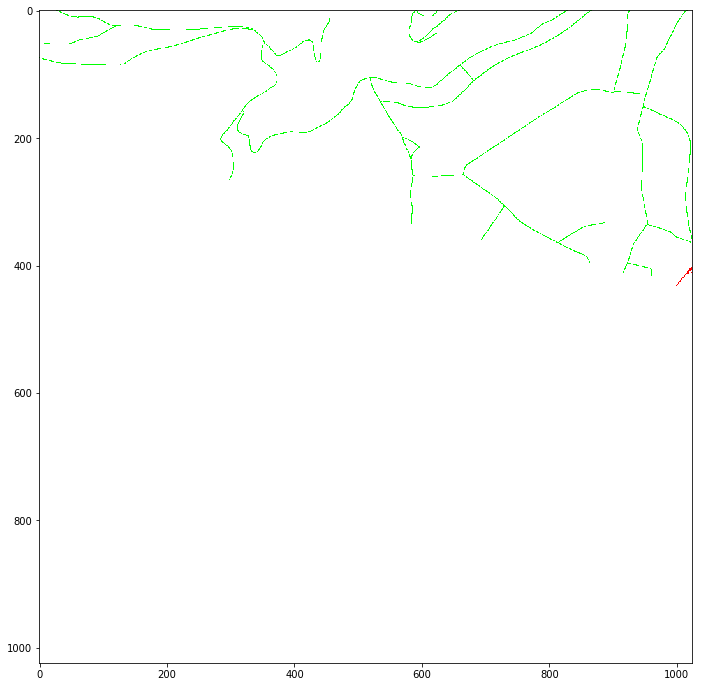

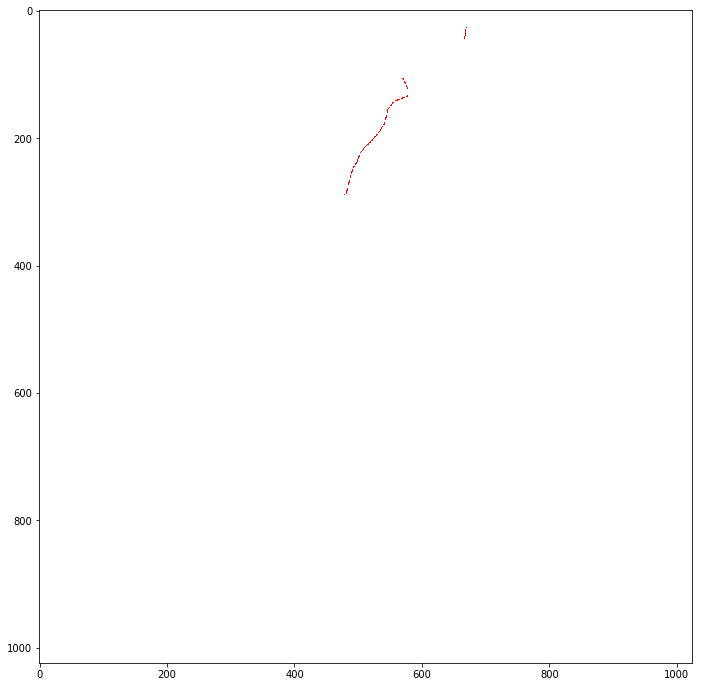

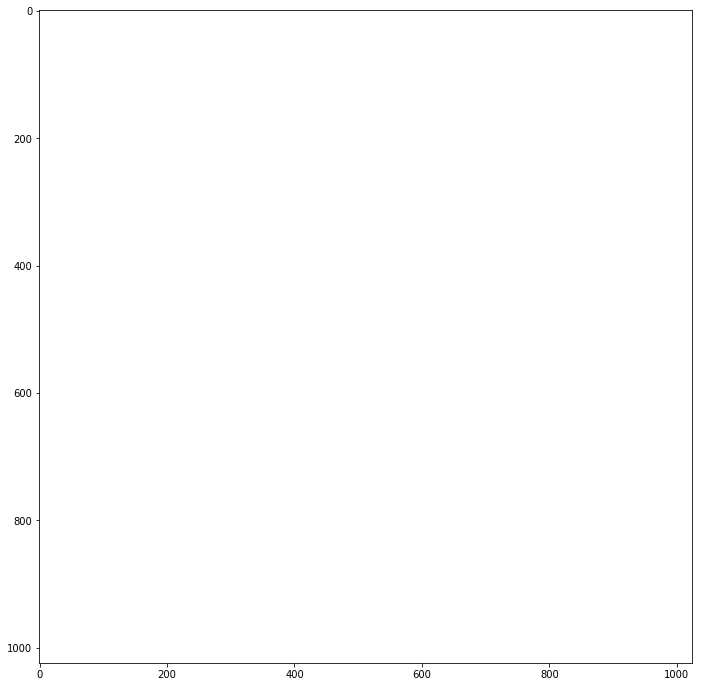

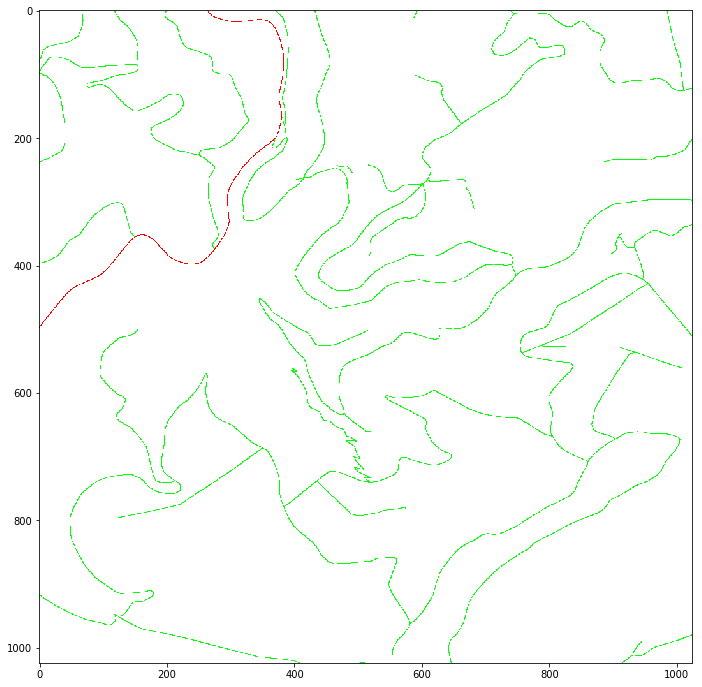

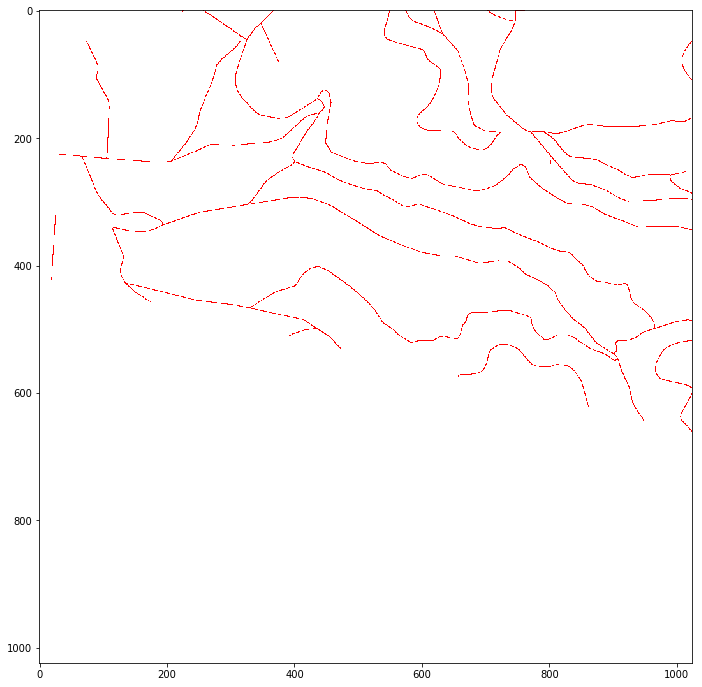

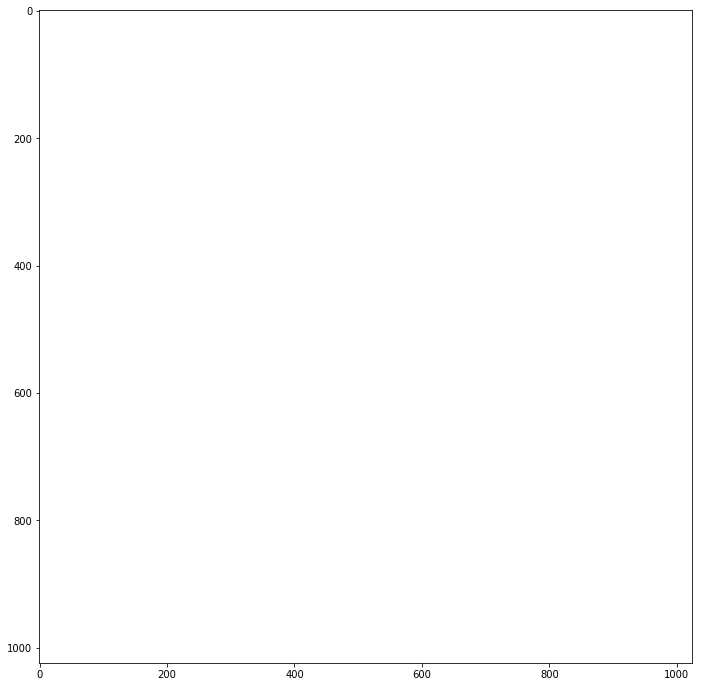

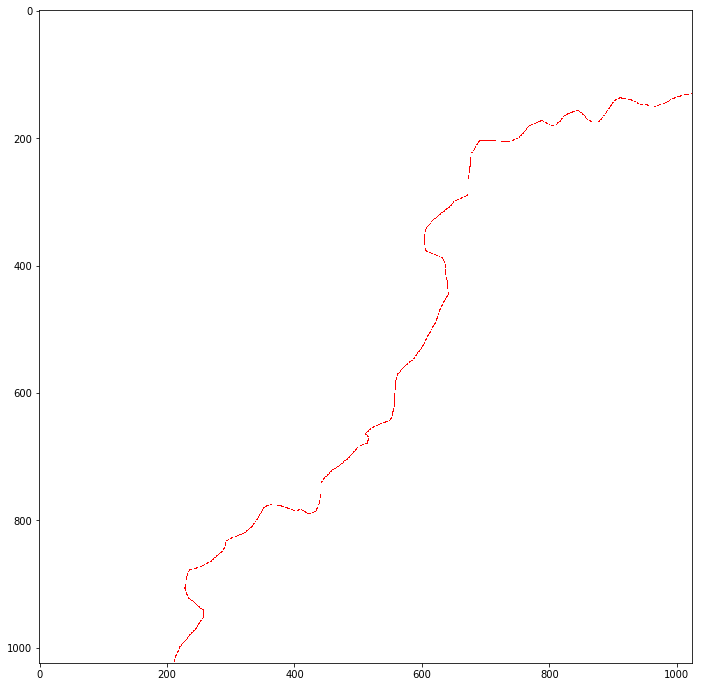

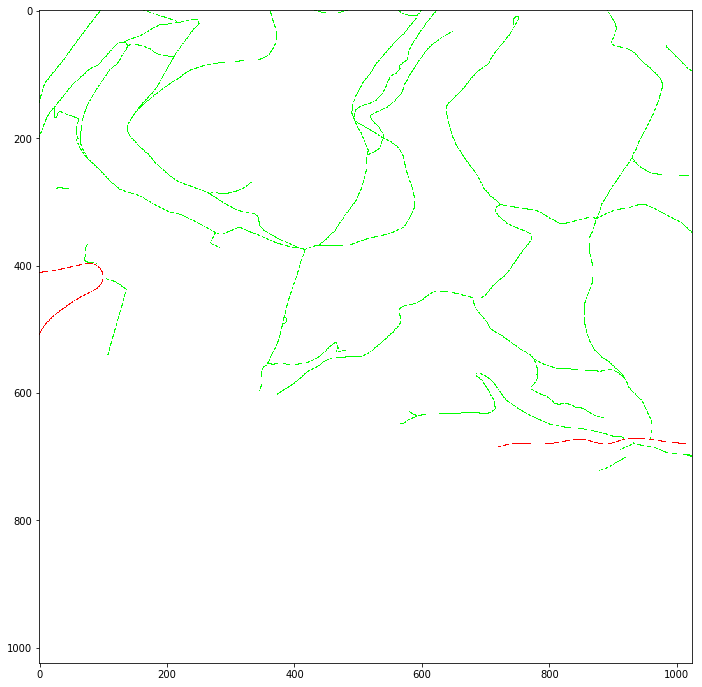

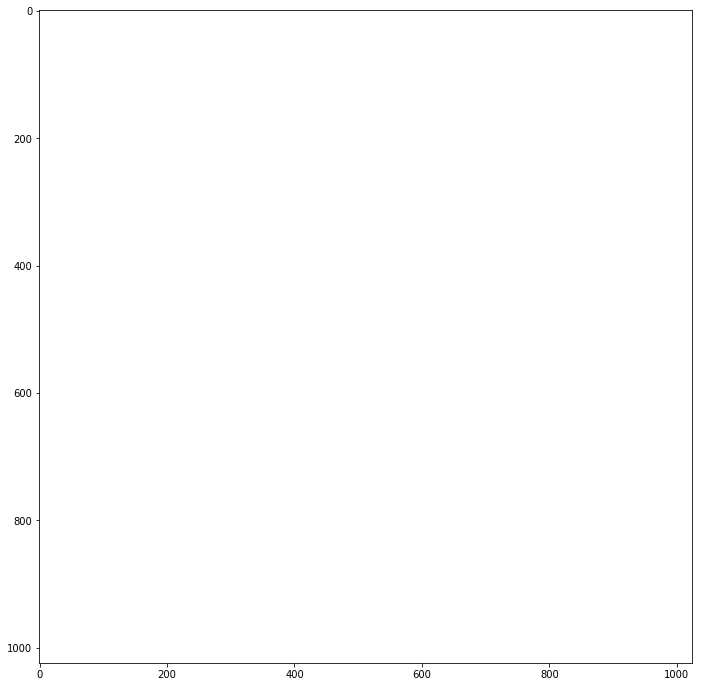

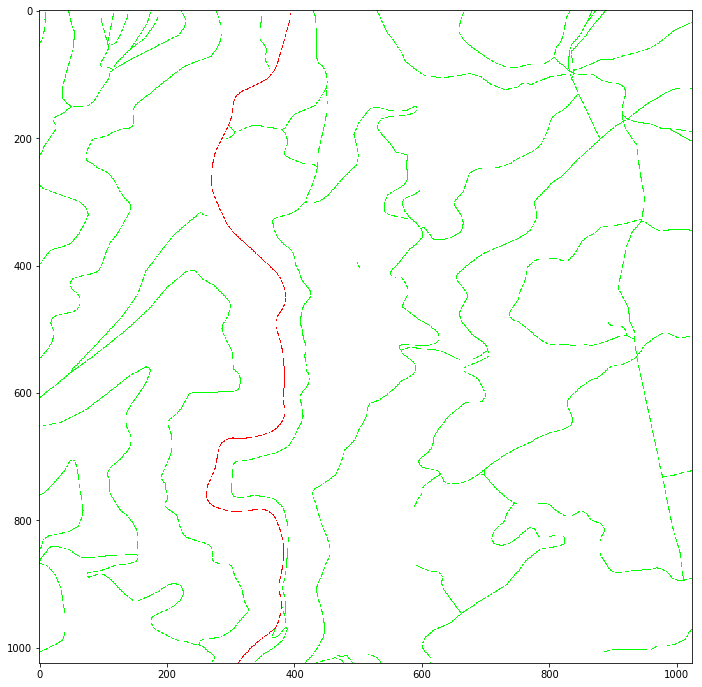

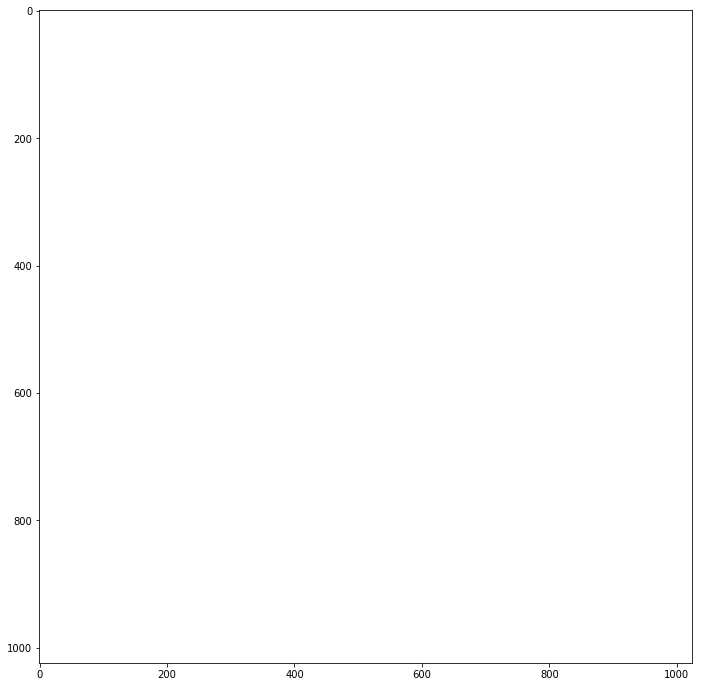

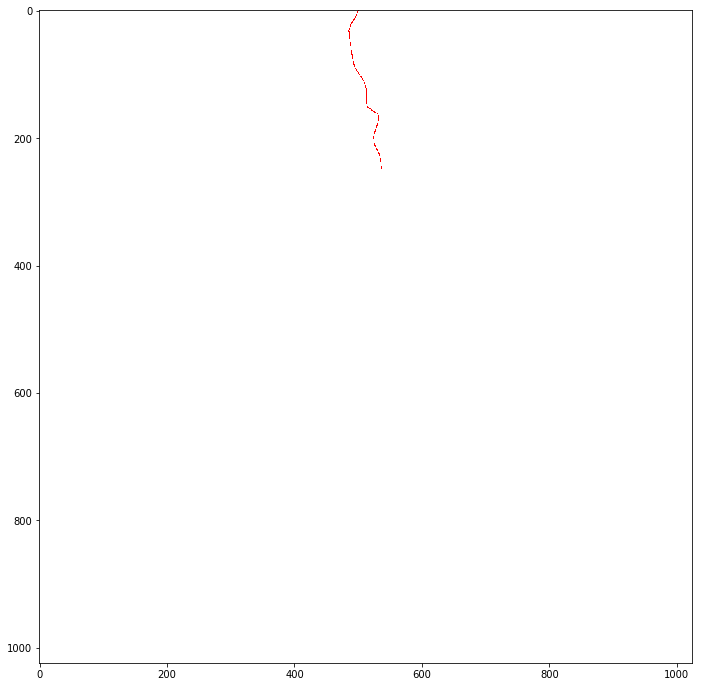

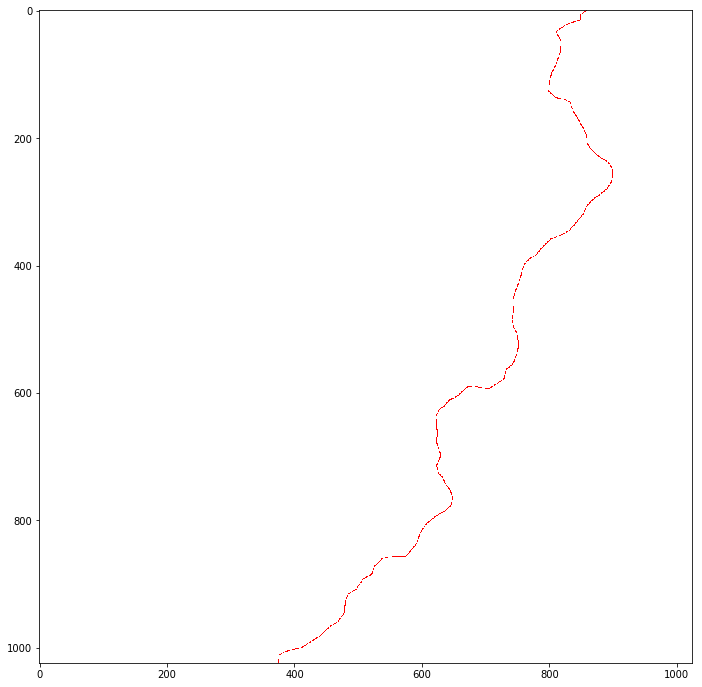

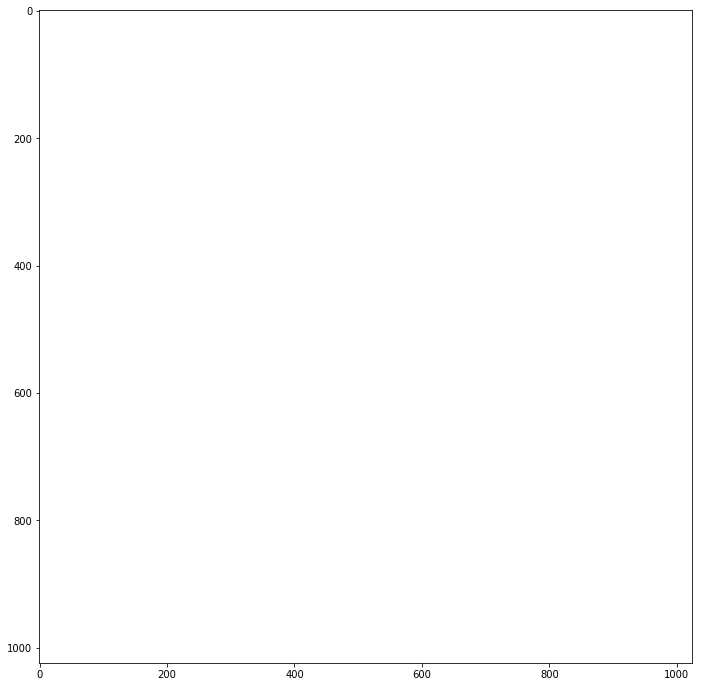

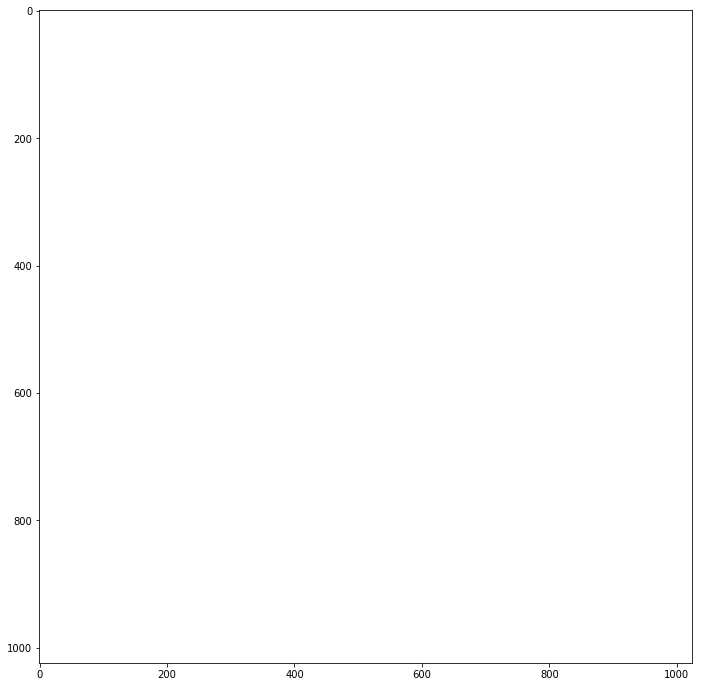

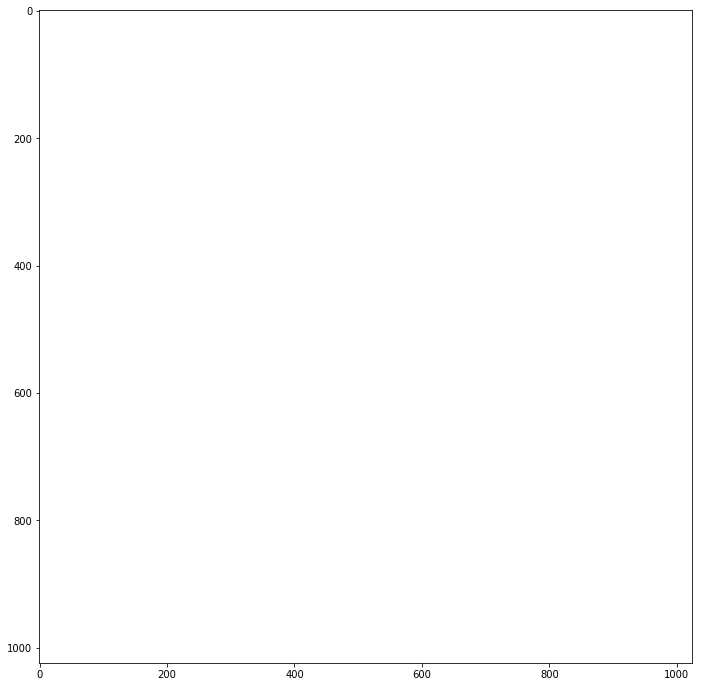

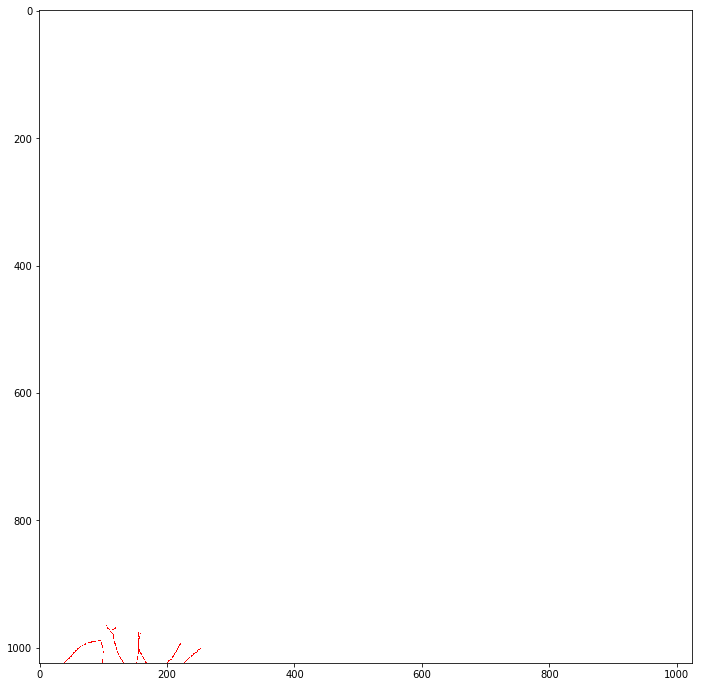

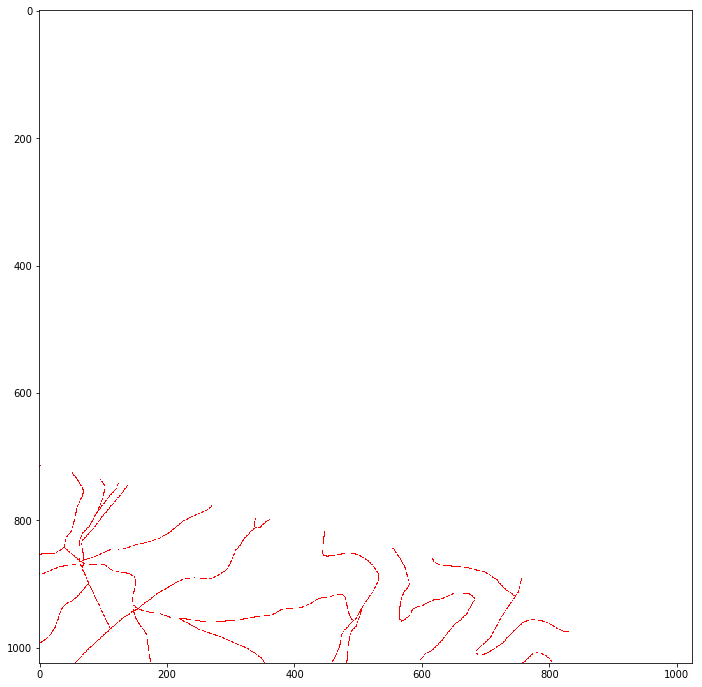

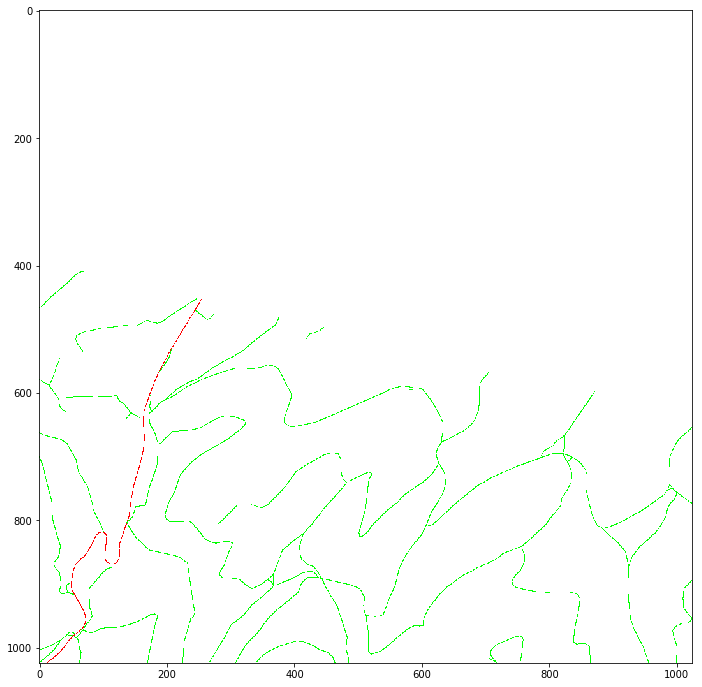

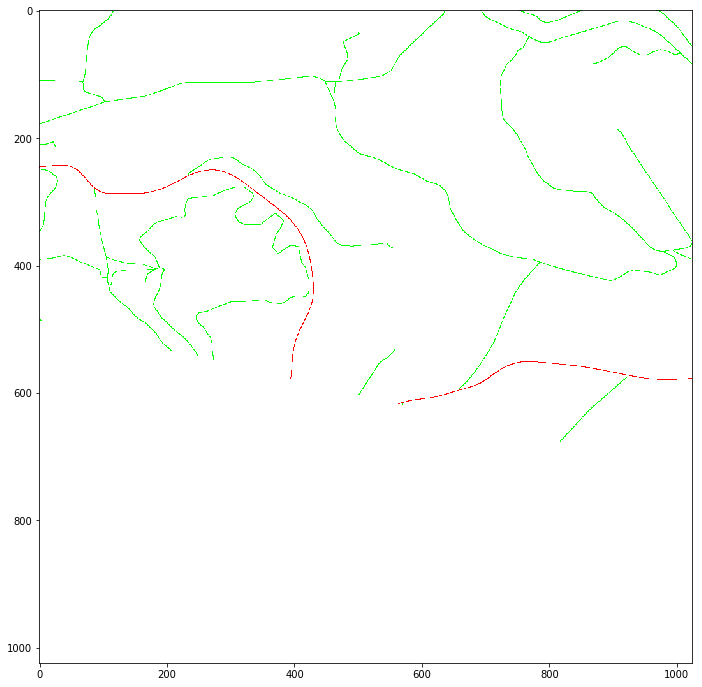

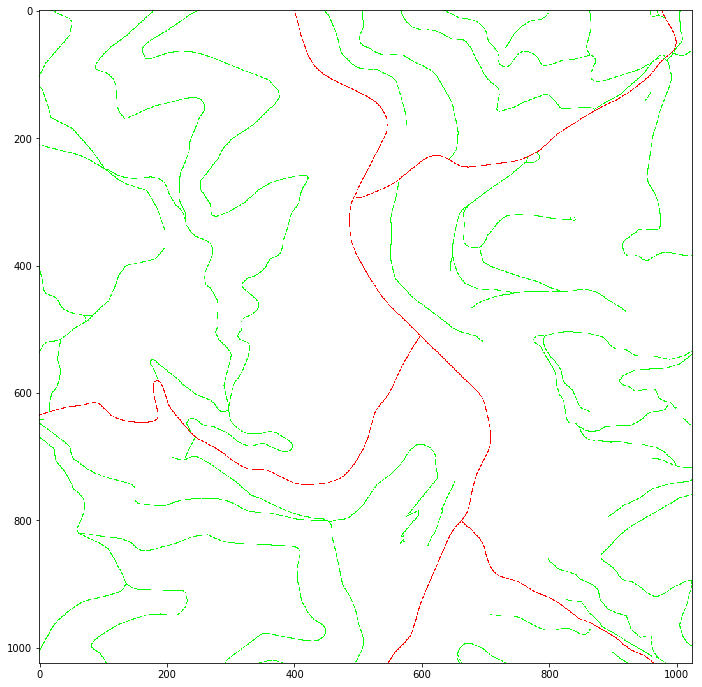

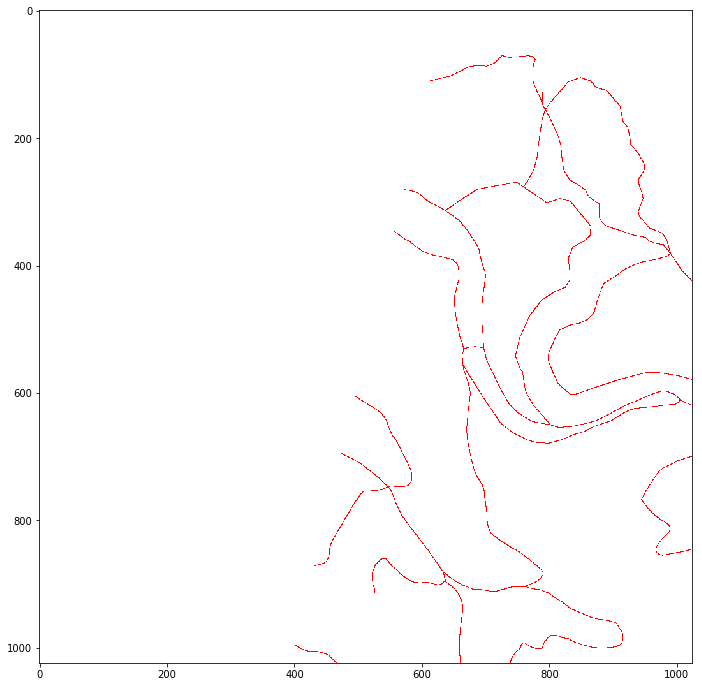

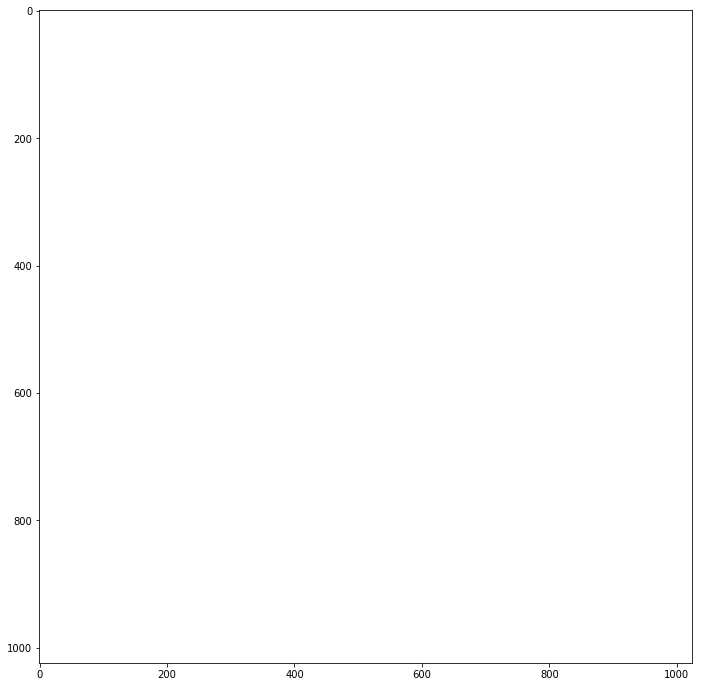

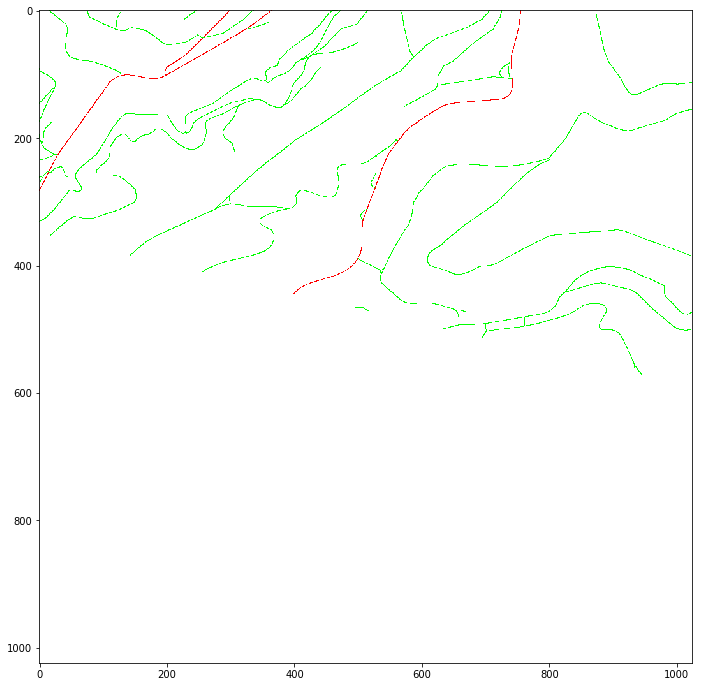

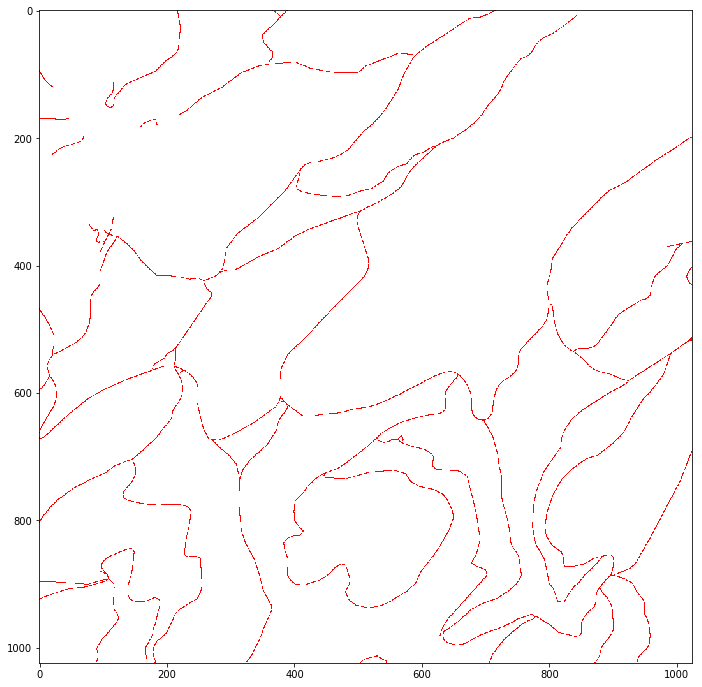

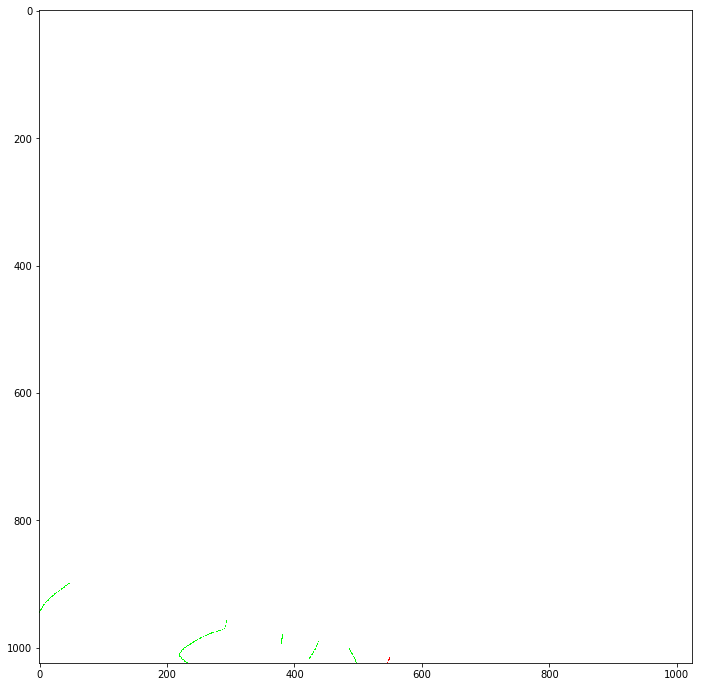

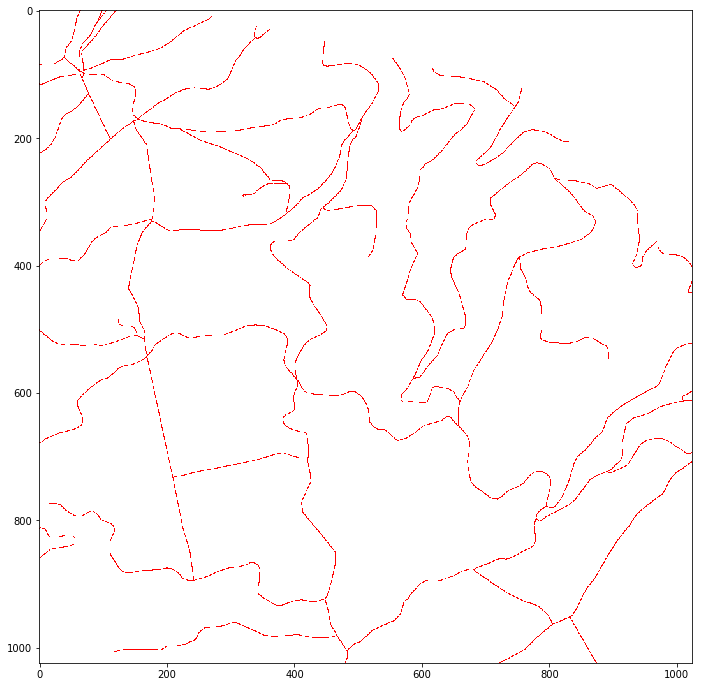

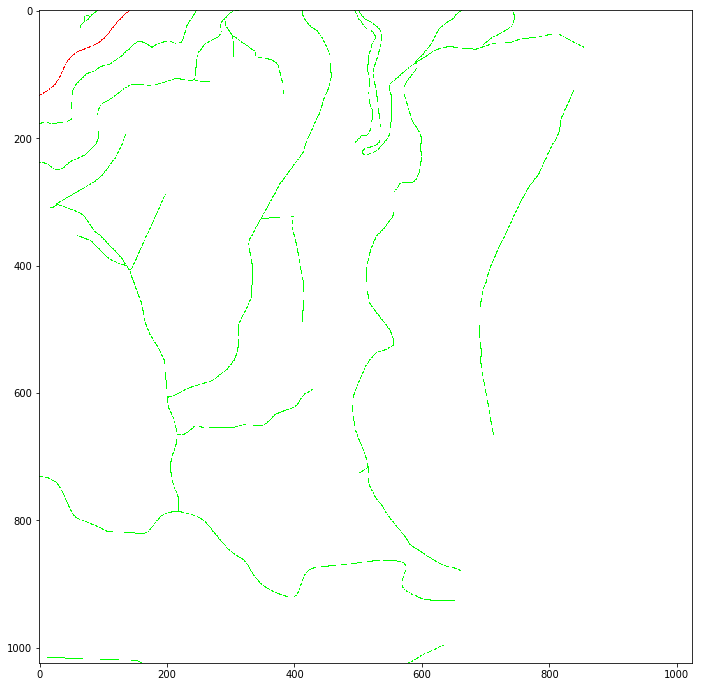

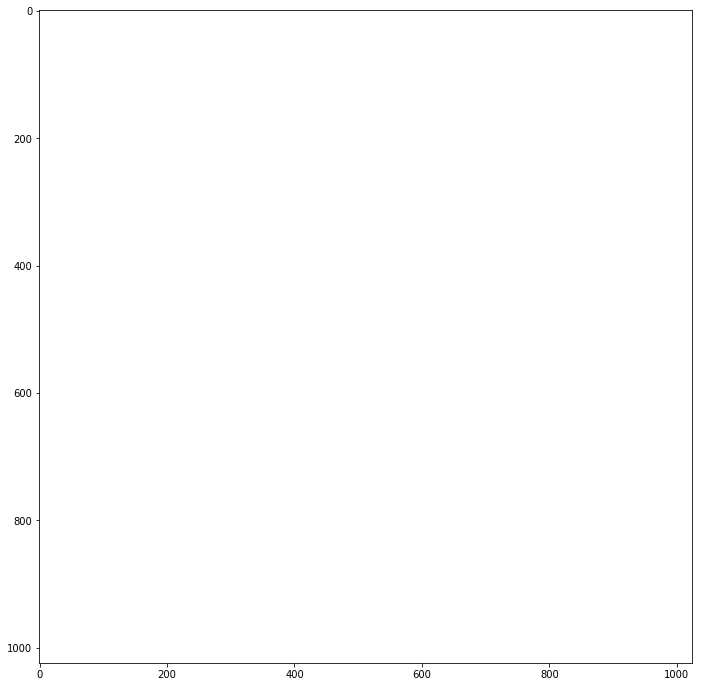

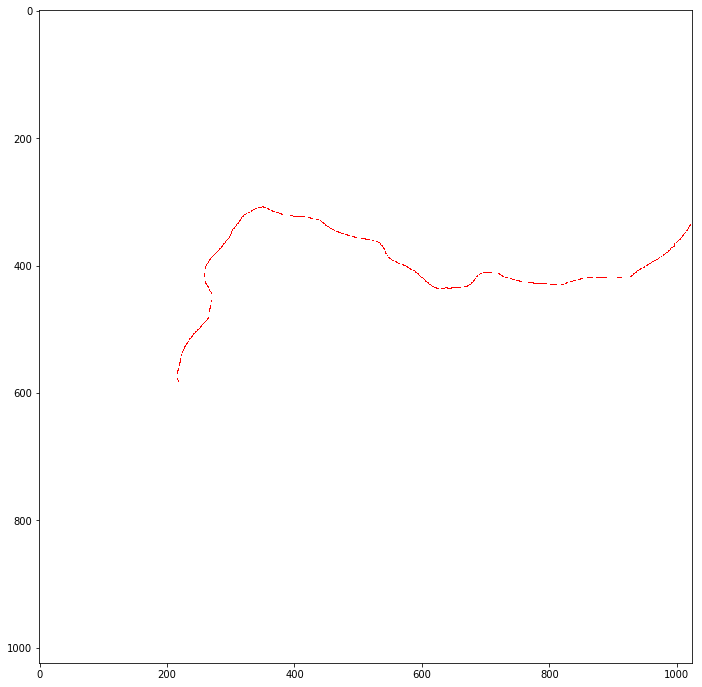

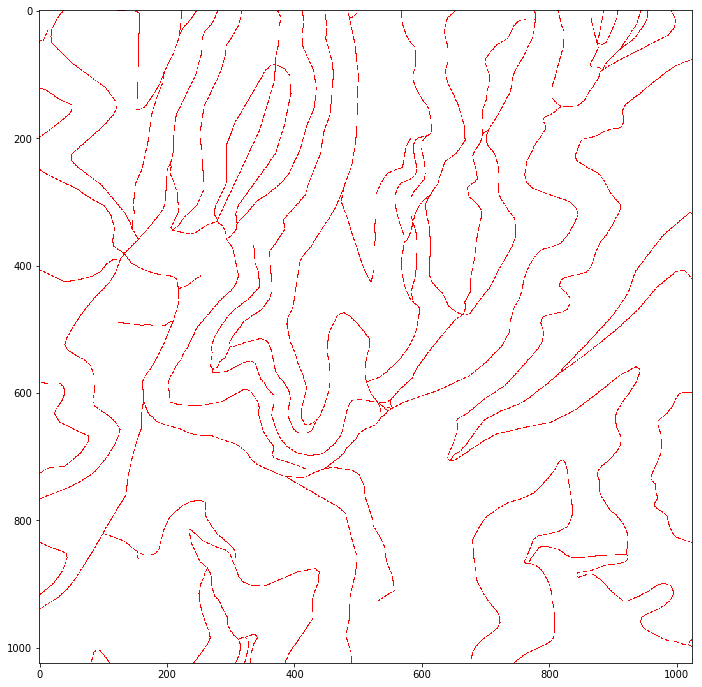

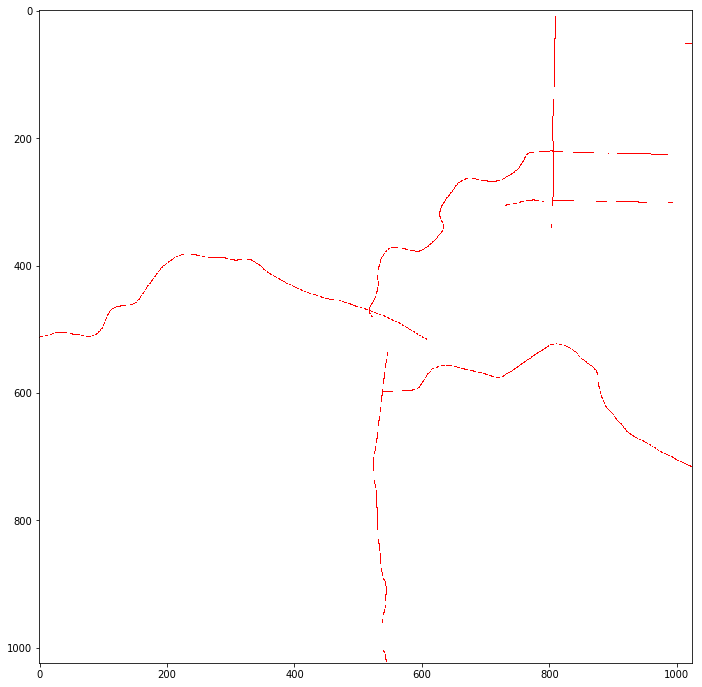

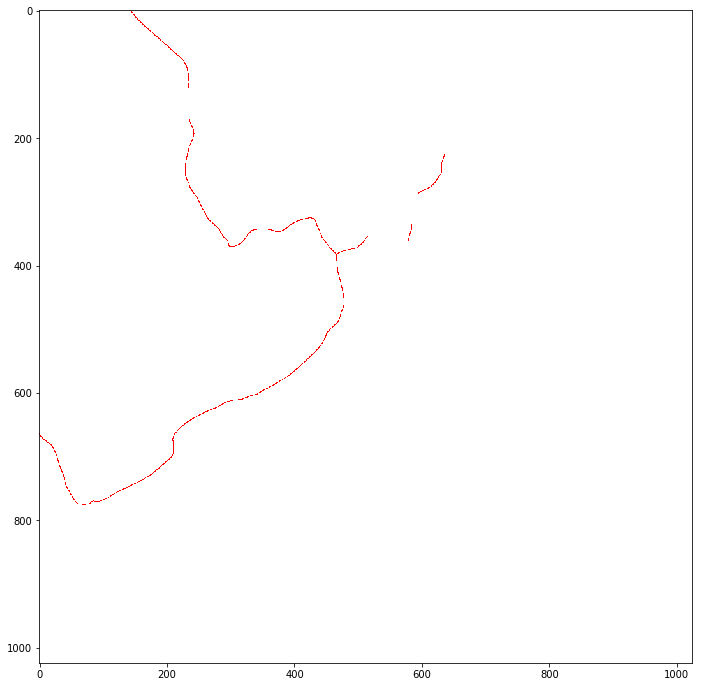

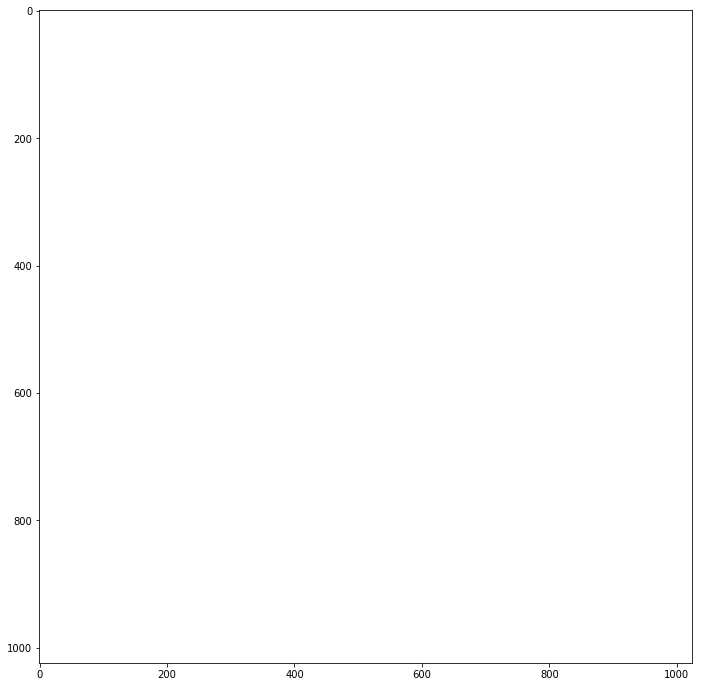

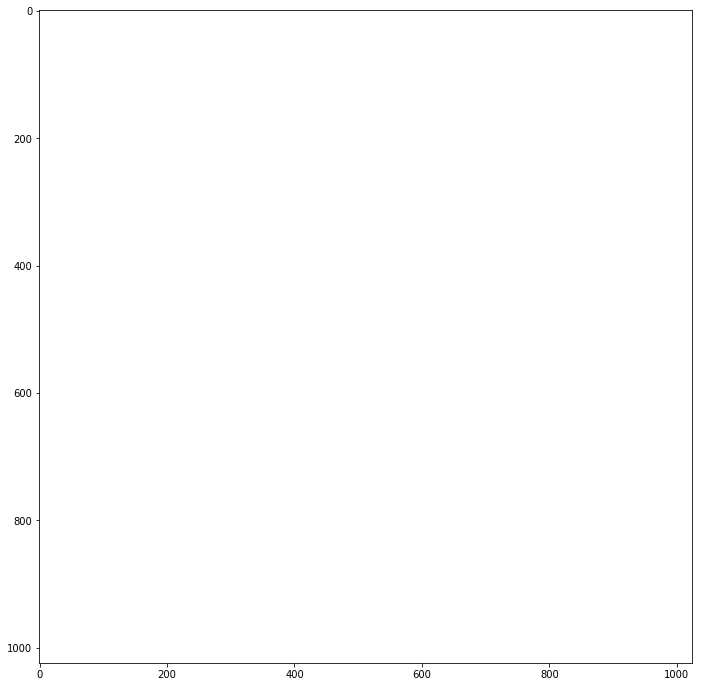

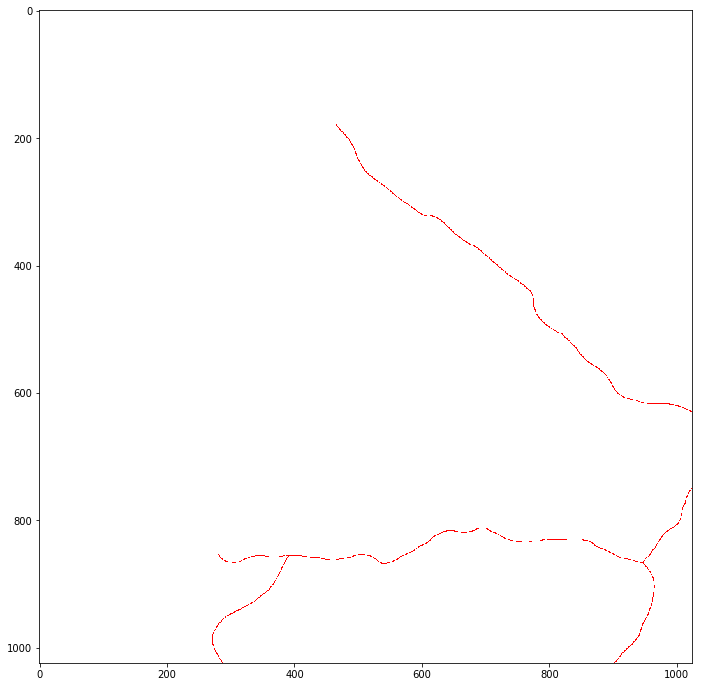

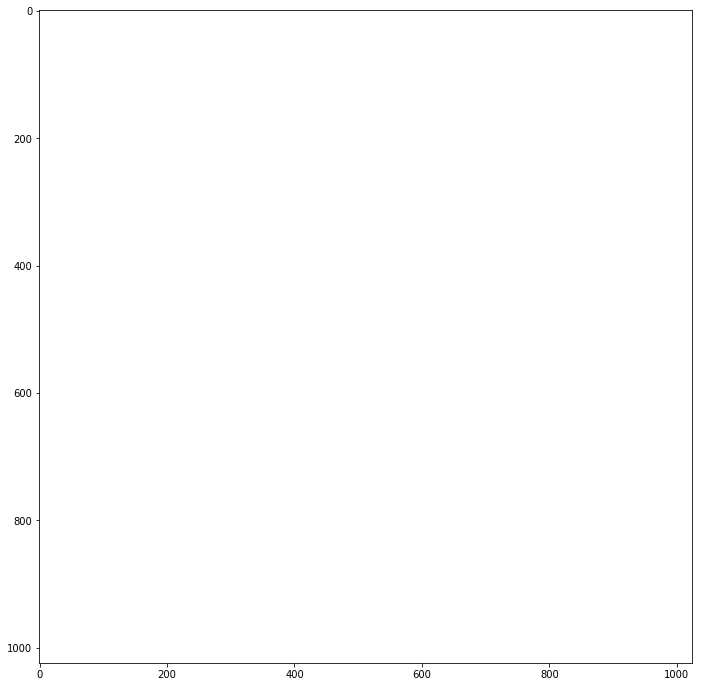

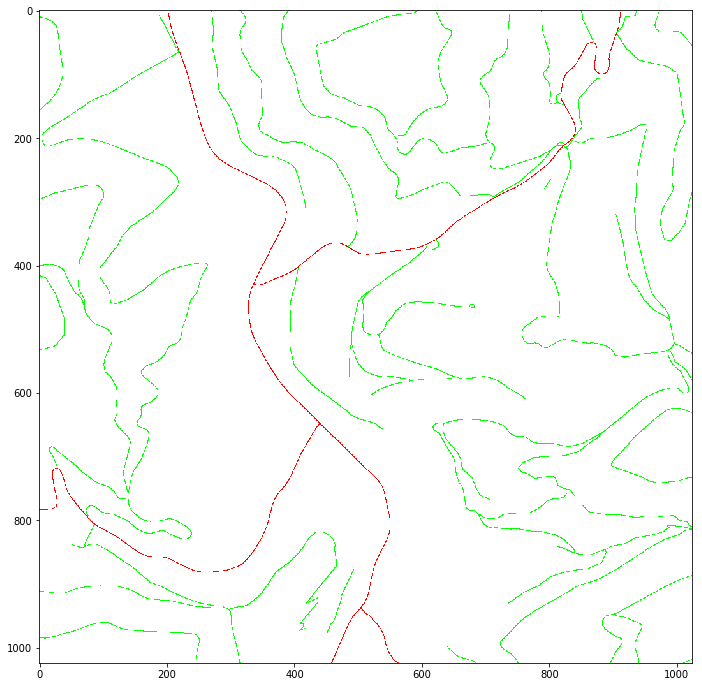

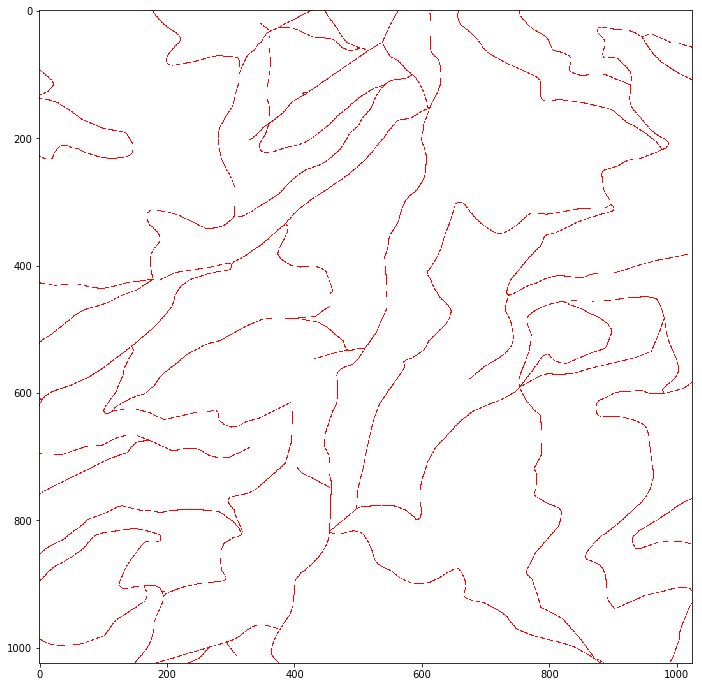

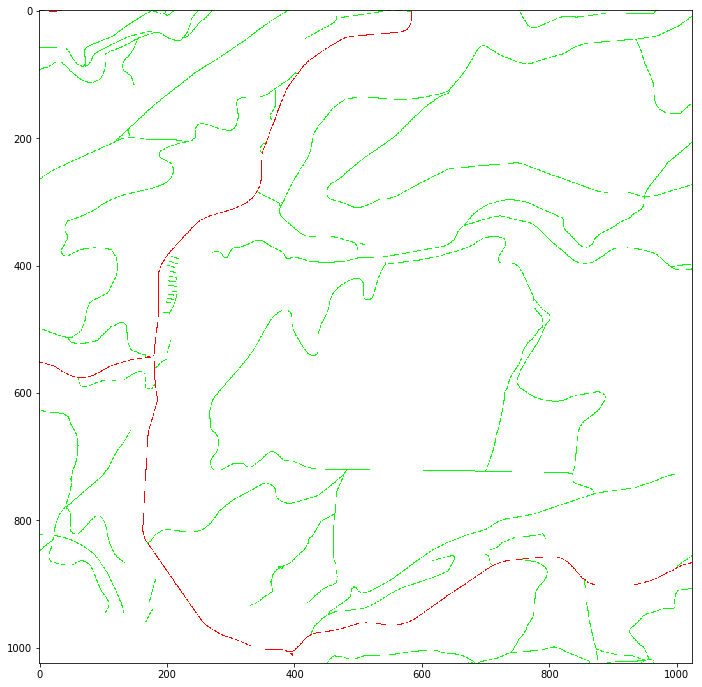

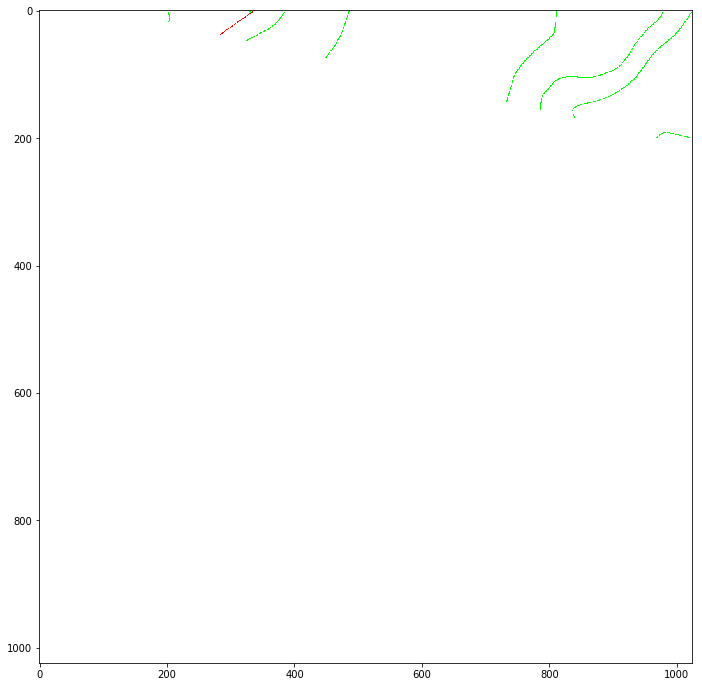

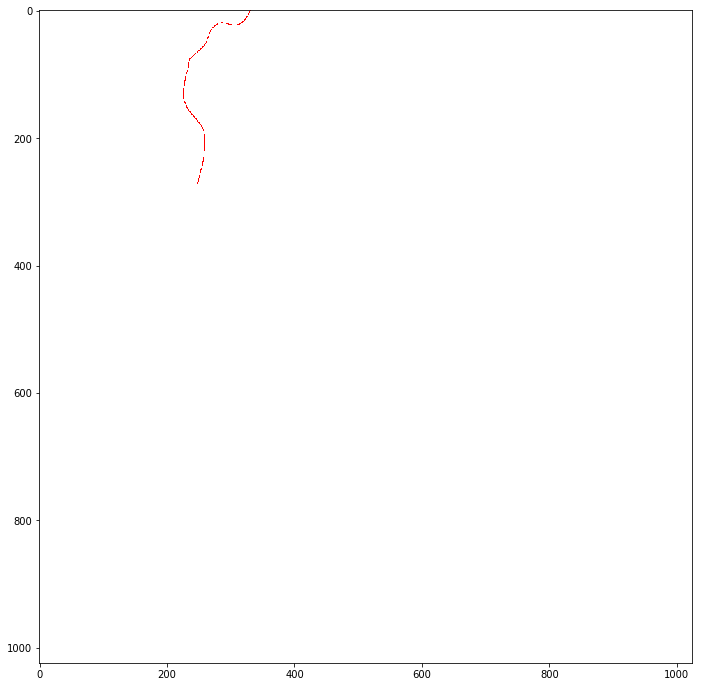

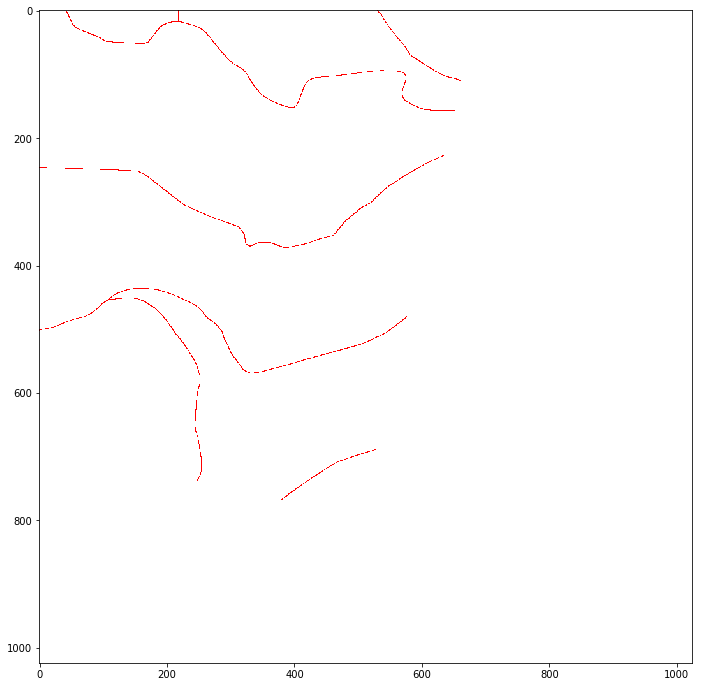

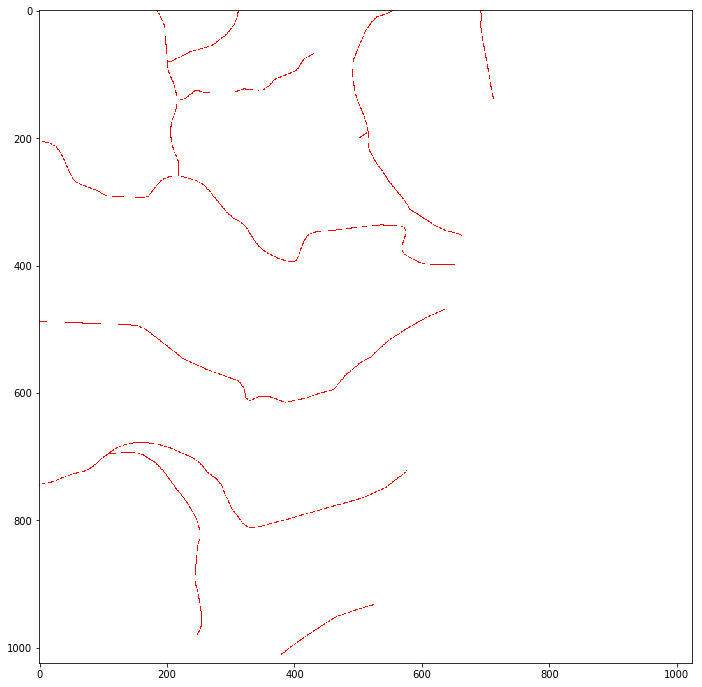

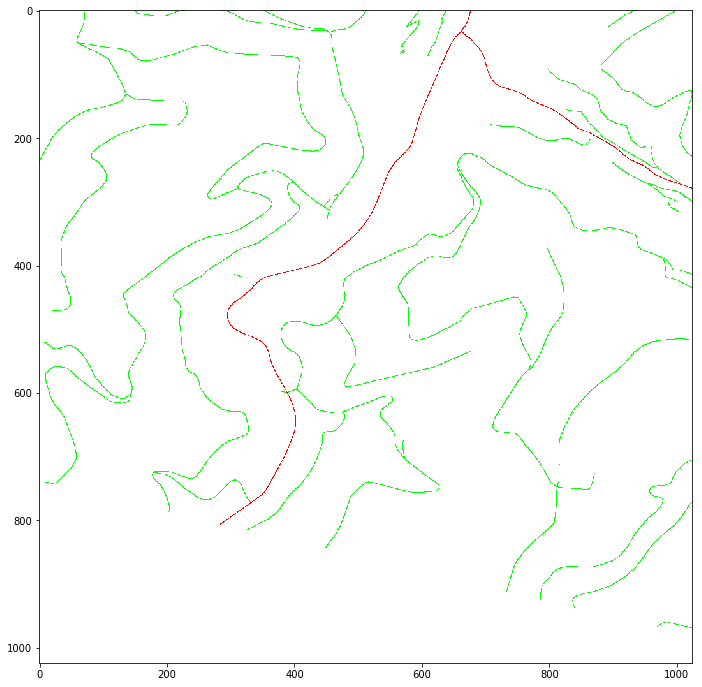

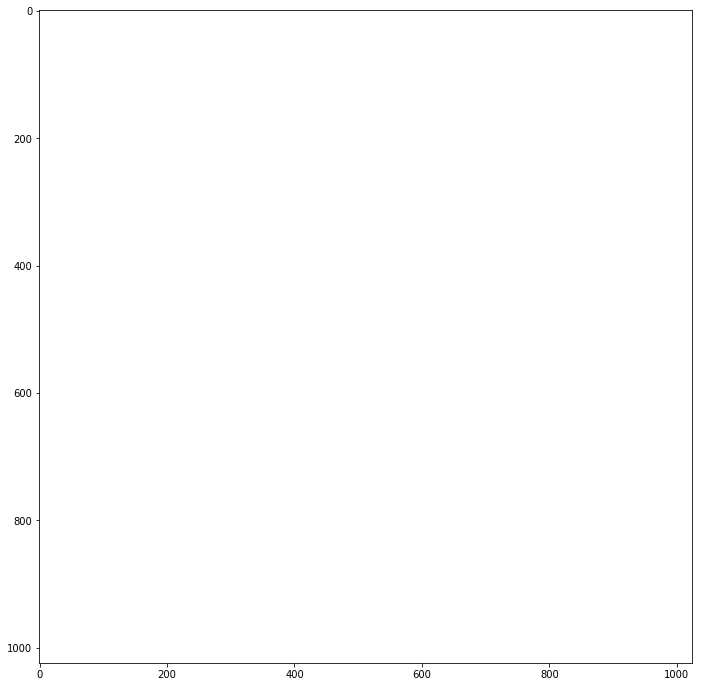

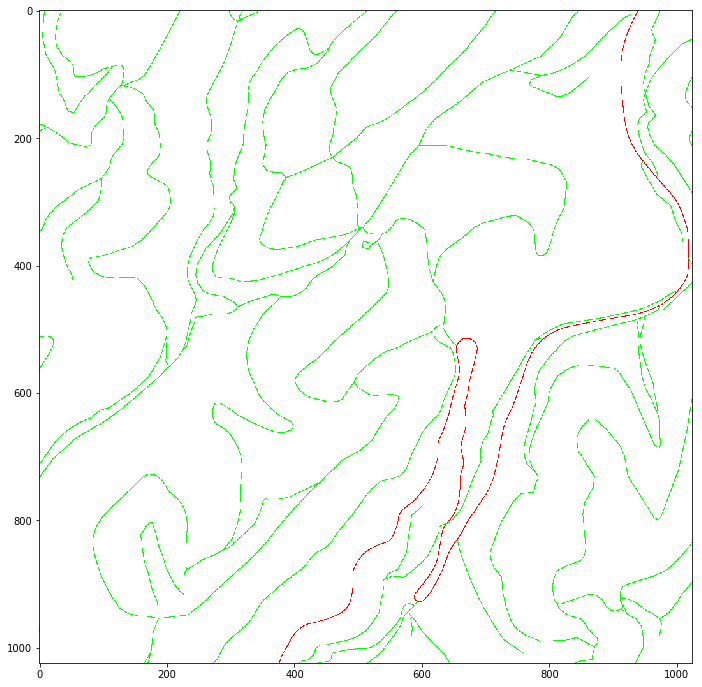

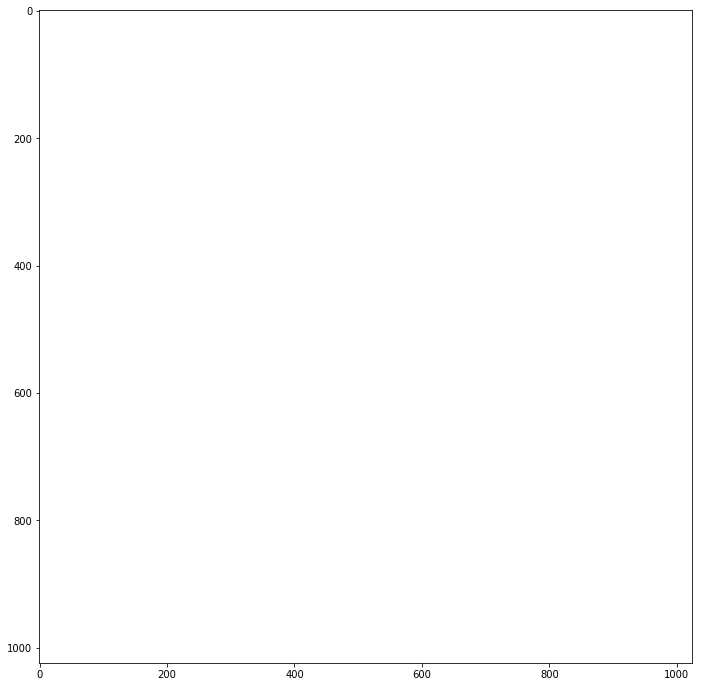

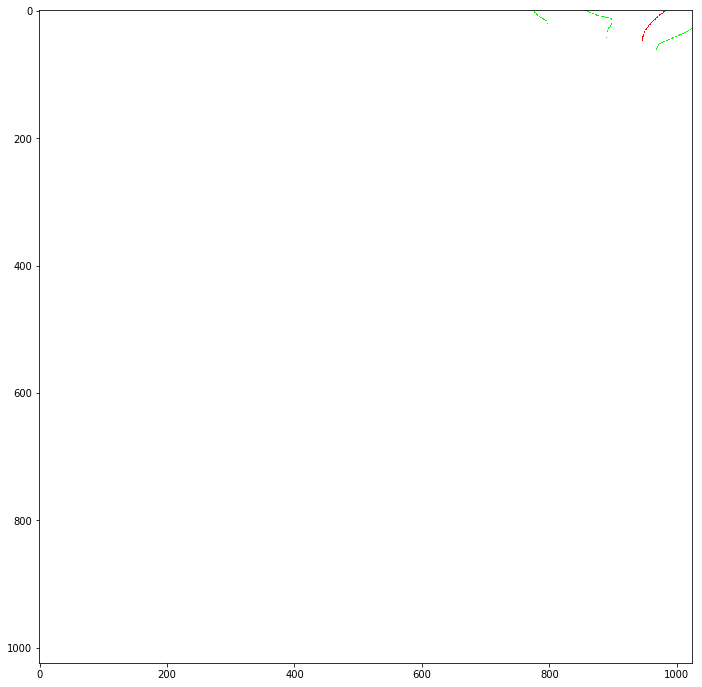

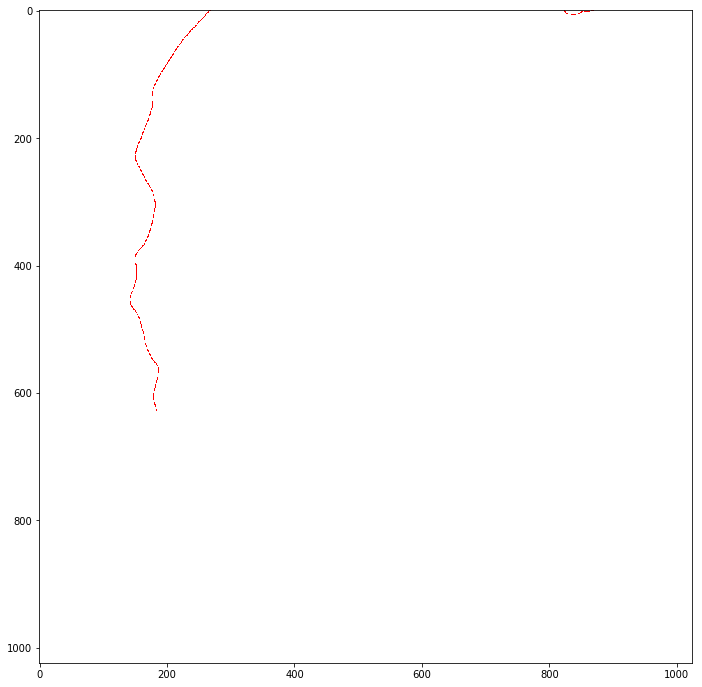

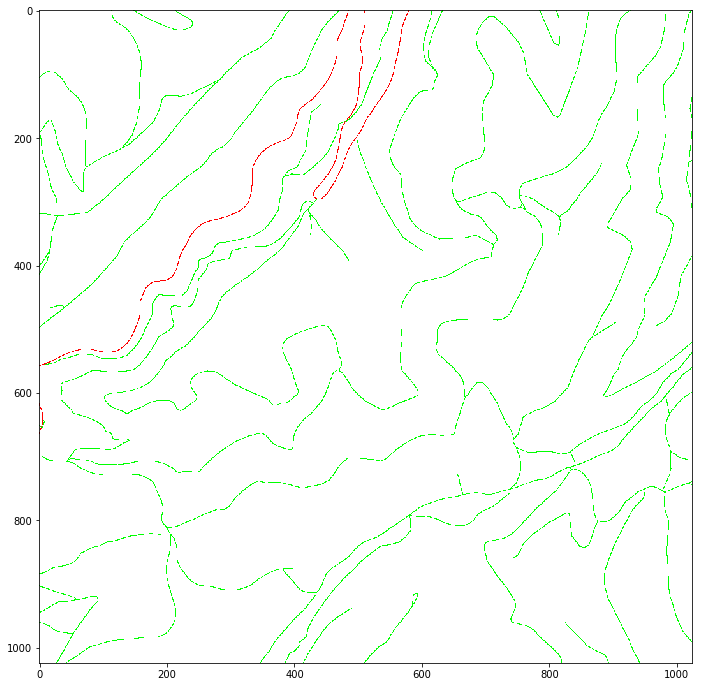

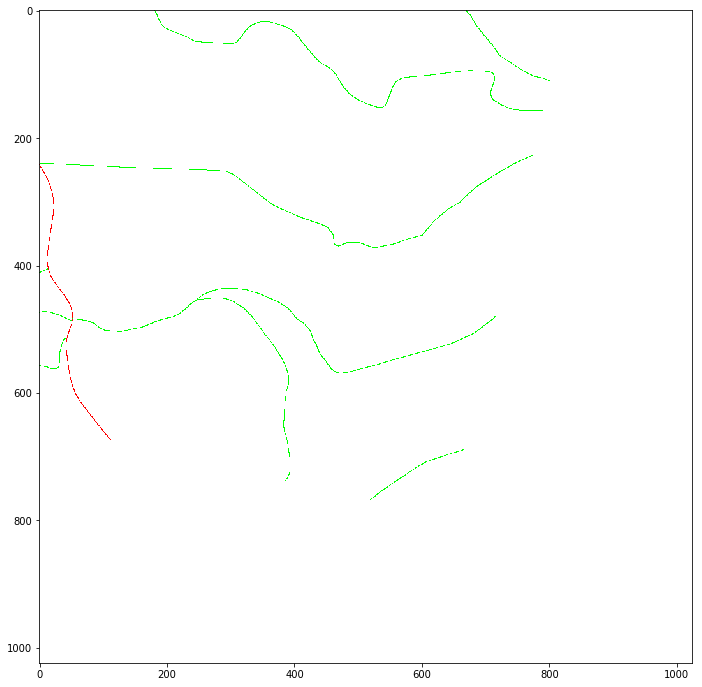

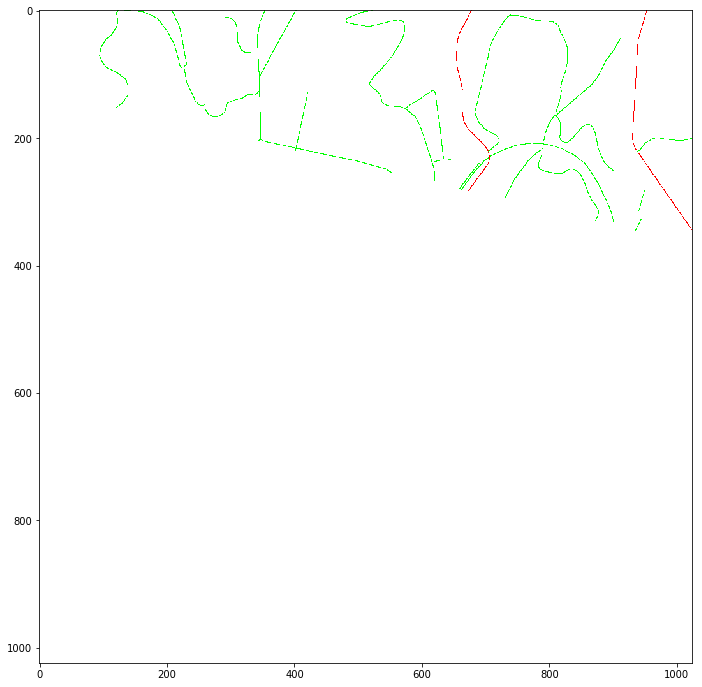

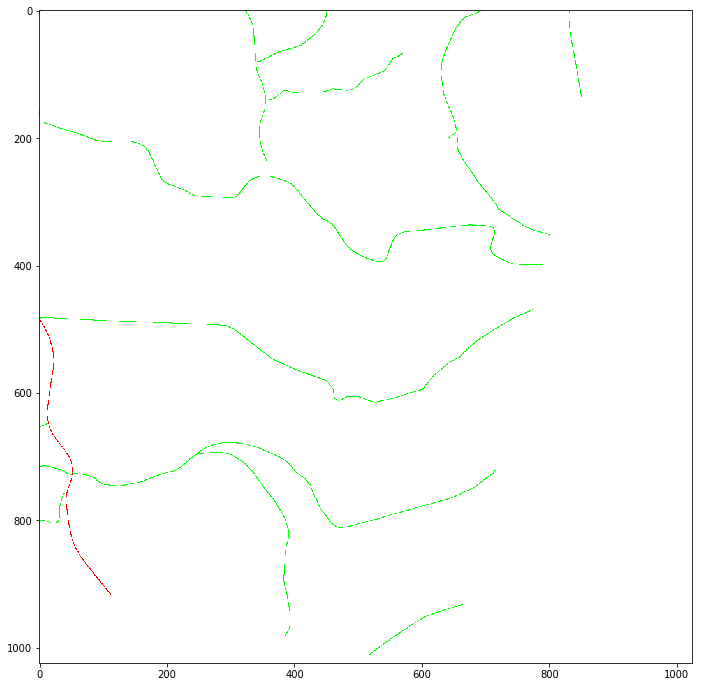

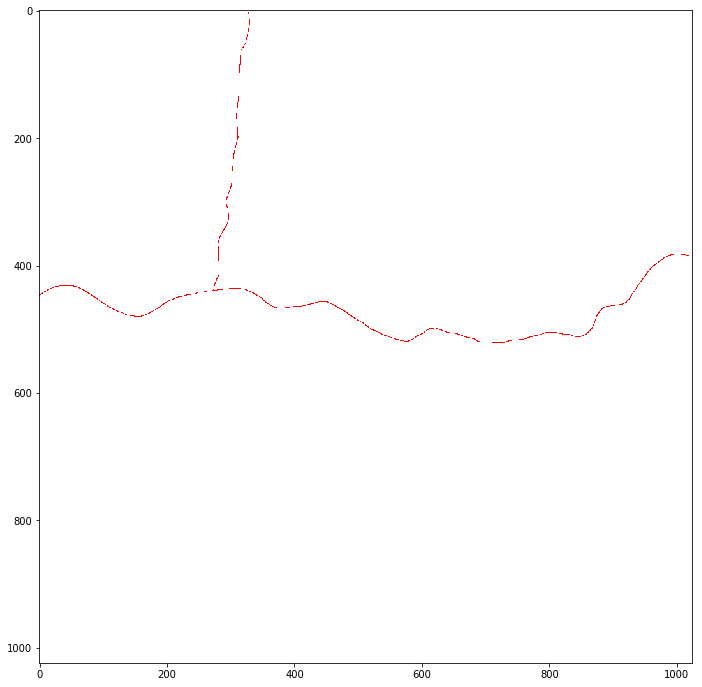

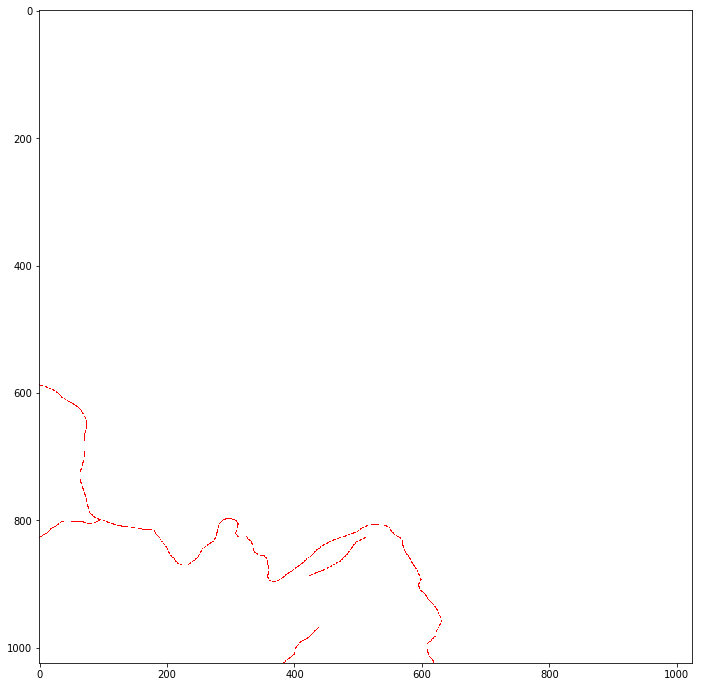

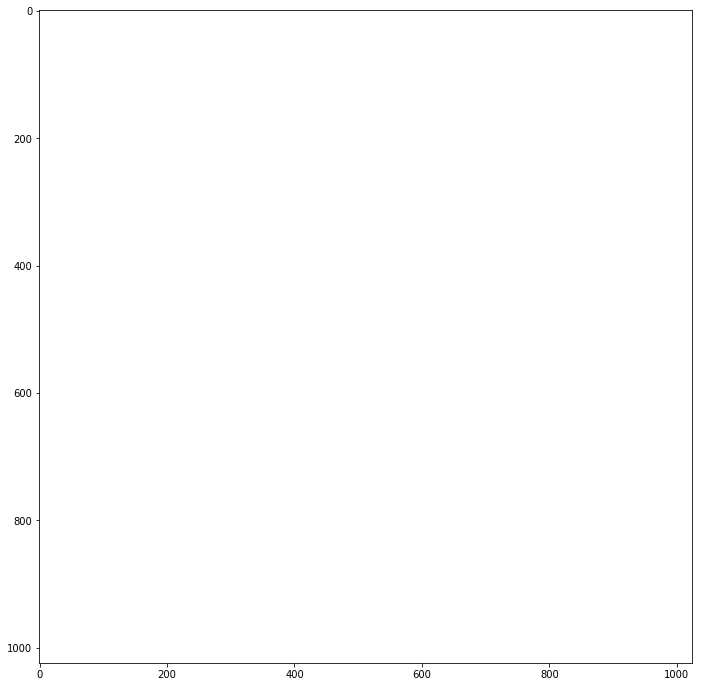

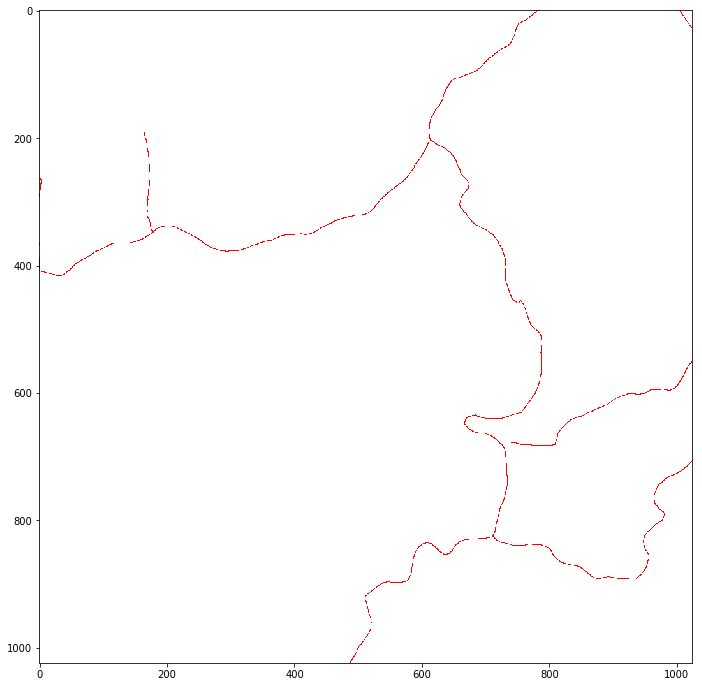

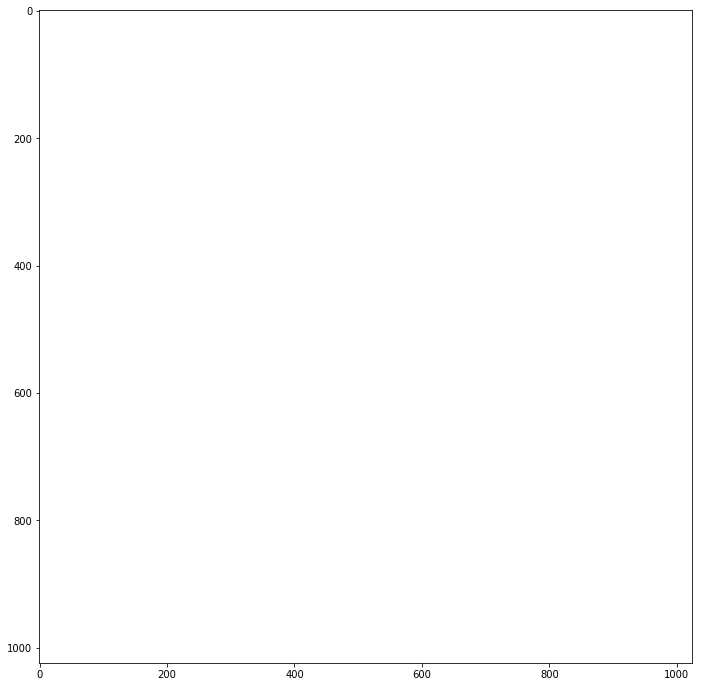

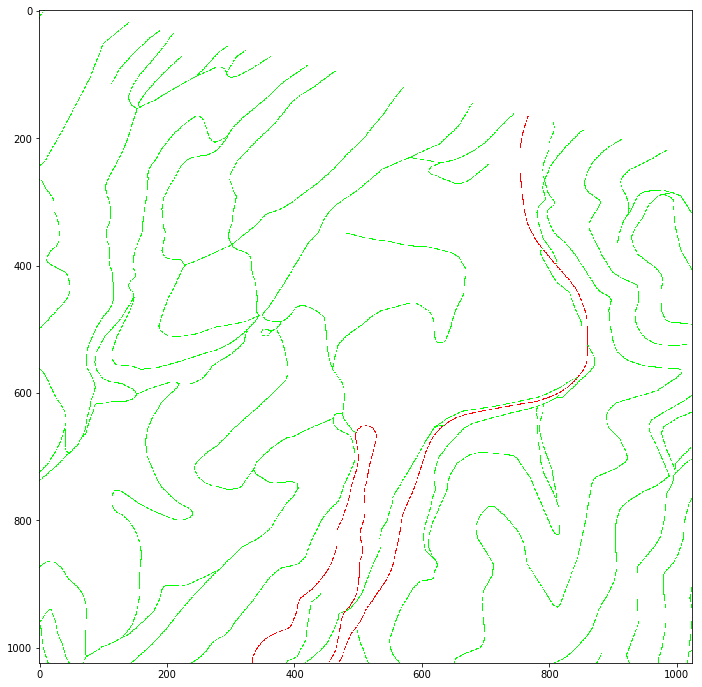

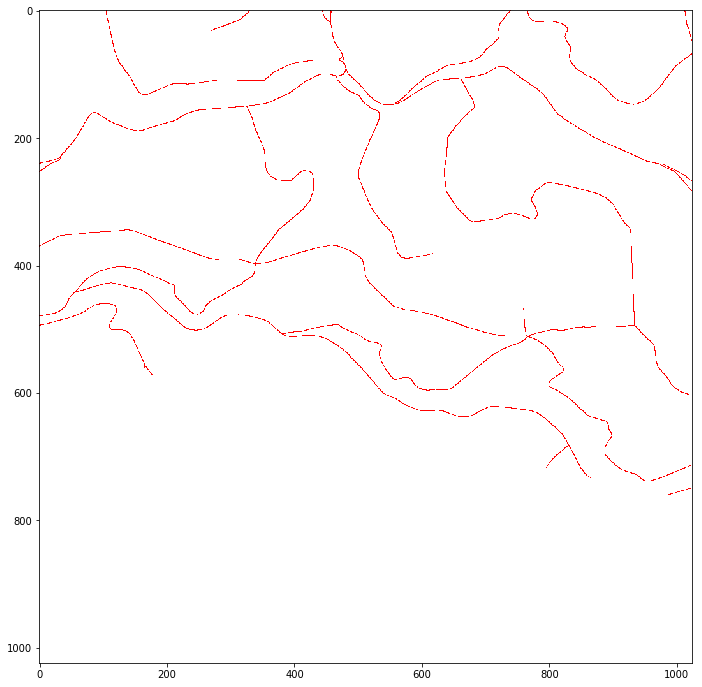

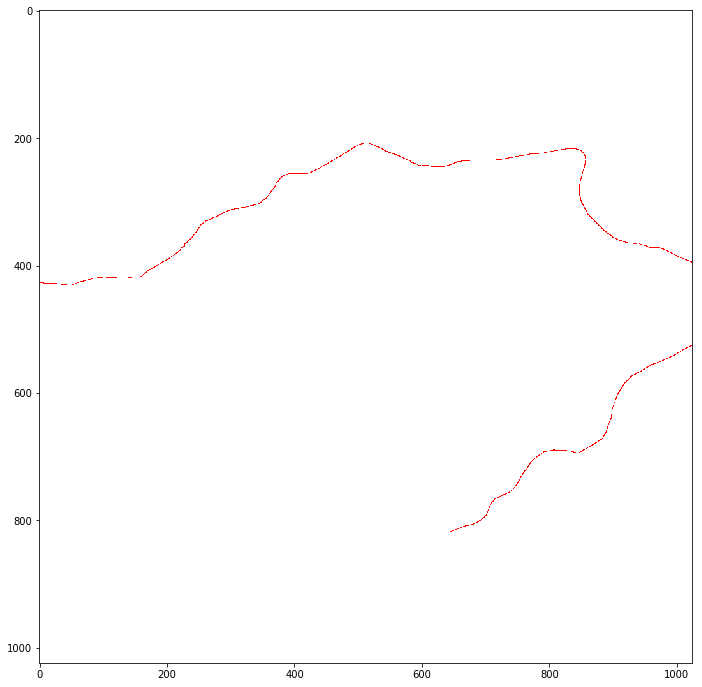

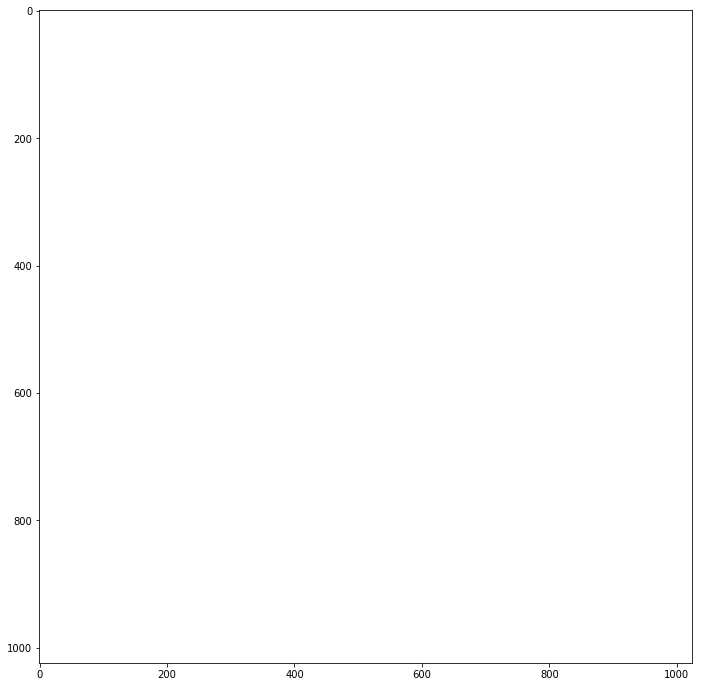

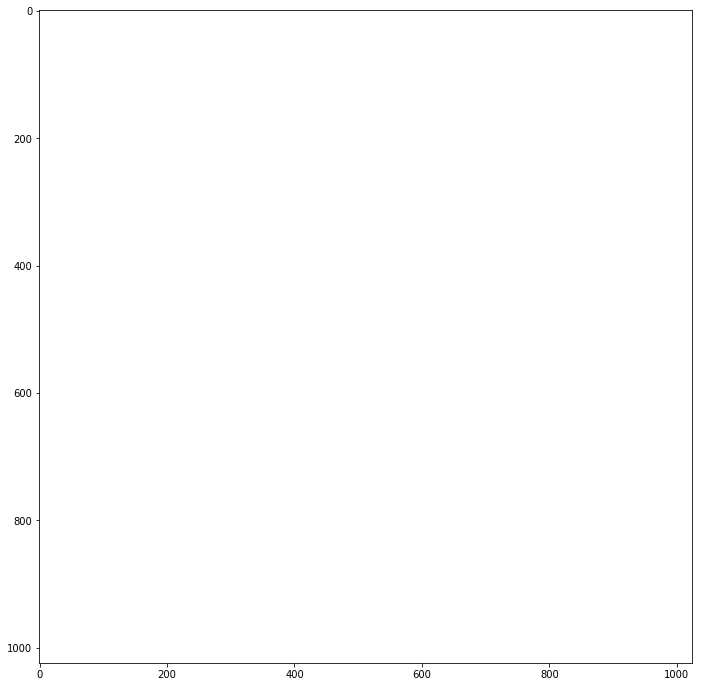

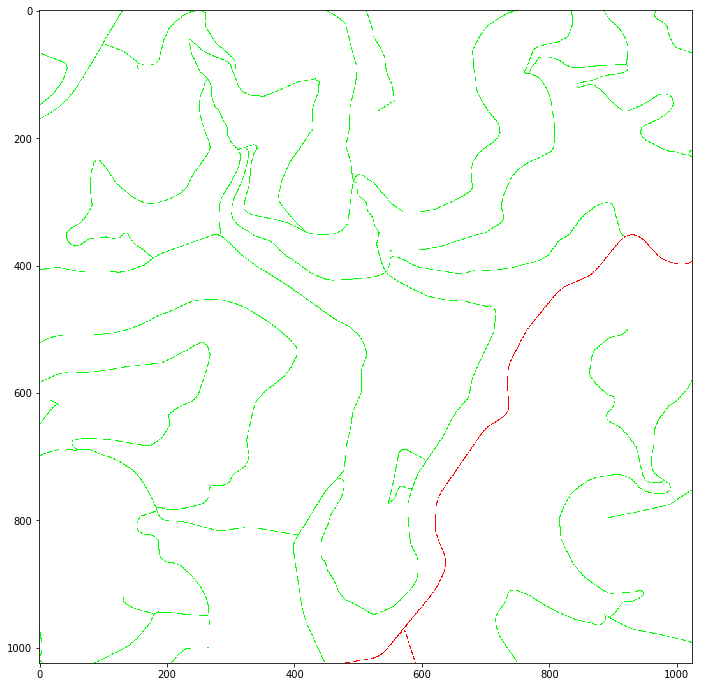

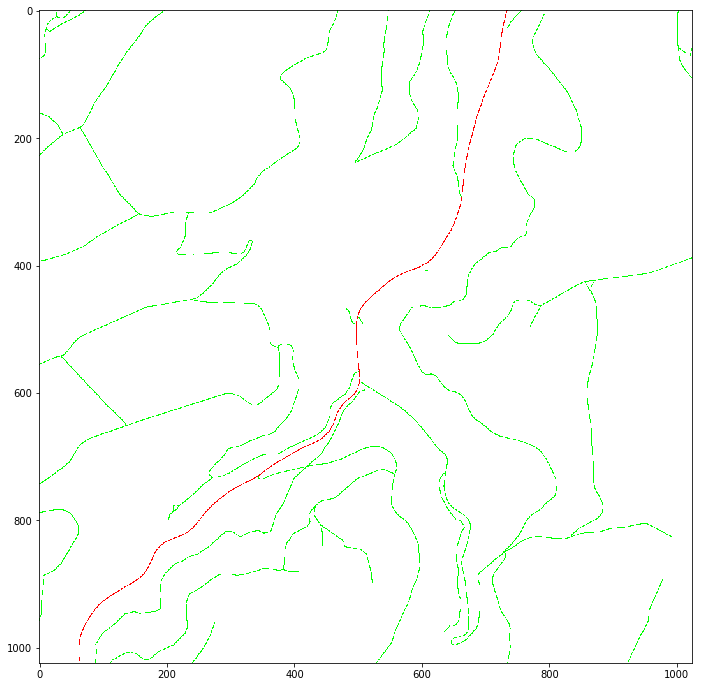

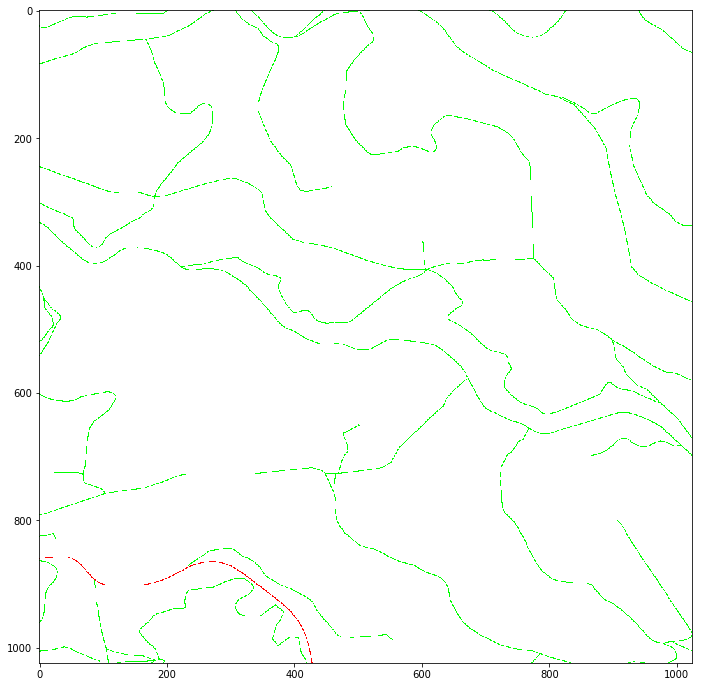

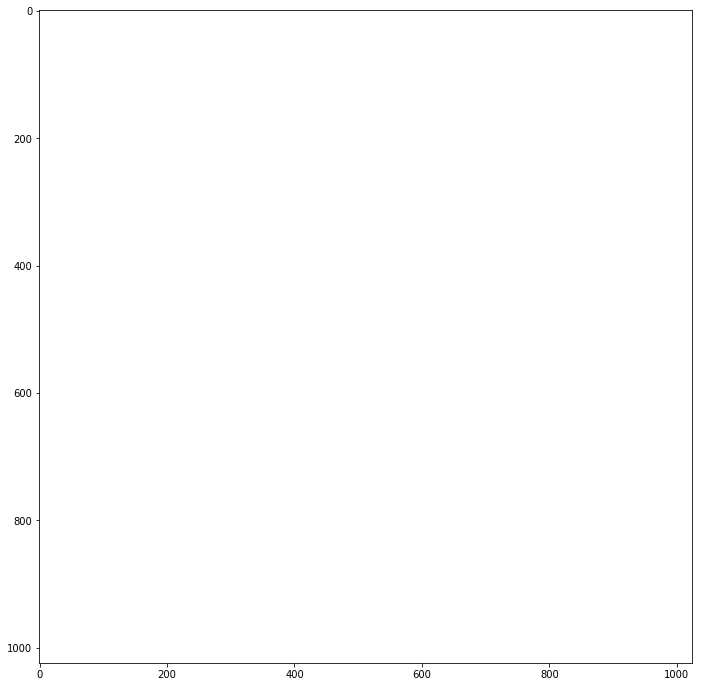

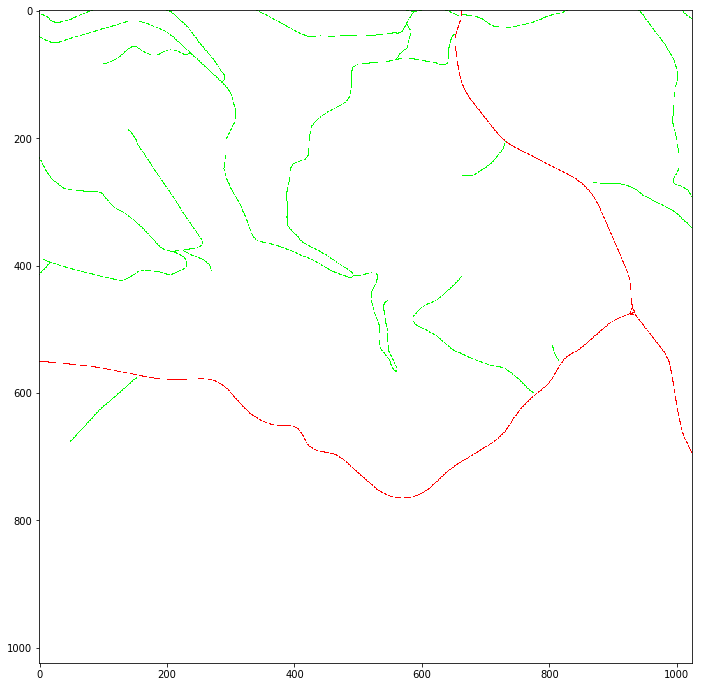

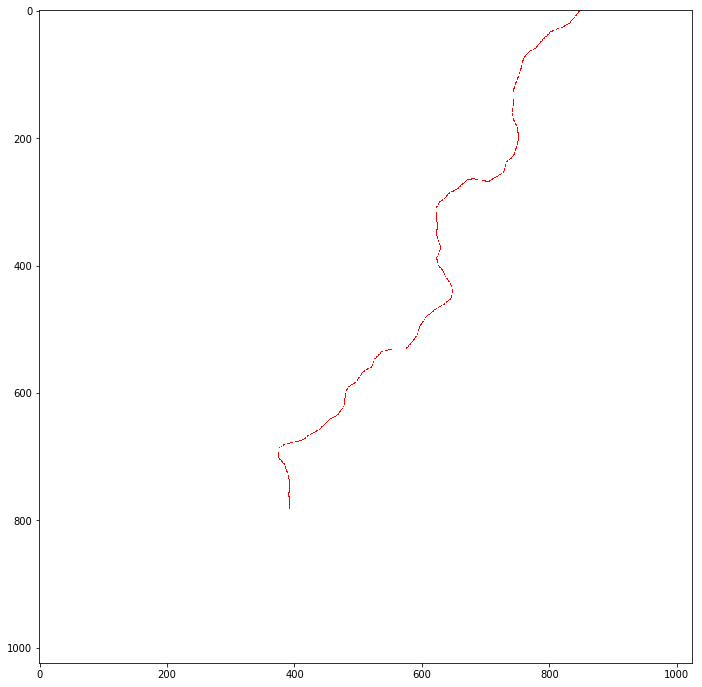

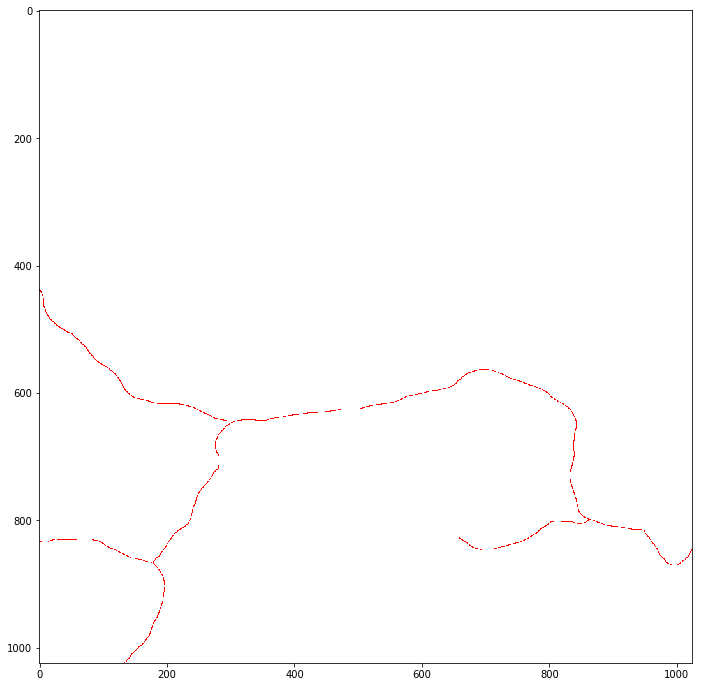

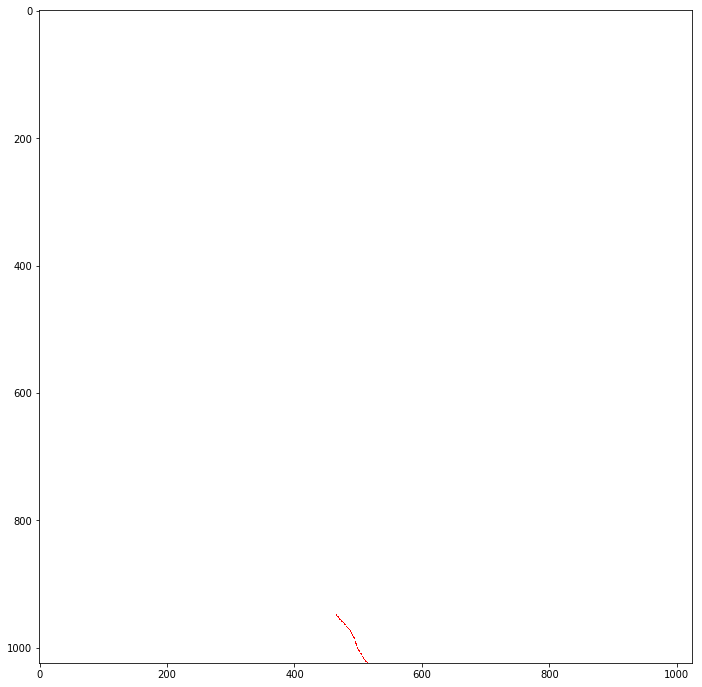

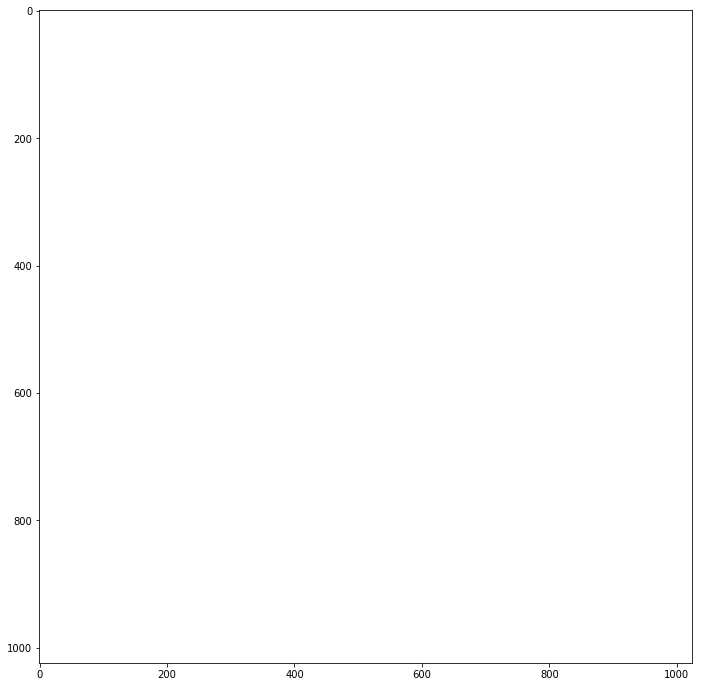

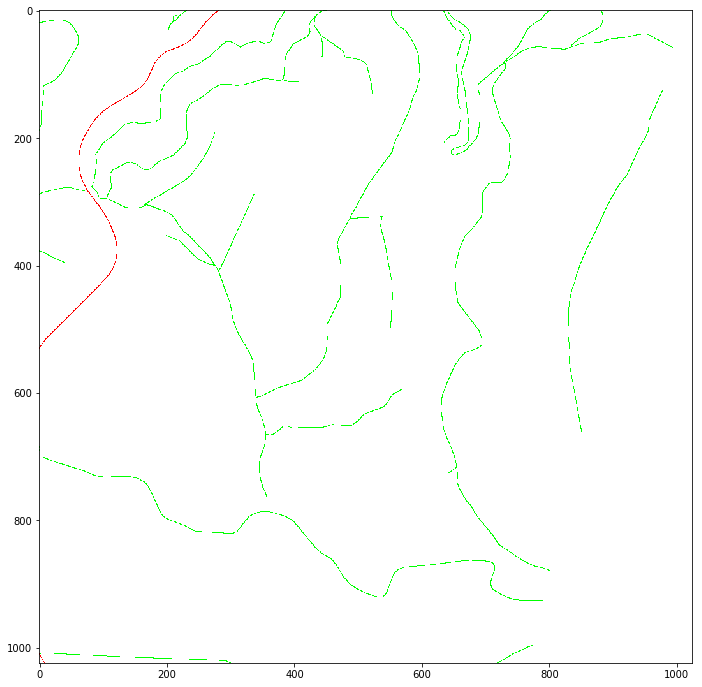

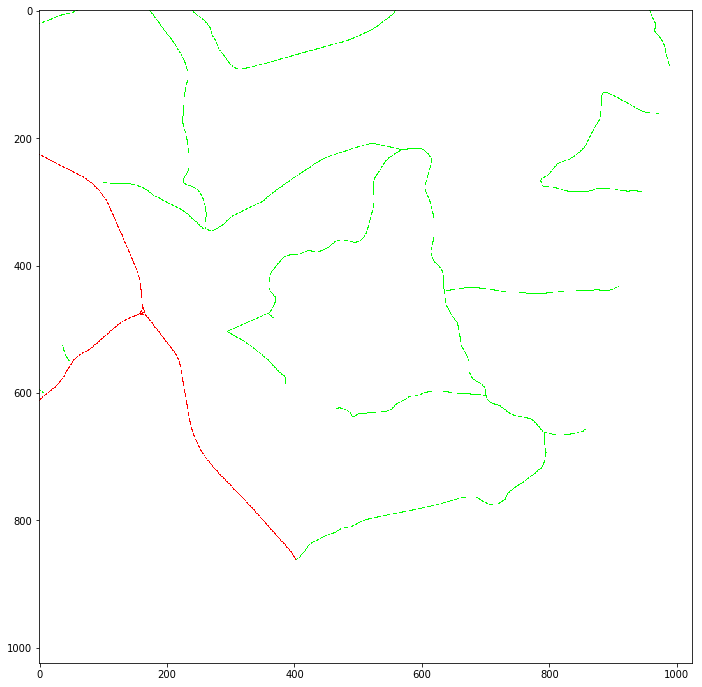

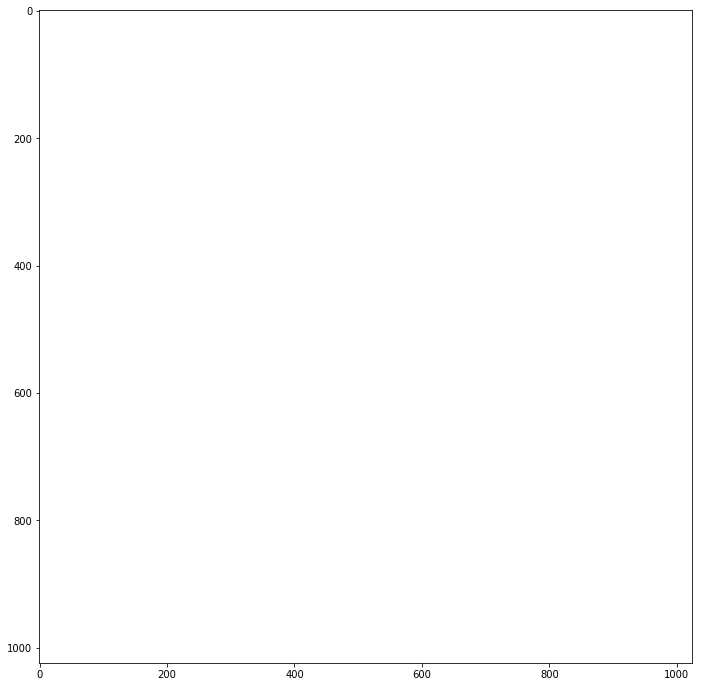

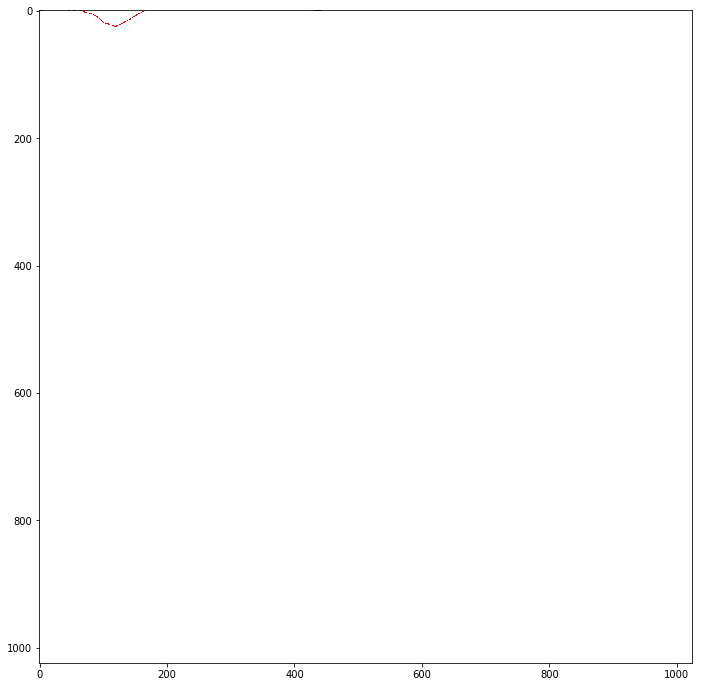

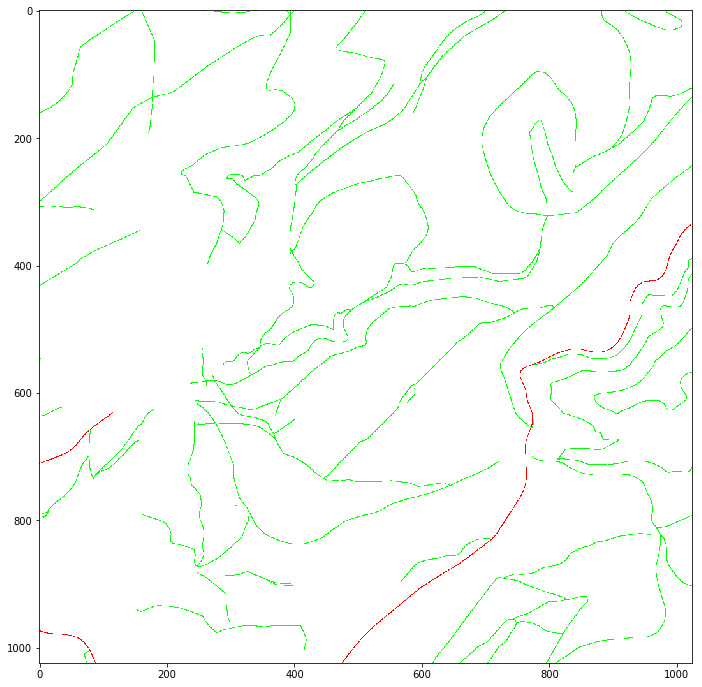

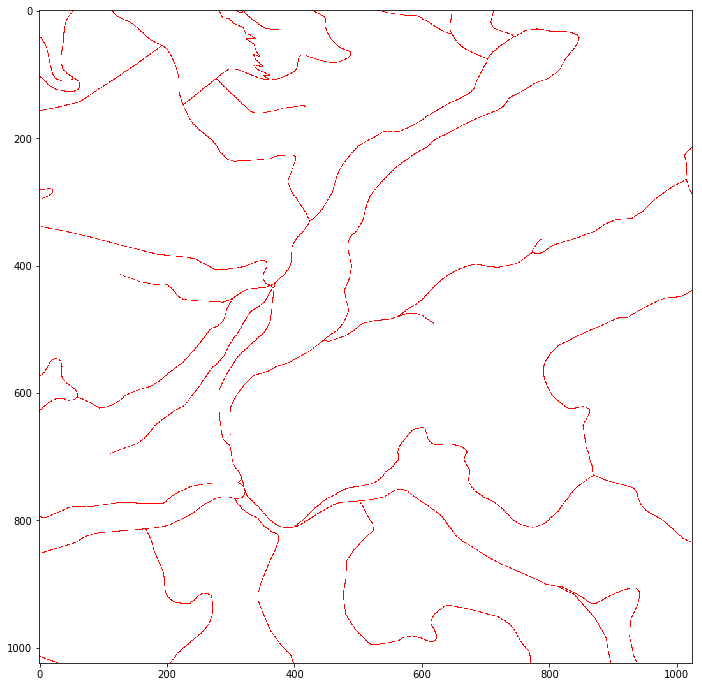

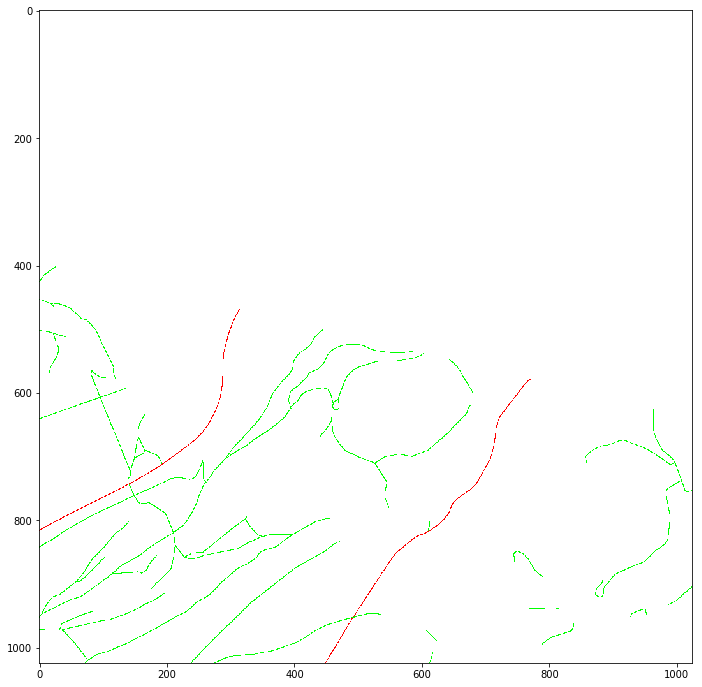

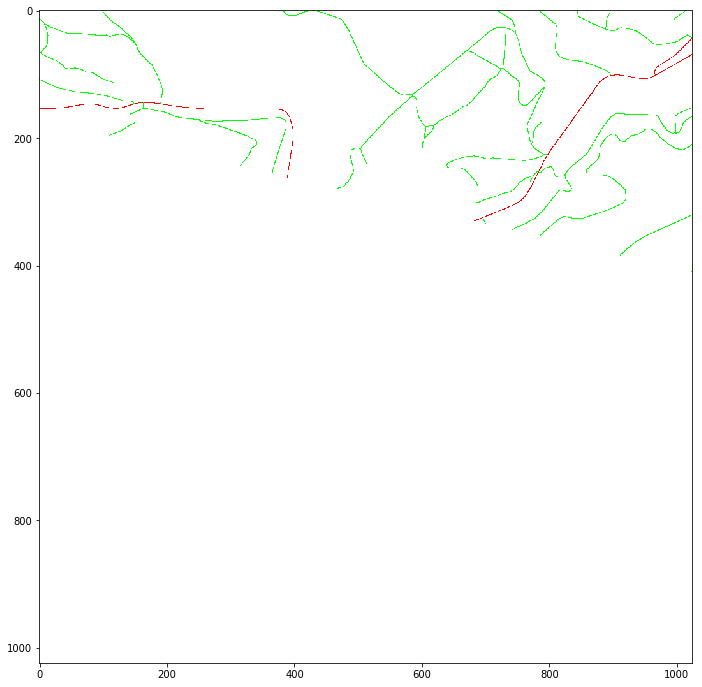

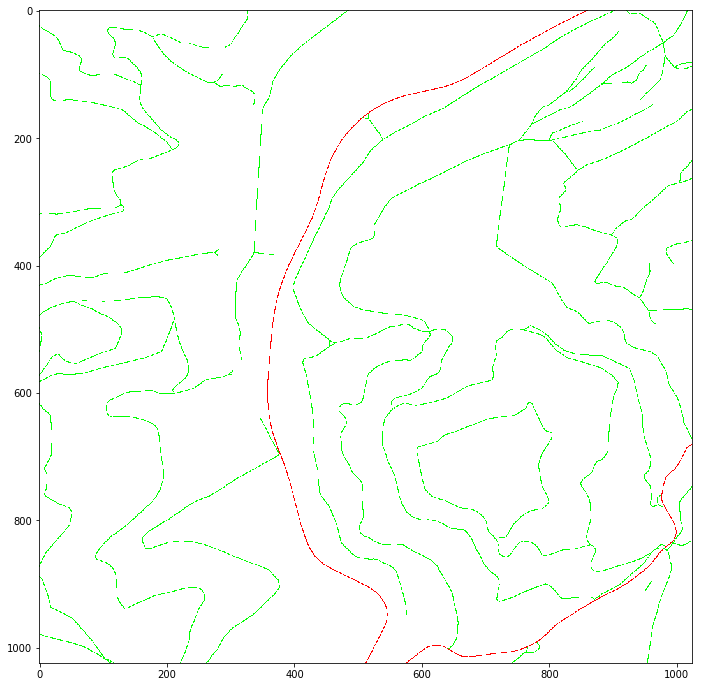

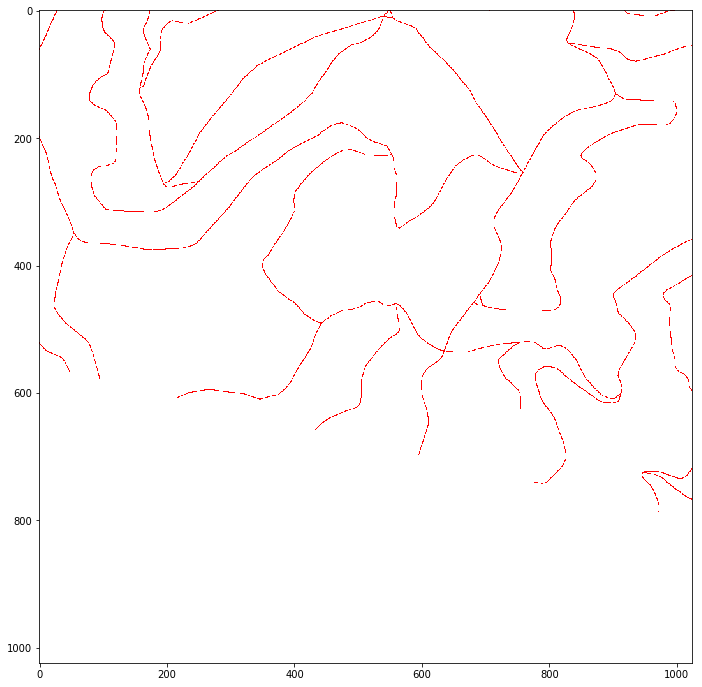

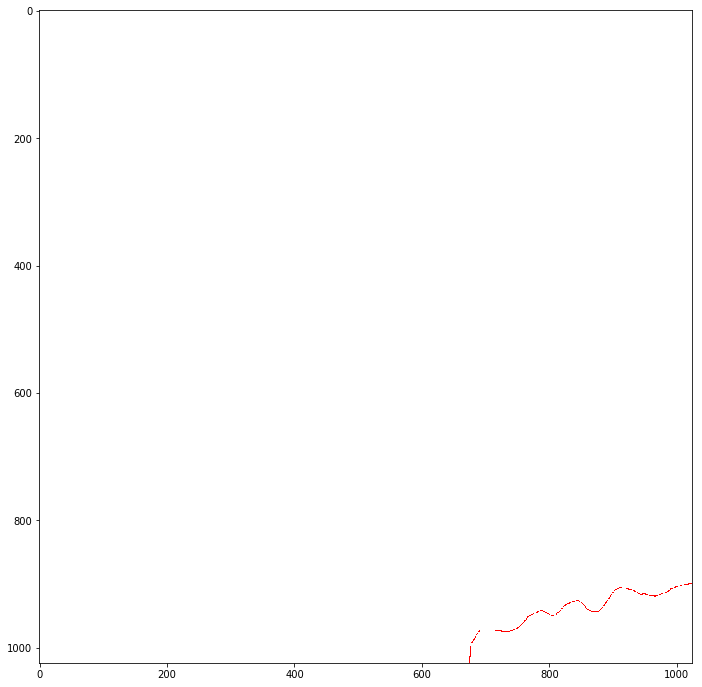

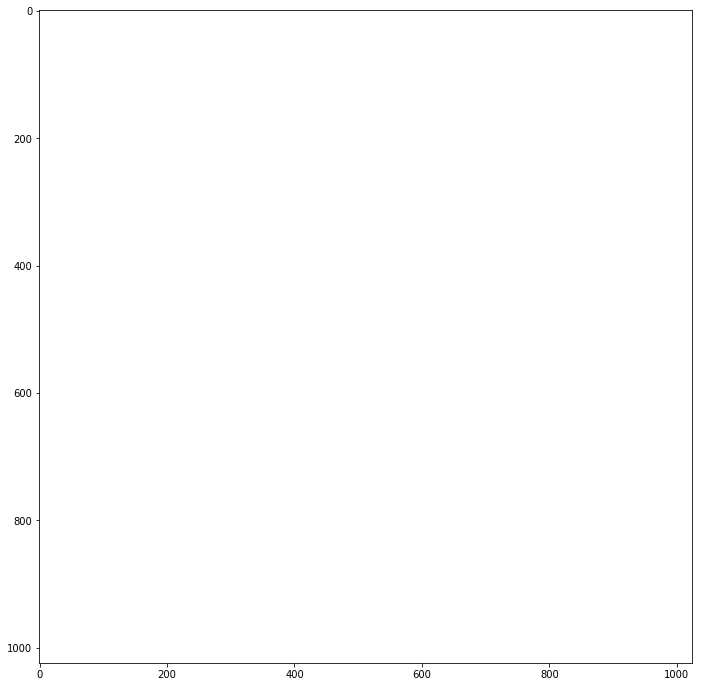

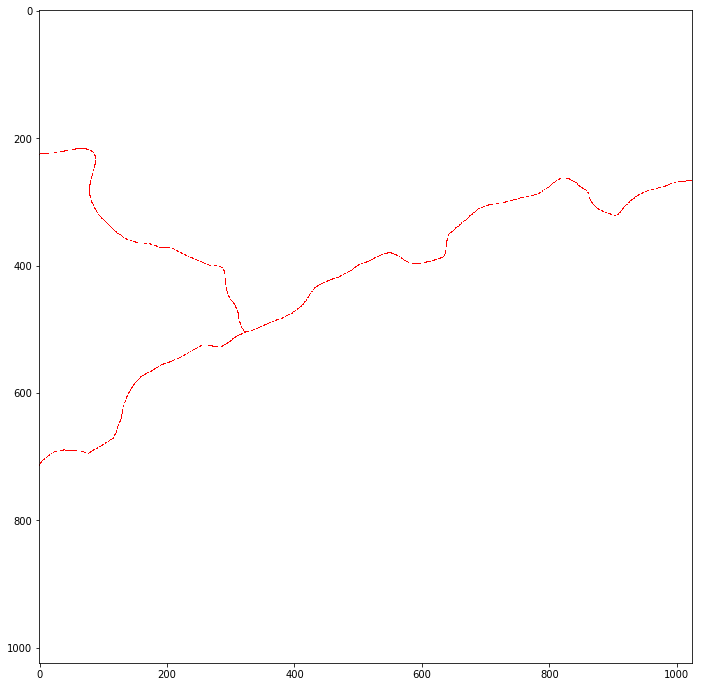

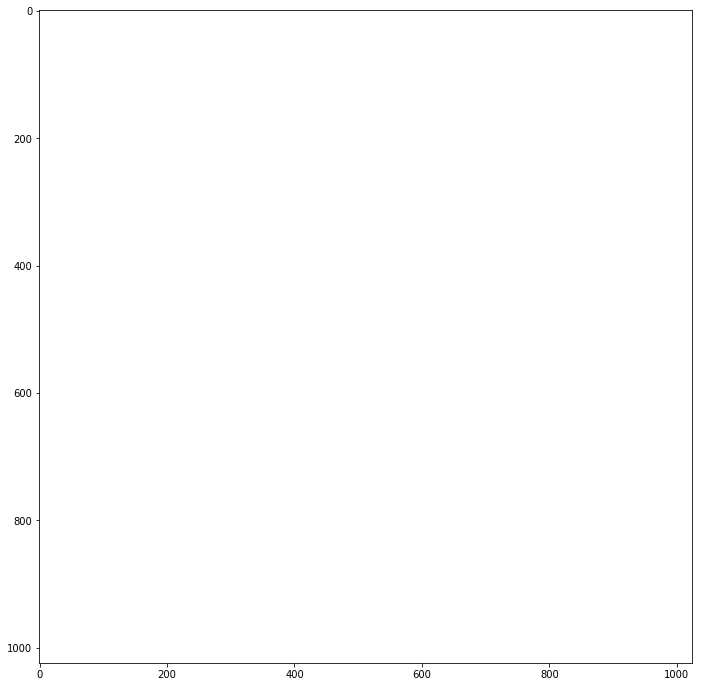

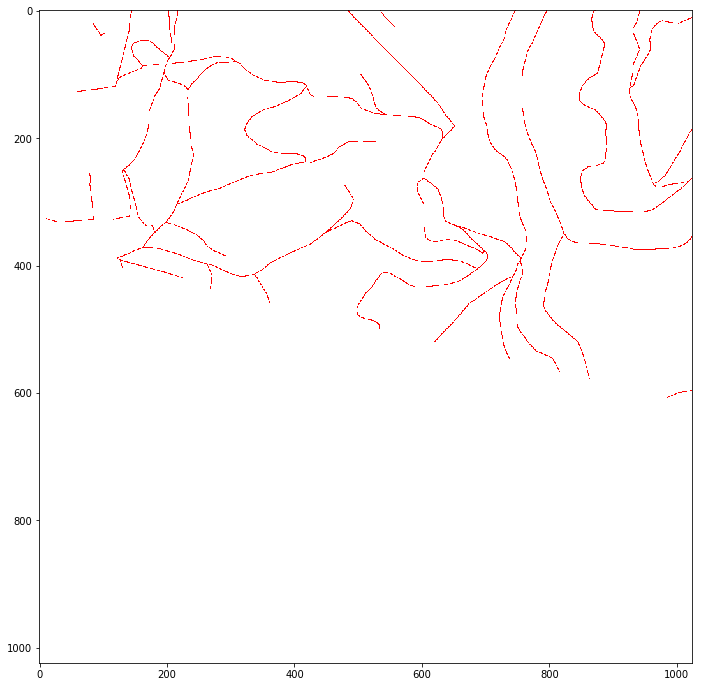

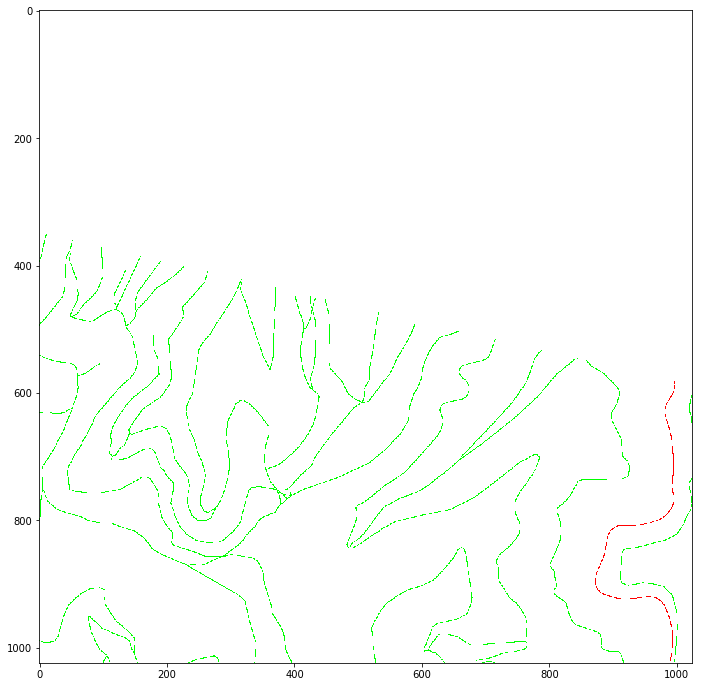

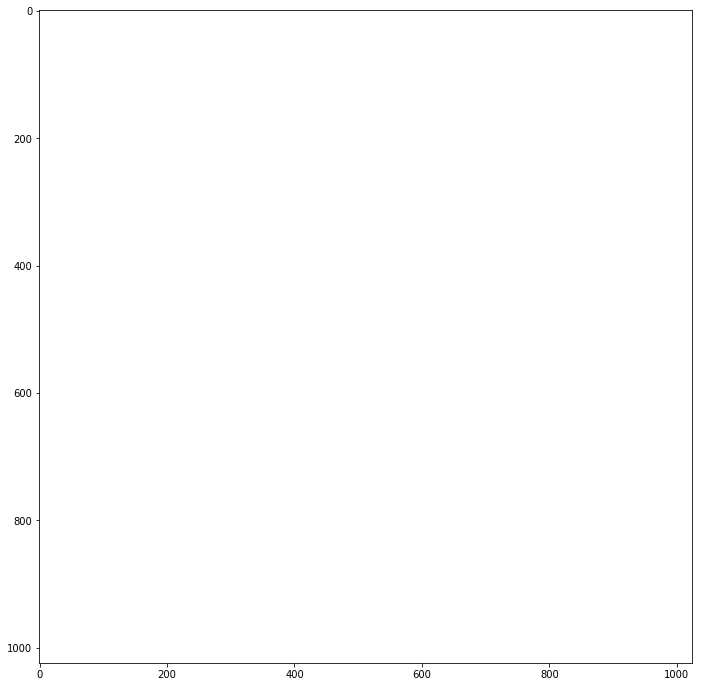

In [35]:
n = 1
for file in Path(RAW_MAPS).iterdir():
    if file.name.endswith(('.tif', '.tiff')):
        make_visible(file)